In [ ]:
# install requirements
!pip install seaborn
!pip install statsmodels
!pip install factor_analyzer

# Selecting Samples to Represent High, Neutral, Low for each Personality

O
Max: 2Brajdazp1o, idx: 3, 1.1428571428571428
Min: _7t6Ry4PlTo, idx: 9, -1.2692307692307692
Mid: i2l9v_seHCc, idx: 36, 0.03571428571428571
C
Max: eemOZfsrKdg, idx: 26, 1.5416666666666667
Min: 27lMmdmy-b8, idx: 13, -0.5357142857142857
Mid: g3vSYbT1Aco, idx: 29, 0.75
E
Max: t0Cr64zCc38, idx: 45, 2.28
Min: g9M3HIjHuq0, idx: 20, -1.75
Mid: y7l5QHRY_AI, idx: 40, 0.5862068965517241
A
Max: 3zJHwOwirjA, idx: 6, 1.6153846153846154
Min: kLIfeGflNp8, idx: 42, -1.9310344827586208
Mid: hokUdXYRe2Q, idx: 33, 0.0
N
Max: g9M3HIjHuq0, idx: 20, 1.3571428571428572
Min: idfv7Lw4Y_s, idx: 38, -1.6428571428571428
Mid: _7t6Ry4PlTo, idx: 9, -0.38461538461538464


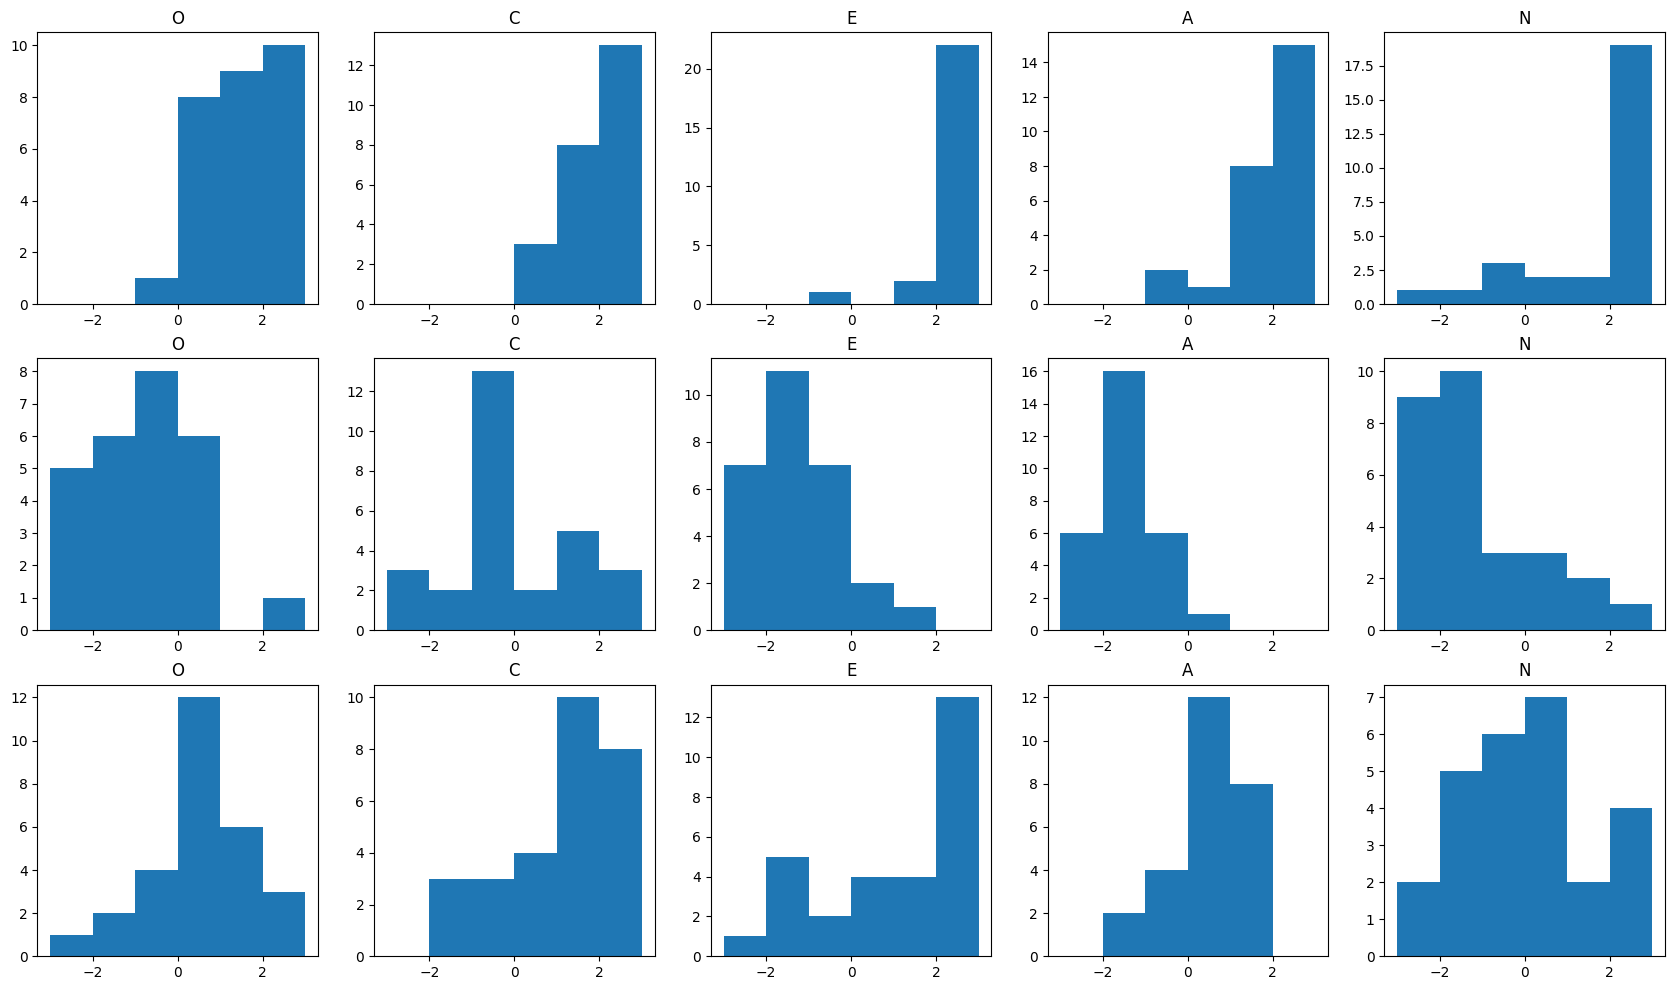

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# video names from TED dataset
videoNameMapTED = [
	"0bRocfcPhHU", # 0
	"1g-1_Y3fvUg", # 1
	"1k89OTpDvIU", # 2
	"2Brajdazp1o", # 3
	"2VBkDNzeRZM", # 4
	"3lVNA4aF1lg", # 5
	"3zJHwOwirjA", # 6
	"16p9YRF0l-g", # 7
	"_2u_eHHzRto", # 8
	"_7t6Ry4PlTo", # 9
	"C74amJRp730", # 10
	"cK74vhqzeeQ", # 11
	"ClfBxWPkBKU", # 12
	"27lMmdmy-b8", # 13
	"51k3UASQE5E", # 14
	"a4ZBzM3L6ws", # 15
	"b2Jv8vC-m3g", # 16
	"bGUVQaBdxKw", # 17
	"BltRufe5kkI", # 18
	"bVV2Zk88beY", # 19
	"g9M3HIjHuq0", # 20
	"GIrfNWed1Mk", # 21
	"cUee1I69nFs", # 22
	"dsJWs6Z6eNs", # 23
	"eaCrsBtiYA4", # 24
	"e-BZigXlphY", # 25
	"eemOZfsrKdg", # 26
	"ERSZb2wHFDw", # 27
	"fO2htapfNhA", # 28
	"g3vSYbT1Aco", # 29
	"iWHq2m_Hwhw", # 30
	"kdAs3UVgIGg", # 31
	"GwRzjFQa_Og", # 32
	"hokUdXYRe2Q", # 33
	"hU-aTB-heU0", # 34
	"HXbsVbFAczg", # 35
	"i2l9v_seHCc", # 36
	"I3BJVaioX_k", # 37
	"idfv7Lw4Y_s", # 38
	"iFTWM7HV2UI", # 39
	"y7l5QHRY_AI", # 40
	"yLfCCcVDUiU", # 41
	"kLIfeGflNp8", # 42
	"lAzQWtkPzbI", # 43
	"ONs9FCY74p0", # 44
	"t0Cr64zCc38", # 45
	"tbvUCrS5_5I", # 46
	"th3nnEpITz0", # 47
	"Ubbmje44gLg", # 48
	"UoMpbL_Fsig" # 49
];

# import first study results
df = pd.read_csv('FirstStudy.csv')

# ignore users who spent too less time
rslt_df = df[df['TimeSeconds'] > 15]

# calculate means per sample and per personality factor
mat = np.zeros((50,5))
for i in range(50):
    mat[i,0] = df[df['SampleNo'] == i]['O'].mean()
    mat[i,1] = df[df['SampleNo'] == i]['C'].mean()
    mat[i,2] = df[df['SampleNo'] == i]['E'].mean()
    mat[i,3] = df[df['SampleNo'] == i]['A'].mean()
    mat[i,4] = df[df['SampleNo'] == i]['N'].mean()

# find min and max for each personality factor
# this part is used for choosing samples shown in Figure 1

mat = np.zeros((50,5))

dtype = [('value', 'float64'), ('index', int)]

oarr = np.array([], dtype=dtype)
carr = np.array([], dtype=dtype)
earr = np.array([], dtype=dtype)
aarr = np.array([], dtype=dtype)
narr = np.array([], dtype=dtype)

for i in range(50):
    mat[i,0] = rslt_df[rslt_df['SampleNo'] == i]['O'].mean()
    oarr = np.append(oarr,np.array([(mat[i,0],i)], dtype=dtype))
    
    mat[i,1] = rslt_df[rslt_df['SampleNo'] == i]['C'].mean()
    carr = np.append(carr,np.array([(mat[i,1],i)], dtype=dtype))
    
    mat[i,2] = rslt_df[rslt_df['SampleNo'] == i]['E'].mean()
    earr = np.append(earr,np.array([(mat[i,2],i)], dtype=dtype))
    
    mat[i,3] = rslt_df[rslt_df['SampleNo'] == i]['A'].mean()
    aarr = np.append(aarr,np.array([(mat[i,3],i)], dtype=dtype))
    
    mat[i,4] = rslt_df[rslt_df['SampleNo'] == i]['N'].mean()
    narr = np.append(narr,np.array([(mat[i,4],i)], dtype=dtype))

types = ['O', 'C', 'E', 'A', 'N']
fig, a = plt.subplots(figsize=(21, 12),nrows=3, ncols=5)
a = a.ravel()

def find_nearest(a, a0):
    "Element in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    return idx

def showHist(index,type,a):
    sett = rslt_df[rslt_df['SampleNo'] == index]
    a.hist(sett[types[type]],bins=[-3,-2,-1,0,1,2,3])
    a.set_title(types[type])

for i in range(5):
    print(types[i])
    print("Max: " + videoNameMapTED[np.array(mat[:,i]).argmax()] + ", idx: " + str(np.array(mat[:,i]).argmax()) + ", " + str(np.array(mat[:,i]).max()))
    print("Min: " + videoNameMapTED[np.array(mat[:,i]).argmin()] + ", idx: " + str(np.array(mat[:,i]).argmin()) + ", " + str(np.array(mat[:,i]).min()))
    nearest = find_nearest(np.array(mat[:,i]),np.array(mat[:,i]).mean())
    print("Mid: " + videoNameMapTED[nearest] + ", idx: " + str(nearest) + ", " + str(mat[nearest,i]))
    
for i, ax in enumerate(a):
    if(i < 5):
        showHist(np.array(mat[:,i]).argmax(),i,ax)
    elif(i < 10):
        showHist(np.array(mat[:,i-5]).argmin(),i-5,ax)
    else:
        nearest = find_nearest(np.array(mat[:,i-10]),np.array(mat[:,i-10]).mean())
        showHist(nearest,i-10,ax)

# Draw Personality Box Plots for Selected Samples in Figure 1

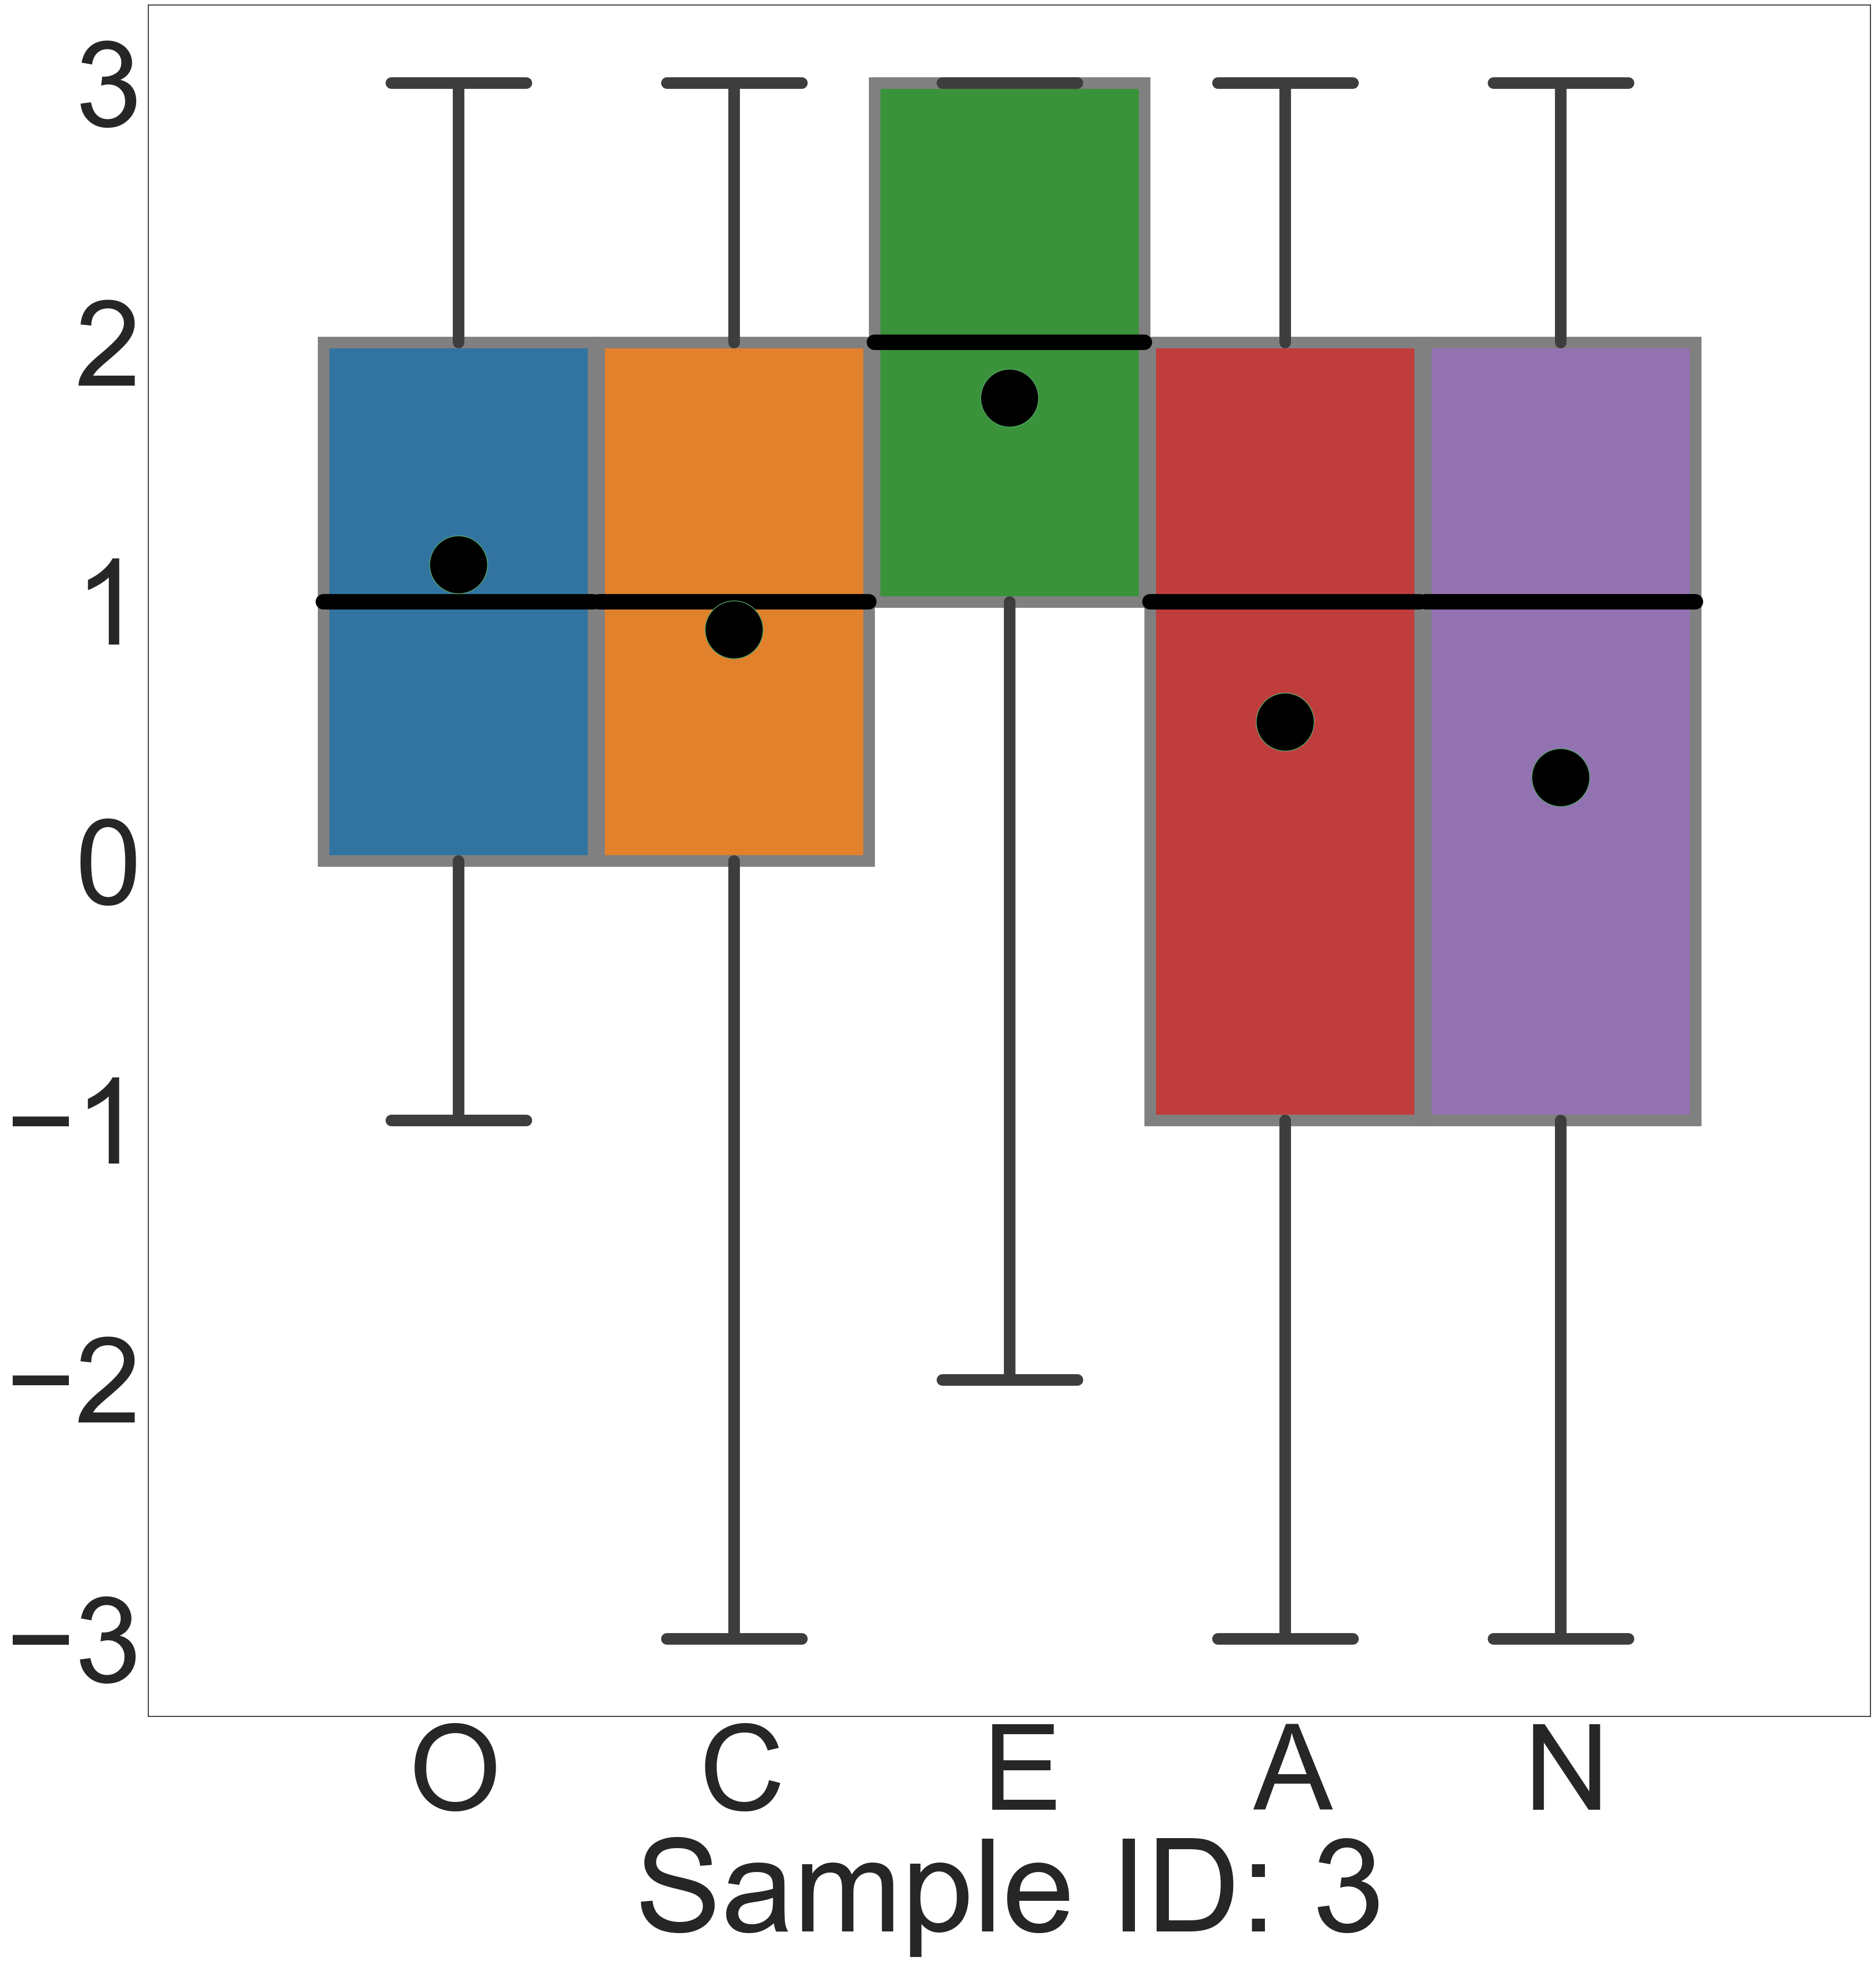

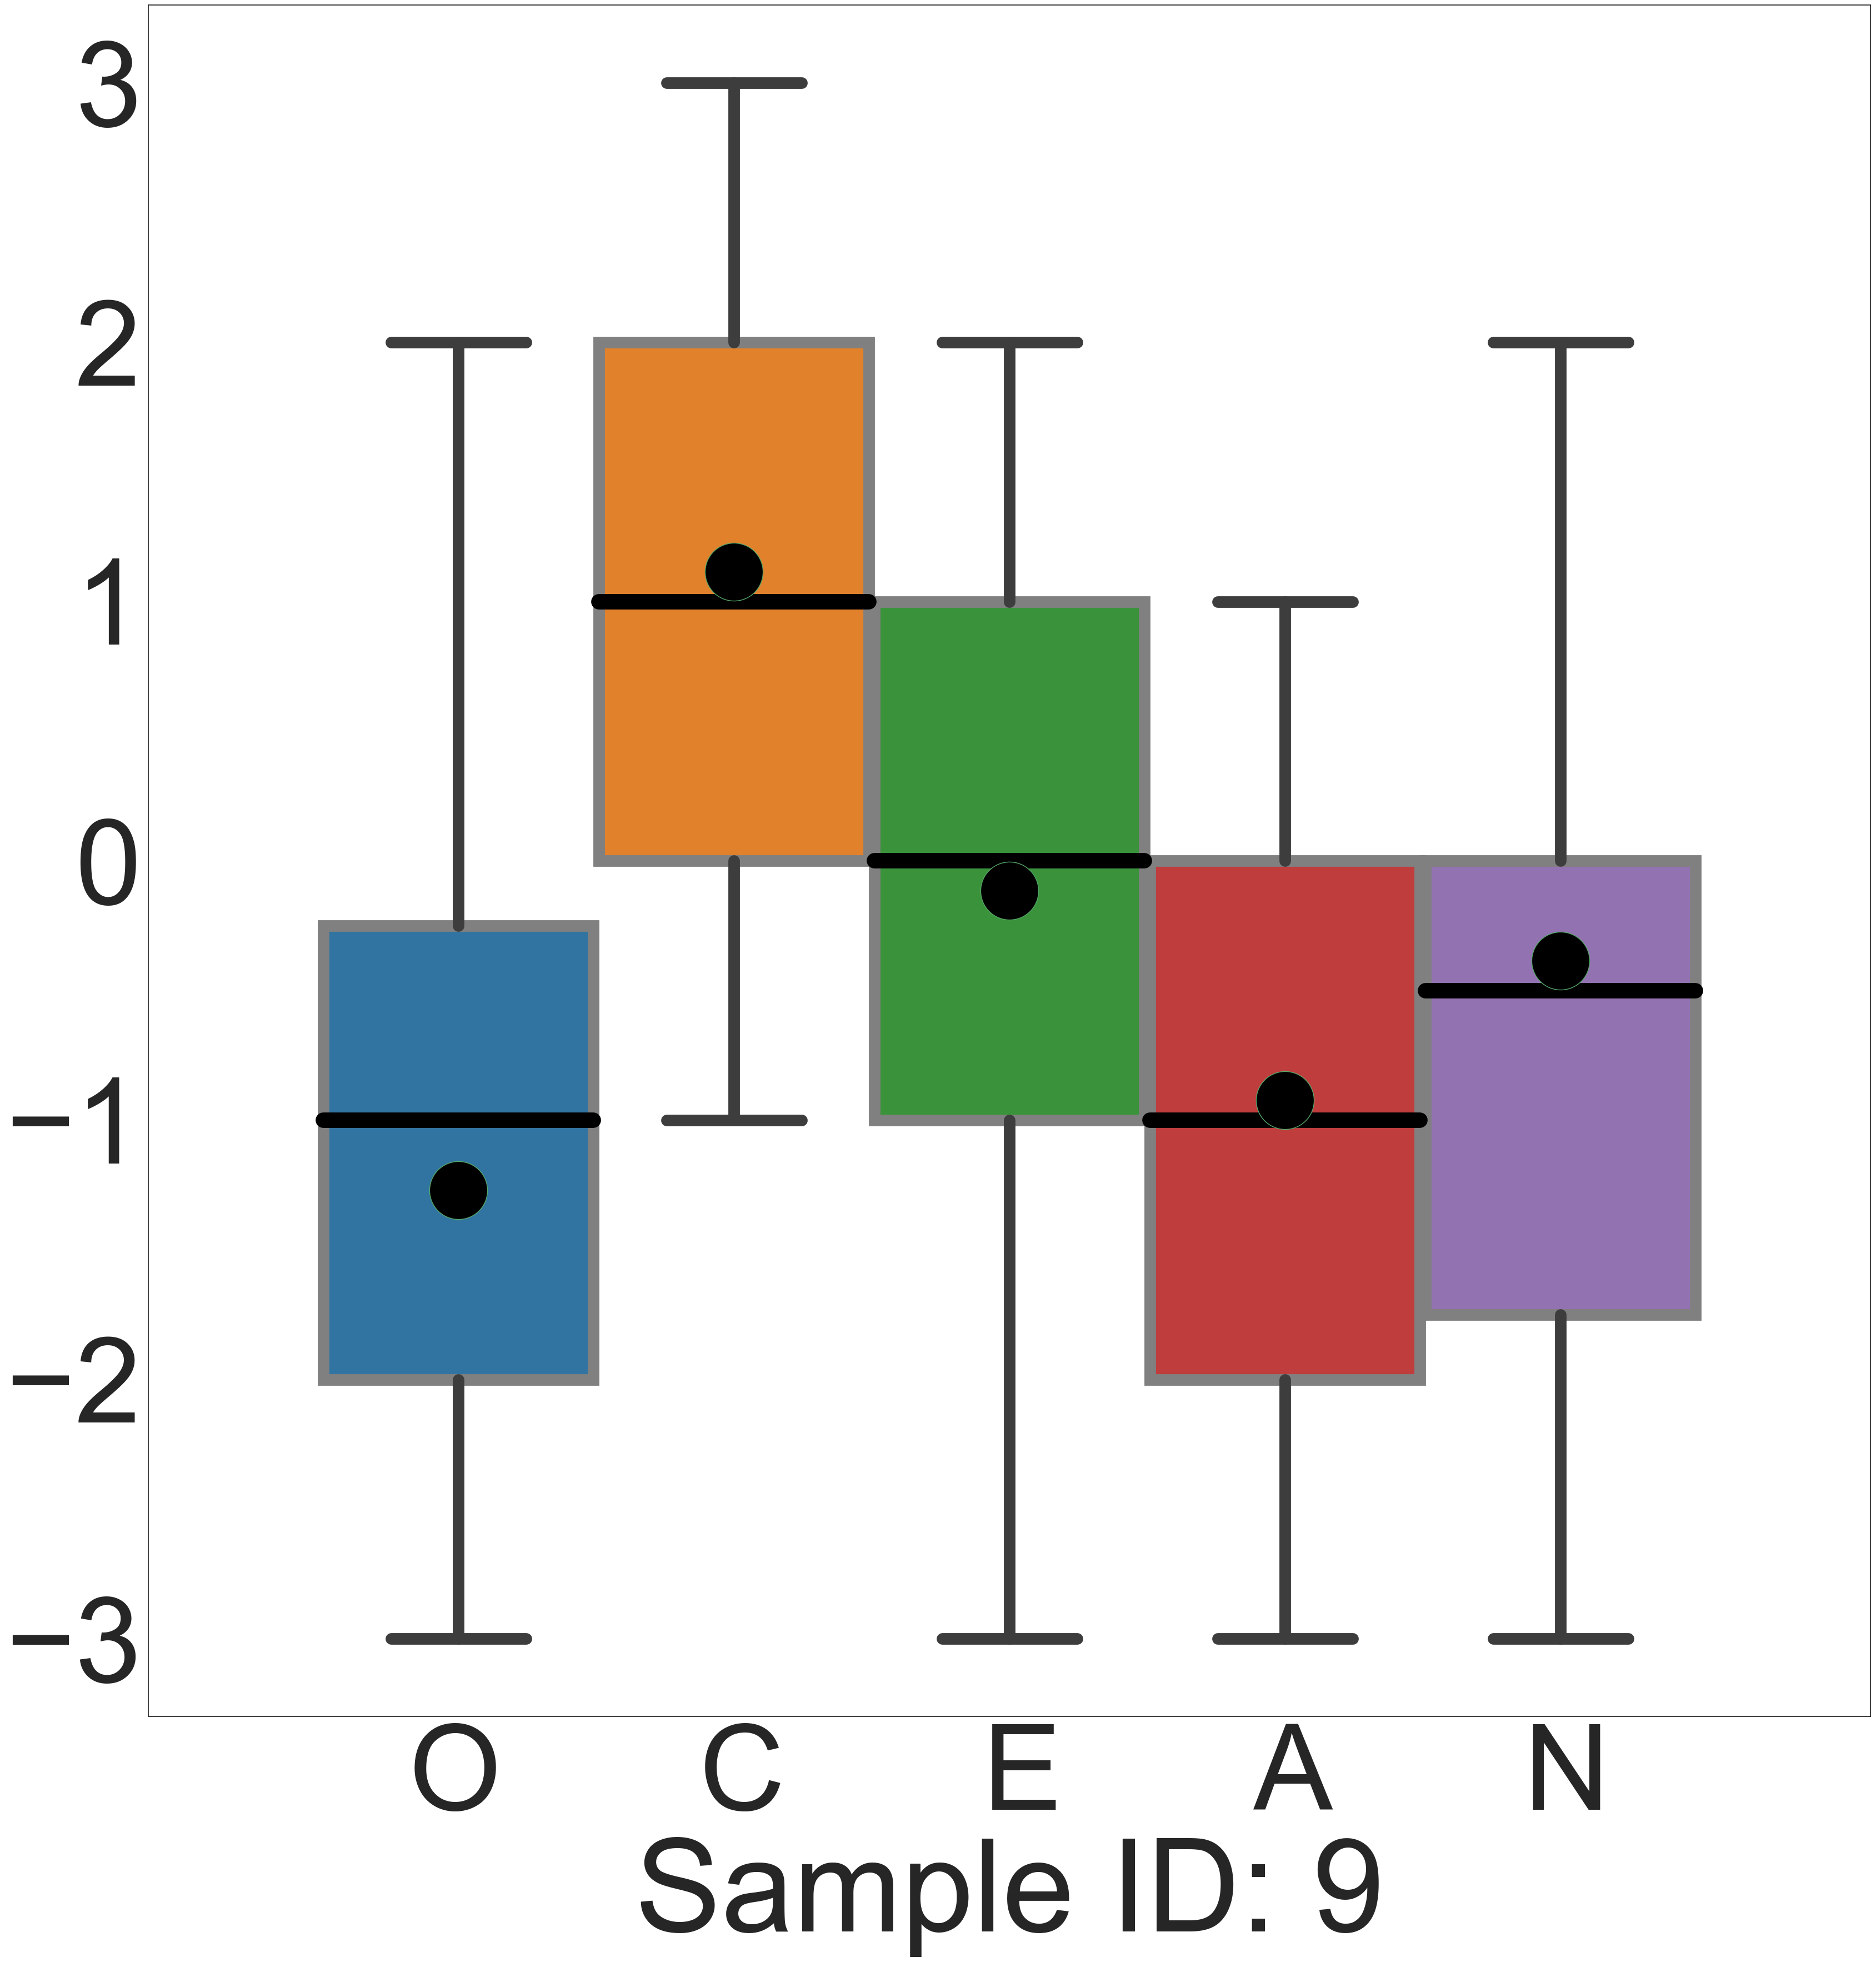

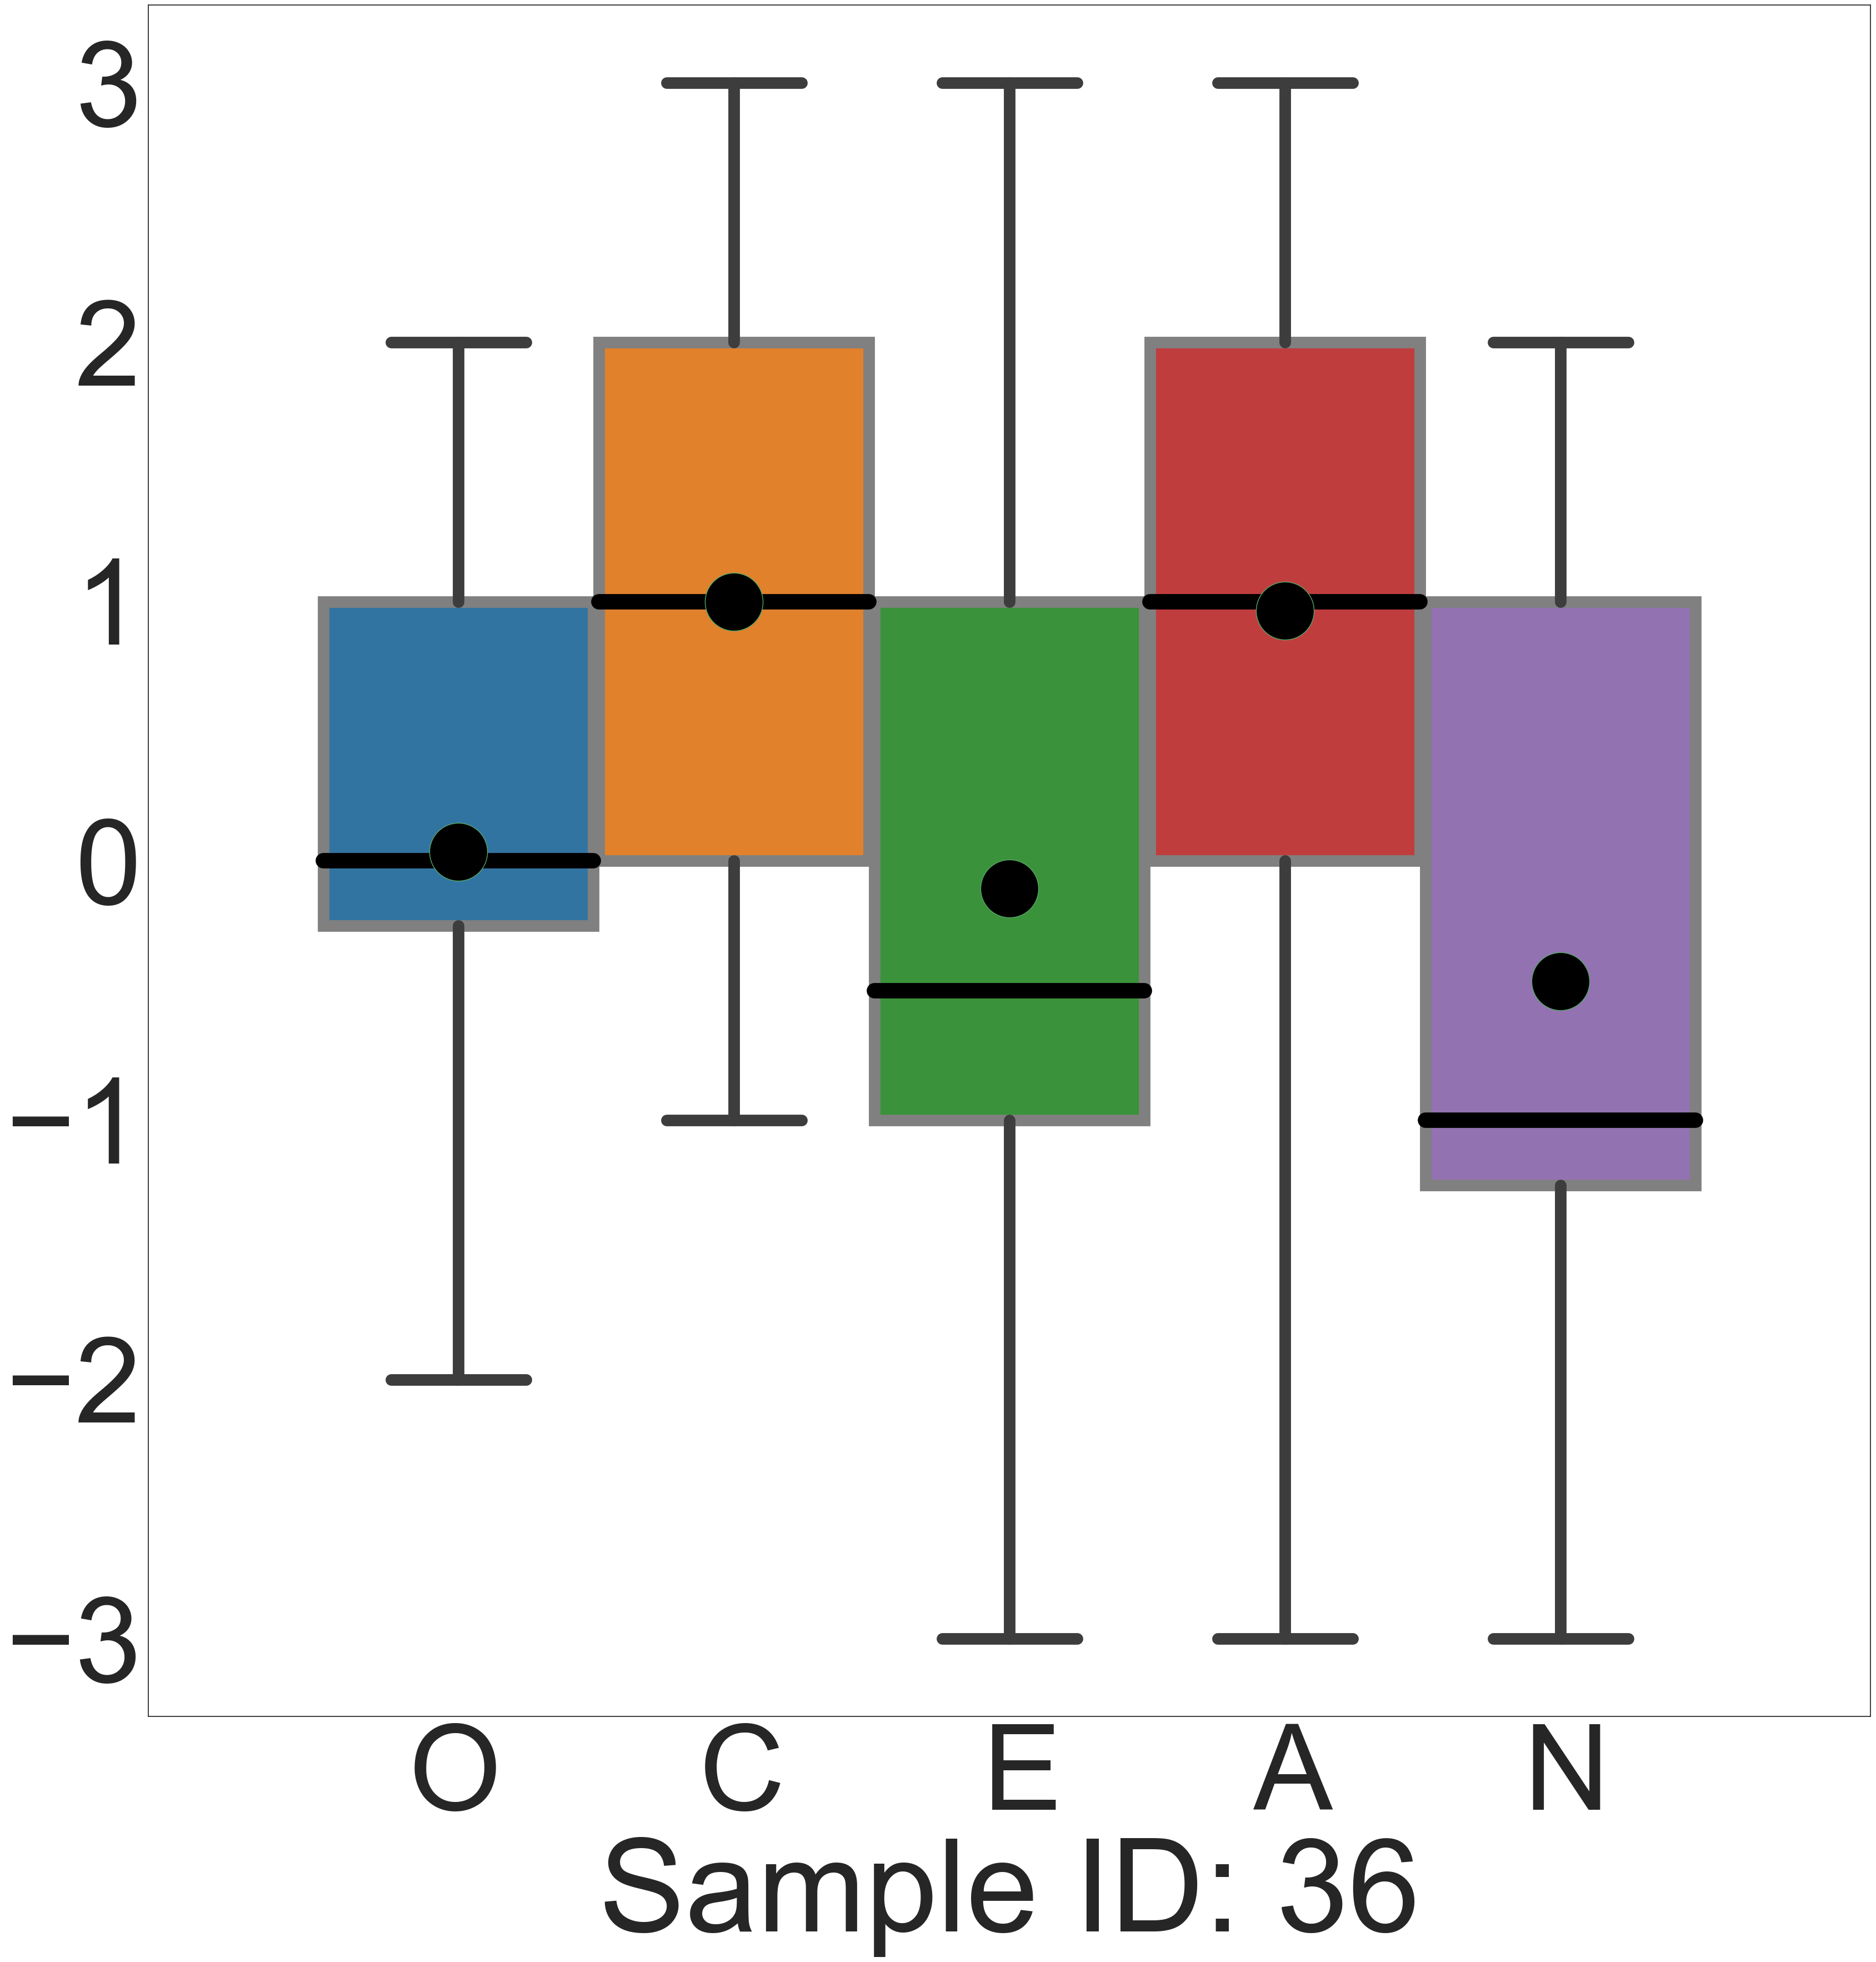

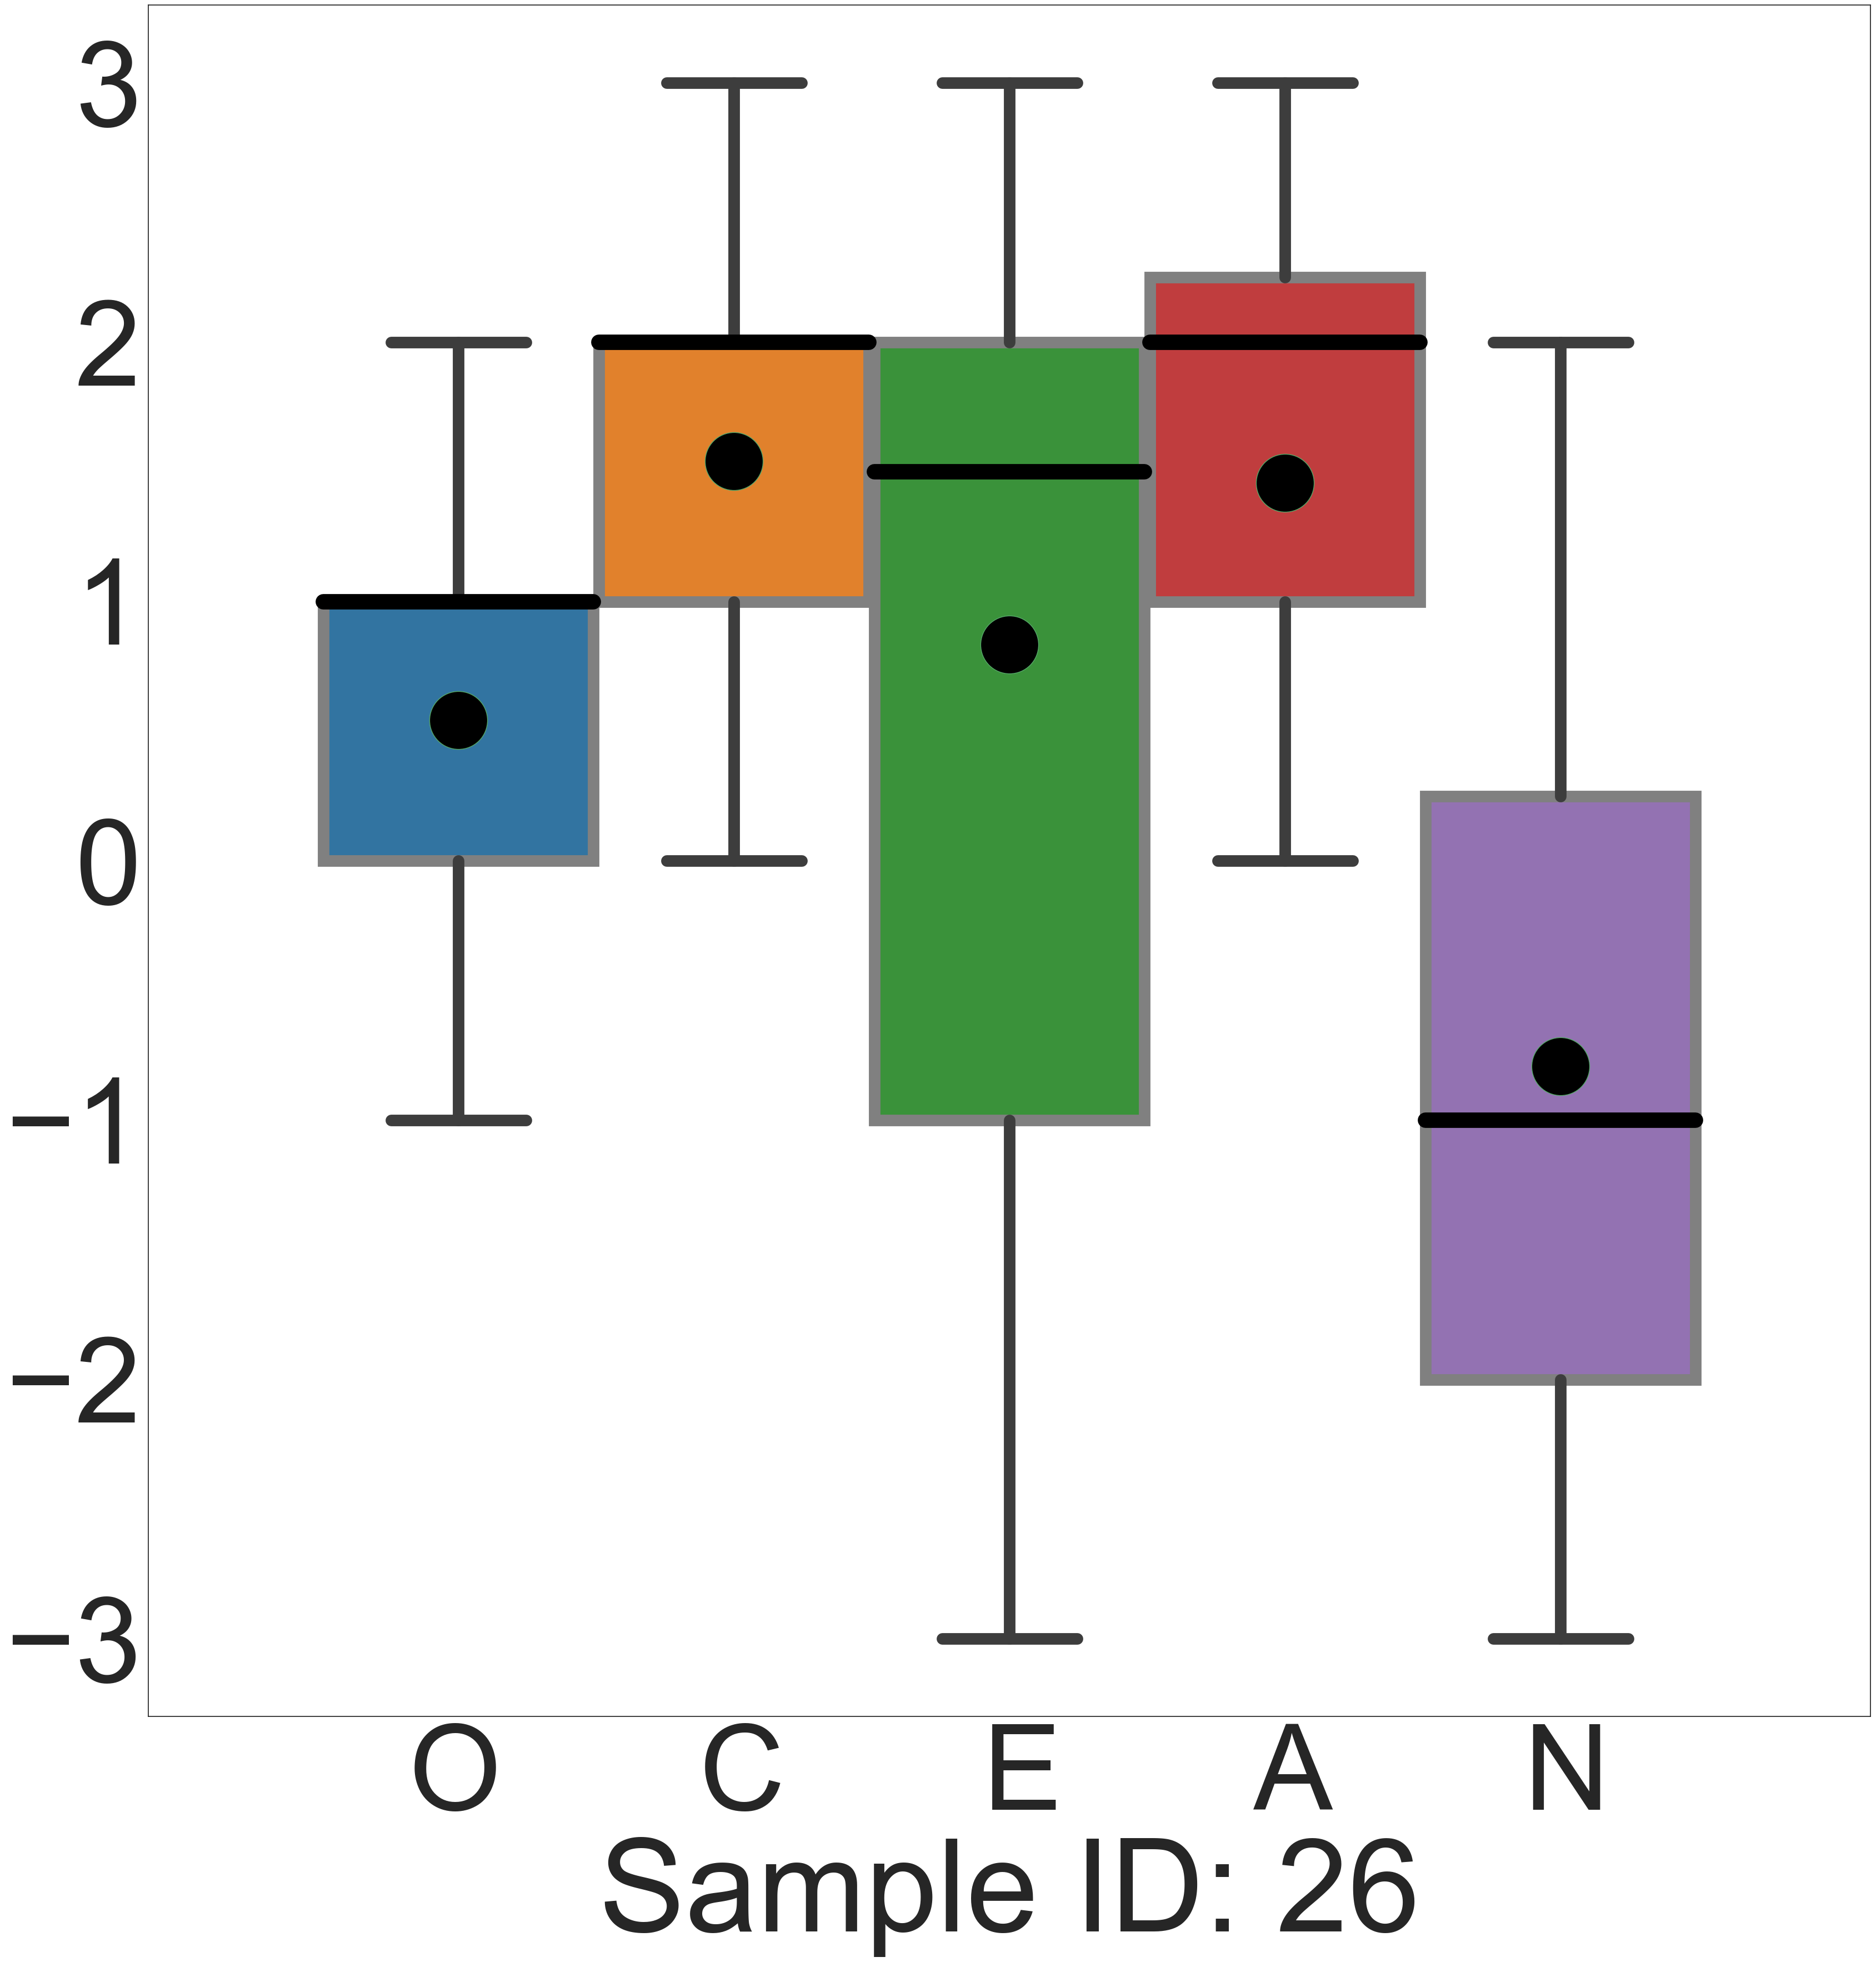

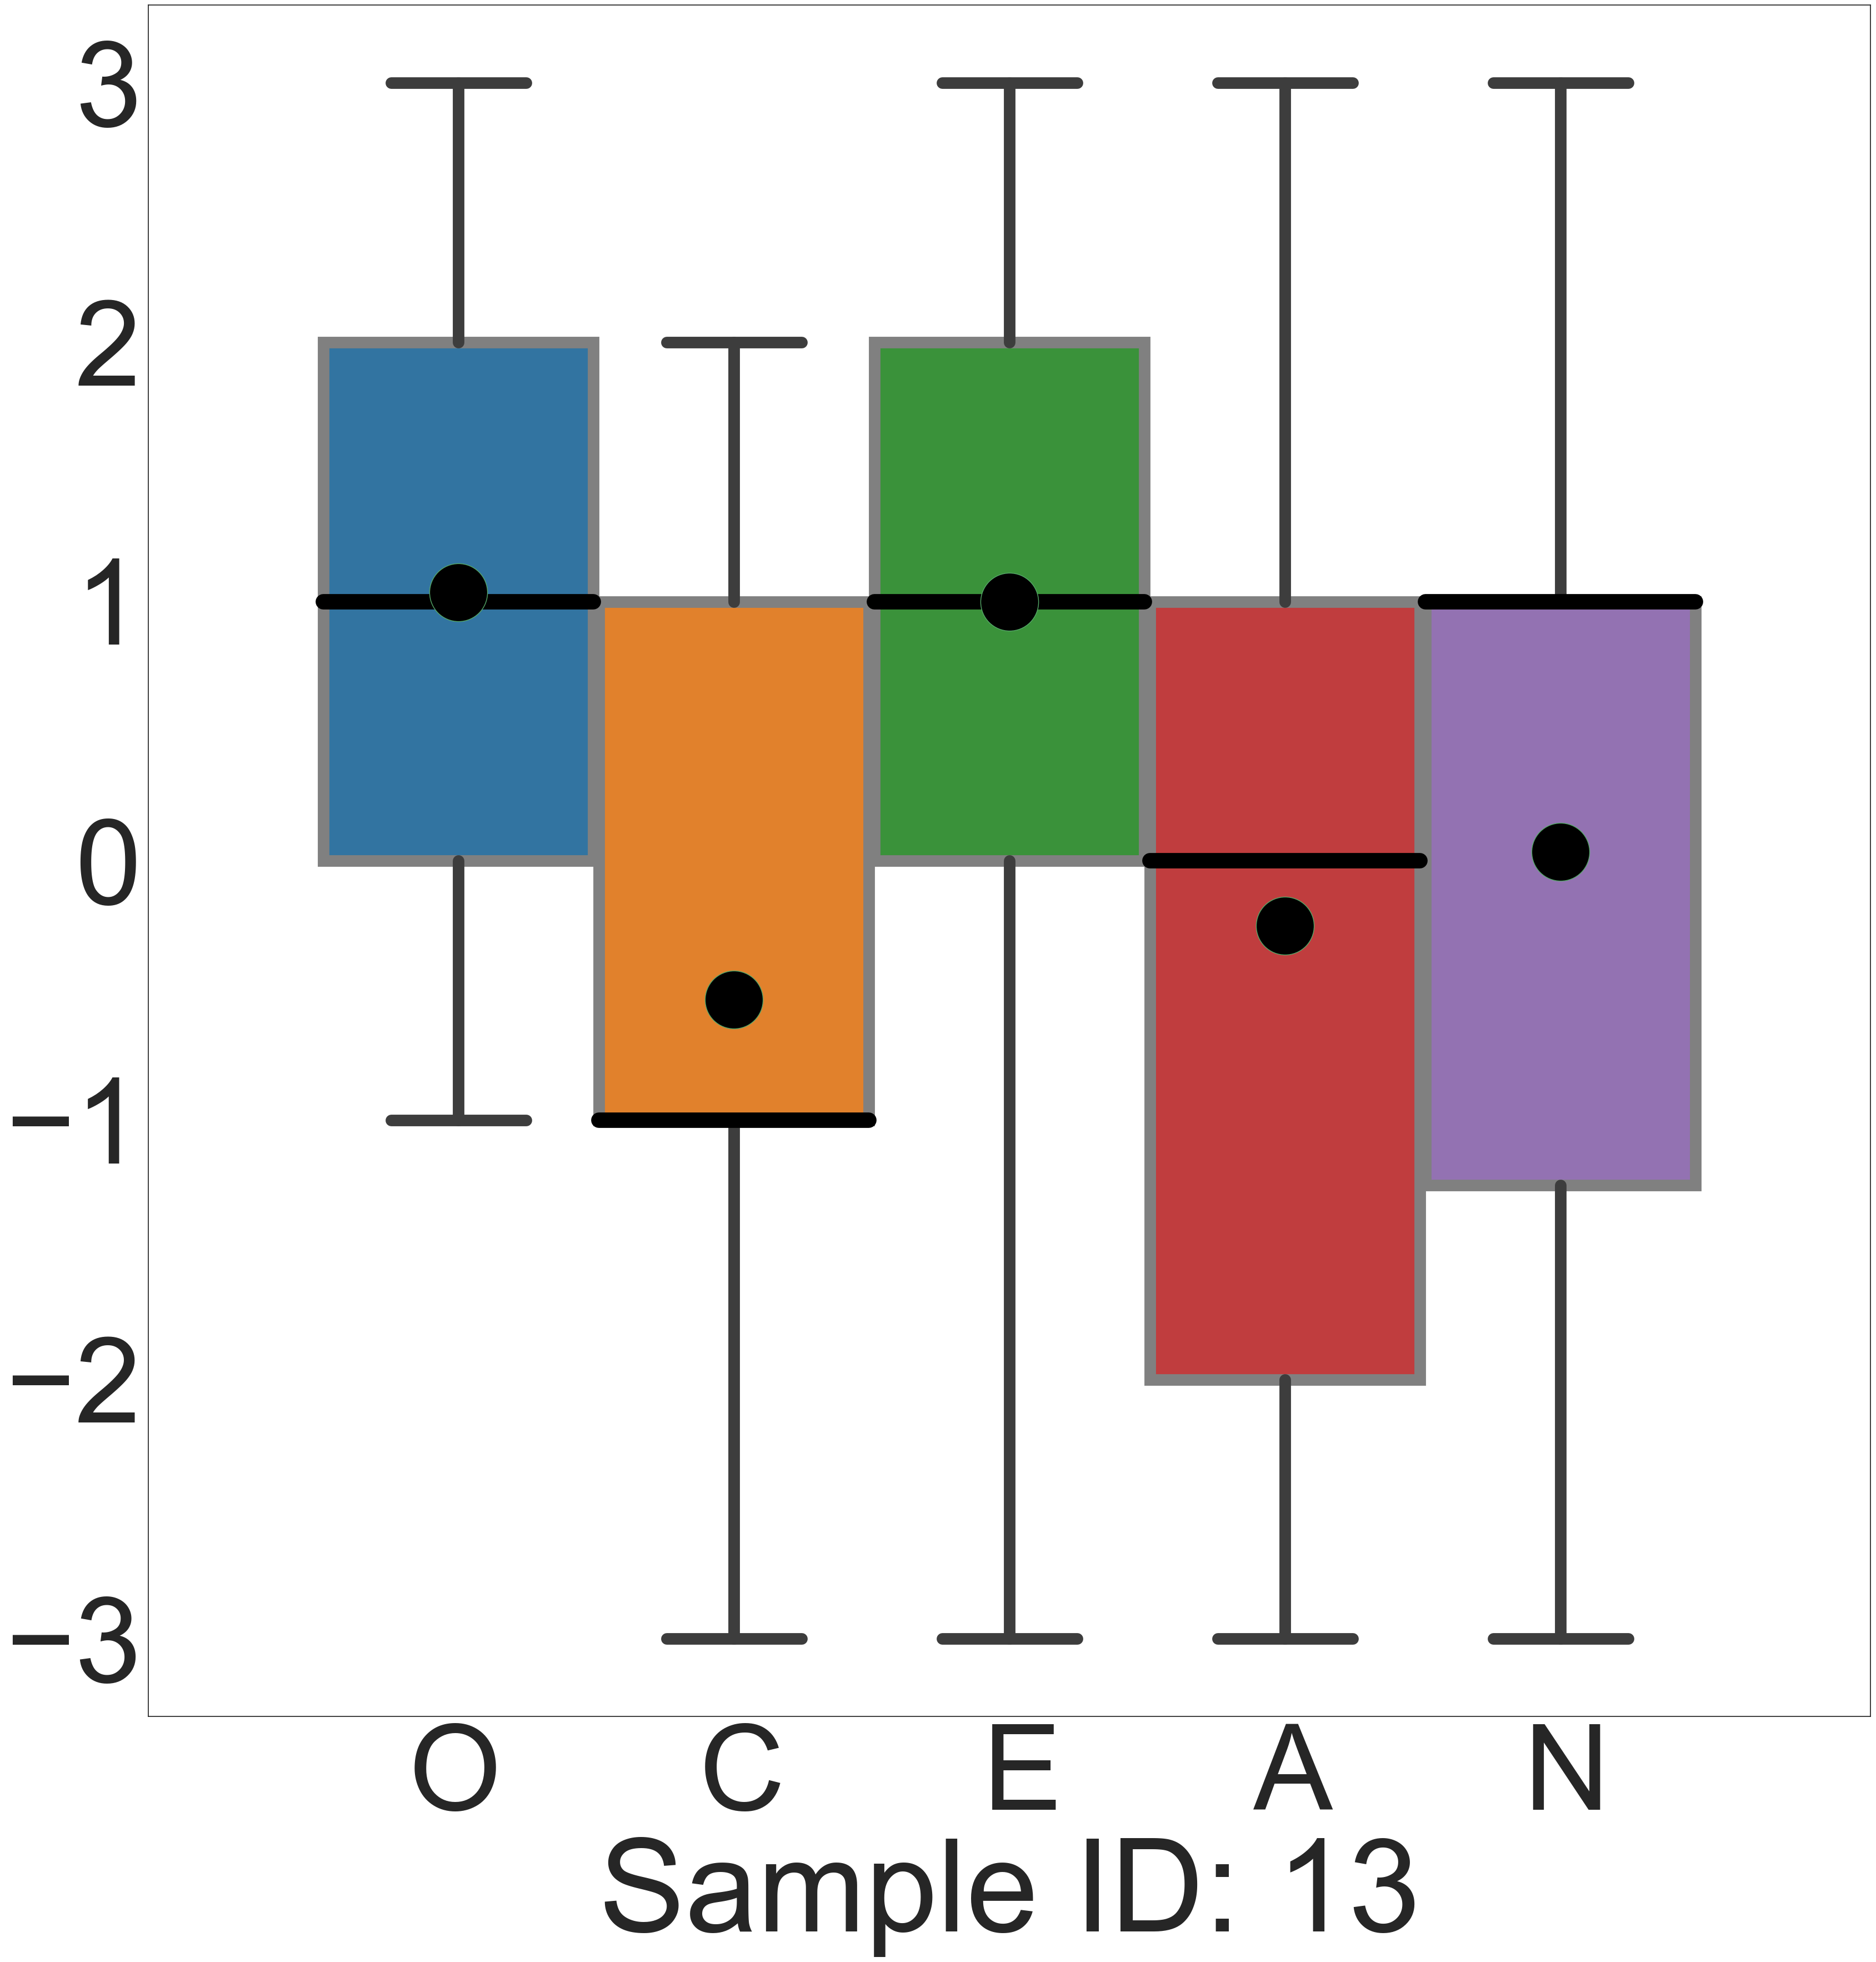

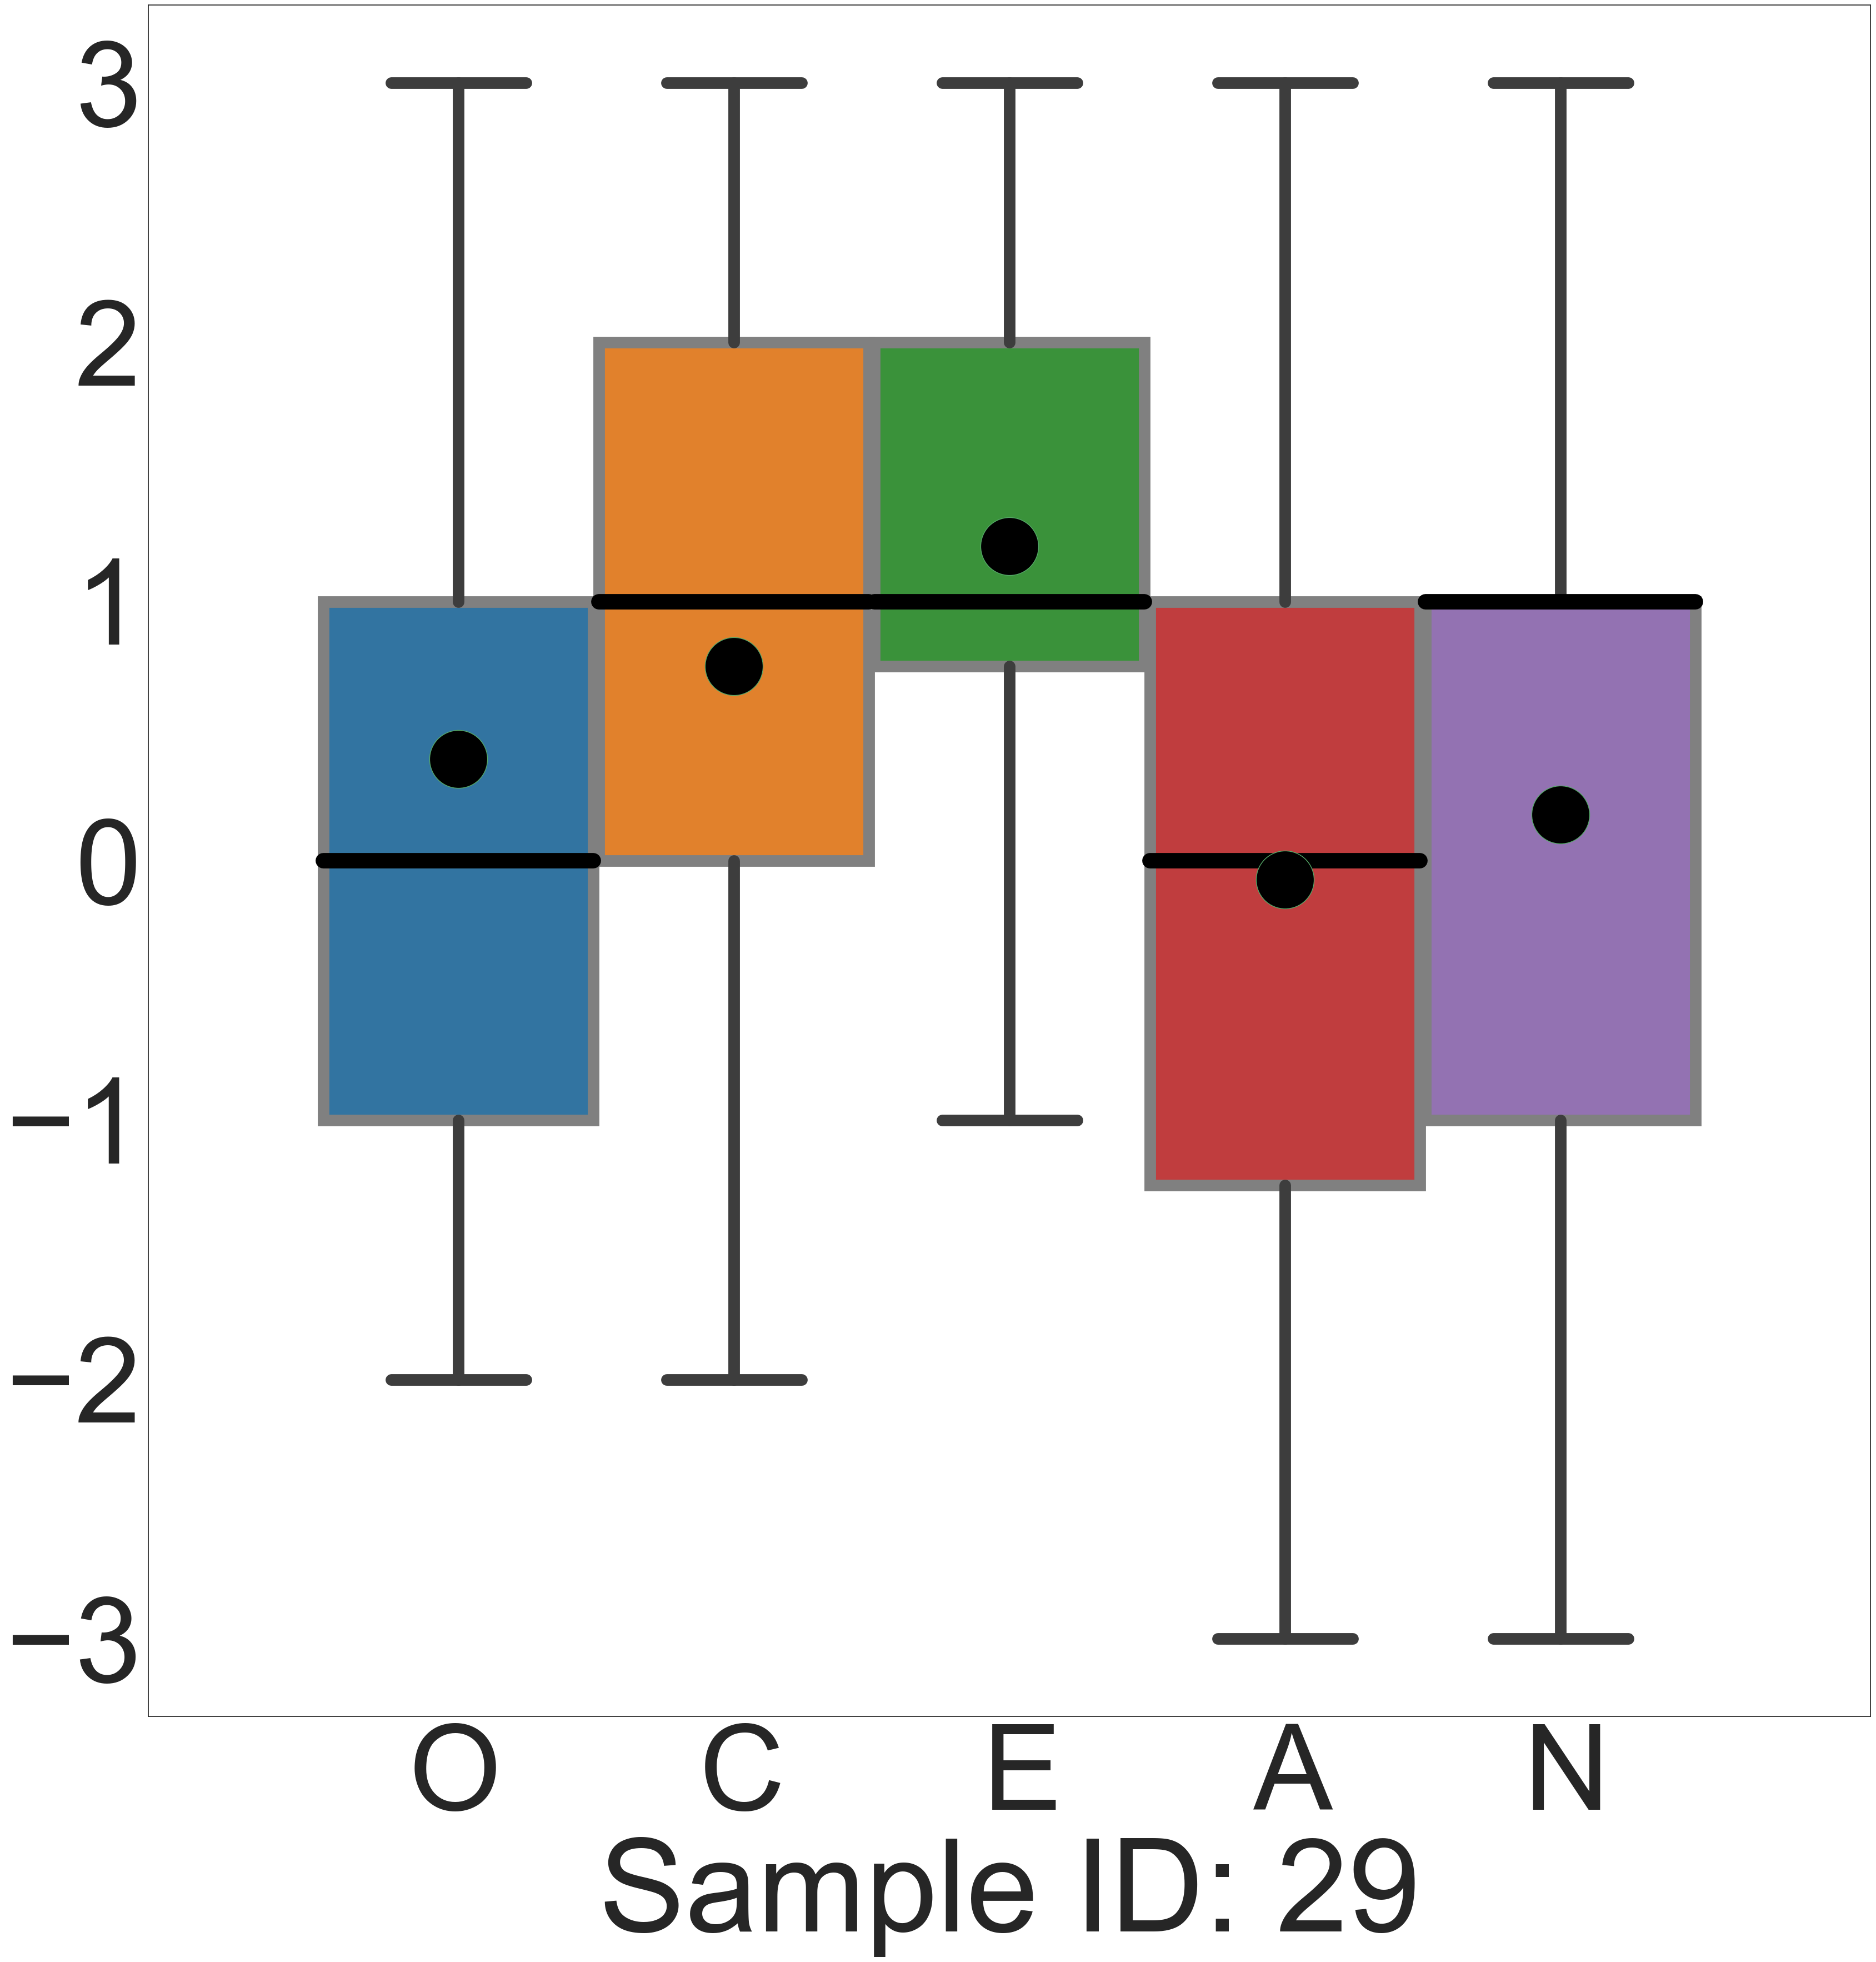

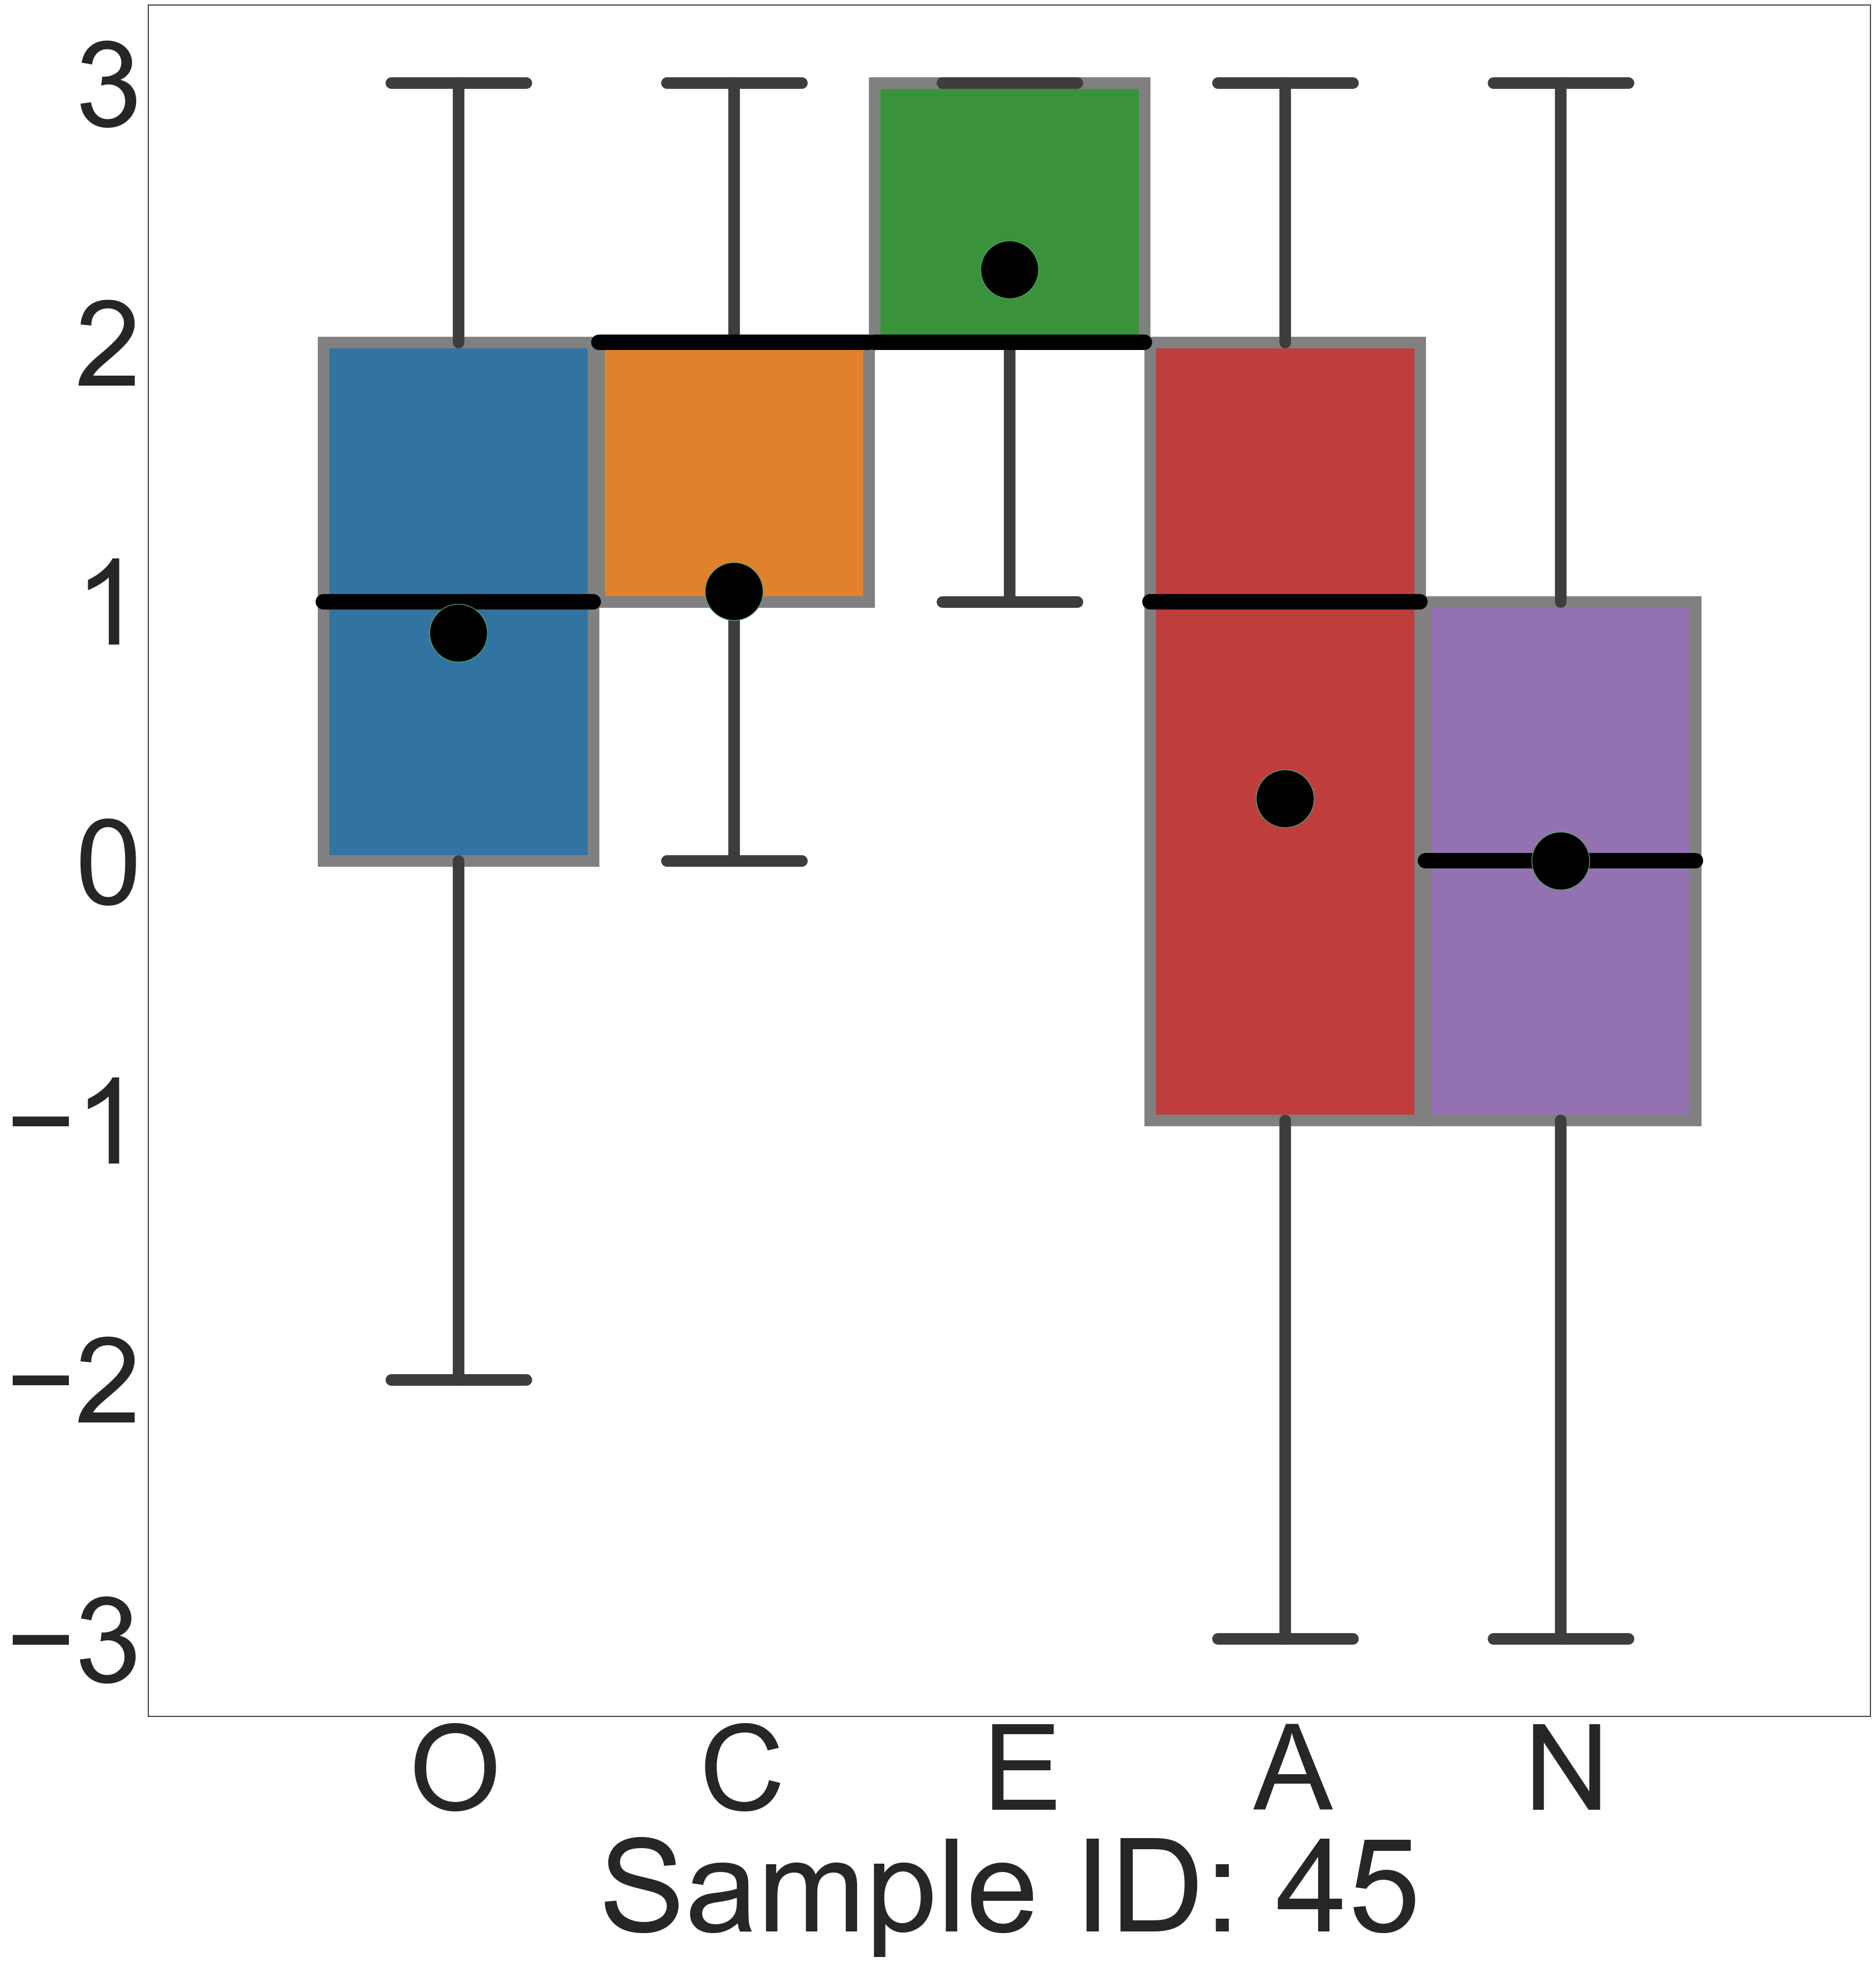

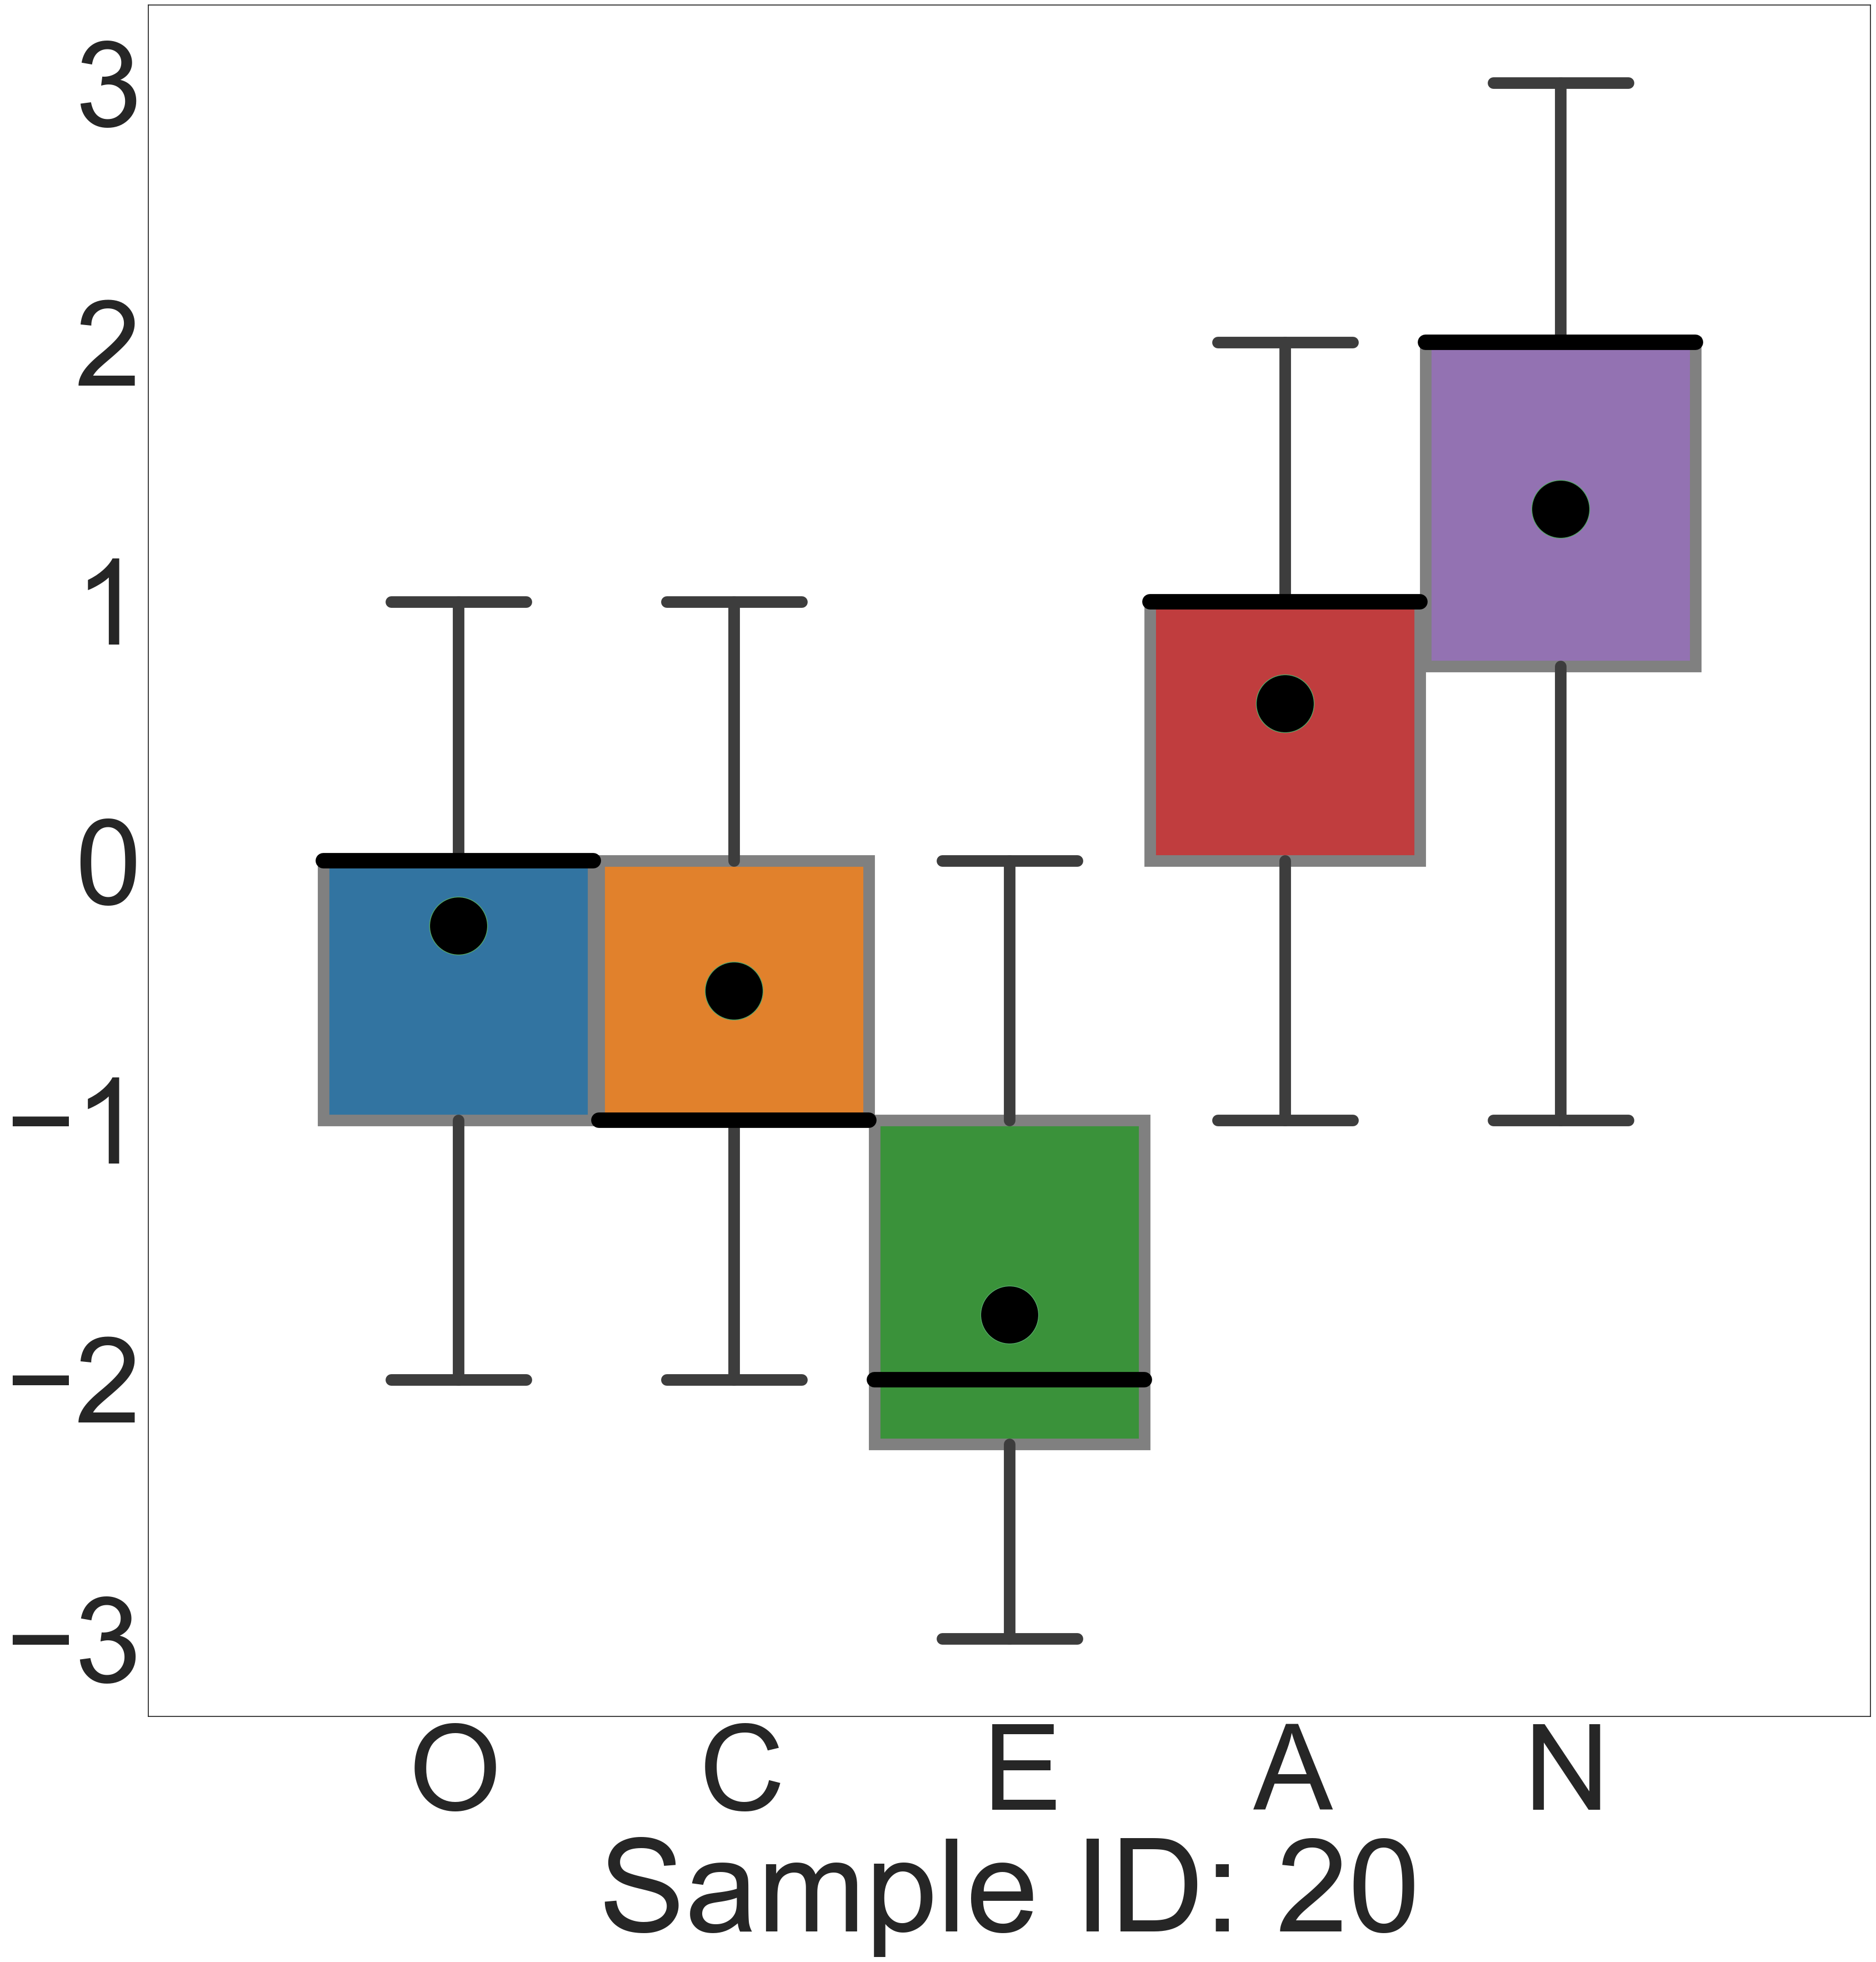

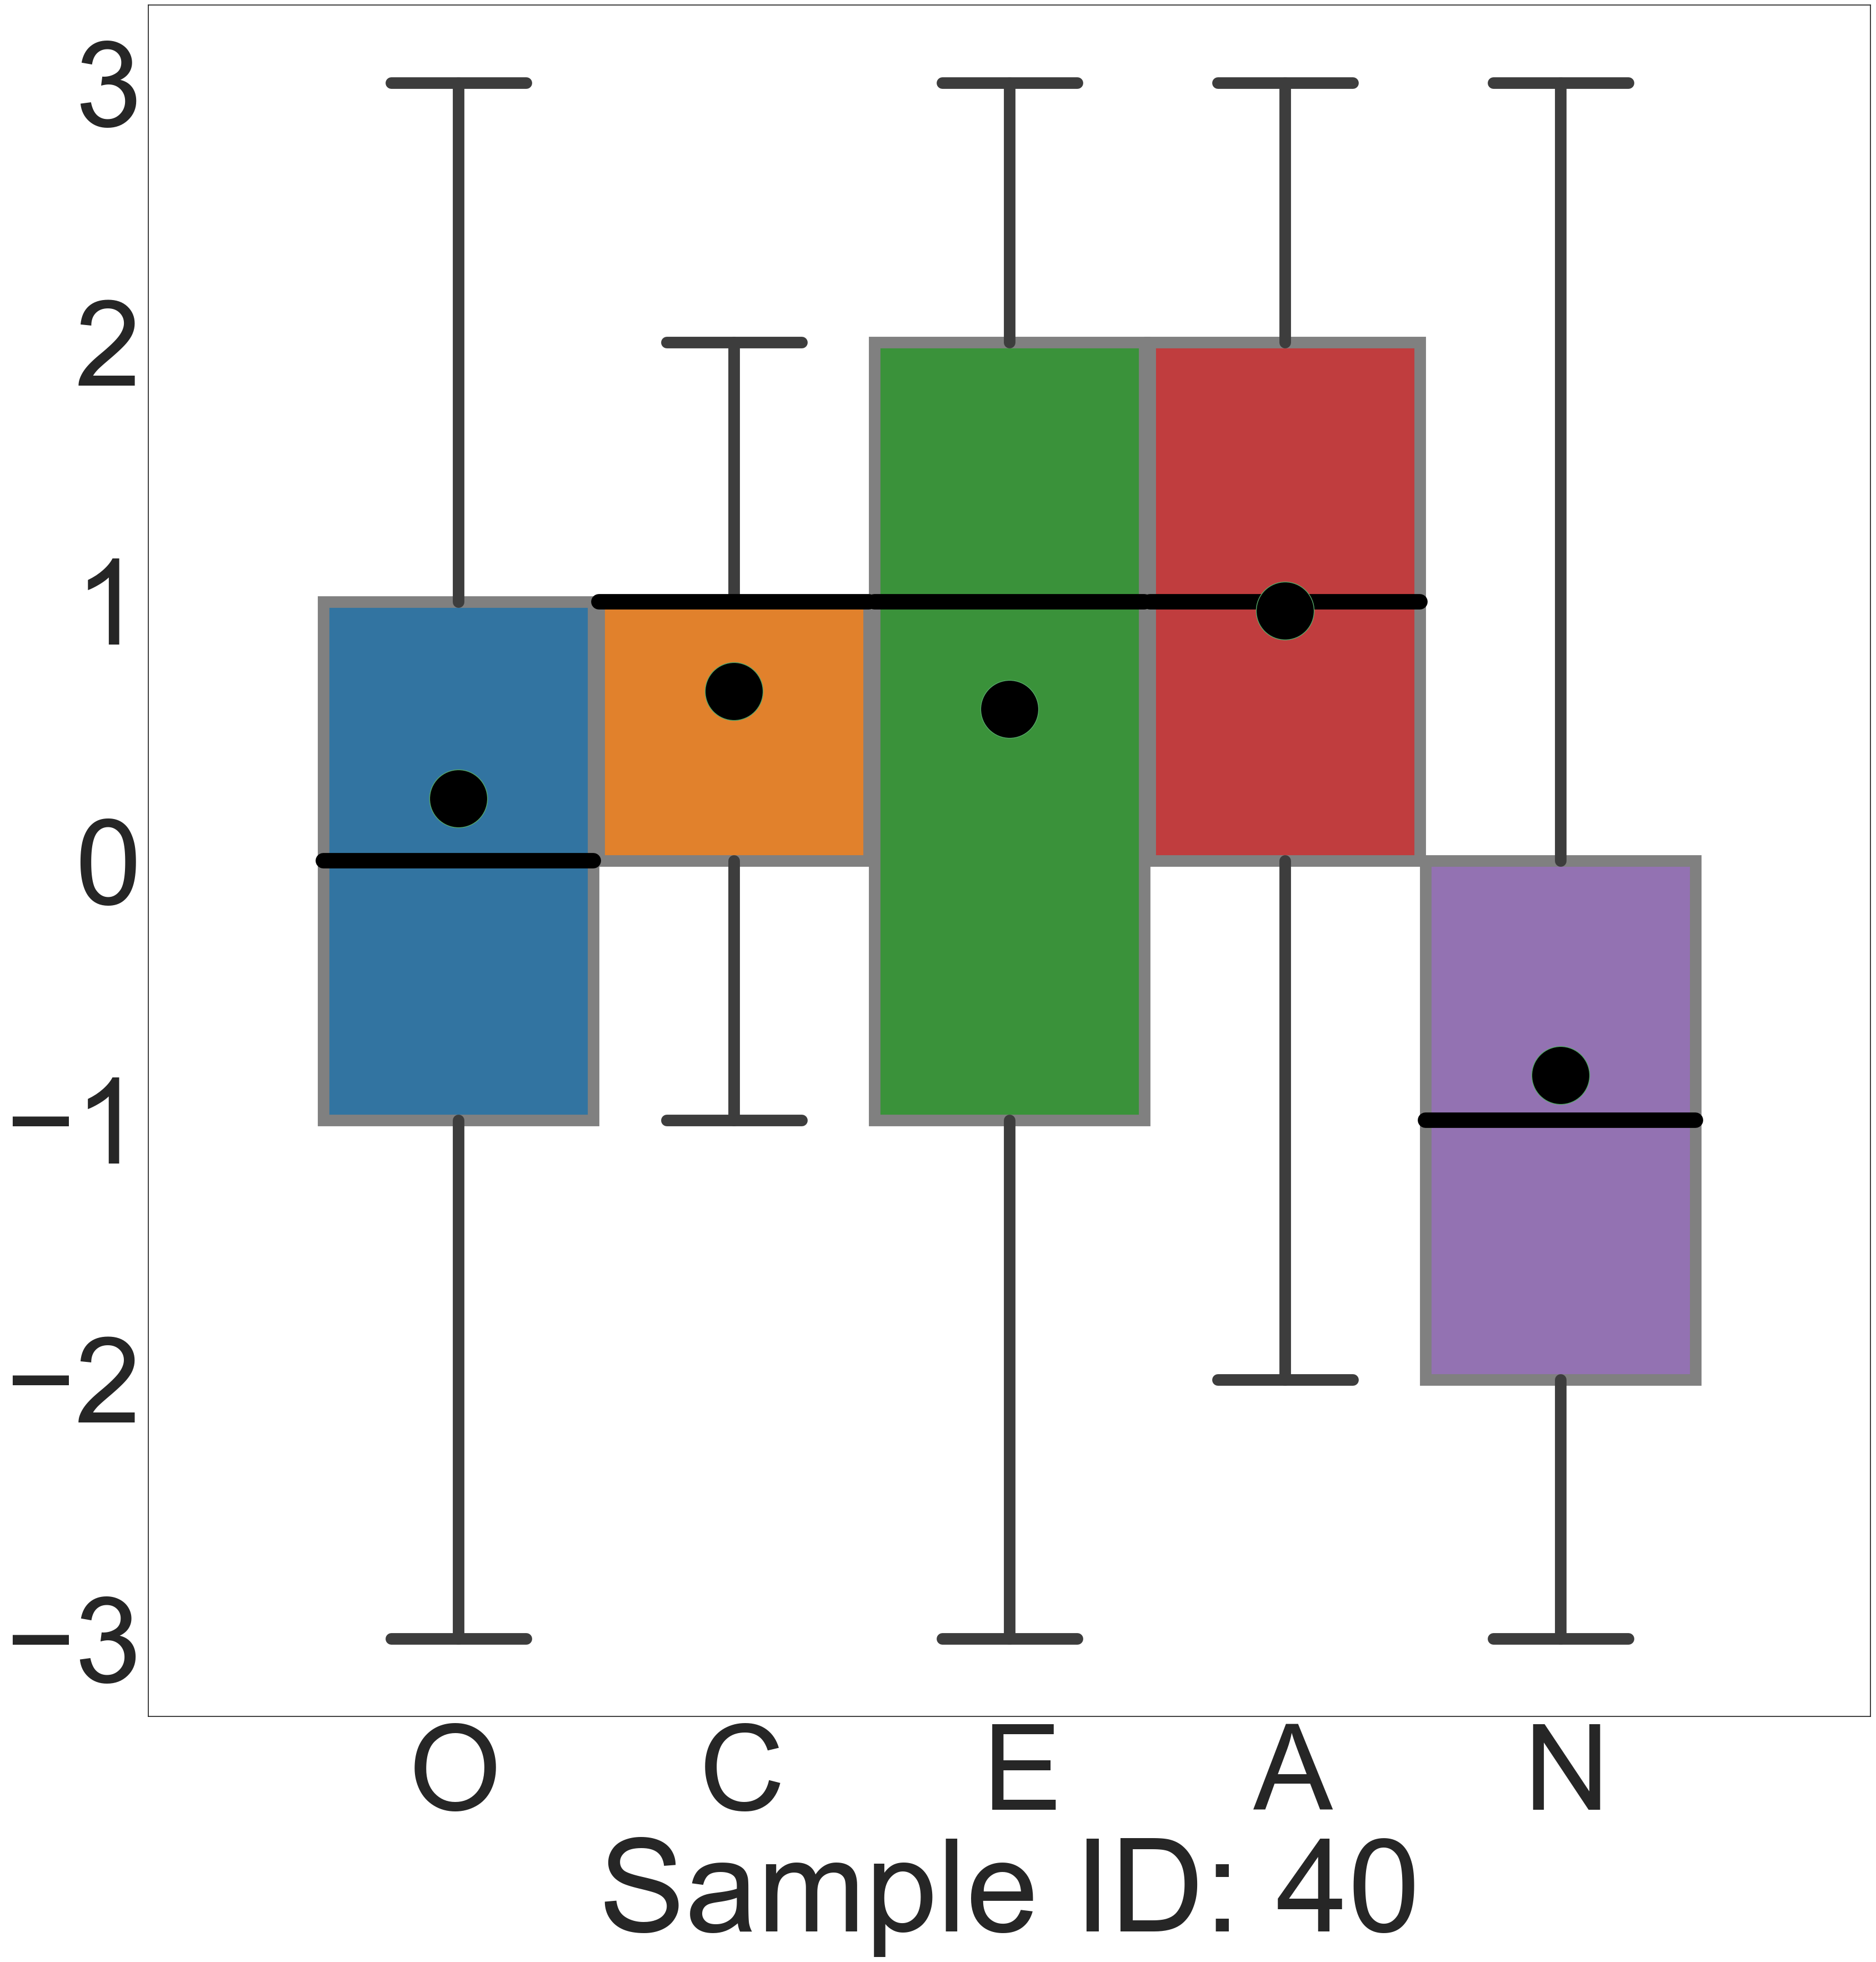

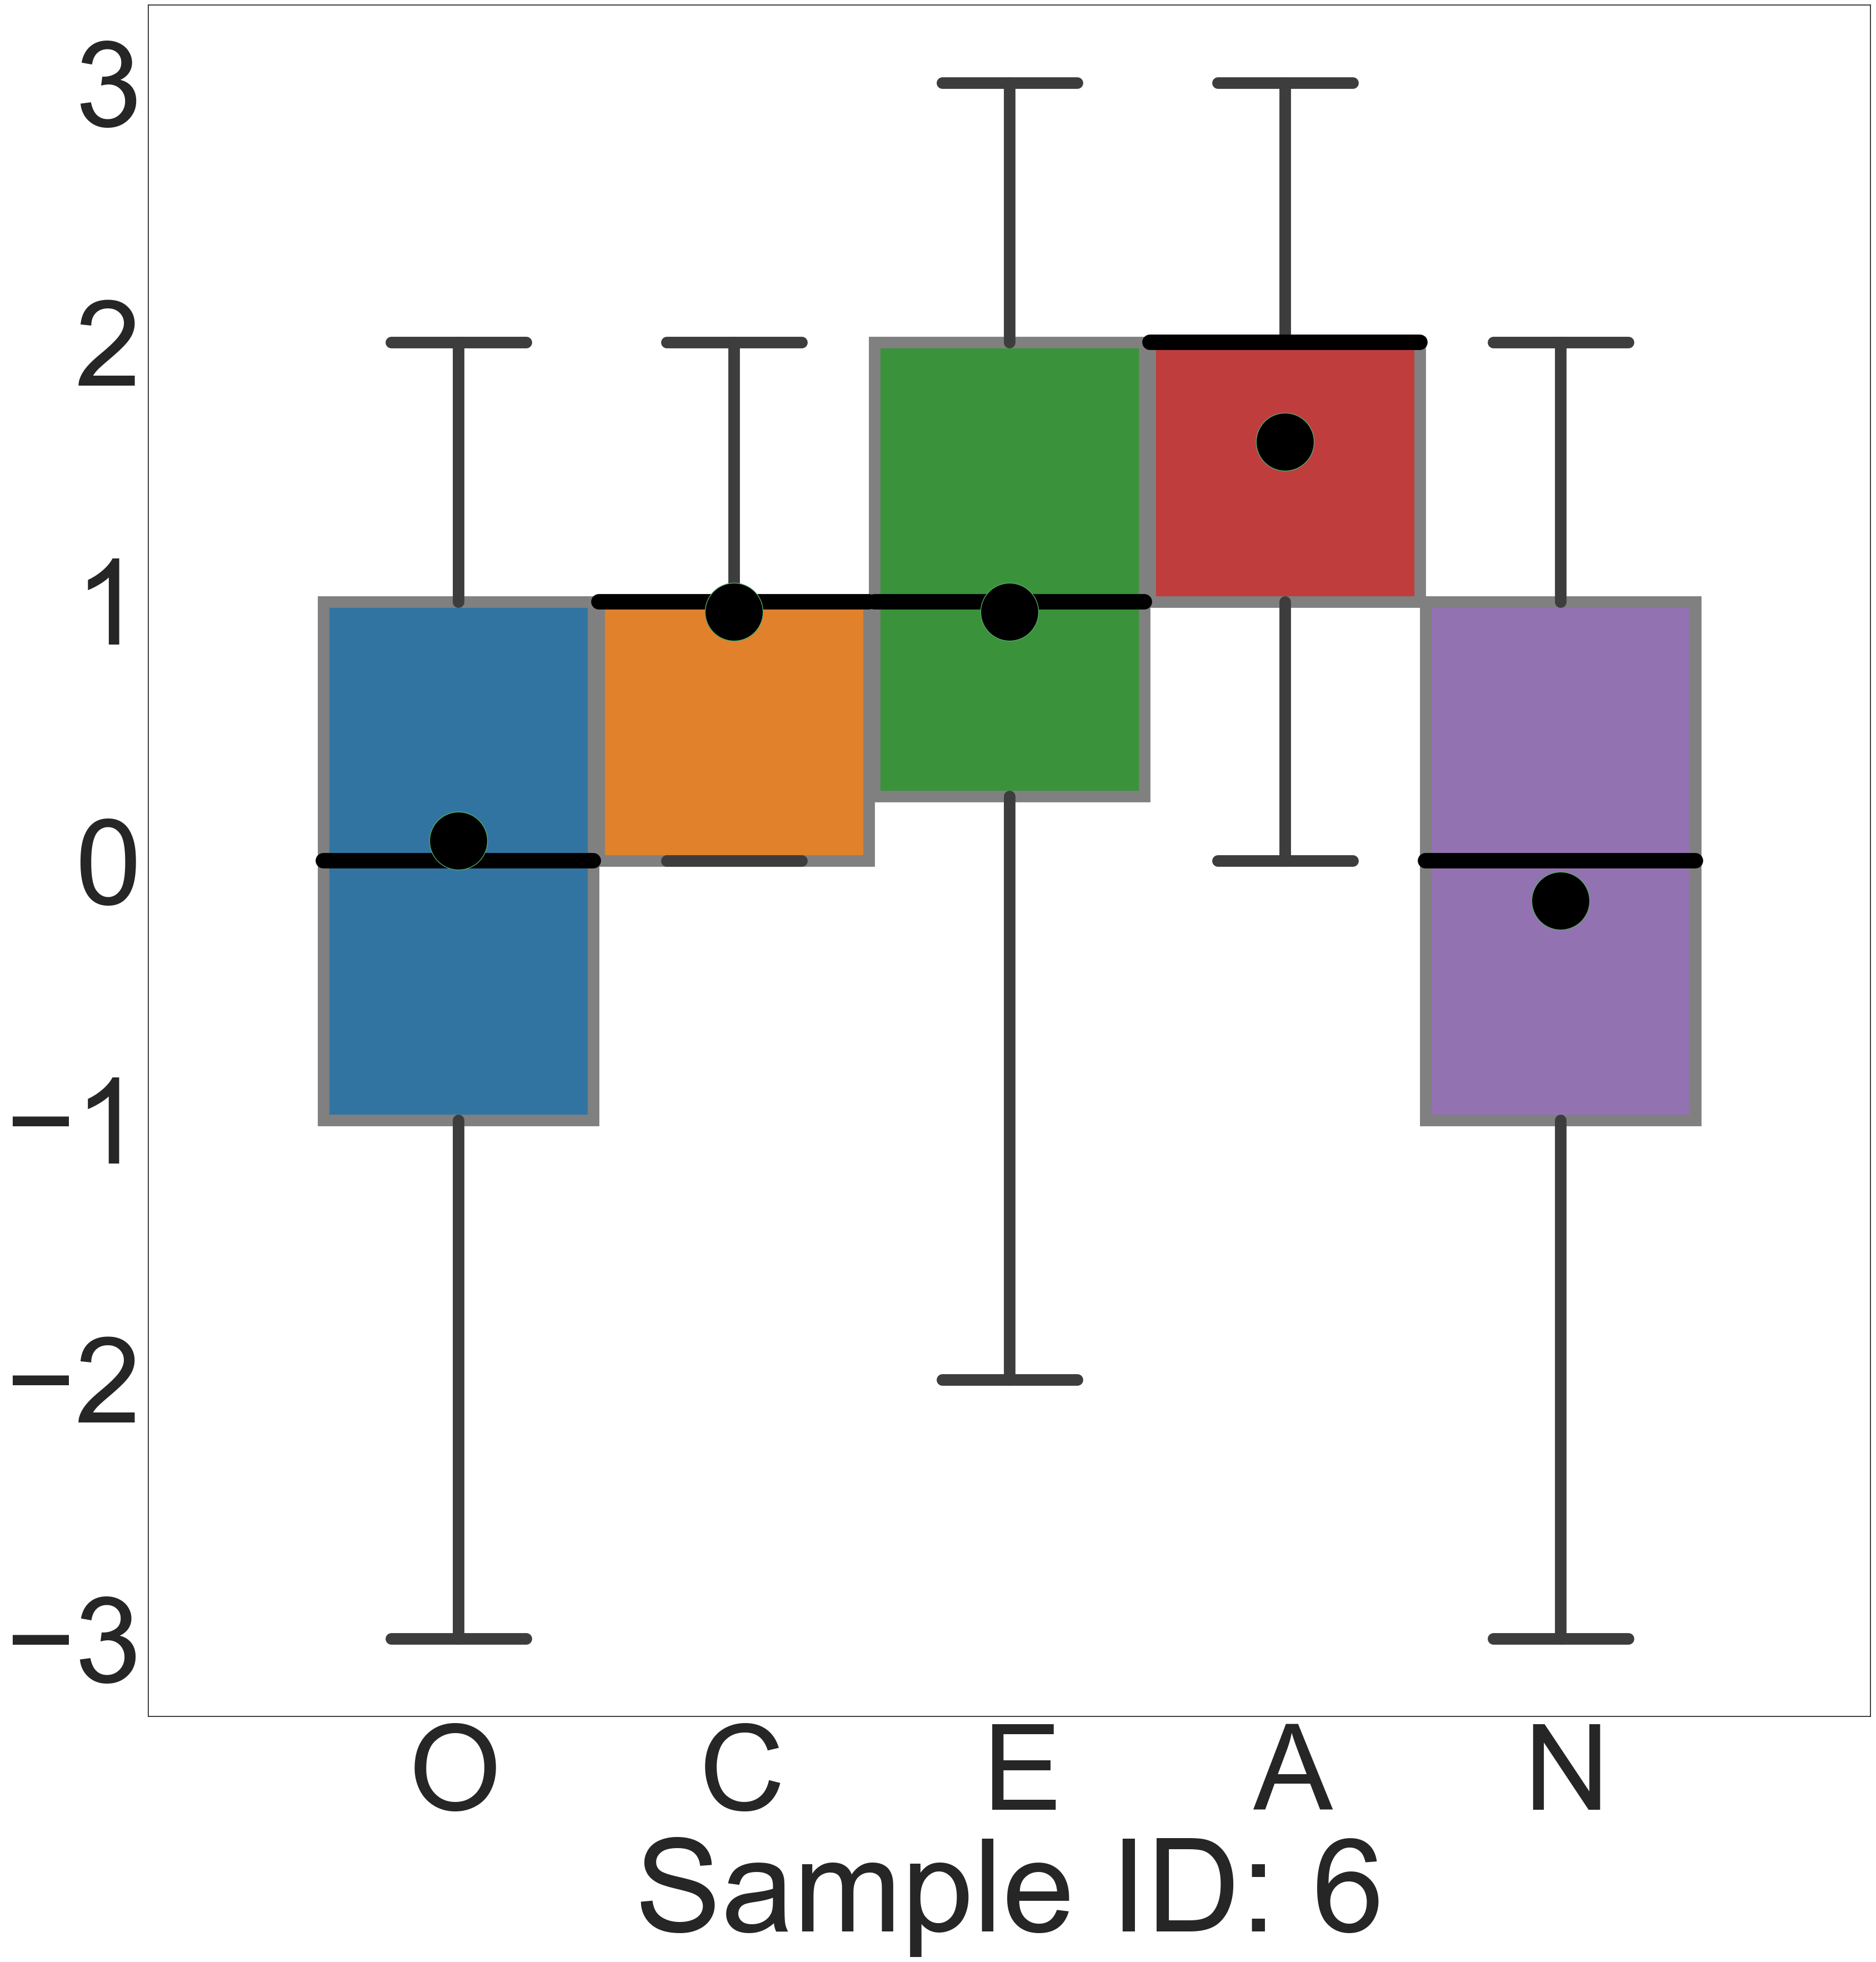

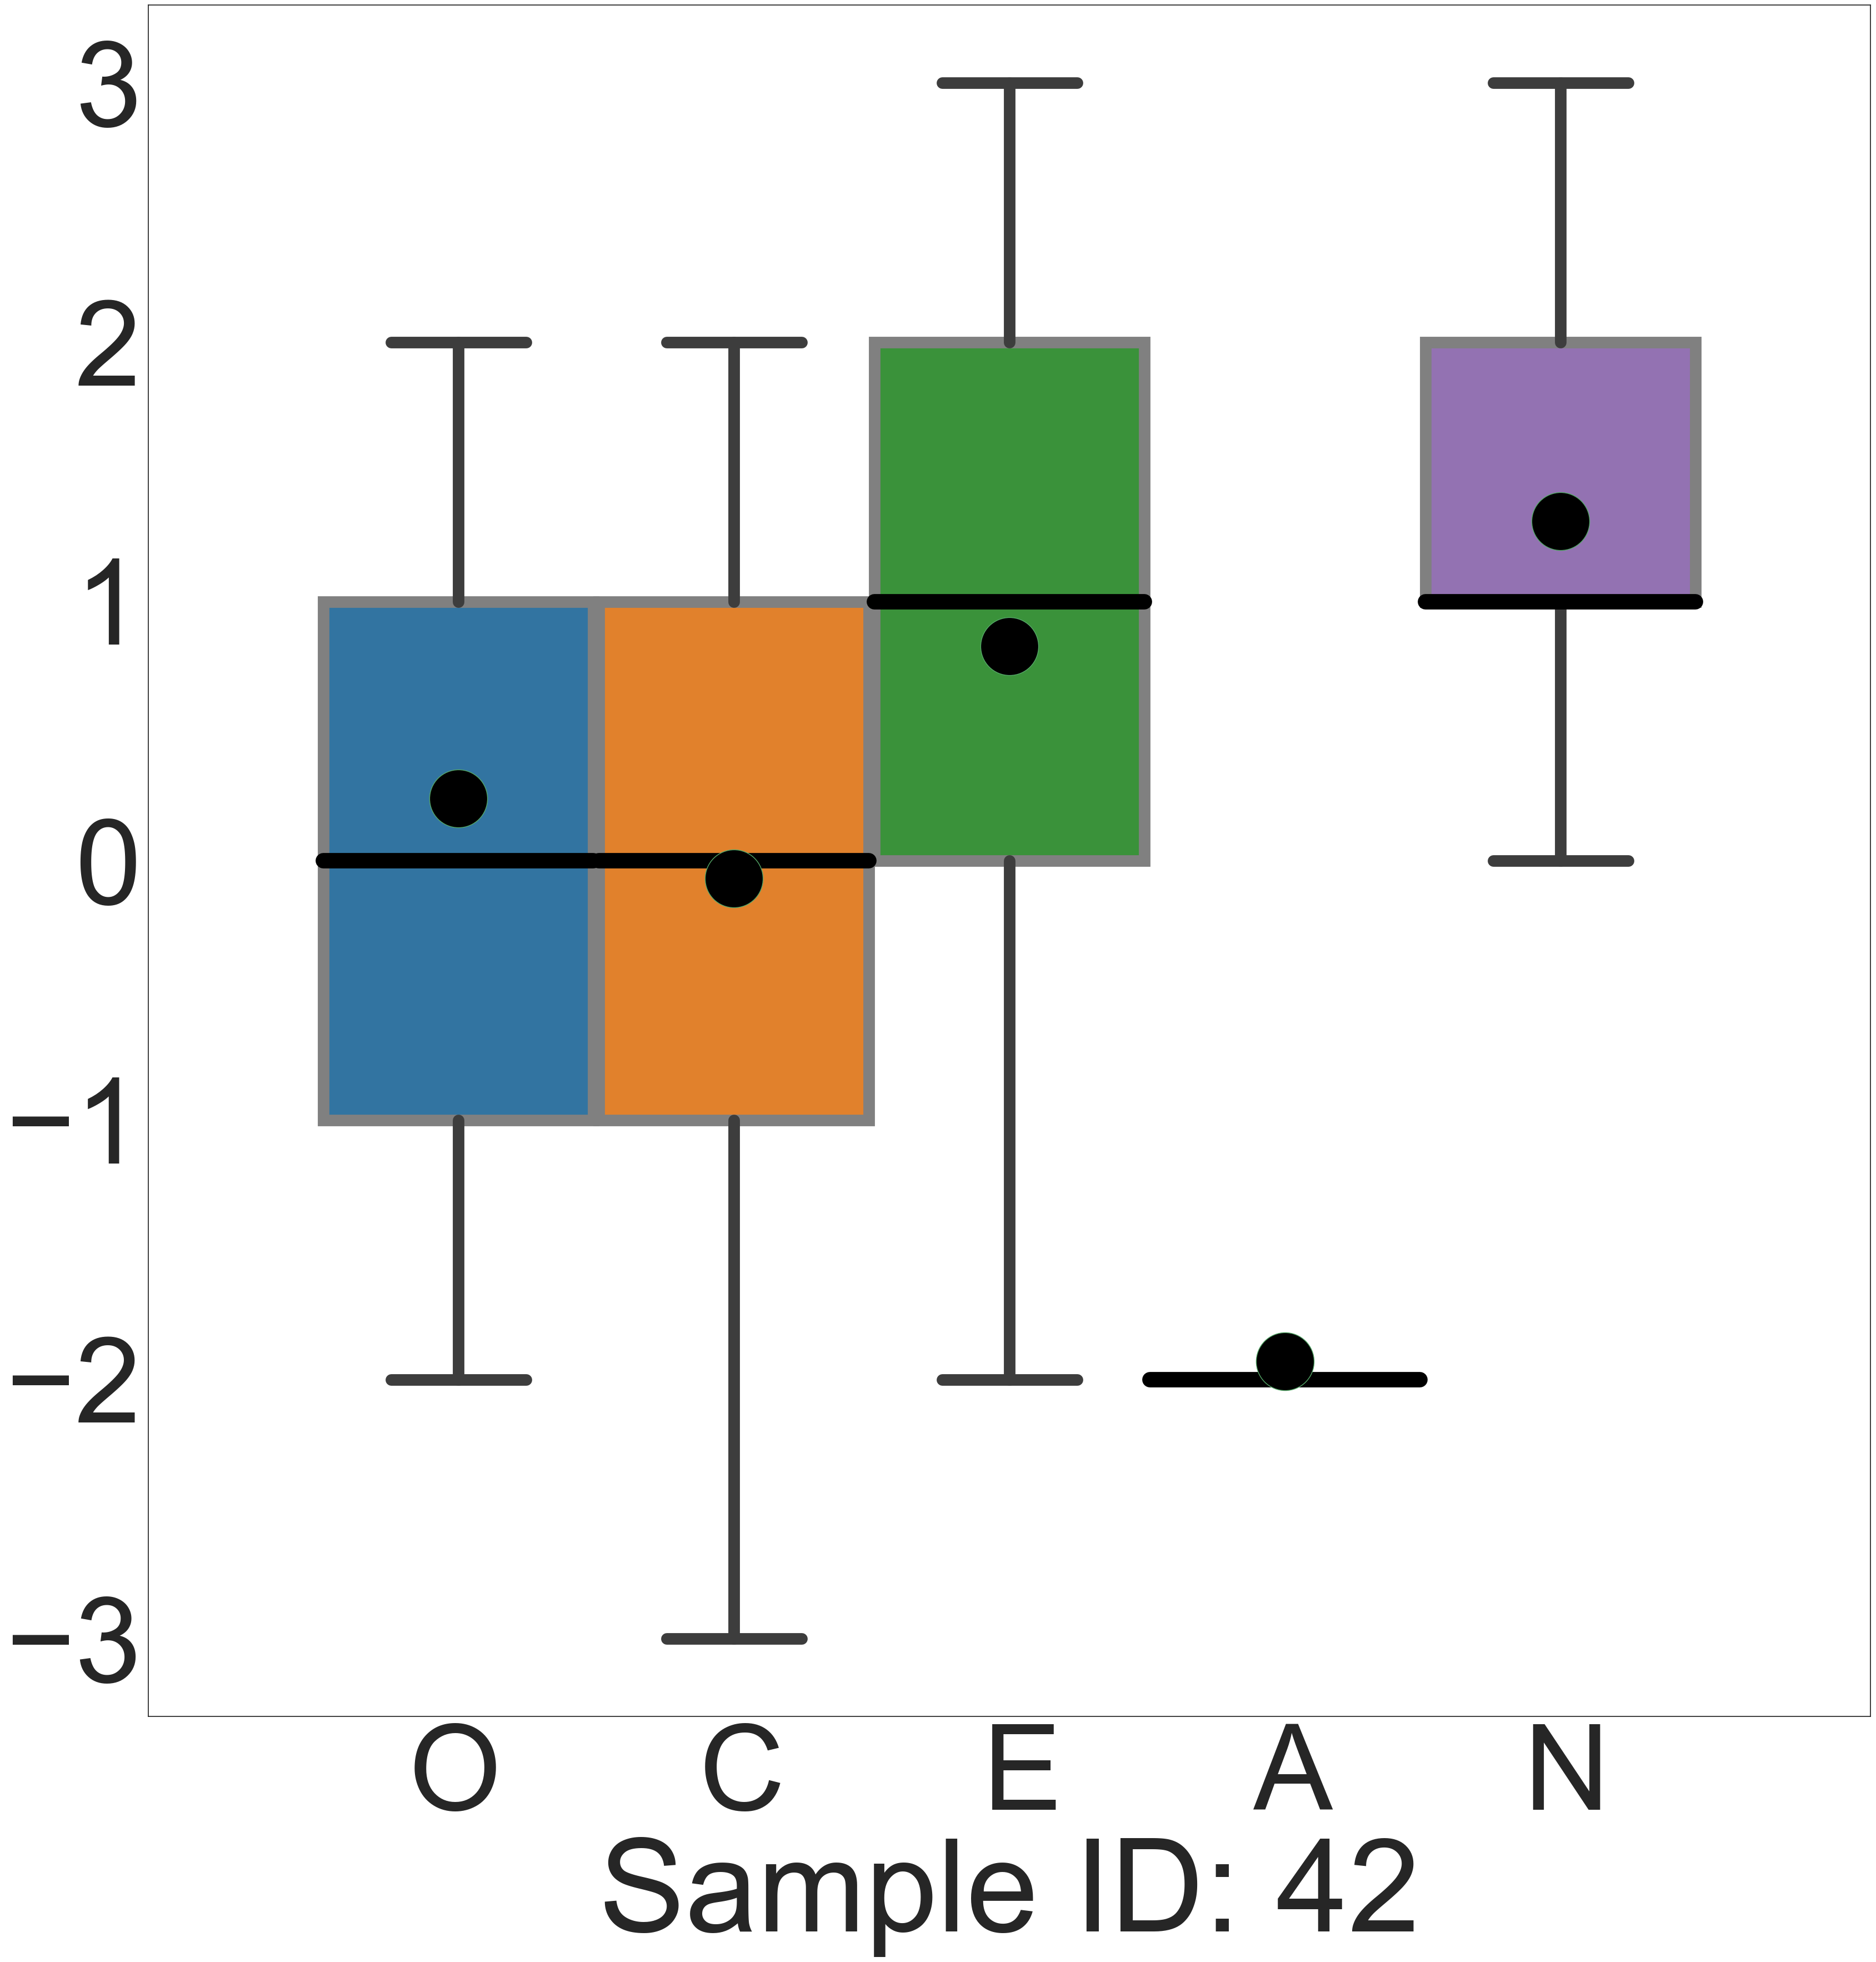

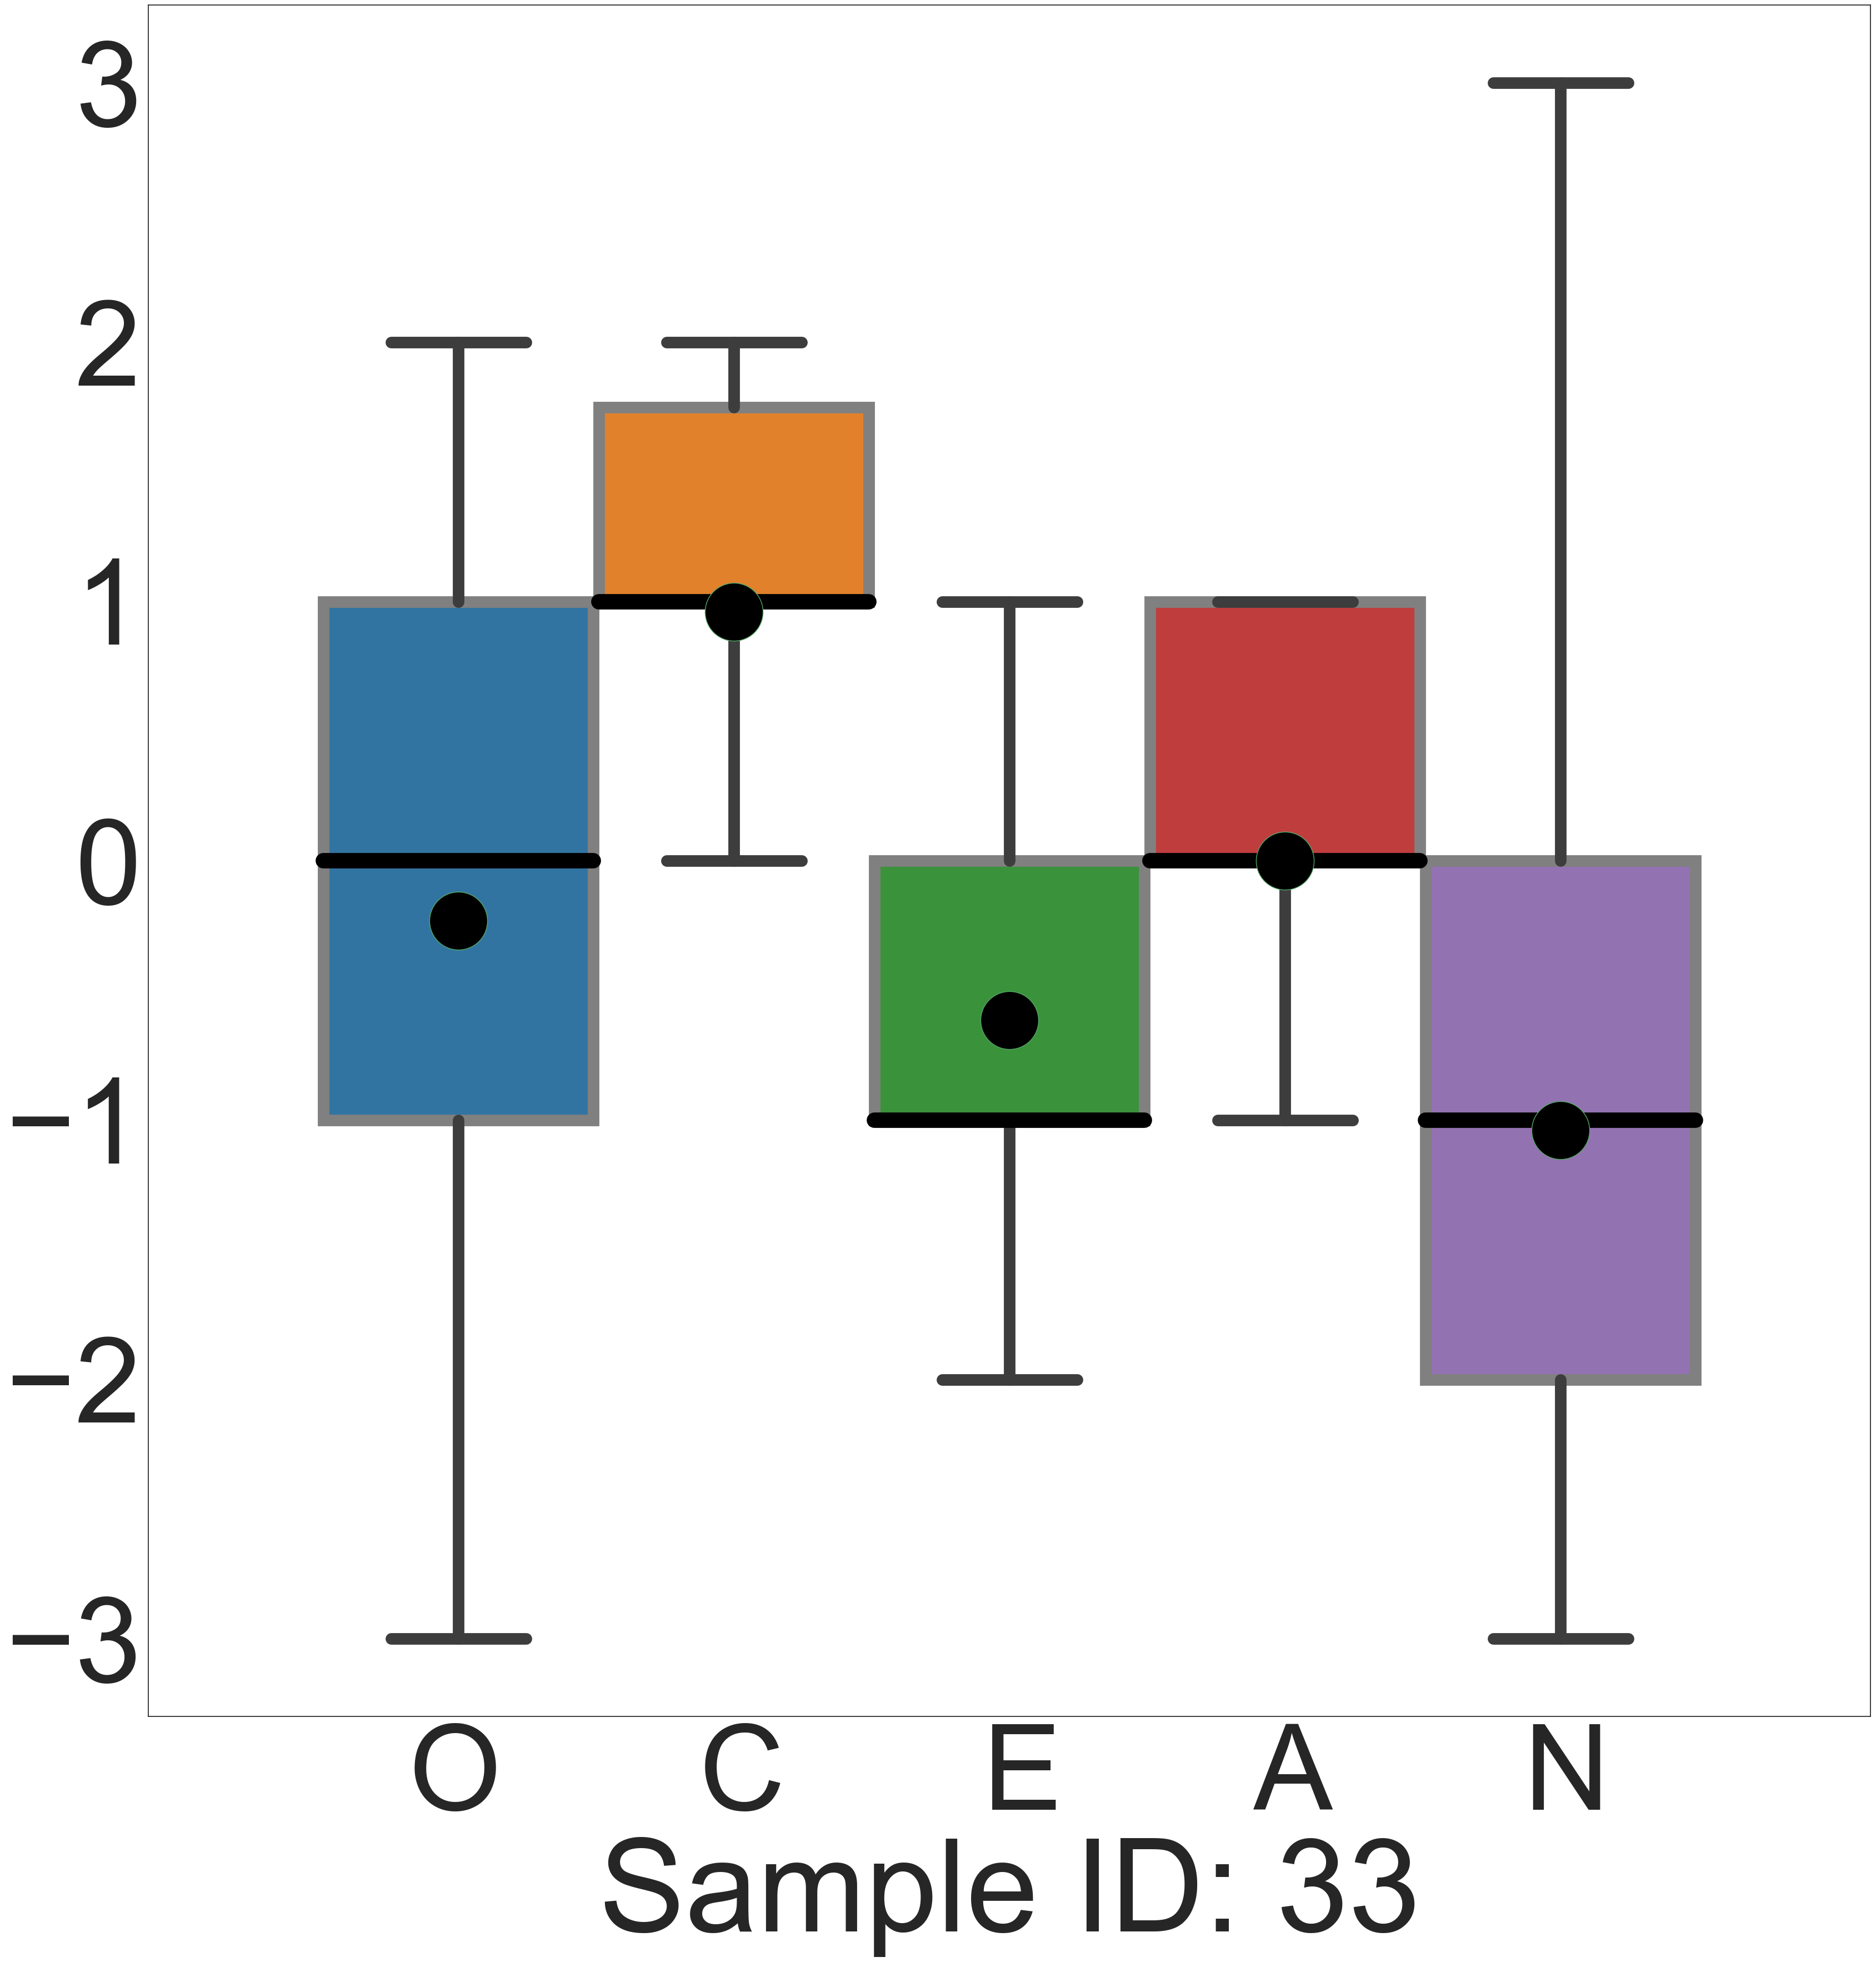

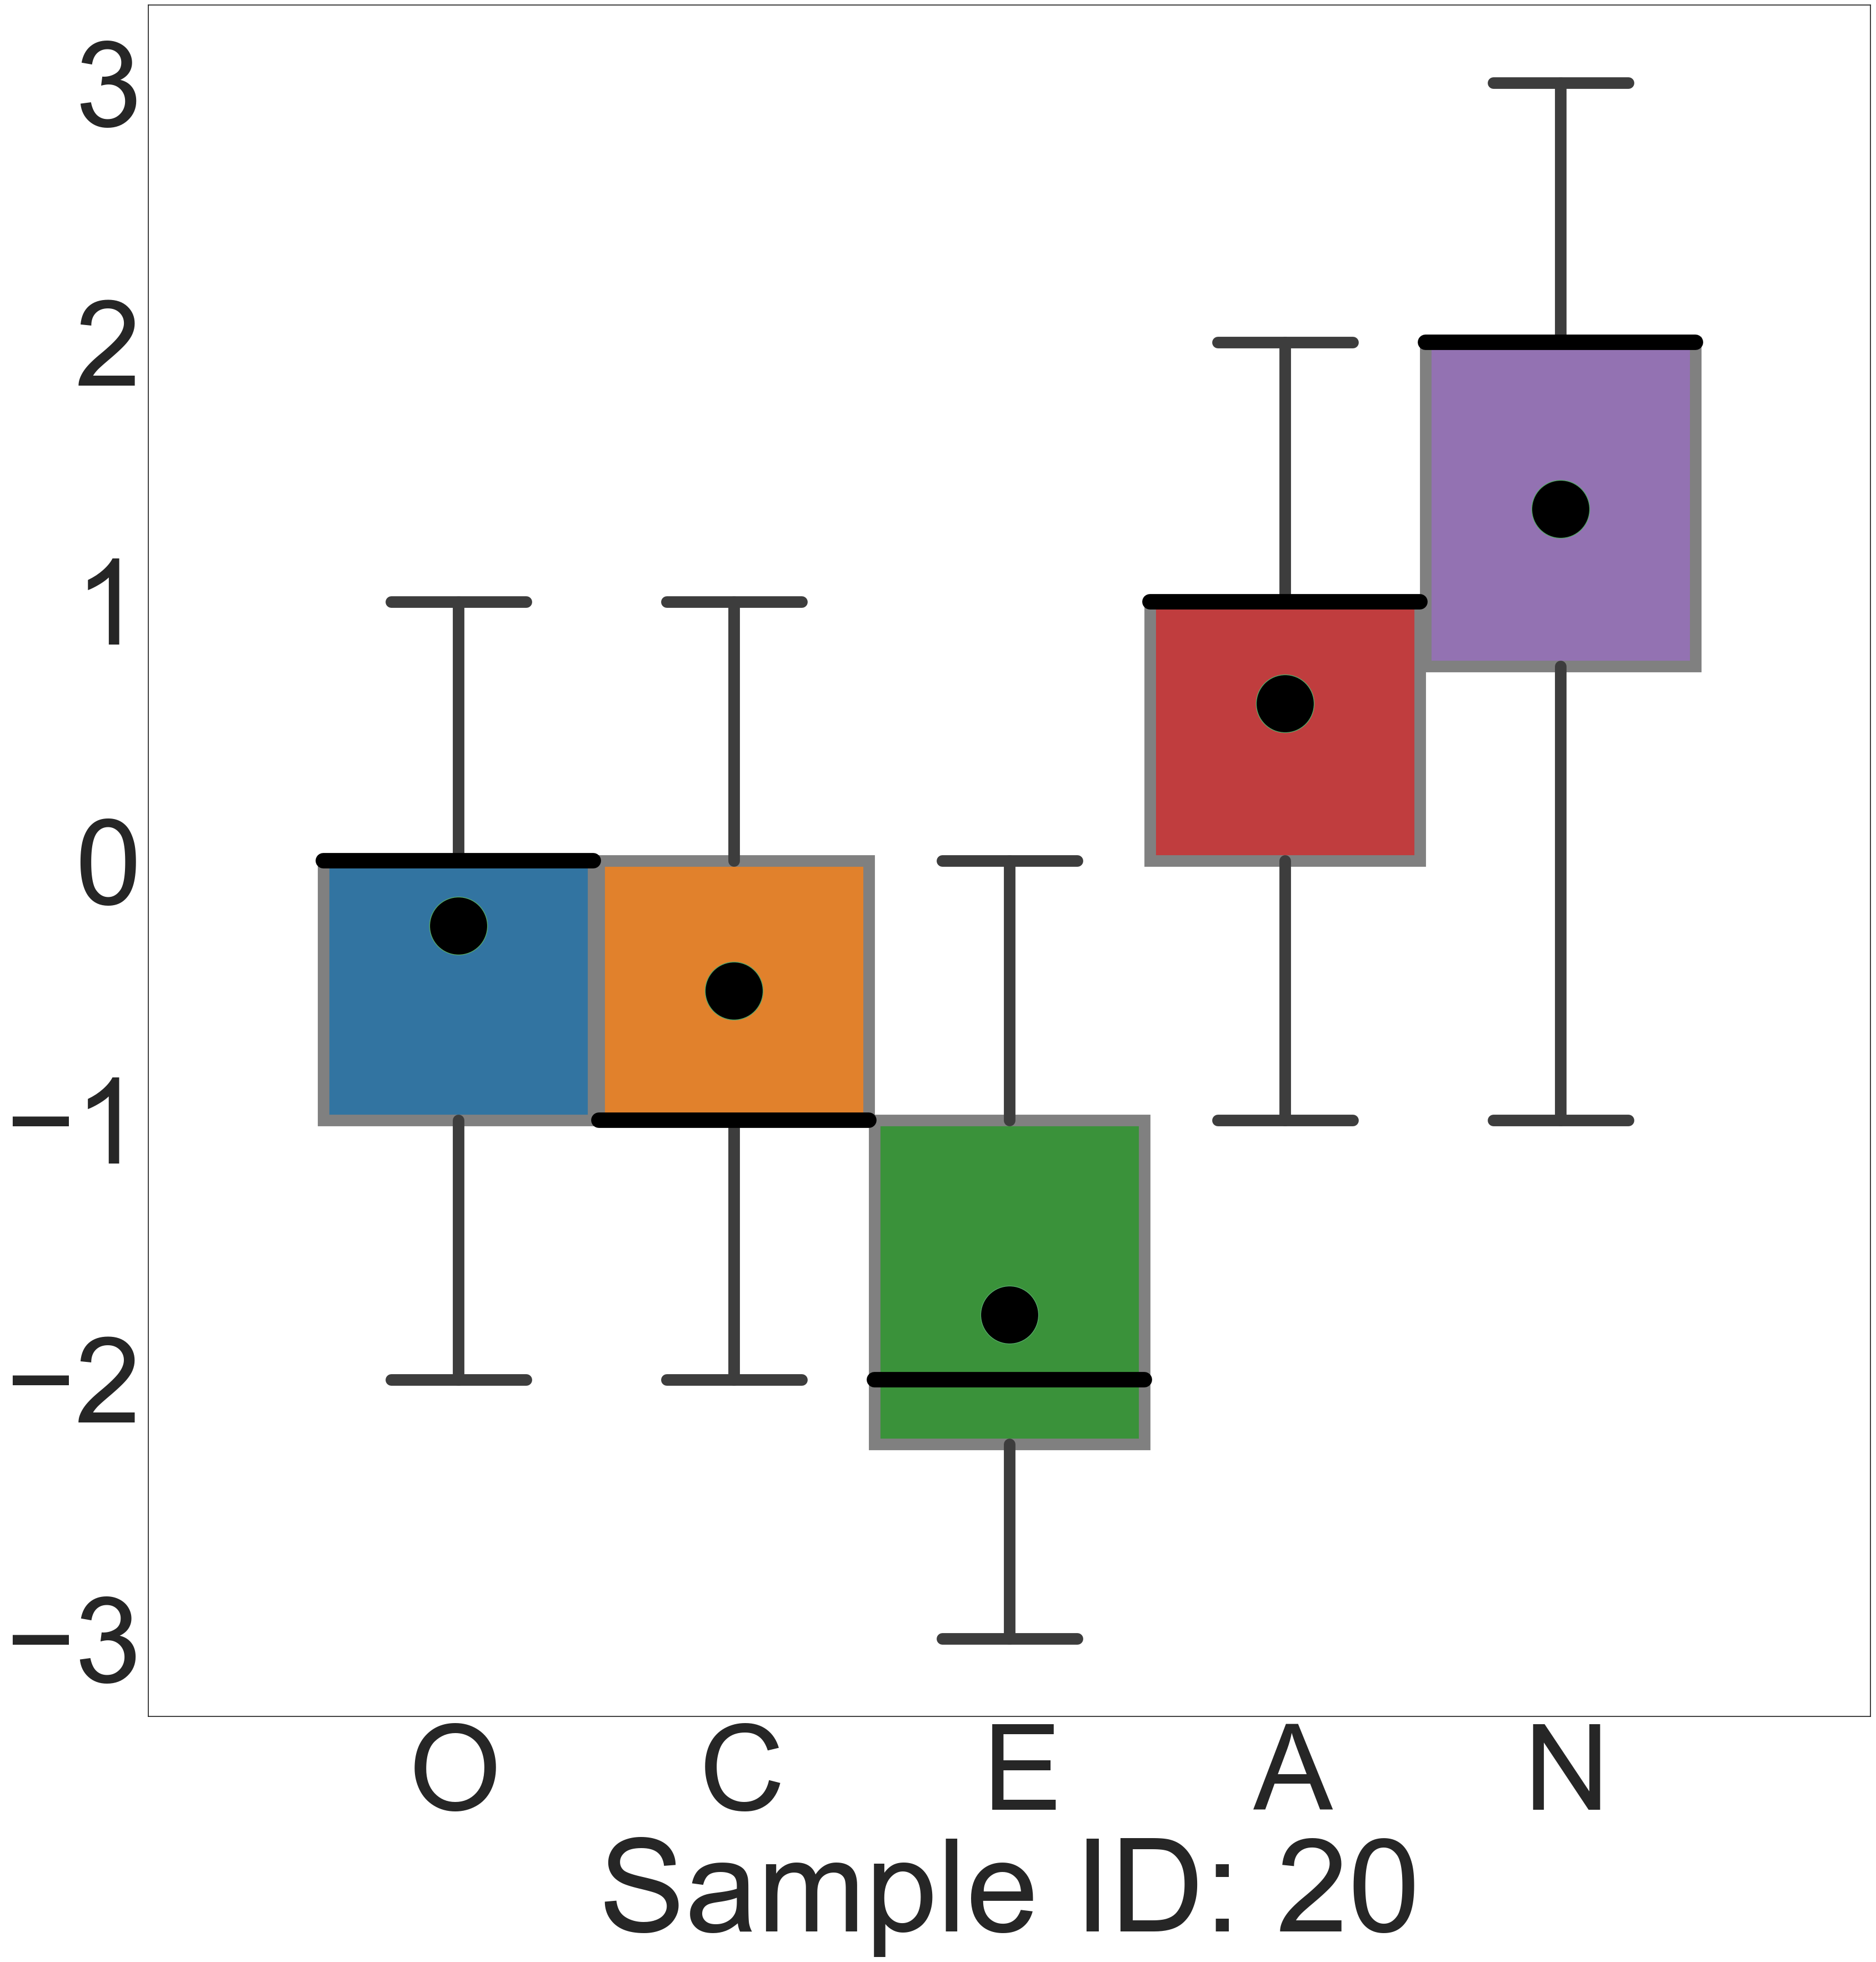

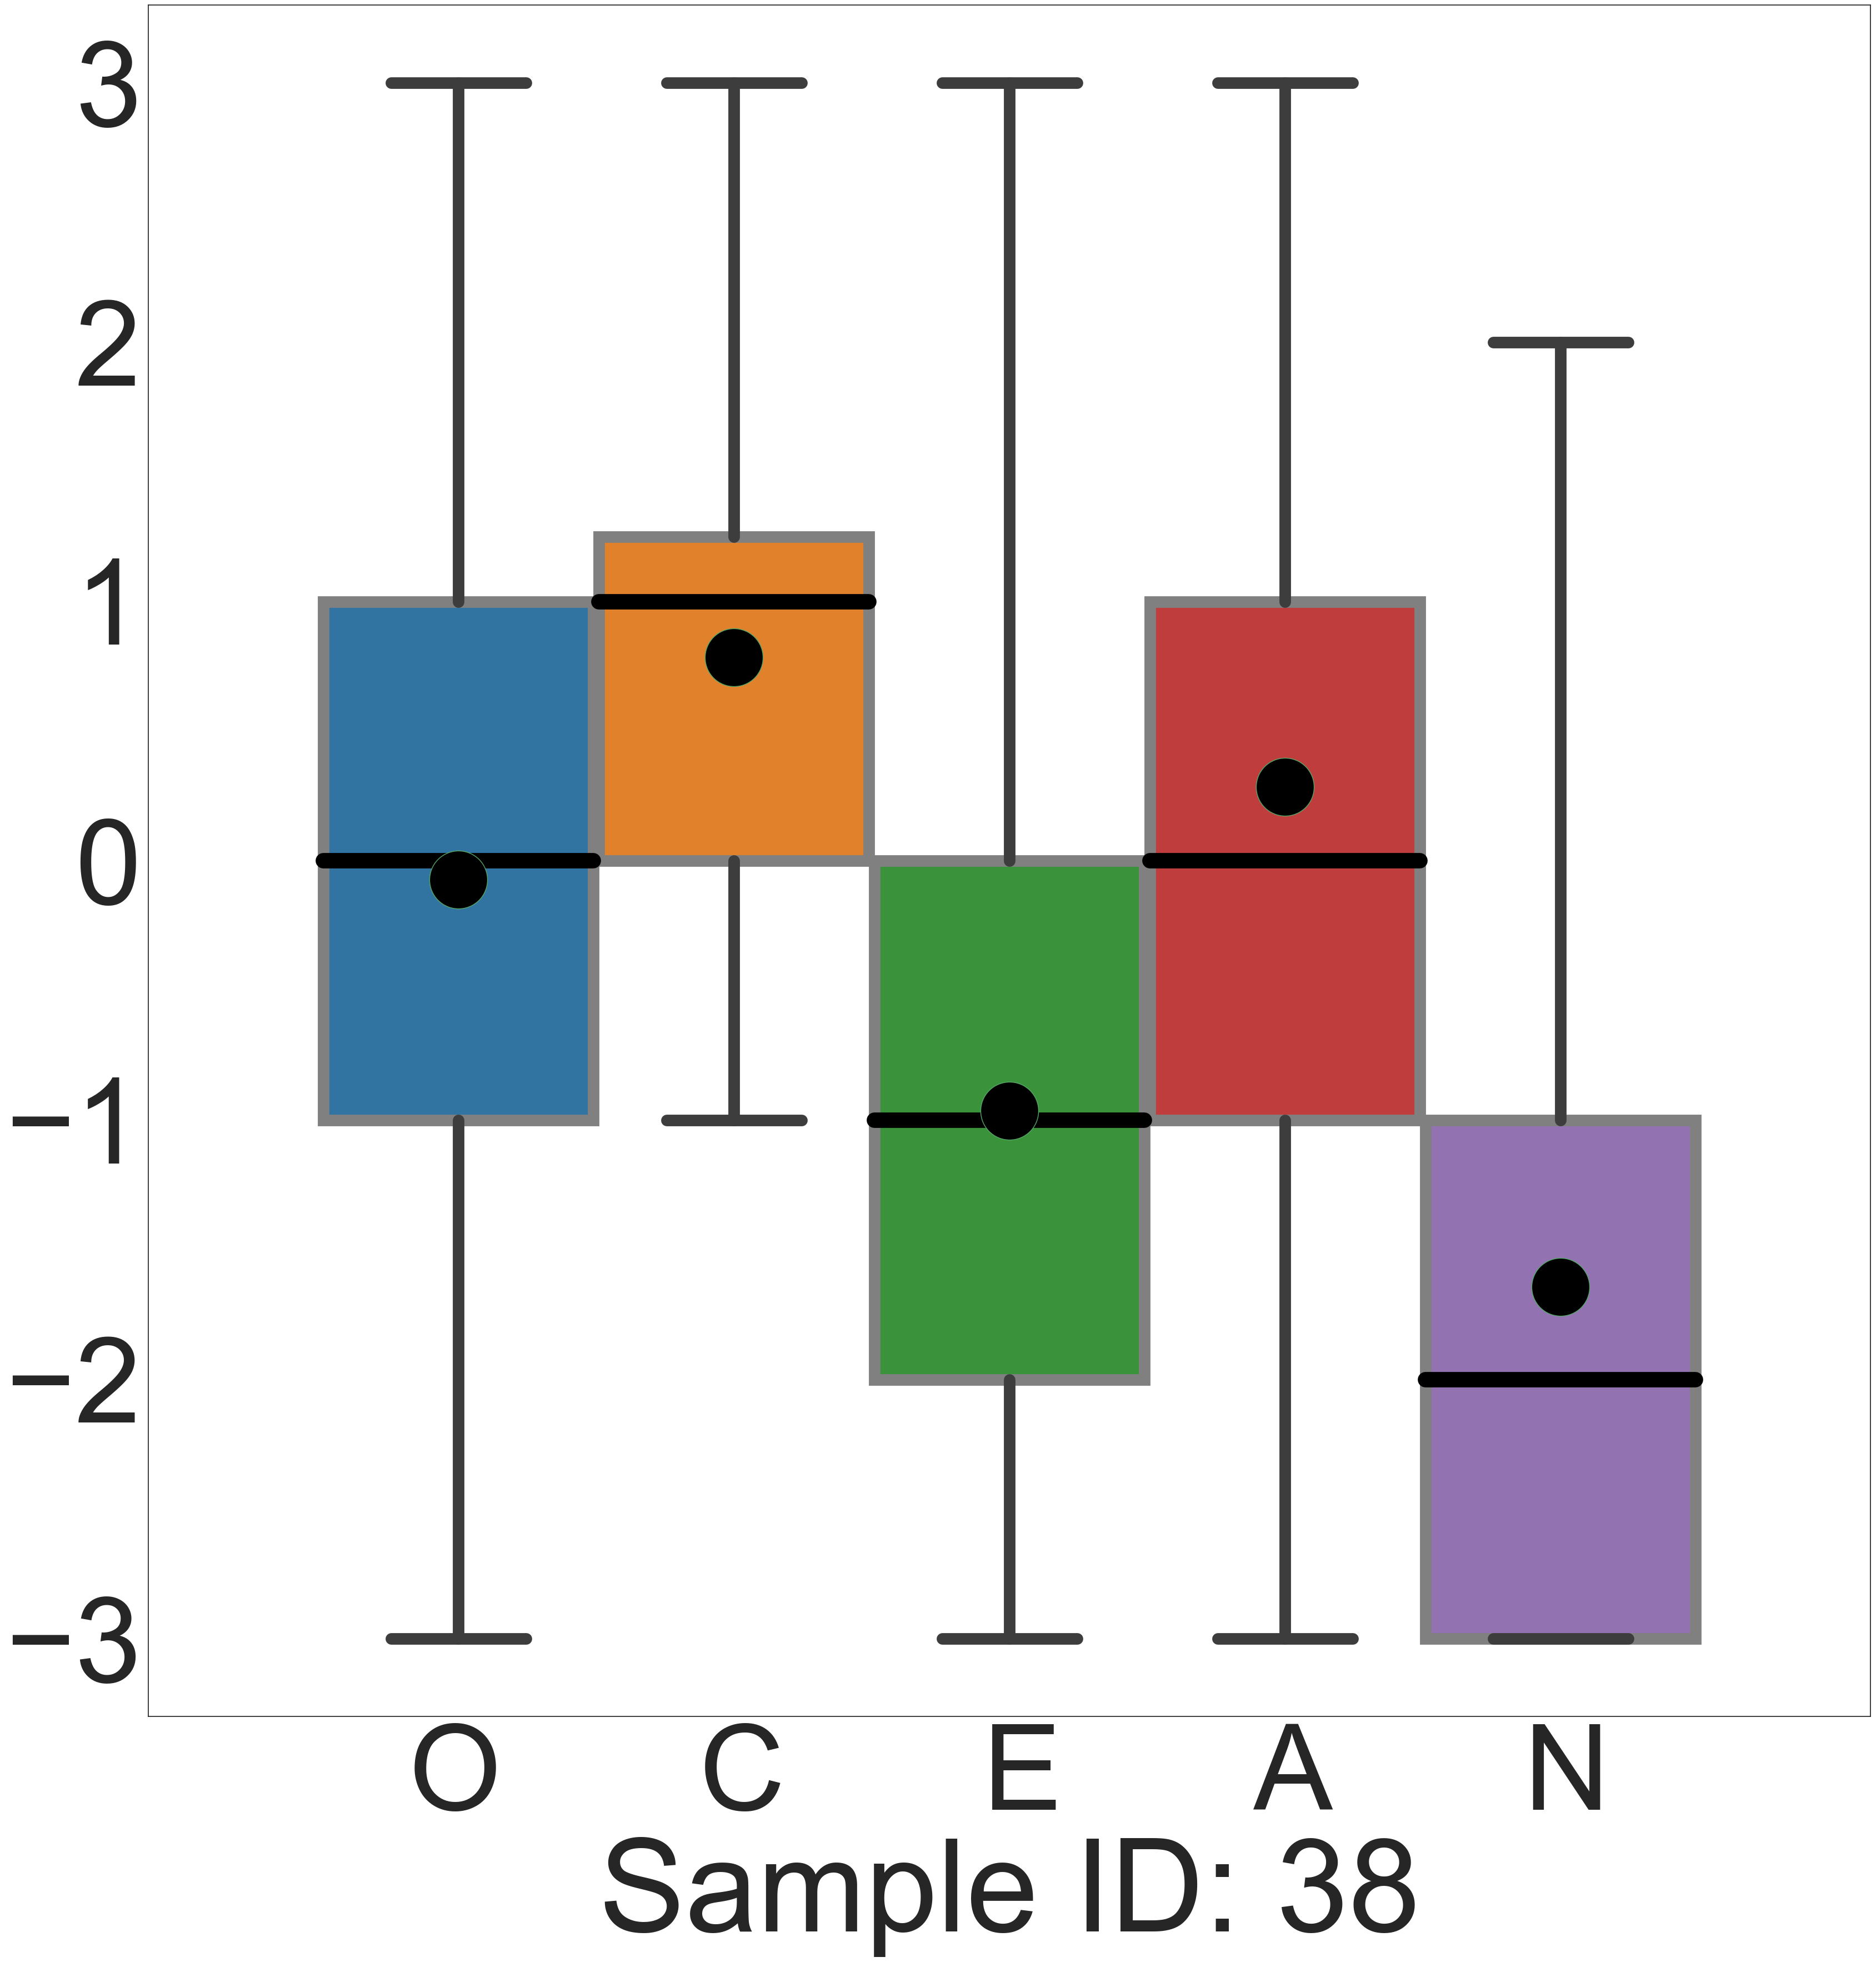

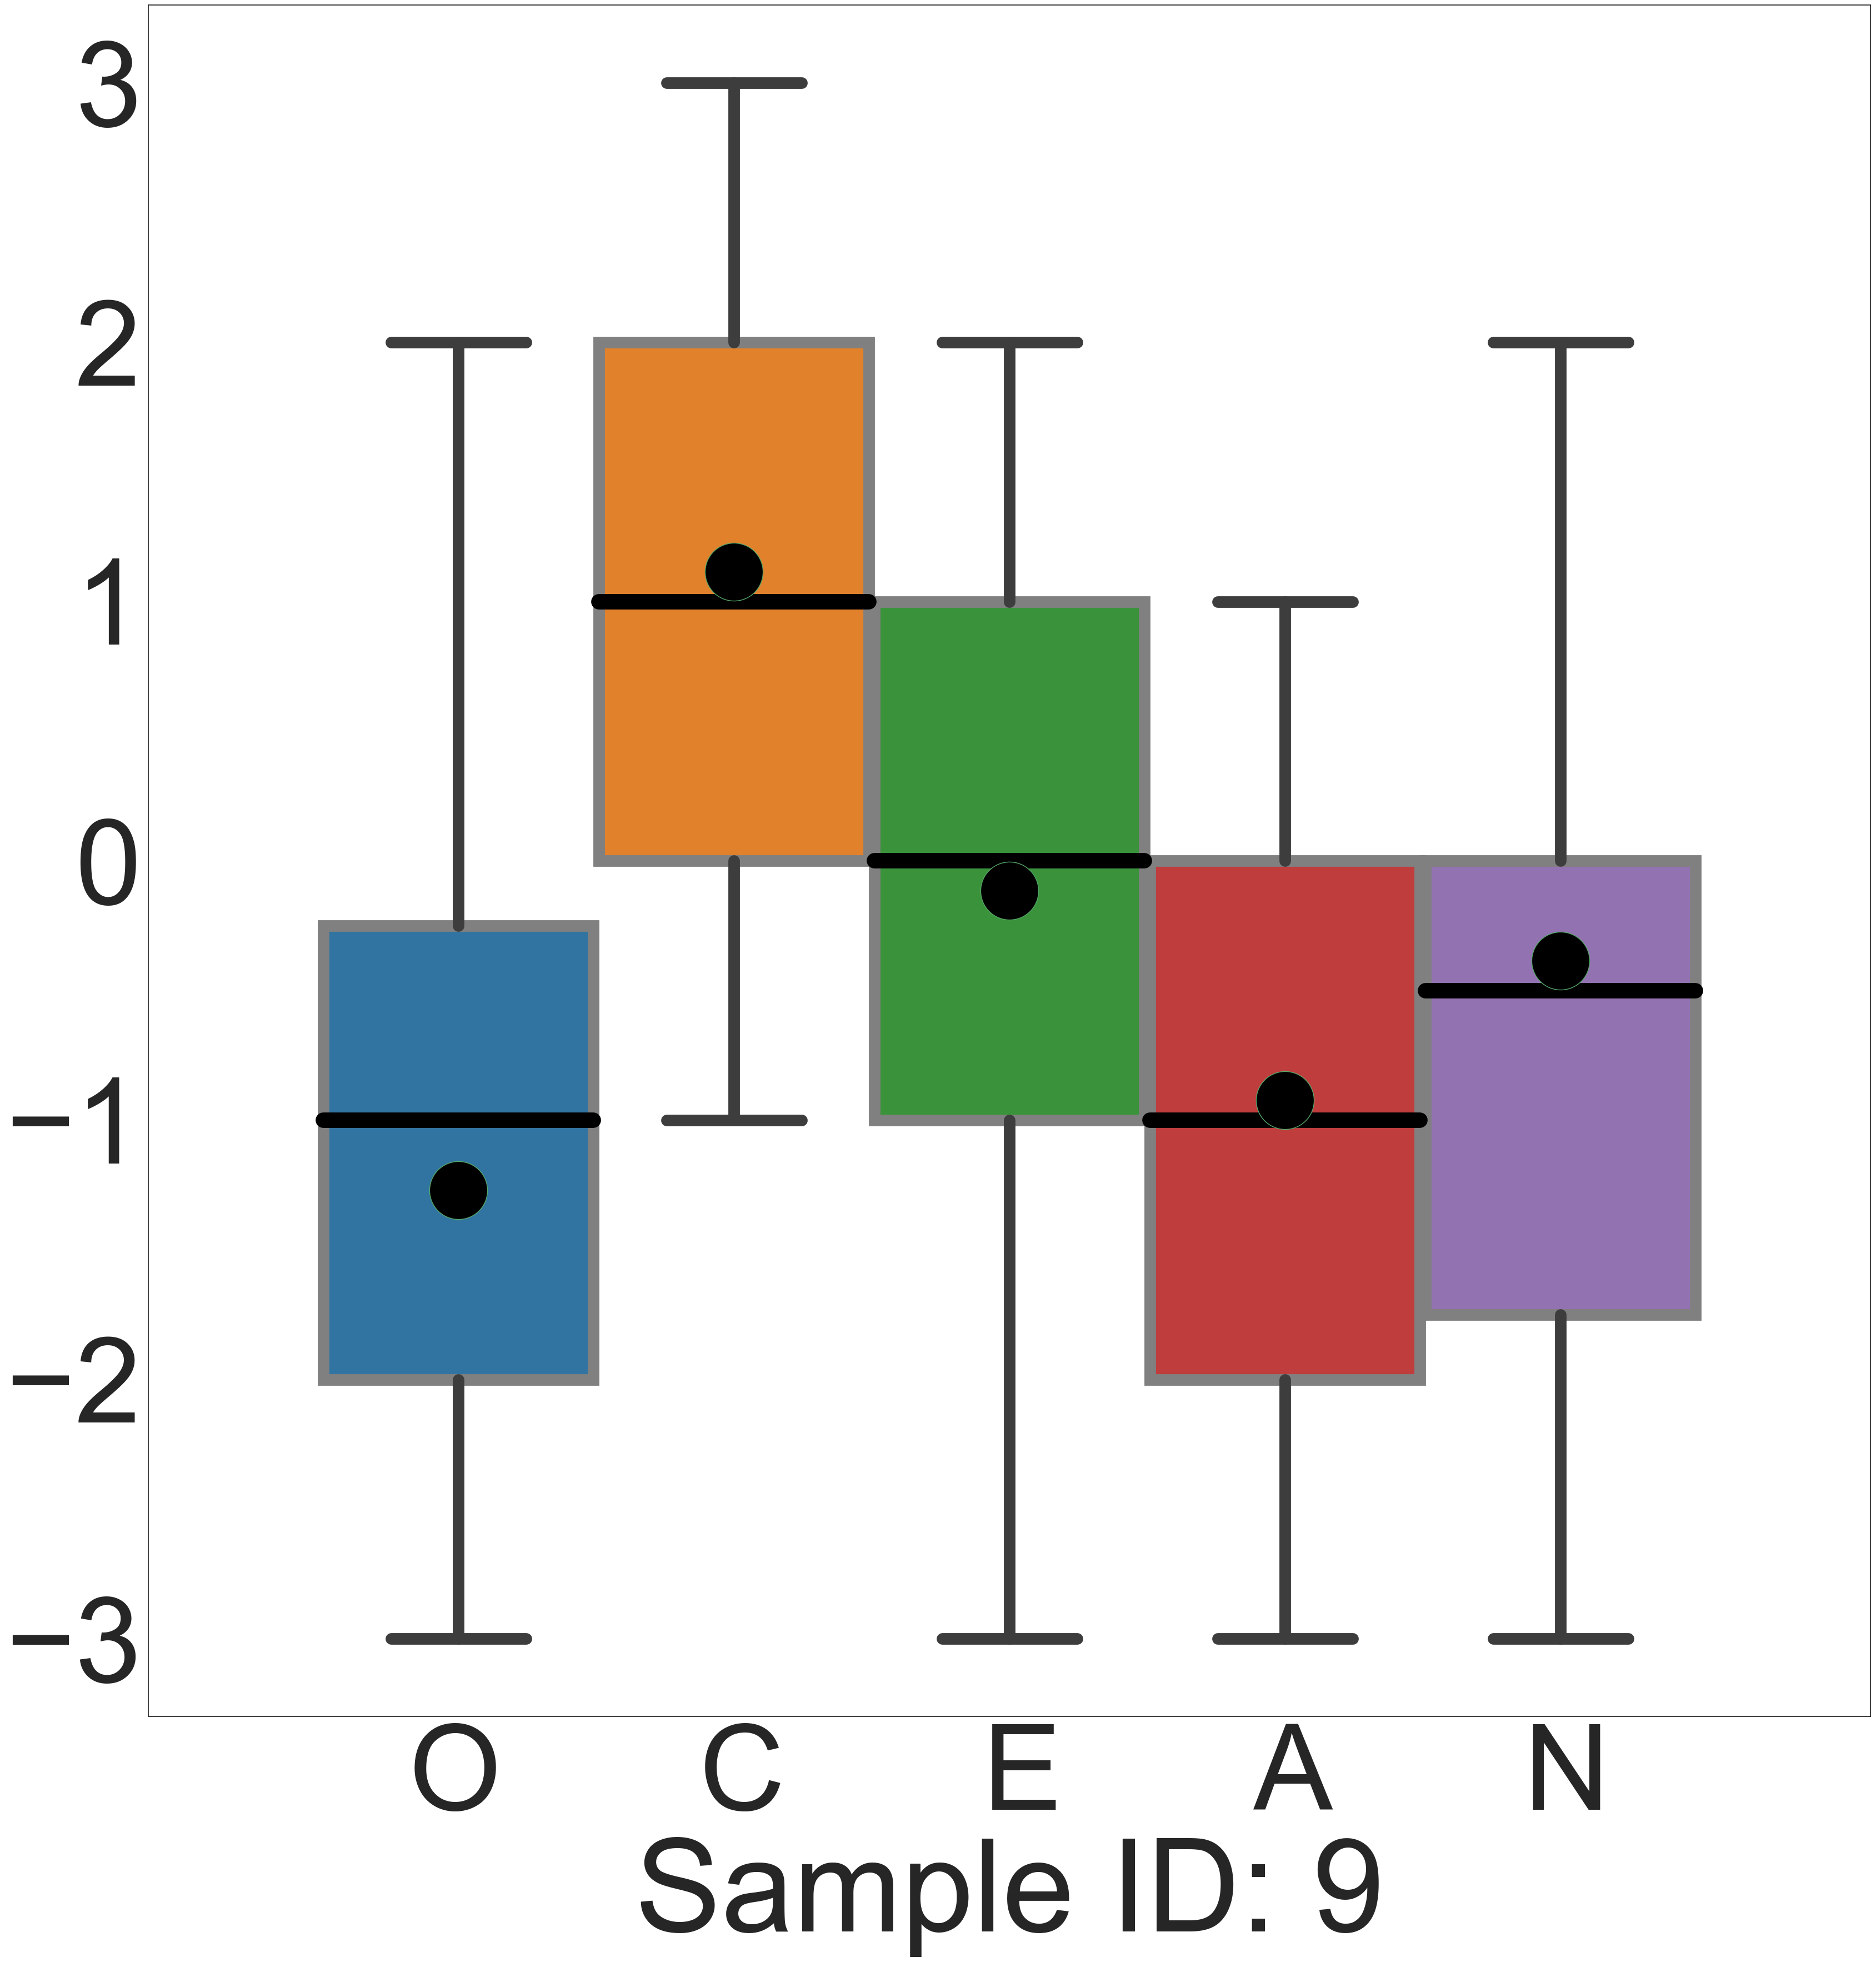

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def drawOCEAN(index):
    sett = rslt_df[rslt_df['SampleNo'] == index]
    
    df_melt = pd.melt(sett.reset_index(), id_vars=['UserMail','SampleNo'], value_vars=['O','C','E','A','N'])
    
    sns.set(rc={'figure.figsize':(40,40)})
    sns.set(font_scale = 14)

    sns.set_style("white")
    ax = sns.boxplot(x='SampleNo', y='value', hue="variable", palette=sns.color_palette('tab10'), data=df_melt, linewidth = 15, color='black', showfliers = False, showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"black", 
                      "markersize":"75"}, medianprops=dict(color='black', alpha=1, linewidth = 20),boxprops=dict(edgecolor='gray'))
    ax.set(xlabel='Sample ID: ' + str(index),ylabel='')
    ax.set_xticklabels(["O      C      E      A      N"])
    plt.legend([],[], frameon=False)
    plt.show()

selected_ones = [3,9,36,26,13,29,45,20,40,6,42,33,20,38,9]
for i in selected_ones:
    drawOCEAN(i) # should use id of sample to generate other graphs

# Calculate ANOVA used in Table 2

In [3]:
# calculates ANOVA

from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

OCEAN = ['O','C','E','A','N']

for ocean in OCEAN:
    vlsarray = []
    for i in range(50):
        vlsarray.append([])
    for index, row in rslt_df.iterrows():
        vlsarray[row['SampleNo']].append(row[ocean])

    f_statistic, p_value = f_oneway(*vlsarray)
    print(ocean + " " + str(f_statistic) + " " + str(p_value))
    
    new_Array=[]
    for i,k in enumerate(vlsarray):
        for n in k:
            new_Array.append([n,i])
    
    
    test_df = pd.DataFrame(data=np.array(new_Array), columns=["value","sample"])
    

    mod = ols('value ~ C(sample)', data=test_df).fit()

    aov_table = sm.stats.anova_lm(mod, typ=2)
    print(aov_table)
    esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
    print(esq_sm)
    print("")
    print("")

O 5.529977220398119 7.725832736275113e-29
                sum_sq      df         F        PR(>F)
C(sample)   486.348398    49.0  5.529977  7.725833e-29
Residual   2336.894205  1302.0       NaN           NaN
0.17226588942114535


C 3.5170656103621436 1.9600987522447862e-14
                sum_sq      df         F        PR(>F)
C(sample)   263.934999    49.0  3.517066  1.960099e-14
Residual   1994.028758  1302.0       NaN           NaN
0.11689071540478209


E 12.75353795666256 8.221203102041161e-80
                sum_sq      df          F        PR(>F)
C(sample)  1222.645631    49.0  12.753538  8.221203e-80
Residual   2547.327742  1302.0        NaN           NaN
0.32431147646501646


A 8.943868029200479 1.436121727490555e-53
                sum_sq      df         F        PR(>F)
C(sample)   866.919835    49.0  8.943868  1.436122e-53
Residual   2575.540963  1302.0       NaN           NaN
0.25183143279850967


N 5.58988018302463 2.823810871972646e-29
                sum_sq      df        

In [4]:
# calculates ANOVA

from scipy.stats import f_oneway
import pandas as pd
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

OCEAN = ['O','C','E','A','N']

for ocean in OCEAN:
    vlsarray = []
    for i in range(50):
        vlsarray.append([])
    for index, row in rslt_df.iterrows():
        vlsarray[row['SampleNo']].append(row[ocean])

    f_statistic, p_value = f_oneway(*vlsarray)
    print(ocean + " " + str(f_statistic) + " " + str(p_value))
    
tukeyO = pairwise_tukeyhsd(endog=rslt_df['O'], groups=rslt_df['SampleNo'], alpha=0.05)
tukeyC = pairwise_tukeyhsd(endog=rslt_df['C'], groups=rslt_df['SampleNo'], alpha=0.05)
tukeyE = pairwise_tukeyhsd(endog=rslt_df['E'], groups=rslt_df['SampleNo'], alpha=0.05)
tukeyA = pairwise_tukeyhsd(endog=rslt_df['A'], groups=rslt_df['SampleNo'], alpha=0.05)
tukeyN = pairwise_tukeyhsd(endog=rslt_df['N'], groups=rslt_df['SampleNo'], alpha=0.05)

dfO = pd.DataFrame(data=tukeyO._results_table.data[1:], columns=tukeyO._results_table.data[0])
dfC = pd.DataFrame(data=tukeyC._results_table.data[1:], columns=tukeyC._results_table.data[0])
dfE = pd.DataFrame(data=tukeyE._results_table.data[1:], columns=tukeyE._results_table.data[0])
dfA = pd.DataFrame(data=tukeyA._results_table.data[1:], columns=tukeyA._results_table.data[0])
dfN = pd.DataFrame(data=tukeyN._results_table.data[1:], columns=tukeyN._results_table.data[0])

pairs_o = [[3,9],[3,36],[9,36]]
pairs_c = [[13,26],[26,29],[13,29]]
pairs_e = [[20,45],[40,45],[20,40]]
pairs_a = [[6,42],[6,33],[33,42]]
pairs_n = [[20,38],[9,20],[9,38]]

OCEAN = ['O','C','E','A','N']

findsamp = {
    3 : "O_MAX",
    9 : "O_MIN", #_N_MID",
    36: "O_MID",
    26: "C_MAX",
    13: "C_MIN",
    29: "C_MID",
    45: "E_MAX",
    20: "E_MIN", #_N_MAX",
    40: "E_MID",
    6: "A_MAX",
    42: "A_MIN",
    33: "A_MID",
    38: "N_MIN"
}

rows, cols = (5, 3)
strings = [[0]*cols]*rows

pair_type = pairs_c
for idx, df in enumerate([dfO,dfC,dfE,dfA,dfN]):
    print(OCEAN[idx])
    for index, row in df.iterrows():
        if([row['group1'],row['group2']] in pair_type):
            pair_index = pair_type.index([row['group1'],row['group2']])
            strings[idx][pair_index] = str(findsamp[row['group2']]) + "-" +  str(findsamp[row['group1']]) + "\t" + str('{:.3f}'.format(row['meandiff'])) + "\t" + str('{:.3f}'.format(row['p-adj']))
            print(str(findsamp[row['group2']]) + "-" +  str(findsamp[row['group1']]) + "\t" + str('{:.3f}'.format(row['meandiff'])) + "\t" + str('{:.3f}'.format(row['p-adj'])))

O 5.529977220398119 7.725832736275113e-29
C 3.5170656103621436 1.9600987522447862e-14
E 12.75353795666256 8.221203102041161e-80
A 8.943868029200479 1.436121727490555e-53
N 5.58988018302463 2.823810871972646e-29


C:\Users\Sina-\AppData\Roaming\Python\Python310\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


O
C_MAX-C_MIN	-0.494	1.000
C_MID-C_MIN	-0.643	1.000
C_MID-C_MAX	-0.149	1.000
C
C_MAX-C_MIN	2.077	0.000
C_MID-C_MIN	1.286	0.074
C_MID-C_MAX	-0.792	0.985
E
C_MAX-C_MIN	-0.167	1.000
C_MID-C_MIN	0.214	1.000
C_MID-C_MAX	0.381	1.000
A
C_MAX-C_MIN	1.708	0.013
C_MID-C_MIN	0.179	1.000
C_MID-C_MAX	-1.530	0.069
N
C_MAX-C_MIN	-0.827	0.999
C_MID-C_MIN	0.143	1.000
C_MID-C_MAX	0.970	0.980


# Calculate Pairwise Tukey HSD for the Samples in Table 3

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=rslt_df['O'],
                          groups=rslt_df['SampleNo'],
                          alpha=0.05)

#display results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   1.3241 0.2202 -0.1803  2.8284  False
     0      2   0.6812 0.9998 -0.7651  2.1276  False
     0      3   2.2169    0.0  0.7706  3.6633   True
     0      4   0.7407 0.9977 -0.6817  2.1632  False
     0      5   0.1125    1.0 -1.3609  1.5859  False
     0      6    1.151 0.5188 -0.3224  2.6244  False
     0      7   0.9941 0.8701 -0.4943  2.4824  False
     0      8   2.1366    0.0  0.7353  3.5378   True
     0      9  -0.1952    1.0 -1.6686  1.2782  False
     0     10   1.8672 0.0002  0.4331  3.3012   True
     0     11   0.9587 0.9044 -0.5147  2.4321  False
     0     12   0.2963    1.0 -1.1631  1.7557  False
     0     13   2.1098    0.0  0.6634  3.5561   True
     0     14   1.4202 0.0818 -0.0532  2.8936  False
     0     15   1.5556 0.0186  0.0961   3.015   True
     0     16   1.1852 0.4131 -0.2742  2.6446 

In [6]:
tukey = pairwise_tukeyhsd(endog=rslt_df['C'],
                          groups=rslt_df['SampleNo'],
                          alpha=0.05)

#display results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.5833    1.0 -1.9729  0.8063  False
     0      2      0.0    1.0  -1.336   1.336  False
     0      3  -0.1071    1.0 -1.4432  1.2289  False
     0      4  -0.3333    1.0 -1.6473  0.9807  False
     0      5   0.1923    1.0 -1.1687  1.5533  False
     0      6  -0.0385    1.0 -1.3995  1.3226  False
     0      7     0.04    1.0 -1.3348  1.4148  False
     0      8  -0.9375  0.715 -2.2319  0.3569  False
     0      9   0.1154    1.0 -1.2456  1.4764  False
     0     10  -0.3448    1.0 -1.6695  0.9798  False
     0     11      0.5    1.0  -0.861   1.861  False
     0     12   0.0741    1.0 -1.2741  1.4222  False
     0     13  -1.5357 0.0046 -2.8717 -0.1997   True
     0     14   0.0769    1.0 -1.2841  1.4379  False
     0     15   0.1111    1.0  -1.237  1.4592  False
     0     16  -0.1852    1.0 -1.5333  1.1629 

In [7]:
tukey = pairwise_tukeyhsd(endog=rslt_df['E'],
                          groups=rslt_df['SampleNo'],
                          alpha=0.05)

#display results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.9537 0.9627 -0.6169  2.5243  False
     0      2   0.5251    1.0 -0.9849  2.0352  False
     0      3   2.4894    0.0  0.9794  3.9995   True
     0      4    1.737 0.0032  0.2519  3.2222   True
     0      5   0.3191    1.0 -1.2192  1.8574  False
     0      6   1.6652 0.0143  0.1269  3.2035   True
     0      7   1.8637 0.0019  0.3098  3.4176   True
     0      8   2.3287    0.0  0.8657  3.7917   True
     0      9   0.5883    1.0   -0.95  2.1266  False
     0     10   1.9796 0.0002  0.4823  3.4768   True
     0     11   1.8575 0.0016  0.3192  3.3959   True
     0     12   0.2593    1.0 -1.2645   1.783  False
     0     13   1.7037 0.0066  0.1936  3.2138   True
     0     14   2.5499    0.0  1.0116  4.0882   True
     0     15   0.8148  0.996 -0.7089  2.3385  False
     0     16   0.8148  0.996 -0.7089  2.3385 

In [8]:
tukey = pairwise_tukeyhsd(endog=rslt_df['A'],
                          groups=rslt_df['SampleNo'],
                          alpha=0.05)

#display results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.5694    1.0 -1.0098  2.1487  False
     0      2   1.8016 0.0024  0.2832    3.32   True
     0      3   0.9802 0.9134 -0.5382  2.4986  False
     0      4  -0.3889    1.0 -1.8822  1.1045  False
     0      5  -0.4786    1.0 -2.0254  1.0682  False
     0      6   2.0598 0.0001   0.513  3.6066   True
     0      7   0.8844 0.9882  -0.678  2.4469  False
     0      8   0.4757    1.0 -0.9954  1.9468  False
     0      9  -0.4786    1.0 -2.0254  1.0682  False
     0     10   0.6513    1.0 -0.8542  2.1568  False
     0     11  -0.2094    1.0 -1.7562  1.3374  False
     0     12   0.6667    1.0 -0.8655  2.1988  False
     0     13   0.1944    1.0  -1.324  1.7128  False
     0     14  -0.5171    1.0 -2.0639  1.0297  False
     0     15   0.9259 0.9653 -0.6062  2.4581  False
     0     16   0.4815    1.0 -1.0507  2.0136 

In [9]:
tukey = pairwise_tukeyhsd(endog=rslt_df['N'],
                          groups=rslt_df['SampleNo'],
                          alpha=0.05)

#display results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.1759    1.0 -1.8504  1.4986  False
     0      2  -0.1878    1.0 -1.7978  1.4221  False
     0      3   1.0622 0.8872 -0.5478  2.6721  False
     0      4   1.3741   0.25 -0.2093  2.9575  False
     0      5   0.3177    1.0 -1.3224  1.9577  False
     0      6   0.5869    1.0 -1.0532   2.227  False
     0      7  -0.0993    1.0  -1.756  1.5574  False
     0      8   1.0845 0.8023 -0.4753  2.6443  False
     0      9   0.3561    1.0 -1.2839  1.9962  False
     0     10   0.2235    1.0 -1.3728  1.8198  False
     0     11  -0.2208    1.0 -1.8609  1.4193  False
     0     12  -0.5926    1.0 -2.2171  1.0319  False
     0     13   0.7765 0.9996 -0.8335  2.3864  False
     0     14   1.0869 0.8812 -0.5532   2.727  False
     0     15  -0.5185    1.0  -2.143   1.106  False
     0     16   0.1481    1.0 -1.4764  1.7727 

# PCA Analysis on Personality Results

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_kmo
import factor_analyzer.factor_analyzer

pca_set = np.array((rslt_df['O'],rslt_df['C'],rslt_df['E'],rslt_df['A'],rslt_df['N']))

sc = StandardScaler()
sc.fit(pca_set)
X_train_std = sc.transform(pca_set)
#
# Instantiate PCA
#
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(X_train_std)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

kmo_all,kmo_model=calculate_kmo(np.transpose(pca_set))

print(kmo_all)
print(factor_analyzer.factor_analyzer.calculate_kmo(np.transpose(pca_set)))
print(exp_var_pca)

[0.47898981 0.51508008 0.46256833 0.52870984 0.50798904]
(array([0.47898981, 0.51508008, 0.46256833, 0.52870984, 0.50798904]), 0.49960796549961195)
[3.99583076e-01 2.65999910e-01 1.94507323e-01 1.39909691e-01
 6.05540442e-31]


# Second Study Analysis

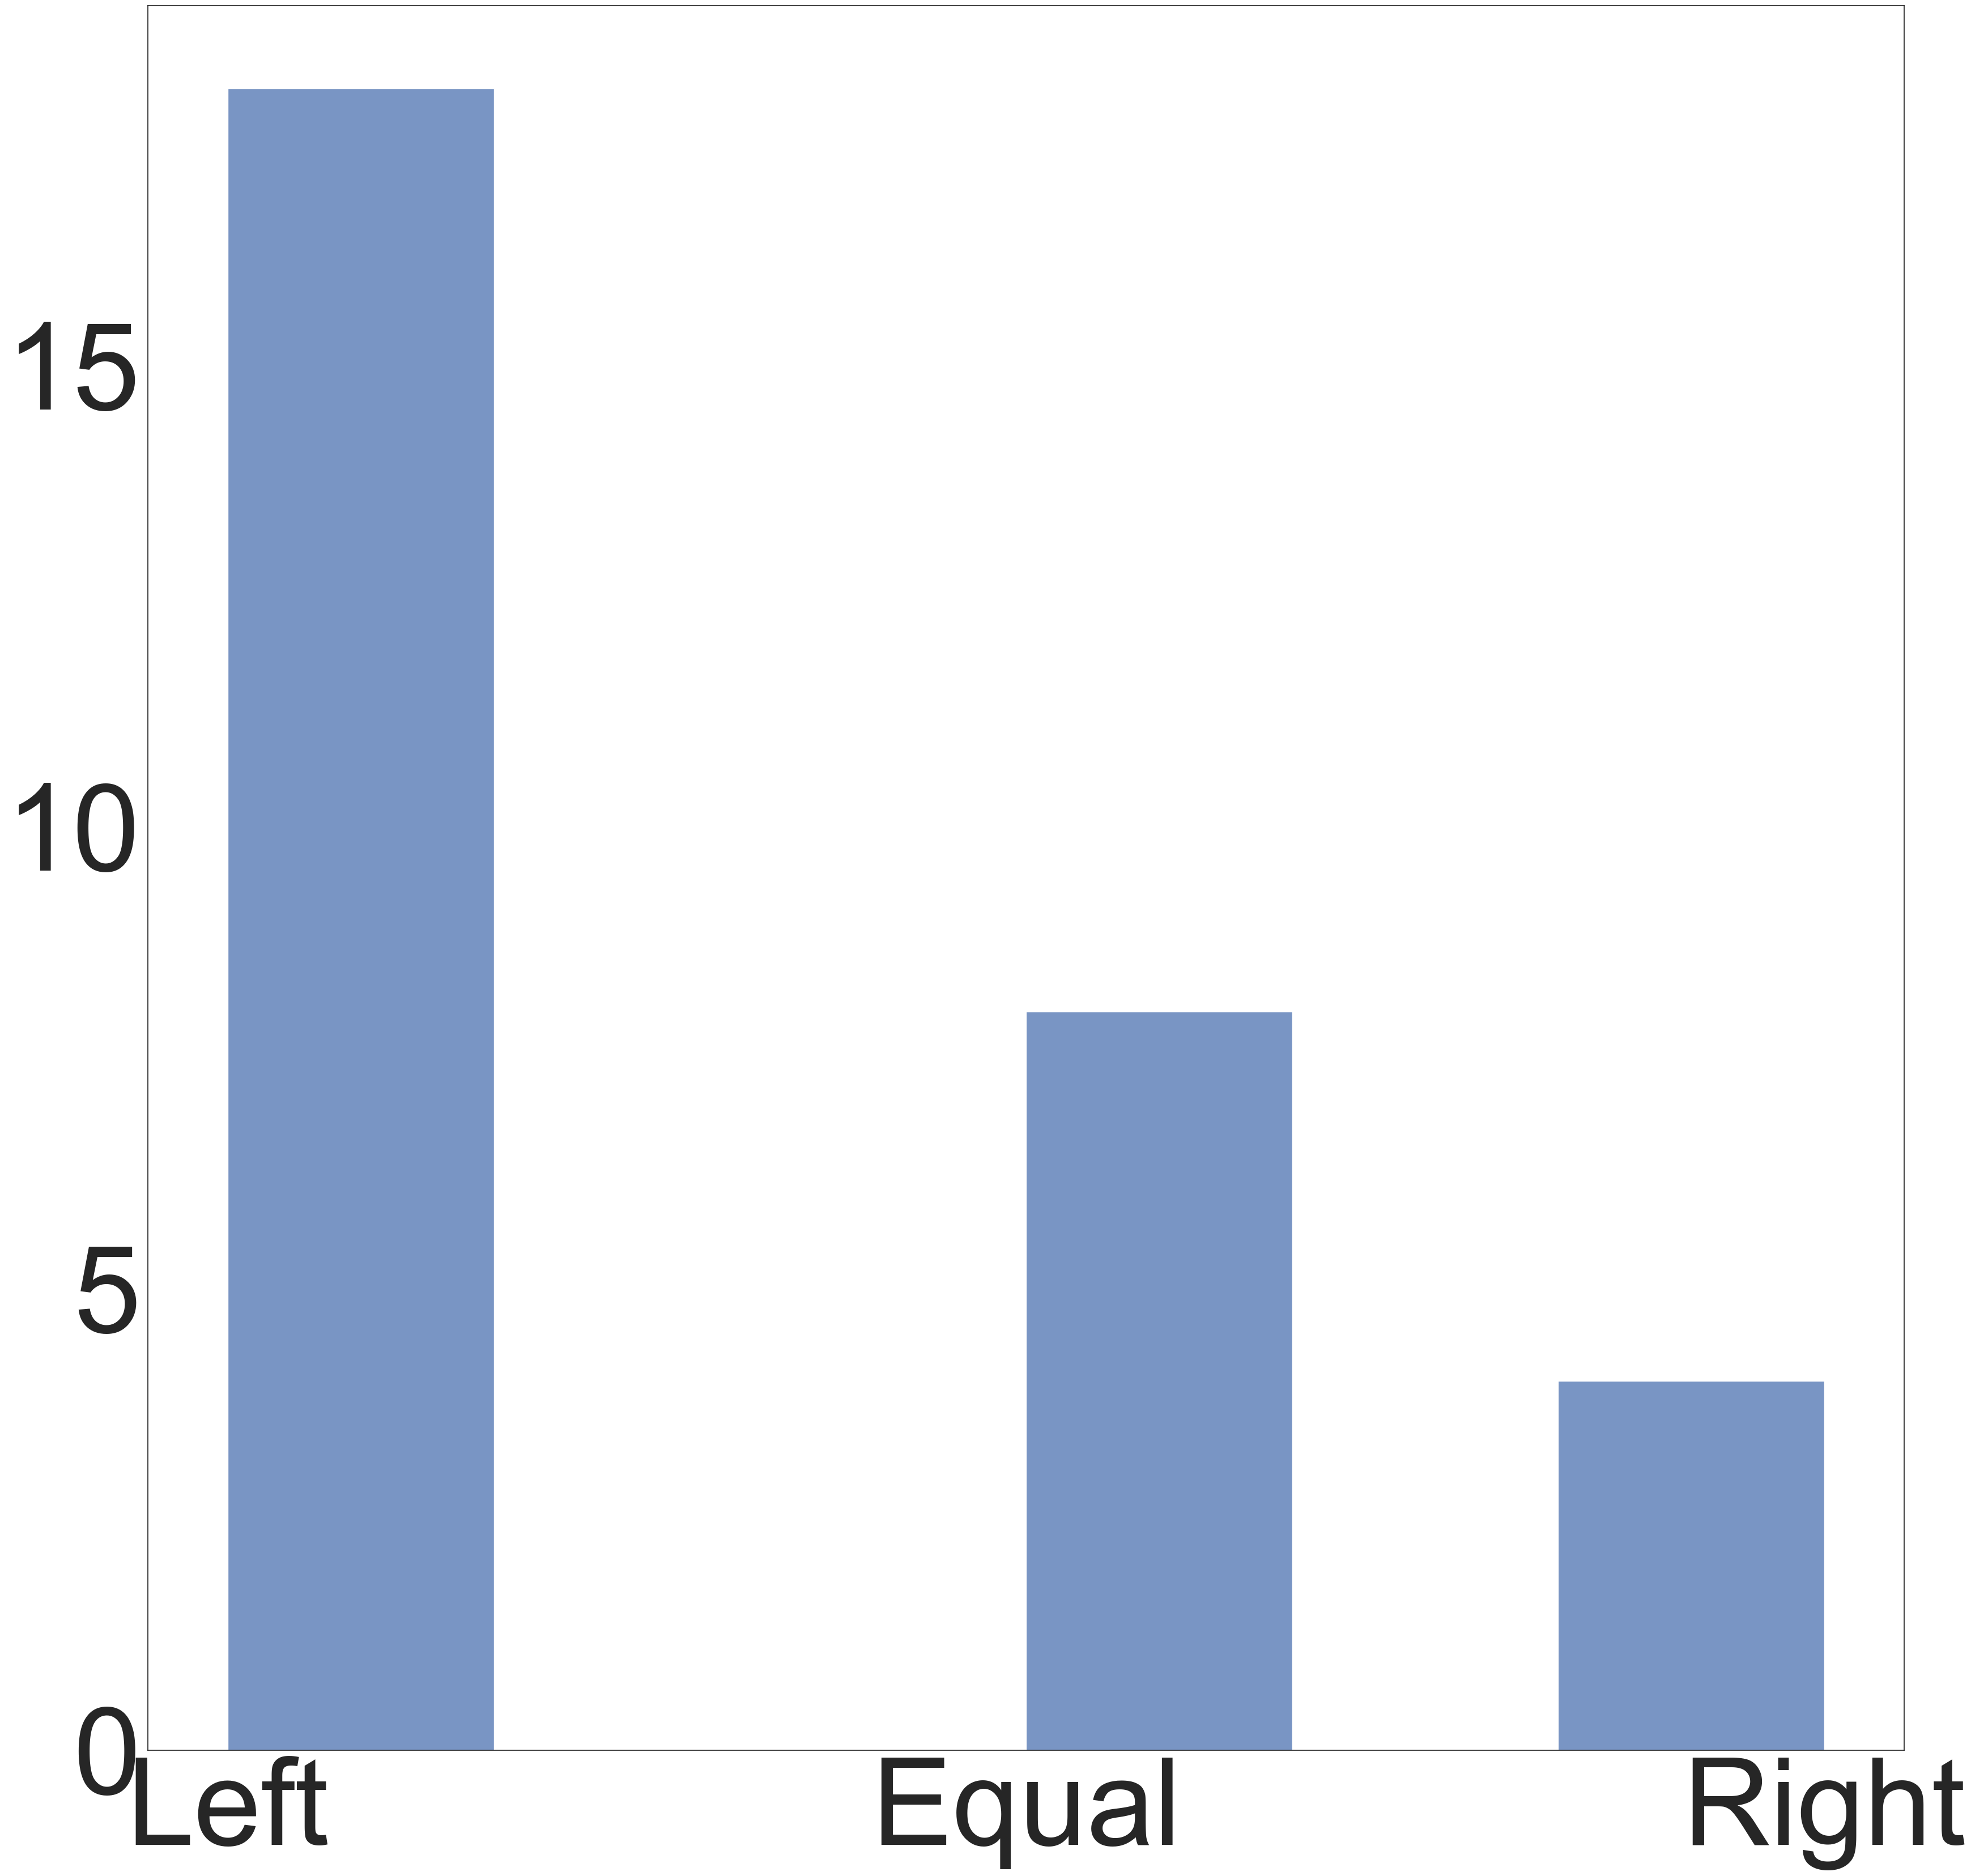

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# show distribution for one sample

df = pd.read_csv('SecondStudy.csv')

g = sns.histplot(data=df[df['SampleNo'] == 0]['One'])
sns.set(rc={'figure.figsize':(40,40)})
sns.set(font_scale = 14)
sns.set_style("white")
g.set_xticks(range(3))
g.set(xlabel='',ylabel='')
g.set_xticklabels(["Left","Equal","Right"])
plt.show()

# Display Left-Right Distribution per Case

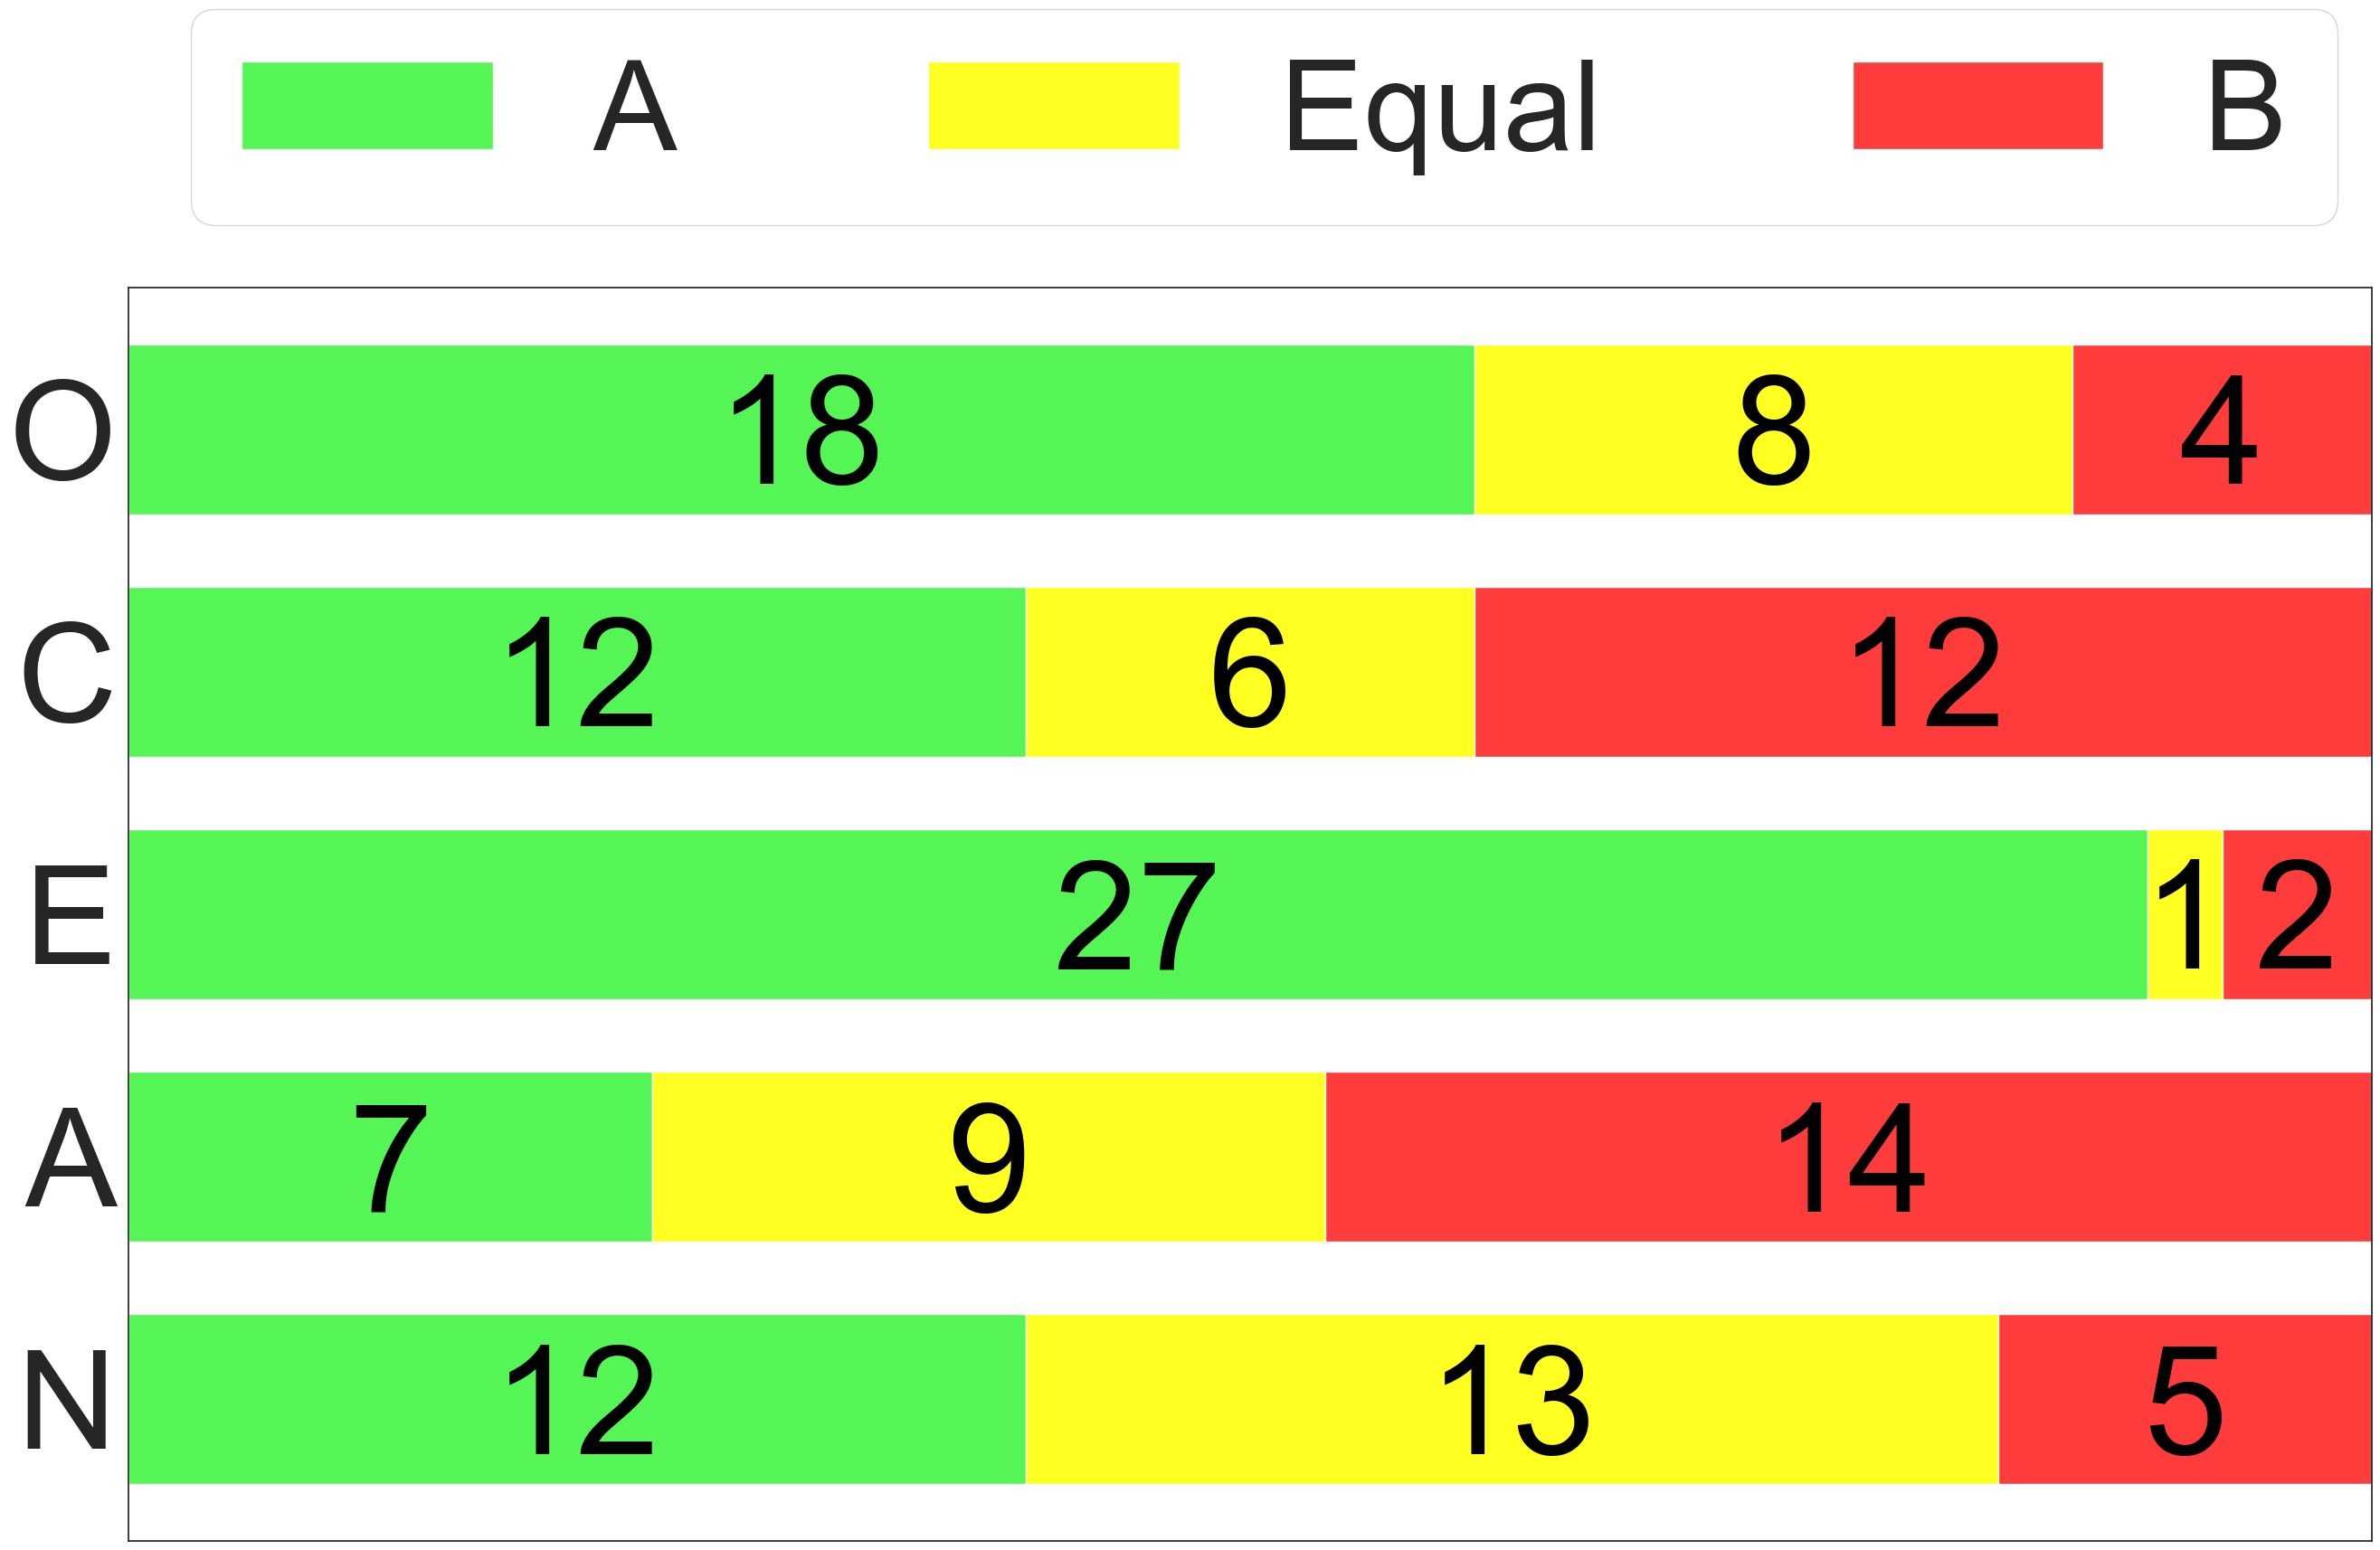

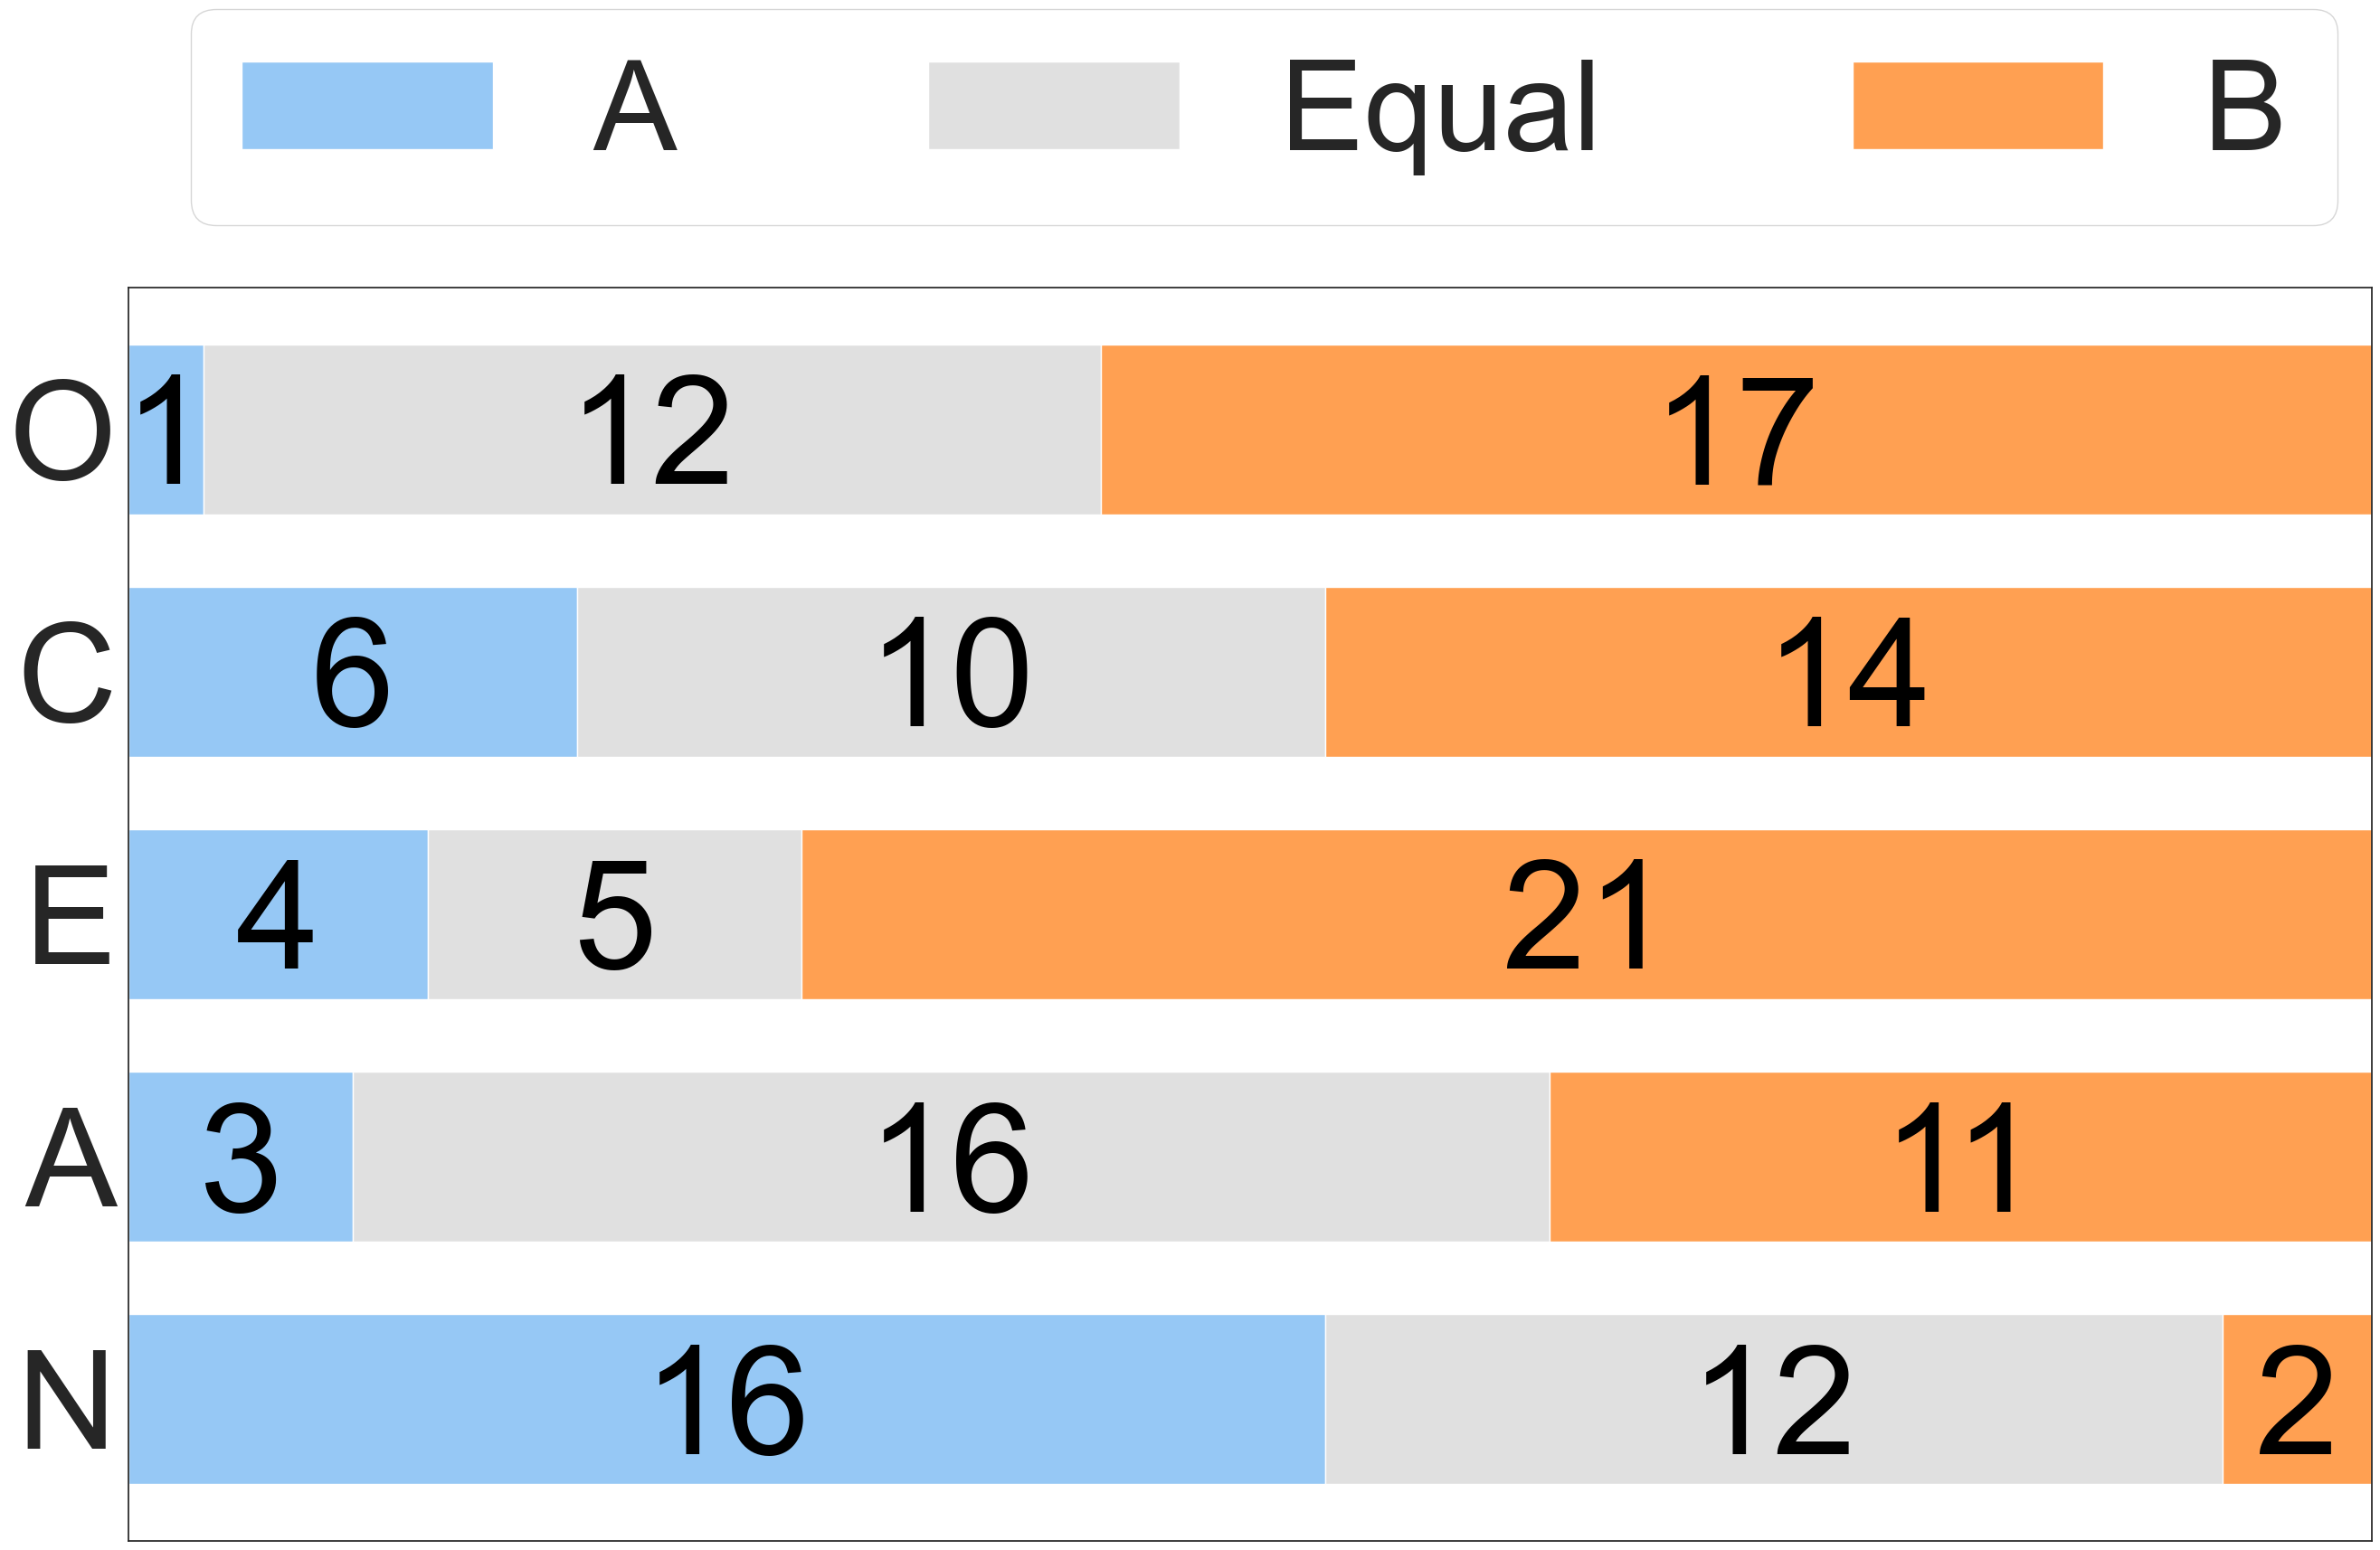

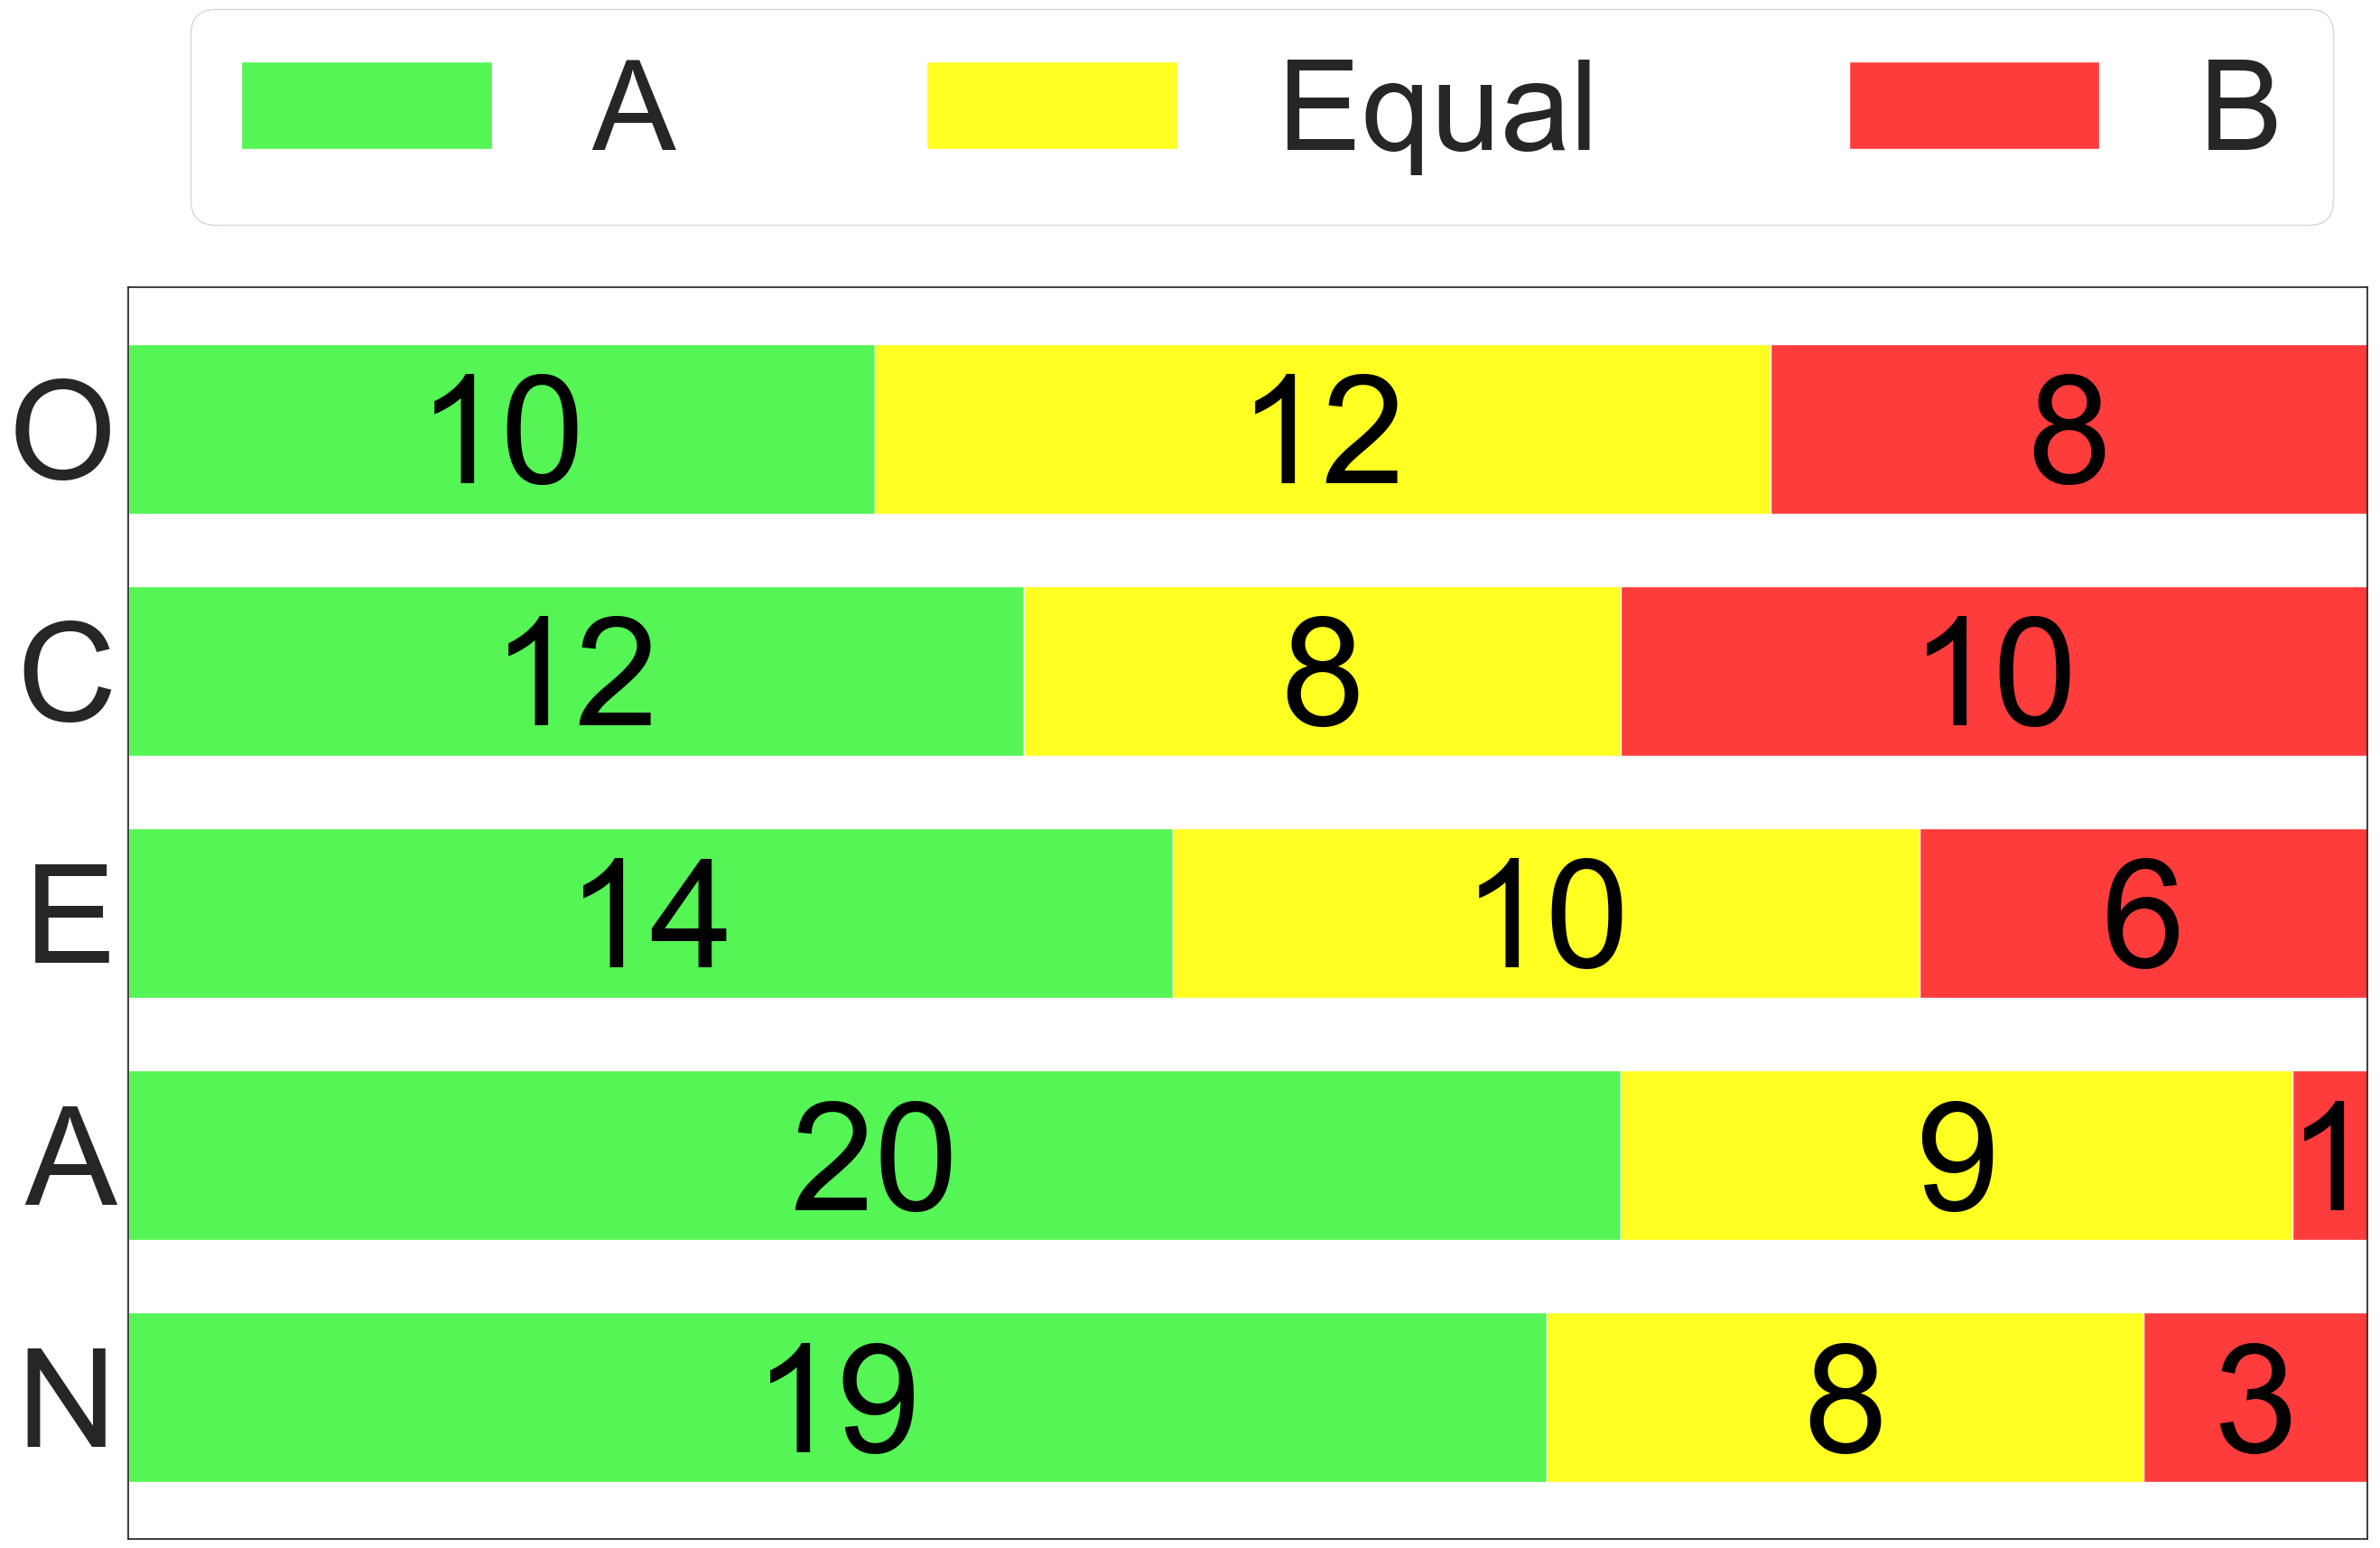

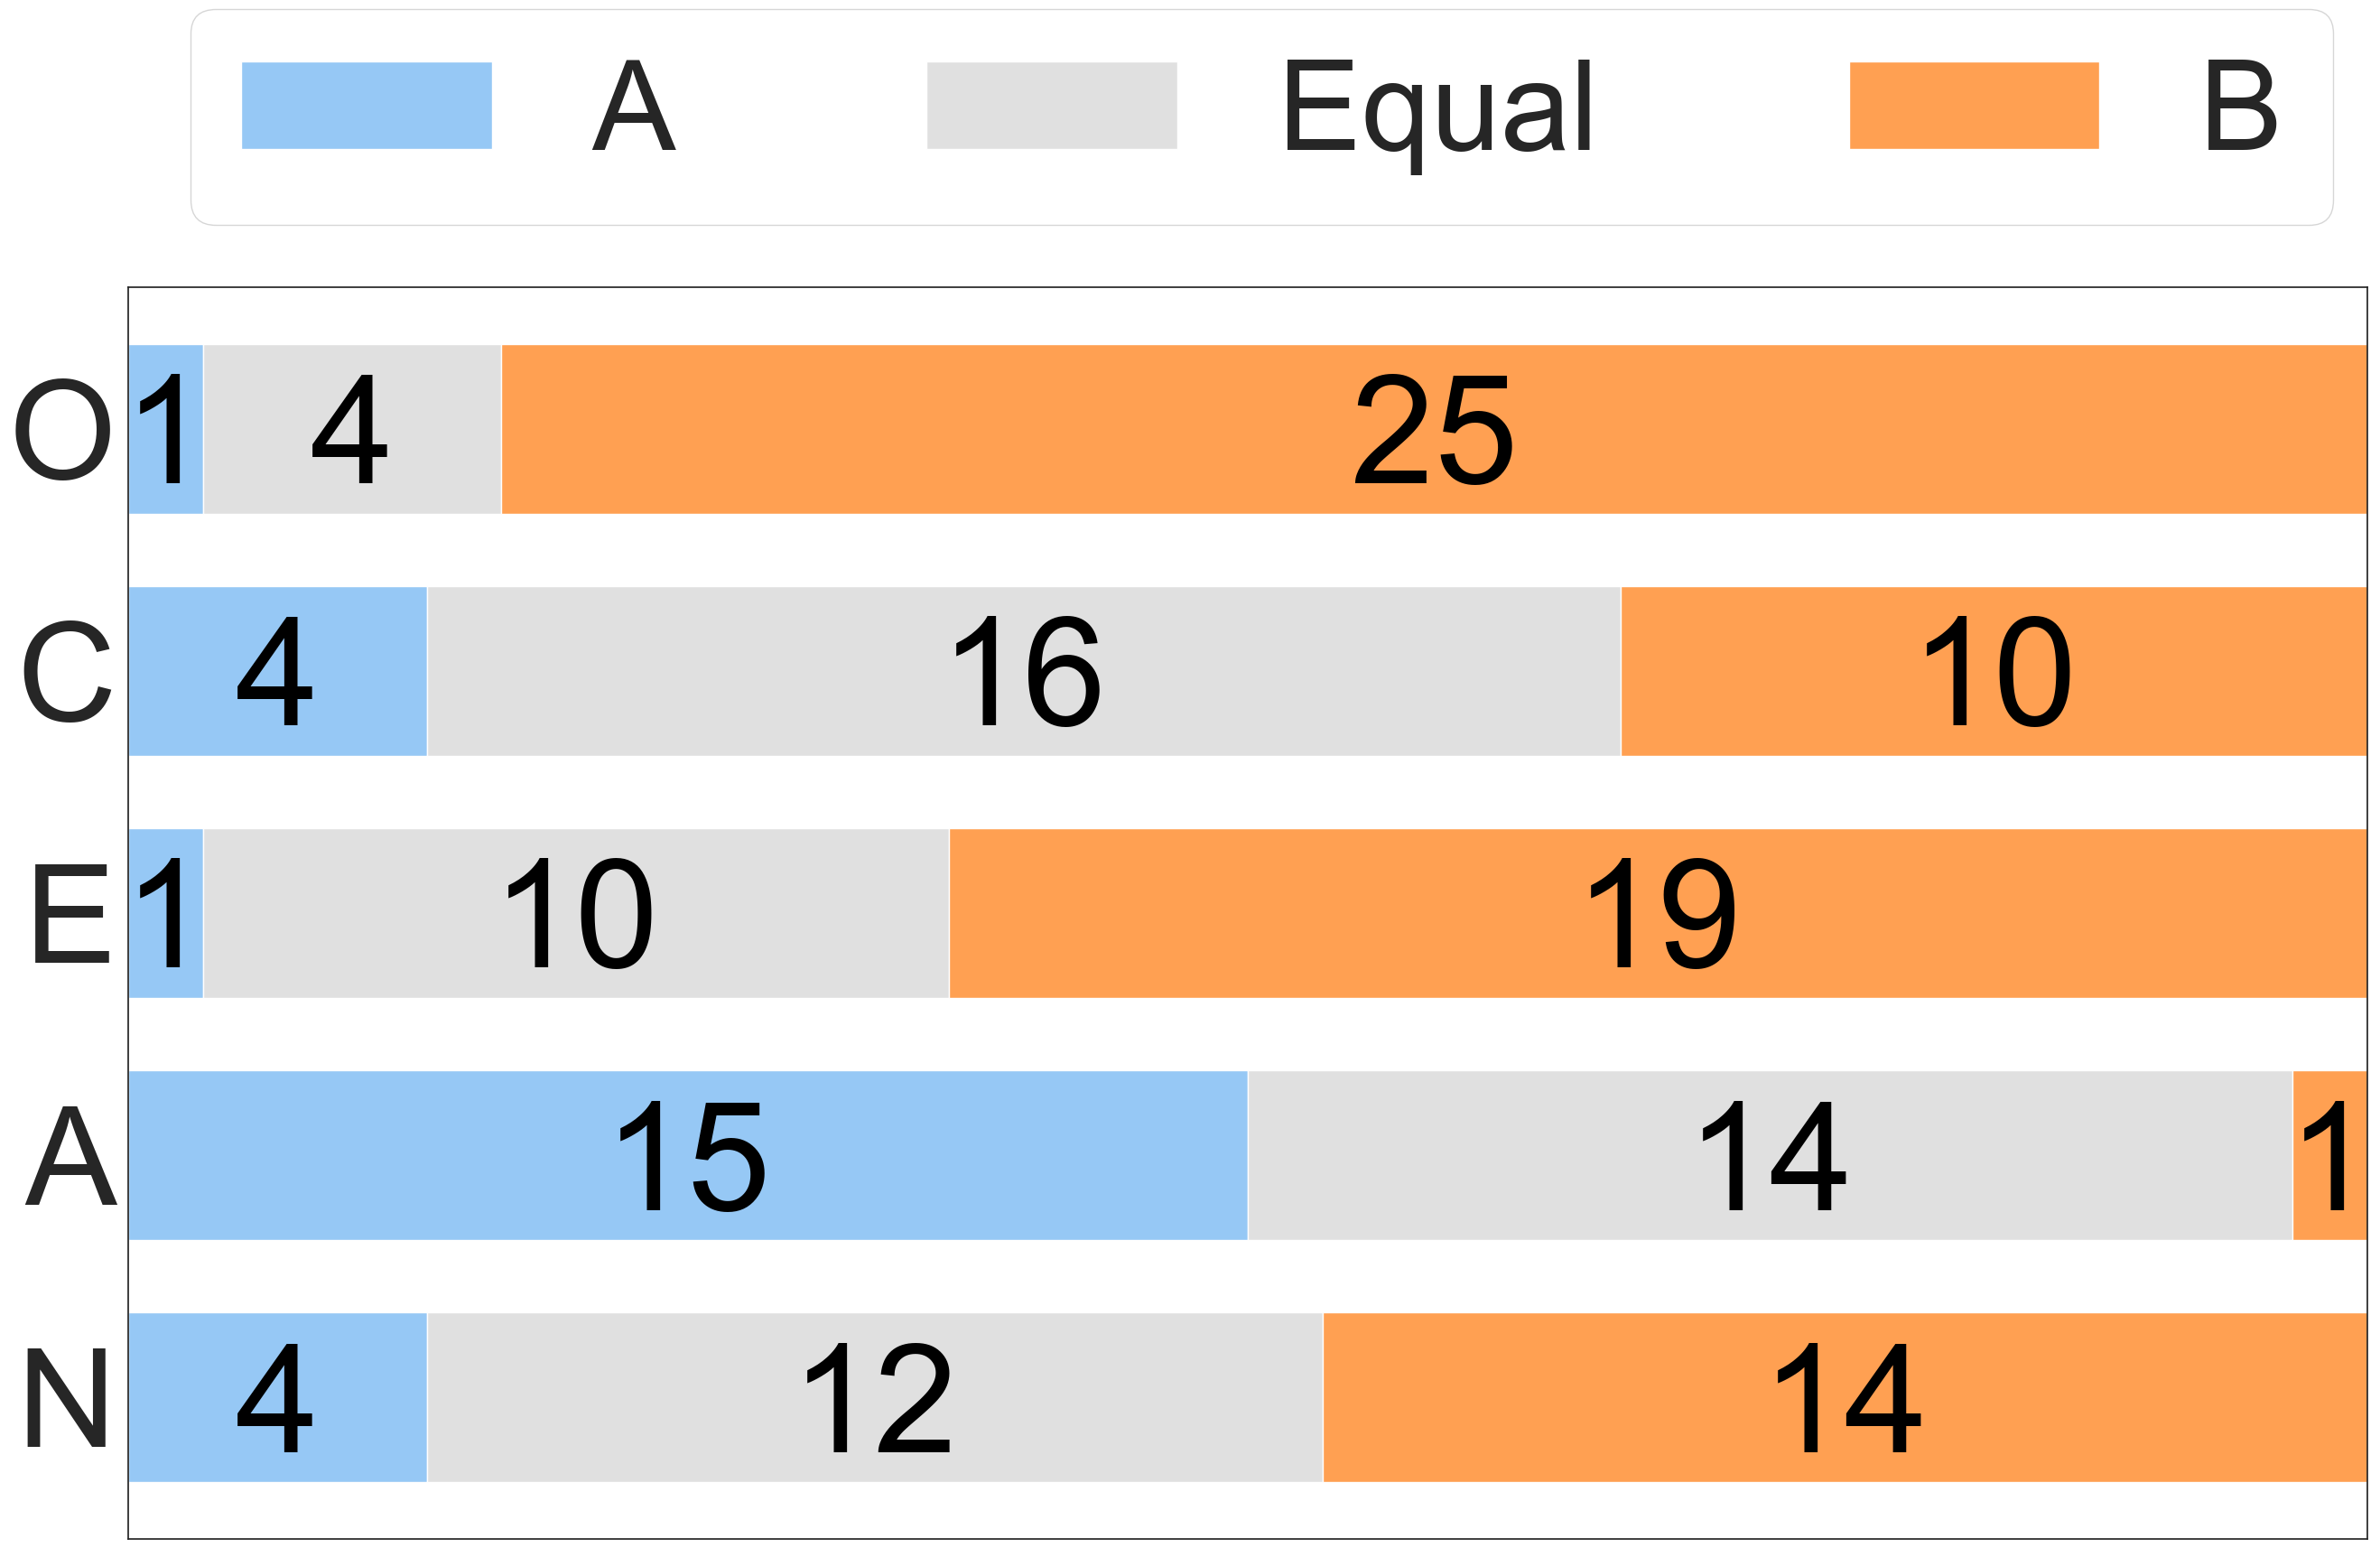

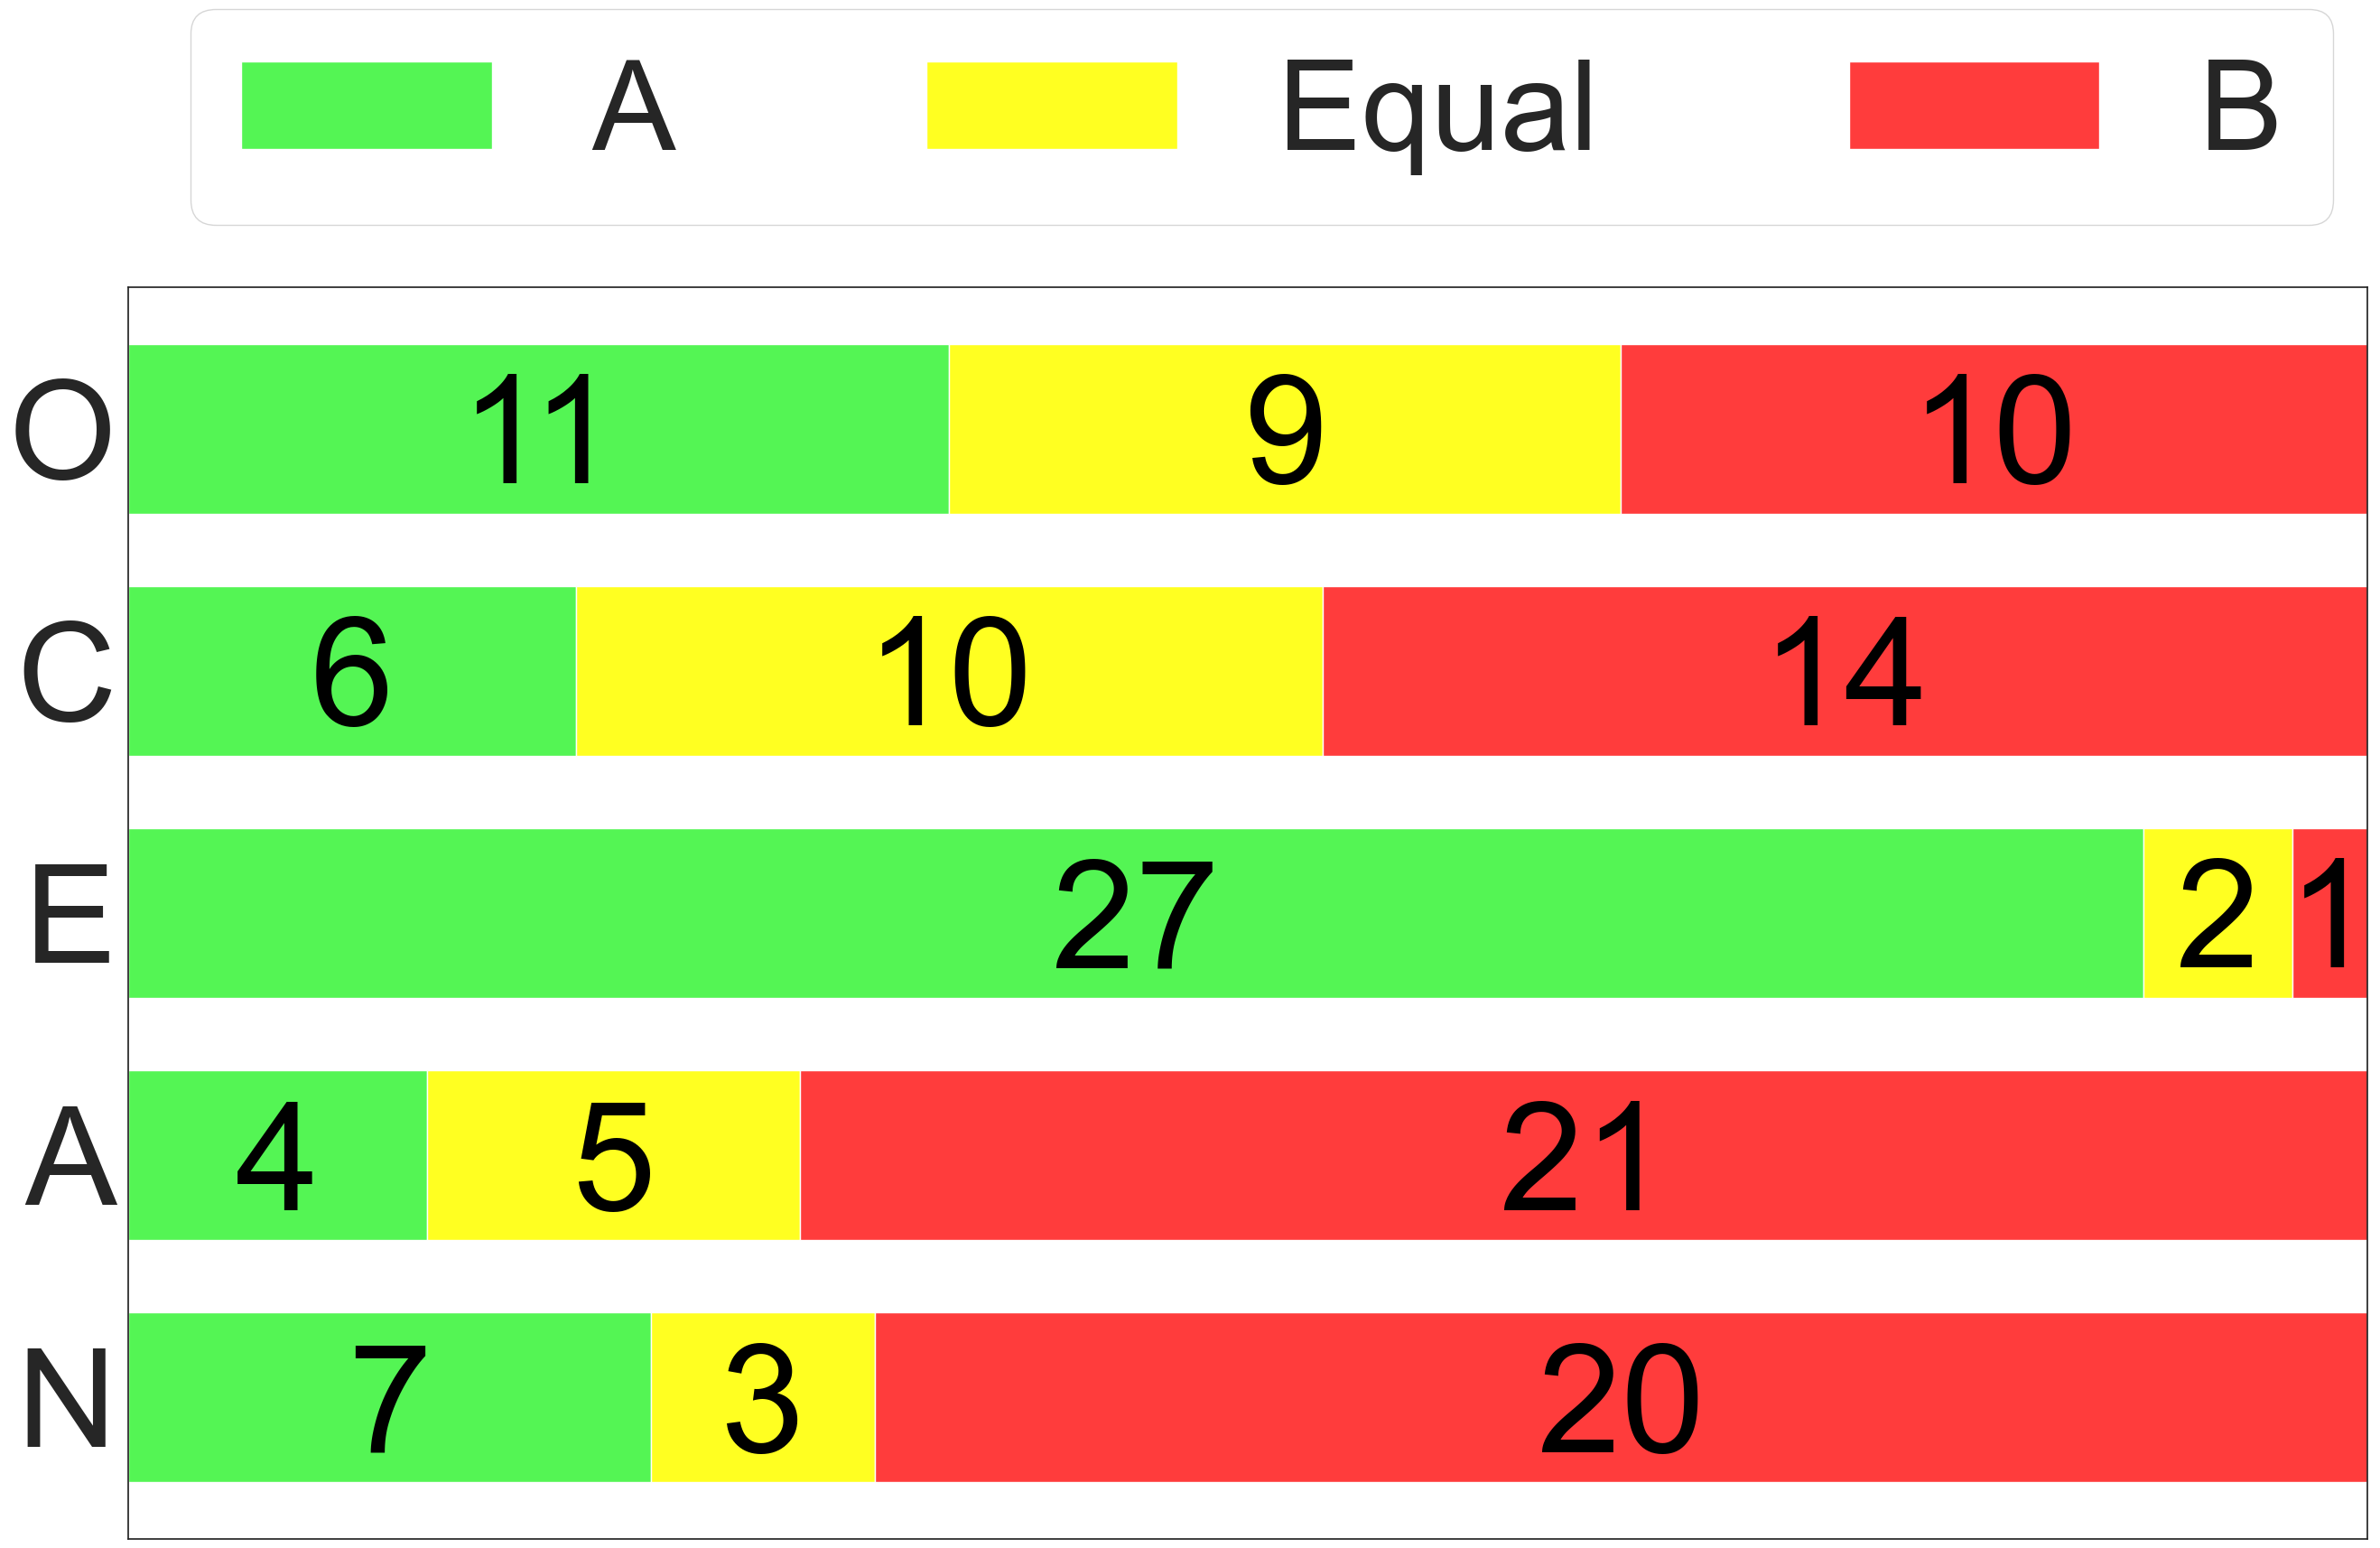

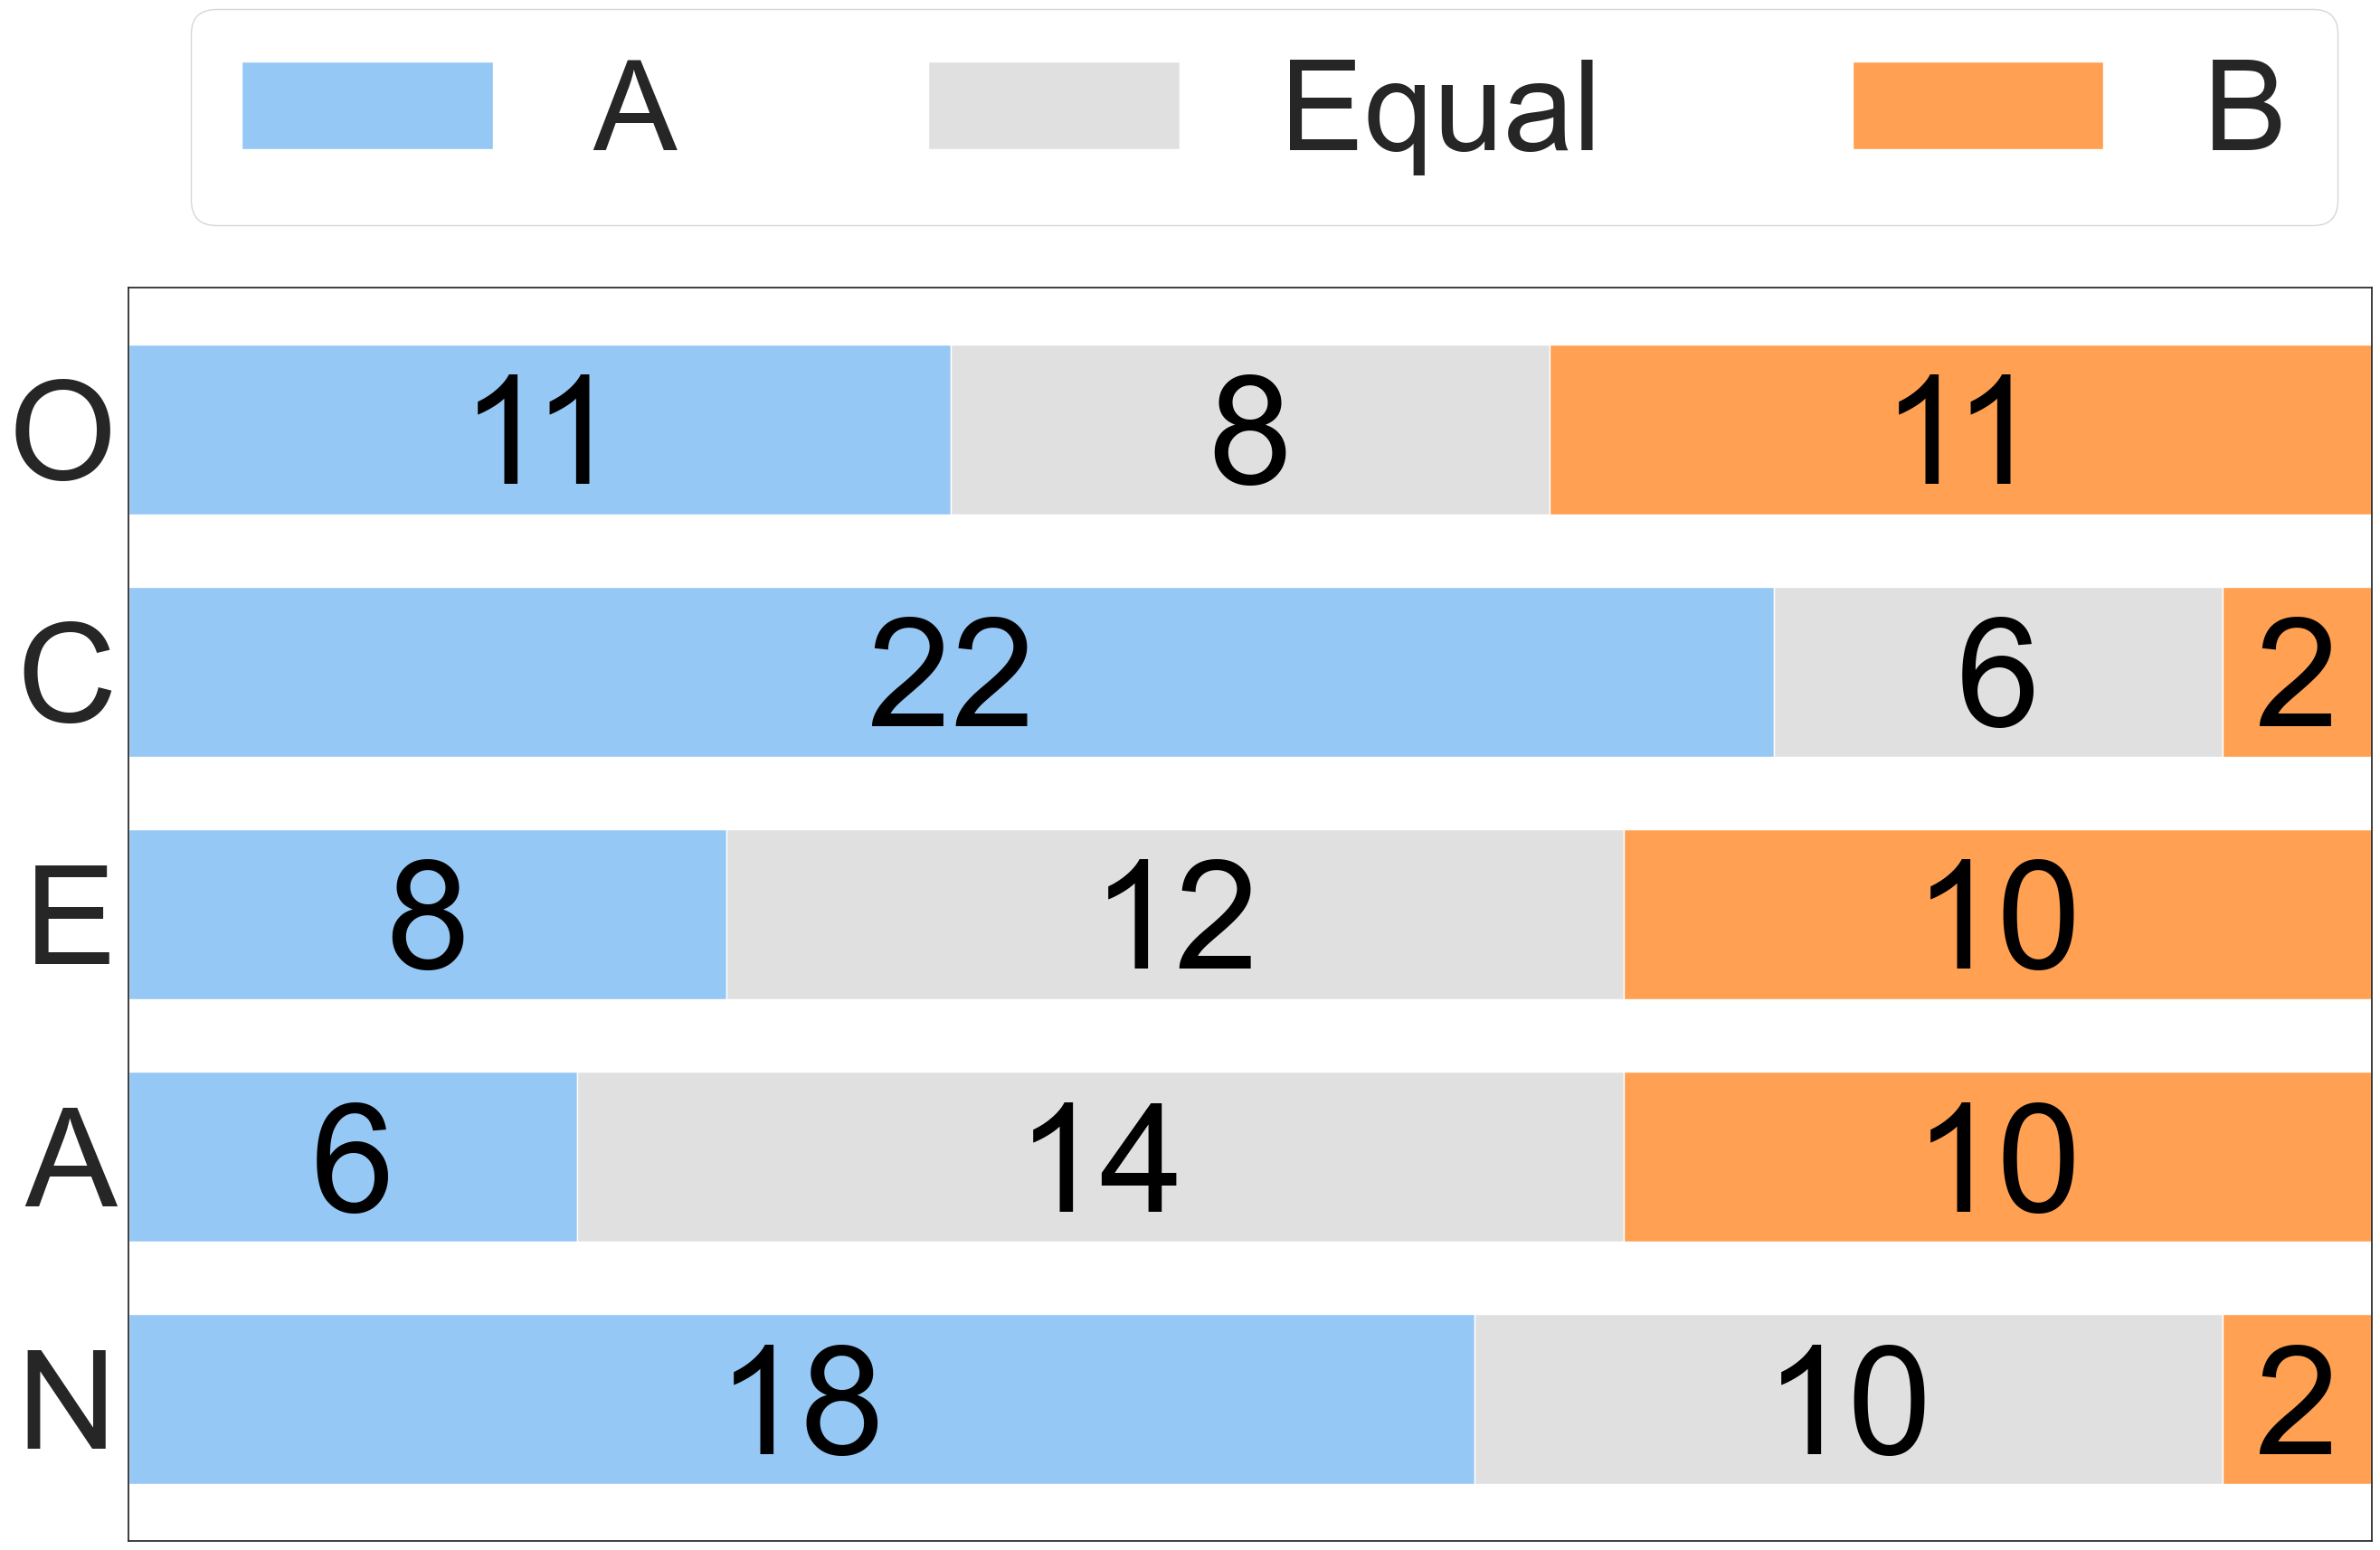

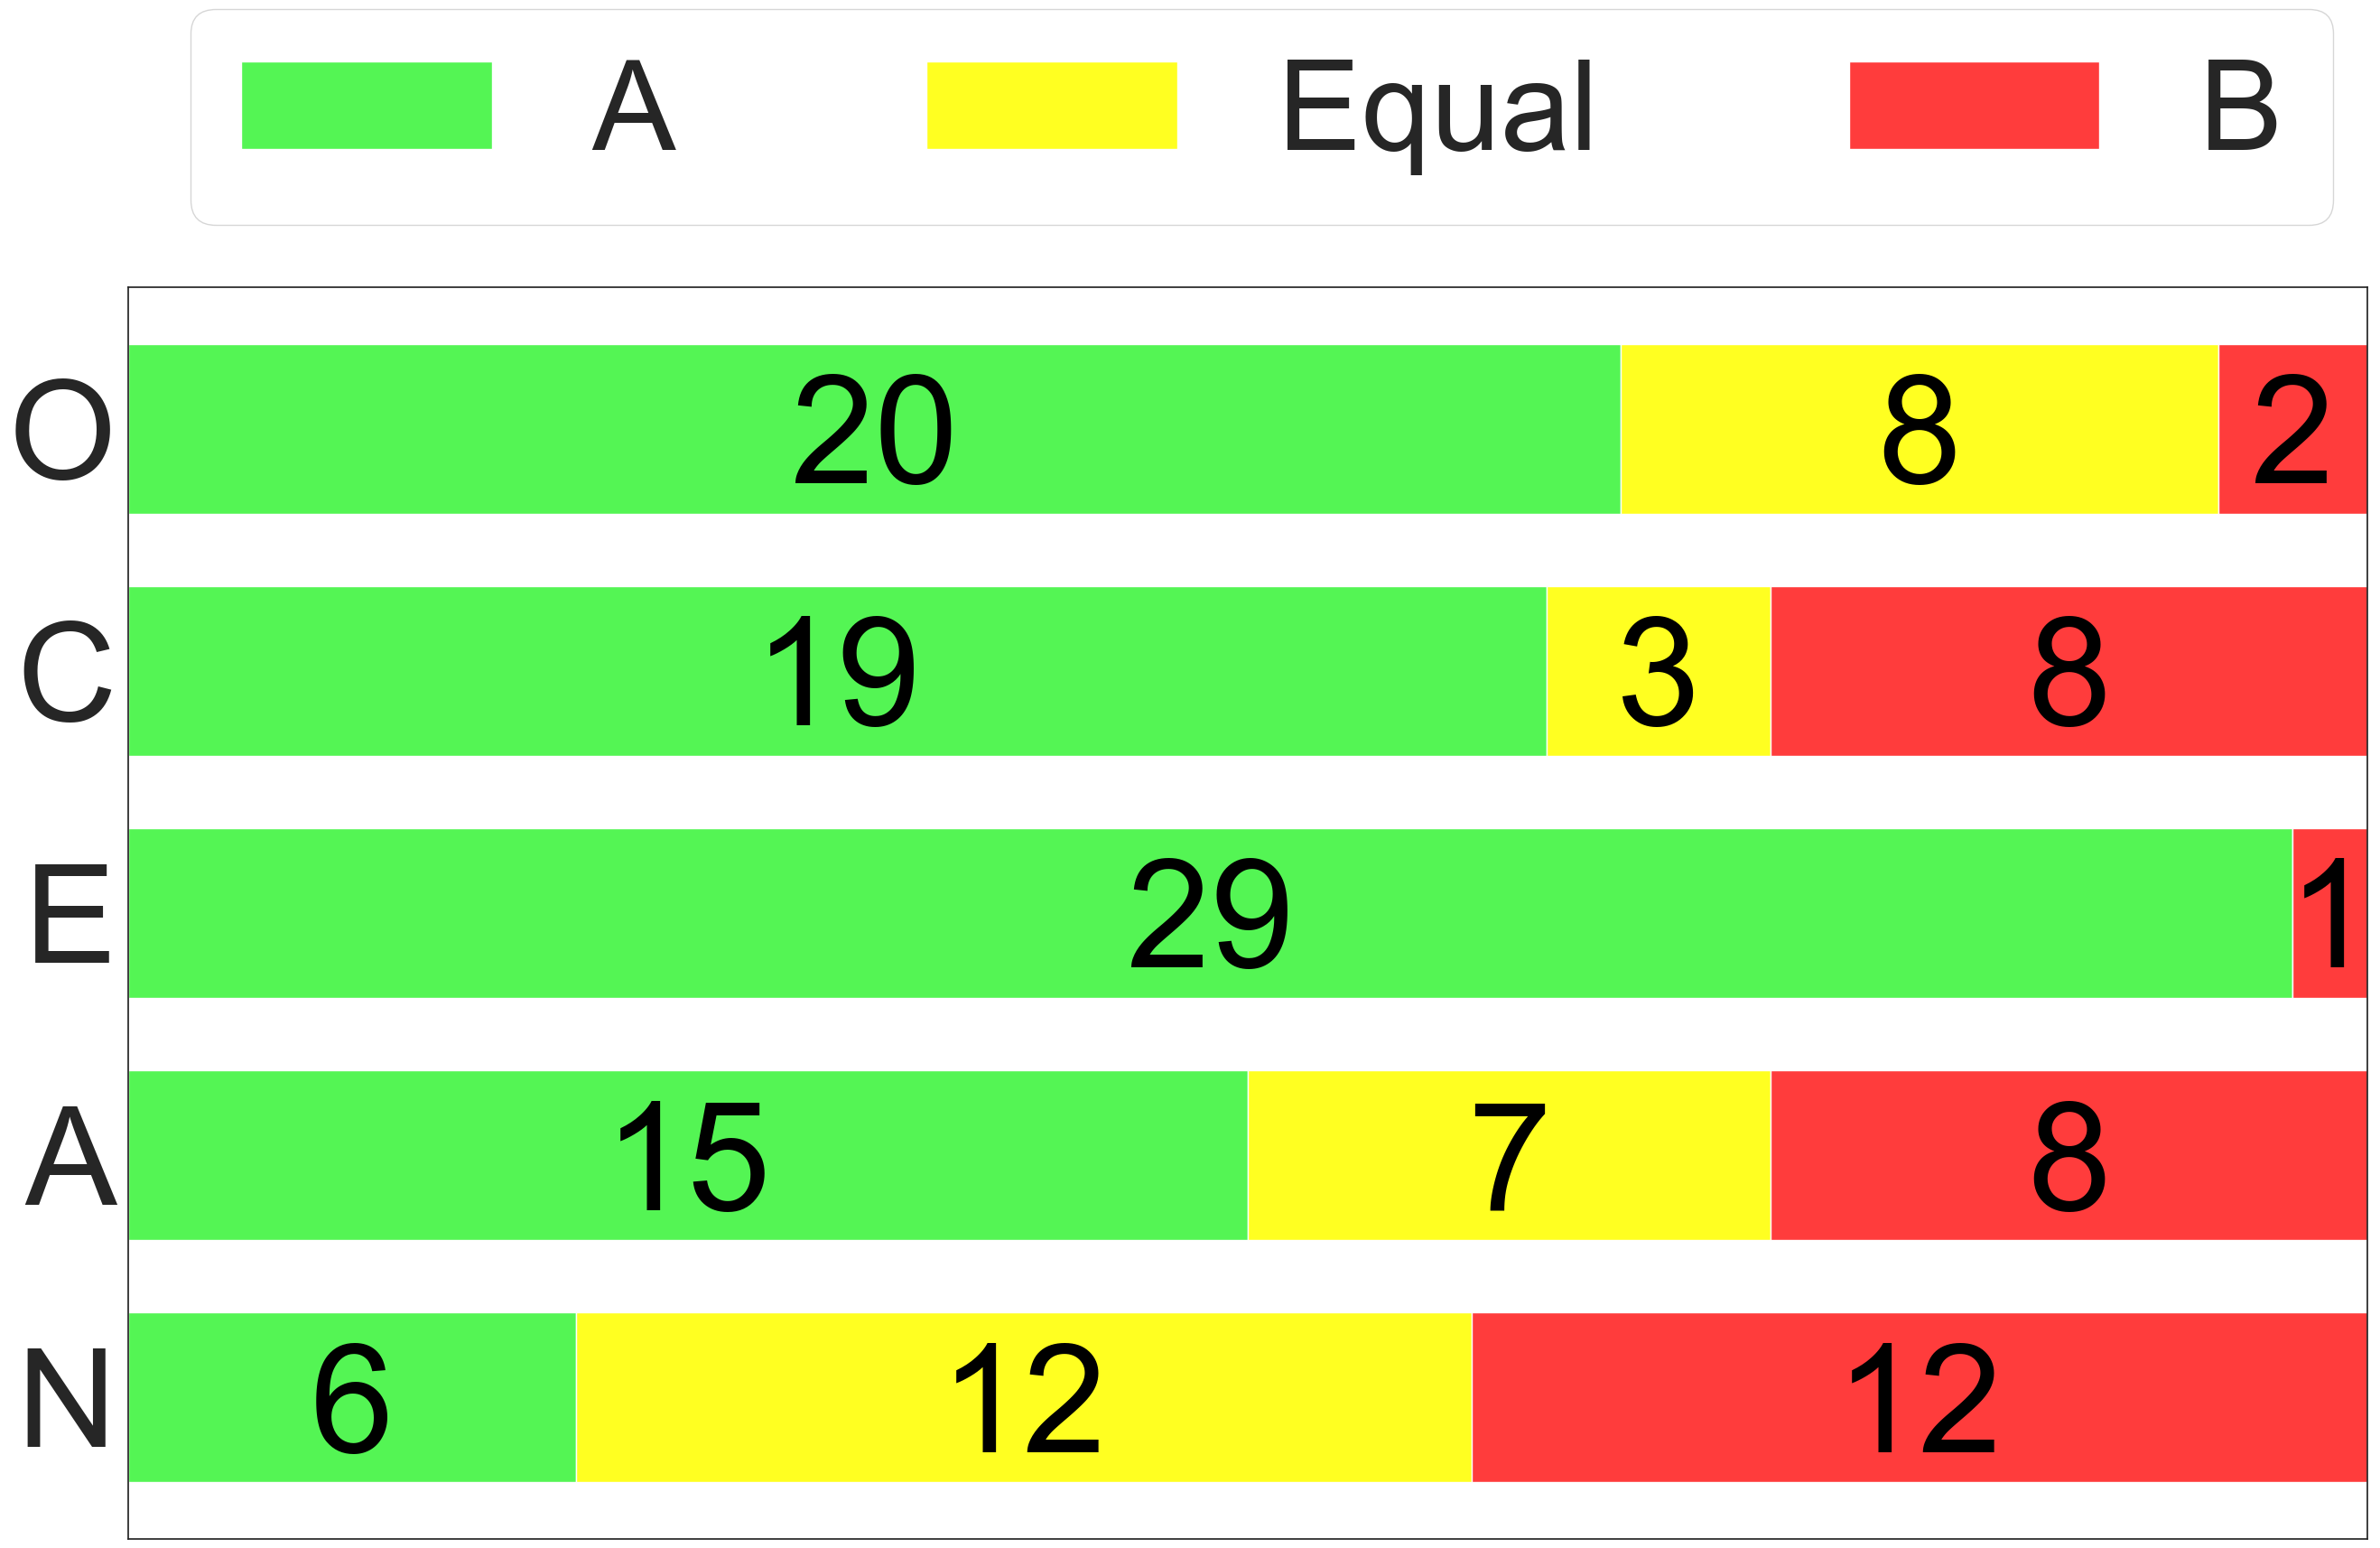

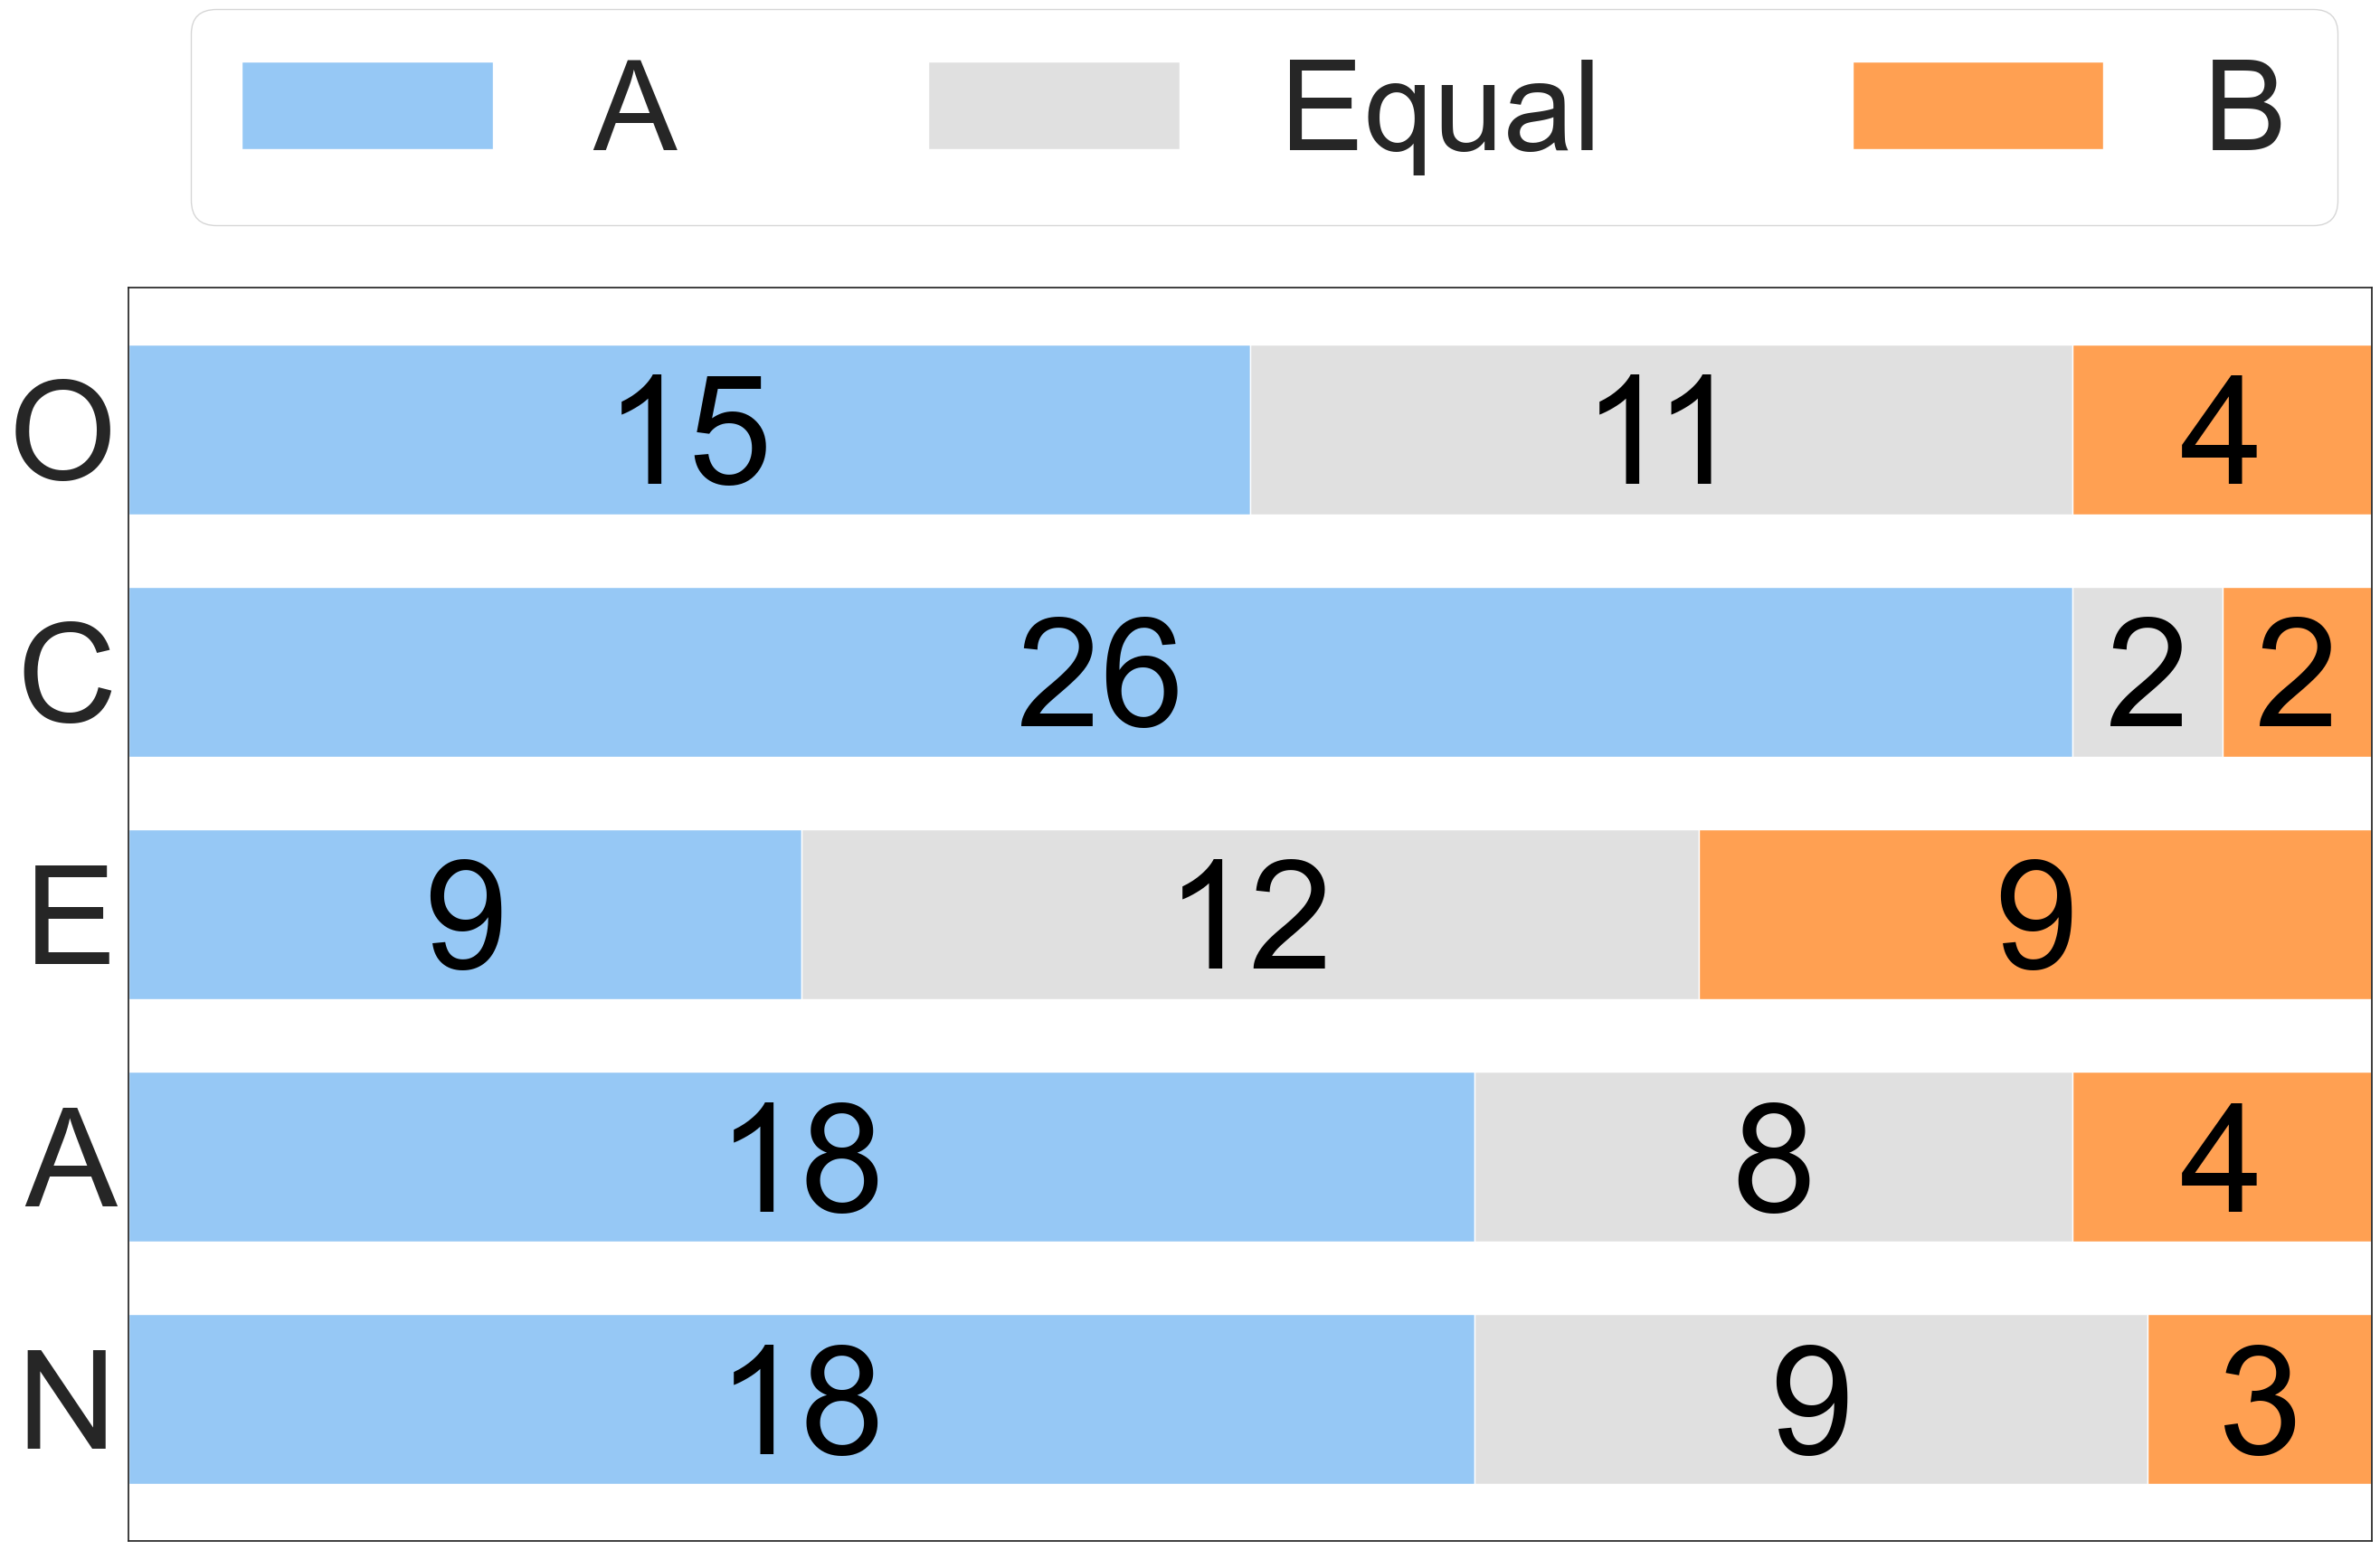

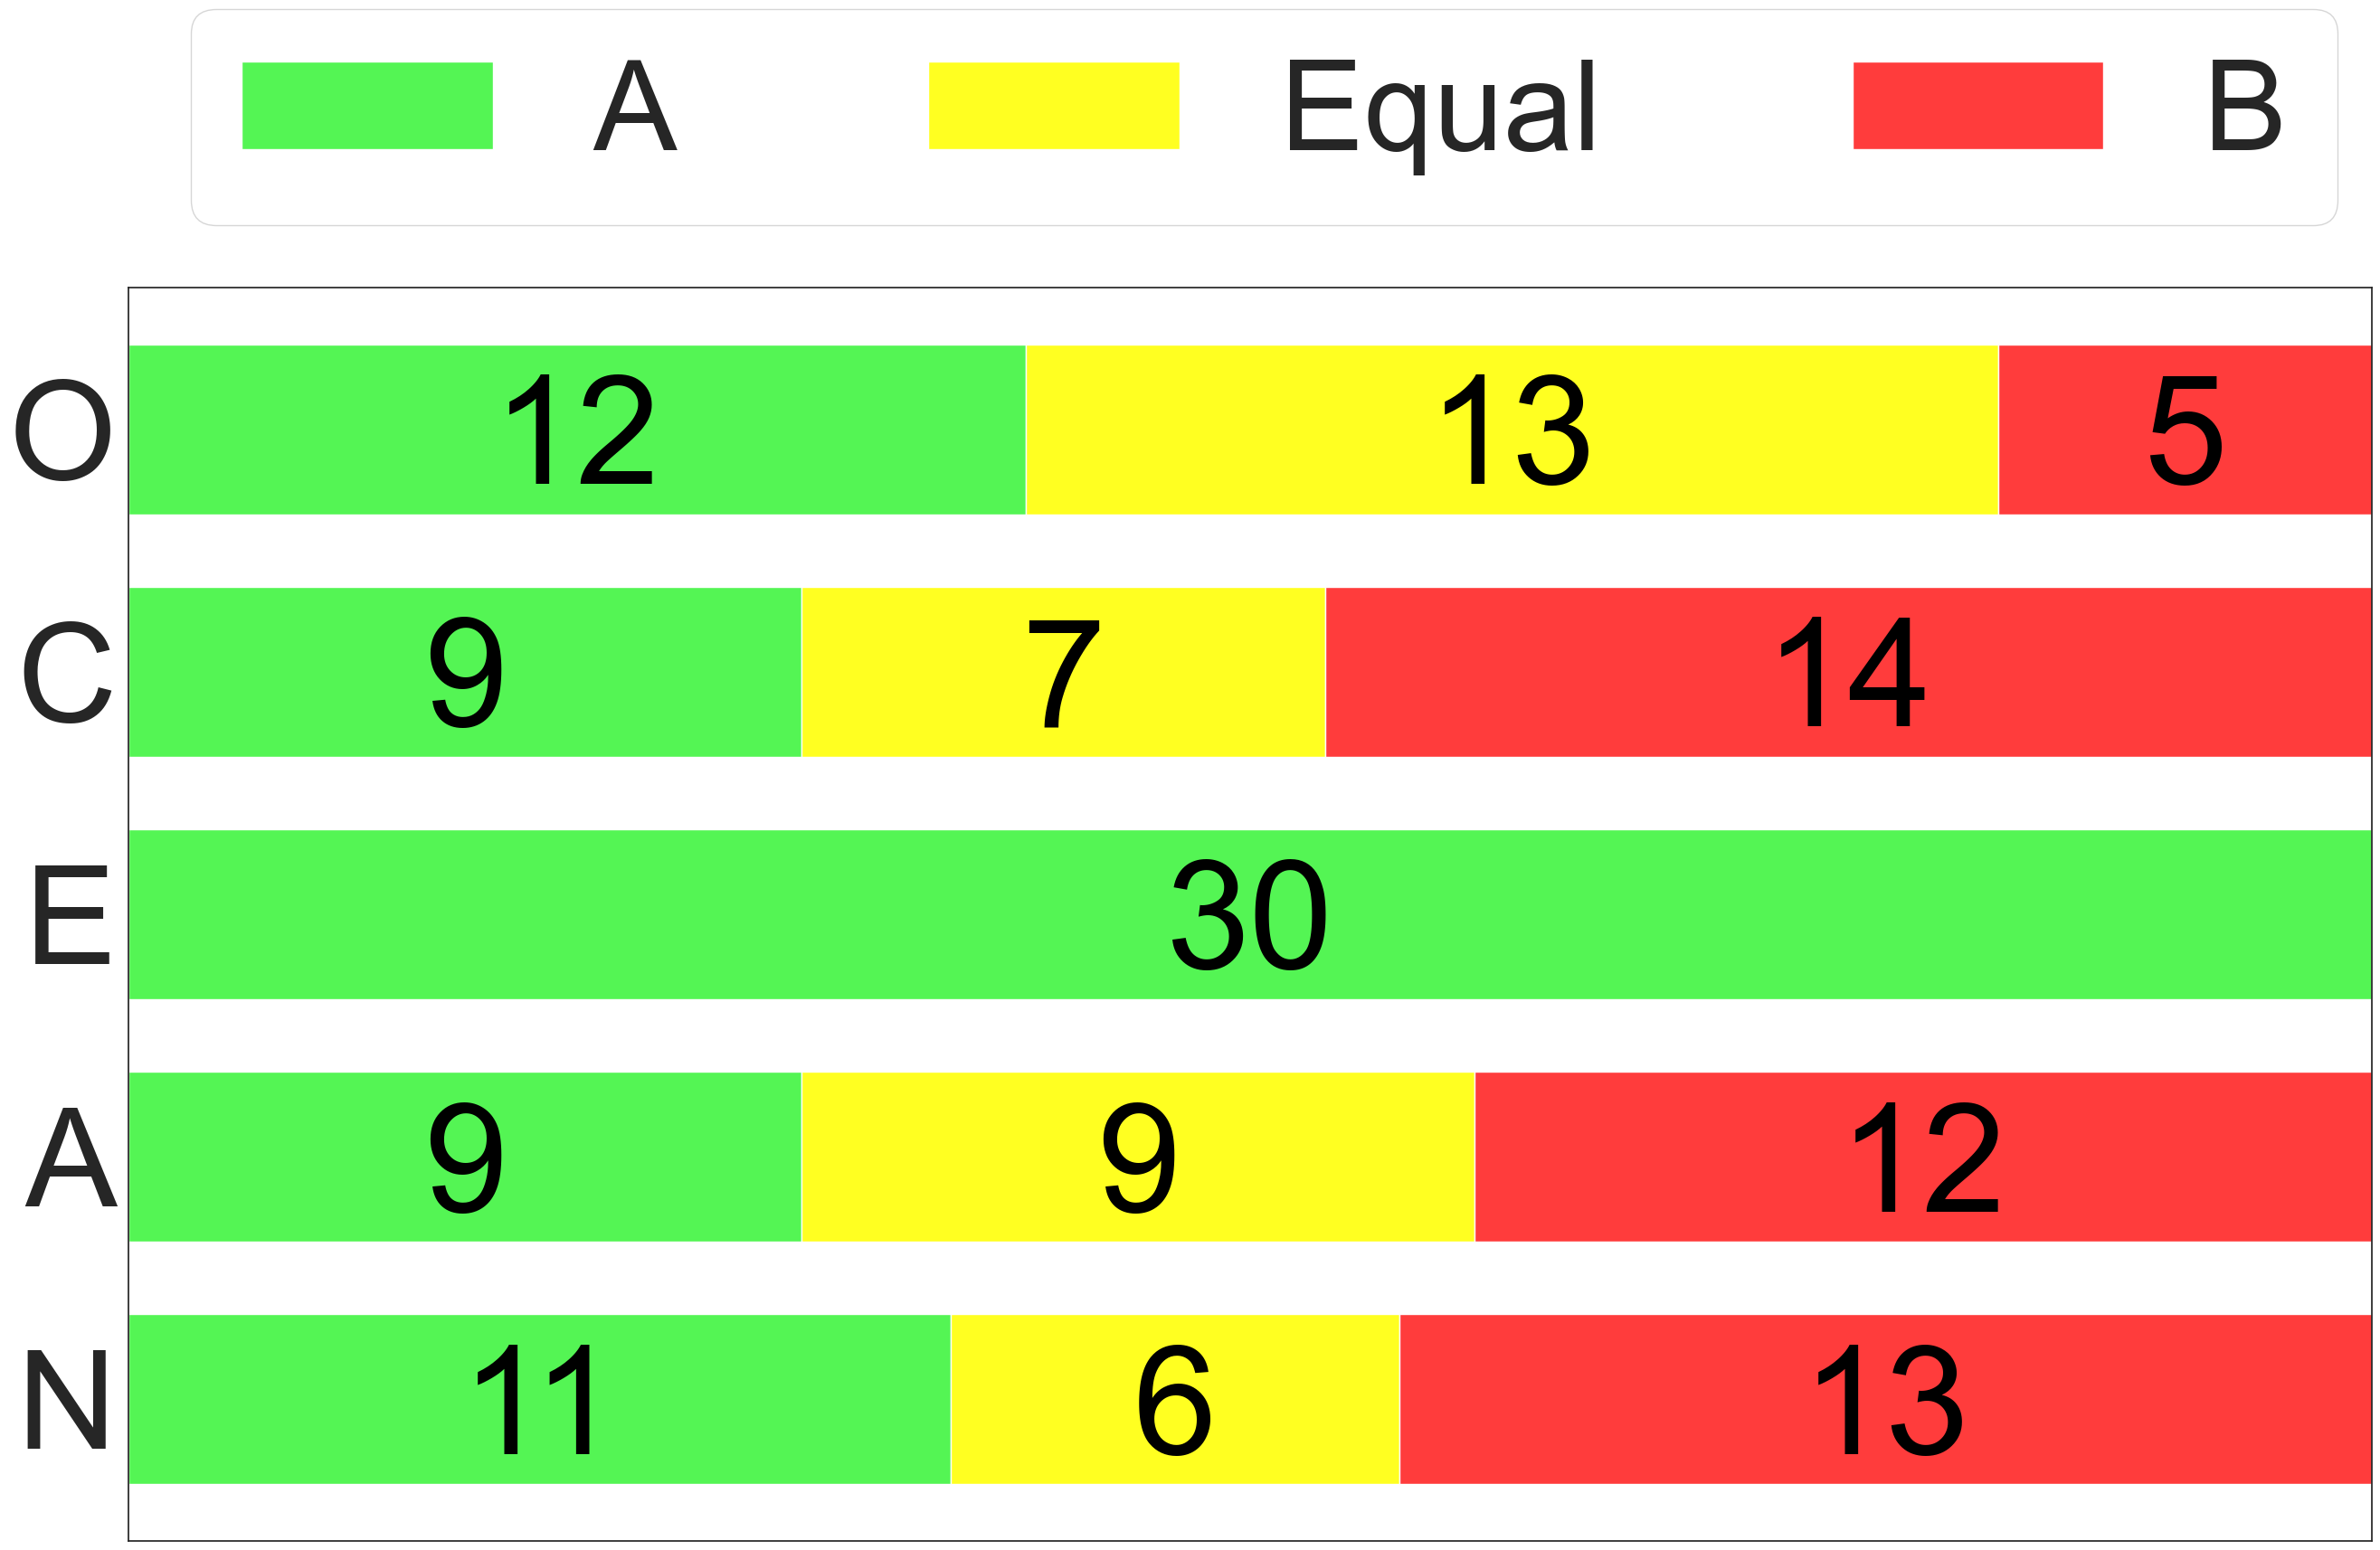

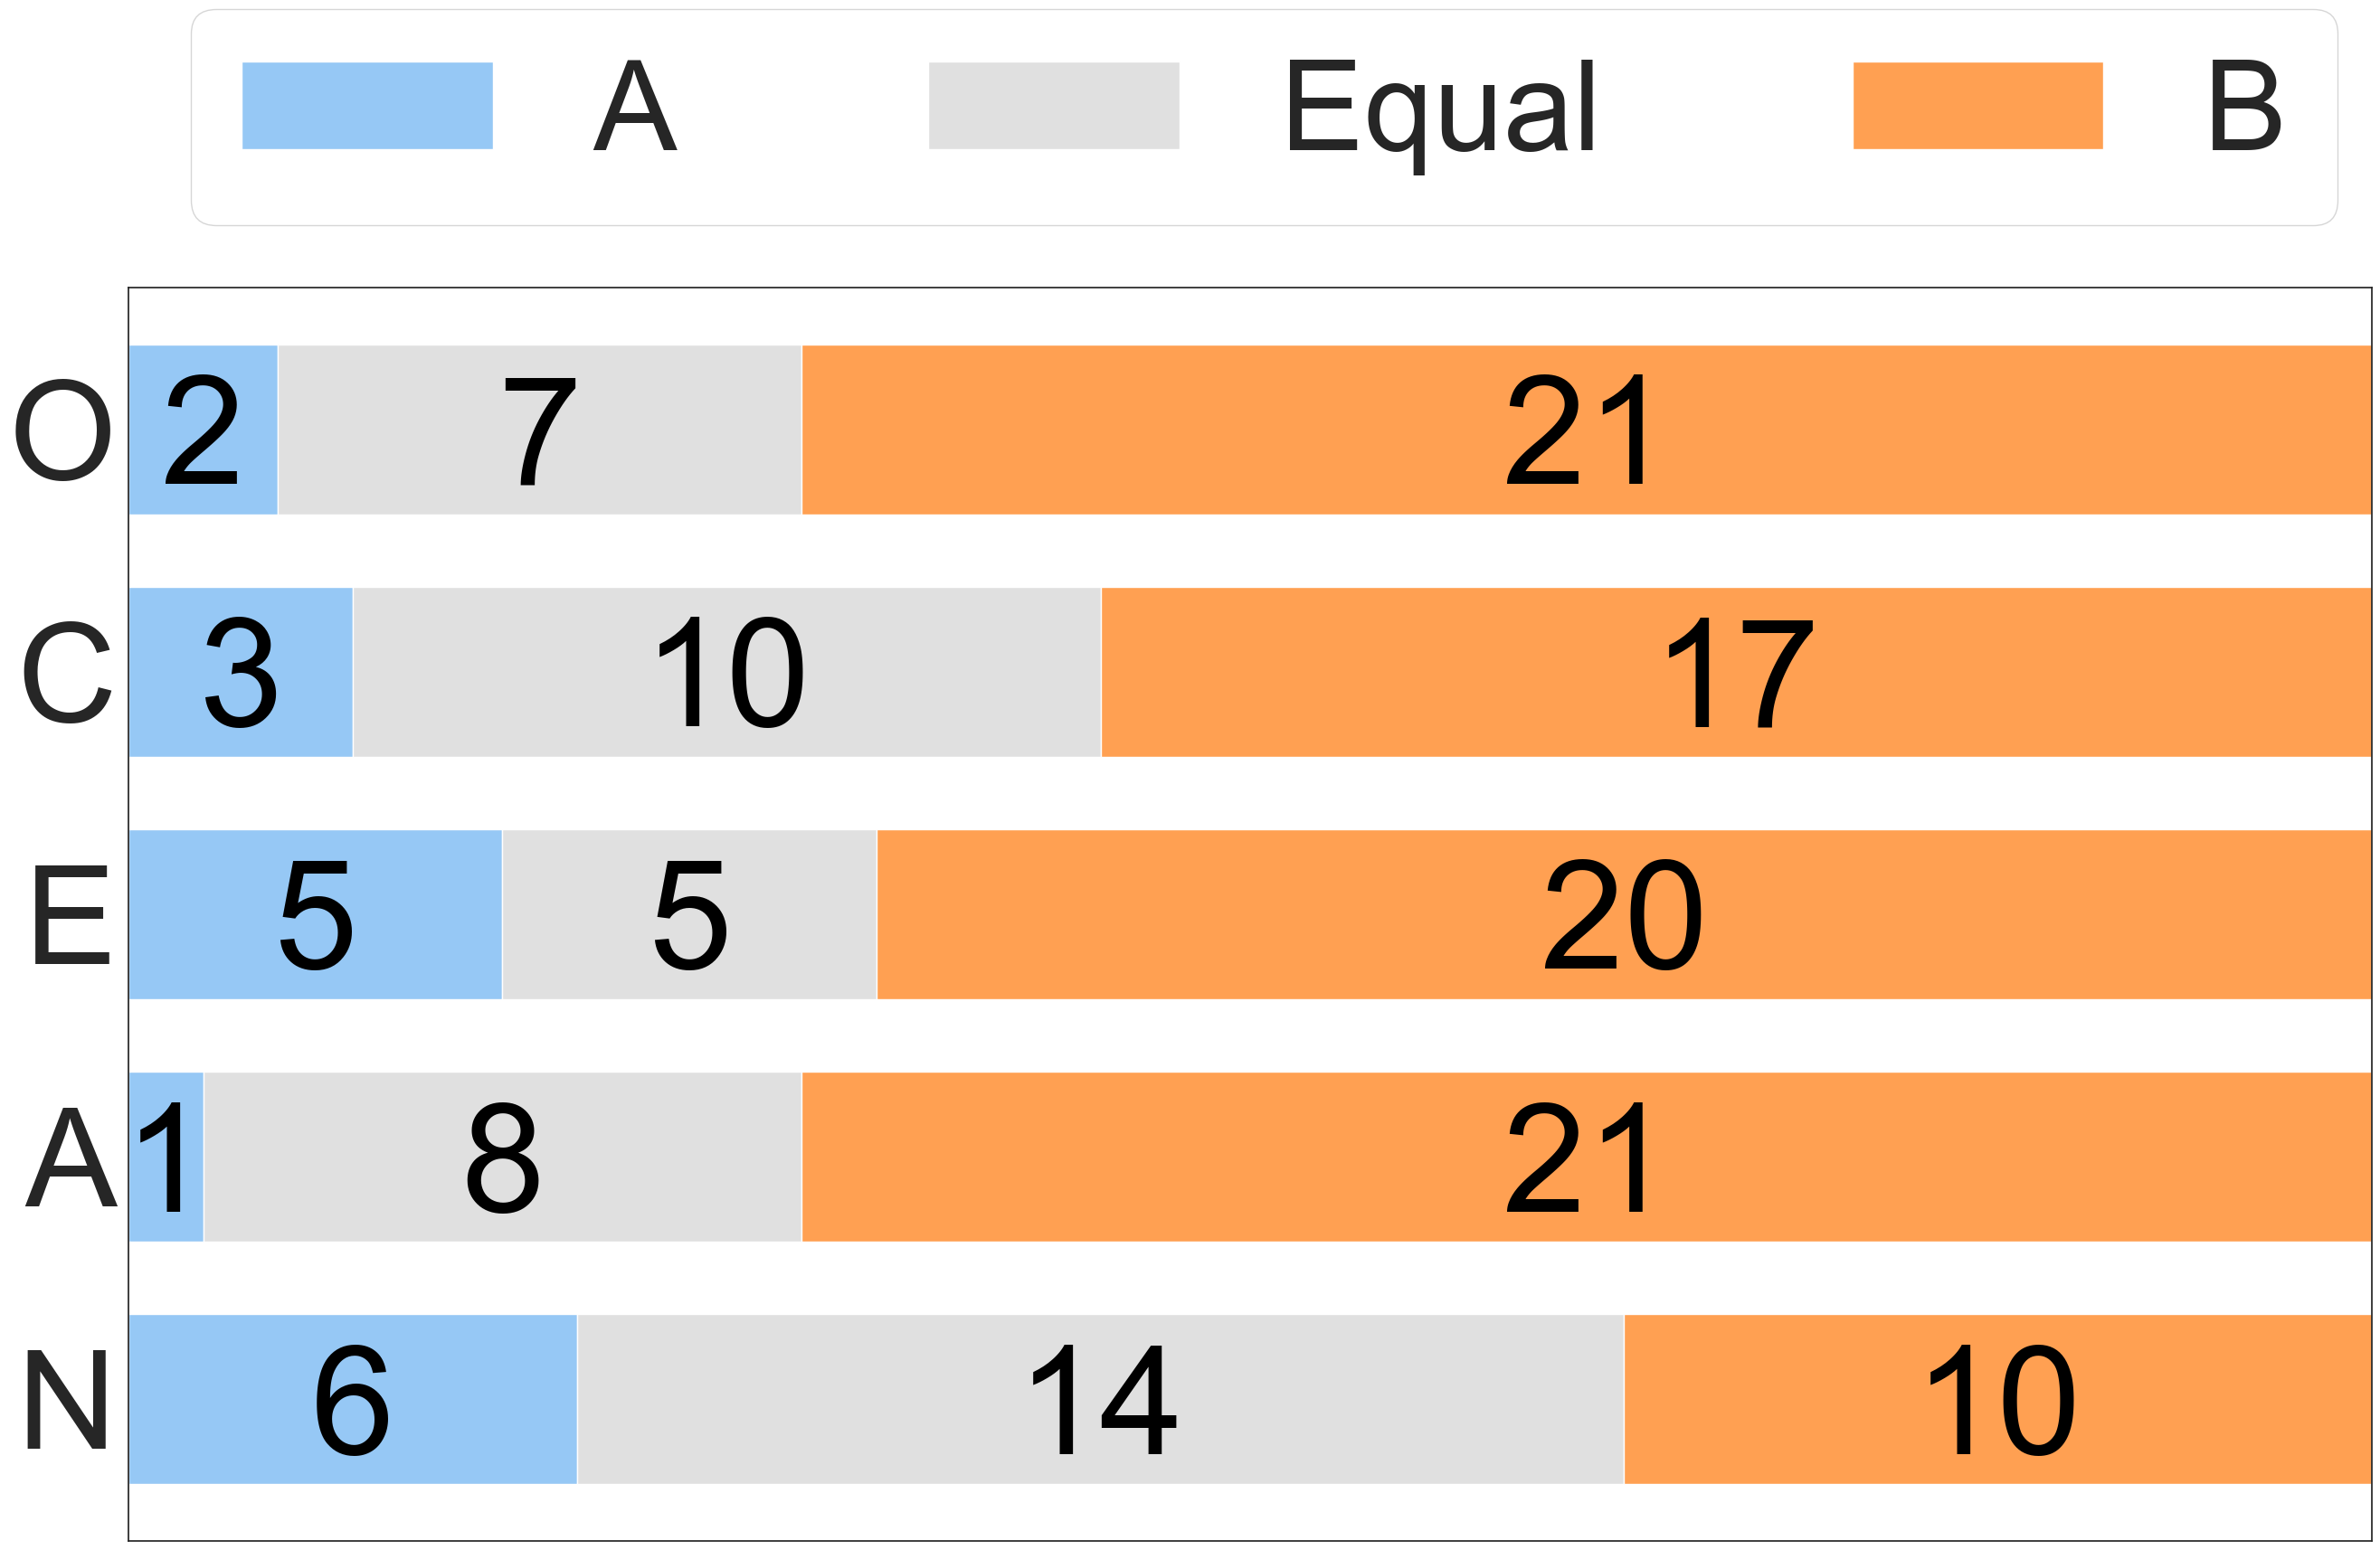

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt


category_names = ['A','Equal','B']
results = {
    'O': [10, 15, 17],
    'C': [26, 22, 29],
    'E': [35, 37, 7],
    'A': [32, 11, 9],
    'N': [21, 29, 5]
}

def survey(results, category_names,cset):
    sns.set(rc={'figure.figsize':(40,40)})
    sns.set(font_scale = 10)
    sns.set_style("white")
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    
    arrCols = np.array(sns.color_palette('bright'))
    if cset == 0:
        category_colors = [np.append(arrCols[2],1),np.append(arrCols[8],1),np.append(arrCols[3],1)]
        category_colors = [[84/255, 245/255, 84/255, 1], [255/255, 255/255, 33/255, 1],[255/255, 60/255, 60/255, 1]]
    else:
        category_colors = [np.append(arrCols[1],1),np.append(arrCols[7],1),np.append(arrCols[9],1)]
        category_colors = [[150/255, 200/255, 245/255, 1], [224/255, 224/255, 224/255, 1],[255/255, 160/255, 82/255, 1]]

    fig, ax = plt.subplots(figsize=(32, 18))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.7,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'black'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            if int(c) != 0:
                ax.text(x, y, str(int(c)), ha='center', va='center_baseline',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

types = ['O', 'C', 'E', 'A', 'N']

def getRatsOne(no):
    data=df[df['SampleNo'] == no]
    counts = data['One'].value_counts()
    return counts

def getRatsTwo(no):
    data=df[df['SampleNo'] == no]
    counts = data['Two'].value_counts()
    return counts
    
def makeSetFor(gapSt):
    results = {}
    for i in range(5):
        counts = getRatsOne(gapSt+i)
        if 0 not in counts:
            counts[0] = 0
        if 1 not in counts:
            counts[1] = 0
        if 2 not in counts:
            counts[2] = 0
        results[types[i]] = [counts[0],counts[1],counts[2]]
    return results

def makeSetFor2(gapSt):
    results = {}
    for i in range(5):
        counts = getRatsTwo(gapSt+i)
        if 0 not in counts:
            counts[0] = 0
        if 1 not in counts:
            counts[1] = 0
        if 2 not in counts:
            counts[2] = 0
        results[types[i]] = [counts[0],counts[1],counts[2]]
    return results

for c in range(1,6):
    case = c
    indset = (case - 1) * 5
    survey(makeSetFor(indset),category_names,0)
    survey(makeSetFor2(indset),category_names,1)

# ANOVA Between Users of Both Studies

In [13]:
# sample counts
import numpy as np
import pandas as pd
from scipy.stats import f_oneway

df = pd.read_csv('FirstStudy.csv')

firstStudyUsers = df['UserMail'].unique()

df = pd.read_csv('SecondStudy.csv')

onlySecond = []
both = []

pvals = []

for i in range(25):
    for index, row in df.iterrows():
        if(row['SampleNo'] == i):
            if(row['UserMail'] in firstStudyUsers):
                both.append(row['One'])
            else:
                onlySecond.append(row['One'])

    p_statistic, p_pvalue = f_oneway(onlySecond,both)
    print('{:.3f}'.format(p_pvalue))
    pvals.append(p_pvalue)
    
print(min(pvals))

0.795
0.170
0.059
0.090
0.106
0.268
0.400
0.363
0.394
0.651
0.530
0.375
0.318
0.288
0.149
0.179
0.128
0.111
0.114
0.080
0.081
0.064
0.070
0.100
0.107
0.05930148496000669


# Calculate Average Study Time

In [14]:
# sample counts
import numpy as np
import pandas as pd

times = np.zeros((25,1))
counts = np.zeros((25,1))

df = pd.read_csv('SecondStudy.csv')

for index, row in df.iterrows():
    times[int(row['SampleNo'])] = times[int(row['SampleNo'])] + int(row['TimeSeconds'])
    counts[int(row['SampleNo'])] = counts[int(row['SampleNo'])] + 1
    
for i in range(25):
    times[i] = times[i] / counts[i]
    
print(sum(times)/60)

df = pd.read_csv('FirstStudy.csv')

times = np.zeros((50,1))
counts = np.zeros((50,1))

for index, row in df.iterrows():
    if(row['TimeSeconds'] < 300):
        times[row['SampleNo']] = times[row['SampleNo']] + row['TimeSeconds']
        counts[row['SampleNo']] = counts[row['SampleNo']] + 1
    else:
        times[row['SampleNo']] = times[row['SampleNo']] + 300
        counts[row['SampleNo']] = counts[row['SampleNo']] + 1
    
for i in range(50):
    times[i] = times[i] / counts[i]

print(sum(times)/60)

[18.02611111]
[37.02192921]


# ANOVA for Case Groups in Table 5

In [15]:
import numpy as np
from scipy.stats import f_oneway
from scipy.stats import friedmanchisquare
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

df = pd.read_csv('SecondStudy.csv')

OCEAN = ['O','C','E','A','N']

print("same case diff ocean")

# compare among same case different OCEAN
k = 5
for i in range(0,5):
    mask = (df['SampleNo'] == i*k)
    array_O = np.array(df.loc[mask, 'One'])
    
    mask = (df['SampleNo'] == i*k+1)
    array_C = np.array(df.loc[mask, 'One'])
    
    mask = (df['SampleNo'] == i*k+2)
    array_E = np.array(df.loc[mask, 'One'])
    
    mask = (df['SampleNo'] == i*k+3)
    array_A = np.array(df.loc[mask, 'One'])
    
    mask = (df['SampleNo'] == i*k+4)
    array_N = np.array(df.loc[mask, 'One'])
    
    p_statistic, p_pvalue = f_oneway(array_O, array_C, array_E, array_A, array_N)

    print(str(OCEAN[i]))
    
    # Print Results
    print('{:.3f}'.format(p_statistic))
    print('{:.3f}'.format(p_pvalue))
    
print()
print("same ocean diff case")
  
# compare among same OCEAN different case
for i in range(0,5):
    mask = (df['SampleNo'] == 0*k+i)
    array_0 = np.array(df.loc[mask, 'One'])
    
    mask = (df['SampleNo'] == 1*k+i)
    array_1 = np.array(df.loc[mask, 'One'])
    
    mask = (df['SampleNo'] == 2*k+i)
    array_2 = np.array(df.loc[mask, 'One'])
    
    mask = (df['SampleNo'] == 3*k+i)
    array_3 = np.array(df.loc[mask, 'One'])
    
    mask = (df['SampleNo'] == 4*k+i)
    array_4 = np.array(df.loc[mask, 'One'])
    
    p_statistic, p_pvalue = f_oneway(array_0, array_1, array_2, array_3, array_4)

    print(str(i+1))
    
    # Print Results
    print('{:.3f}'.format(p_statistic))
    print('{:.3f}'.format(p_pvalue))

same case diff ocean
O
9.019
0.000
C
3.732
0.006
E
17.518
0.000
A
10.168
0.000
N
12.381
0.000

same ocean diff case
1
3.305
0.013
2
2.375
0.055
3
10.632
0.000
4
10.662
0.000
5
6.824
0.000


In [16]:
# detailed ANOVA statistics

import numpy as np
from scipy.stats import f_oneway
from scipy.stats import friedmanchisquare
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import pingouin as pg
from statsmodels.stats.anova import AnovaRM 

OCEAN = ['O','C','E','A','N']

print("same case diff ocean")

# compare among same case different OCEAN
k = 5
for i in range(0,5):
    mask = (df['SampleNo'] == i*k)
    array_O = np.array(df.loc[mask, 'One'])
    
    mask = (df['SampleNo'] == i*k+1)
    array_C = np.array(df.loc[mask, 'One'])
    
    mask = (df['SampleNo'] == i*k+2)
    array_E = np.array(df.loc[mask, 'One'])
    
    mask = (df['SampleNo'] == i*k+3)
    array_A = np.array(df.loc[mask, 'One'])
    
    mask = (df['SampleNo'] == i*k+4)
    array_N = np.array(df.loc[mask, 'One'])
    
    p_statistic, p_pvalue = f_oneway(array_O, array_C, array_E, array_A, array_N)

    print(str(OCEAN[i]))
    
    # Print Results
    print('{:.3f}'.format(p_statistic))
    print('{:.3f}'.format(p_pvalue))
    
    new_Array=[]
    for ii,g in enumerate(array_O):
        new_Array.append([g,0,ii%5])
    for ii,g in enumerate(array_C):
        new_Array.append([g,1,ii%5])
    for ii,g in enumerate(array_E):
        new_Array.append([g,2,ii%5])
    for ii,g in enumerate(array_A):
        new_Array.append([g,3,ii%5])
    for ii,g in enumerate(array_N):
        new_Array.append([g,4,ii%5])

    test_df = pd.DataFrame(data=np.array(new_Array), columns=["value","sample","group"])
    

    mod = ols('value ~ C(sample)', data=test_df).fit()

    aov_table = sm.stats.anova_lm(mod, typ=2)
    print(aov_table)
    esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
    print("E")
    print(esq_sm)
    
    # normality assumption check
    w, pvalue = stats.shapiro(mod.resid)
    print(w, pvalue)
    res = mod.resid
    #fig = sm.qqplot(res, line='s')
    #plt.show()
    # normality holds
    # sphericity
    print("spr:" + str(pg.sphericity(data=test_df,dv="value",subject="group",within="sample")))
    print("RM:" + str(AnovaRM(data=test_df, depvar='value', subject='group', within=['sample'],aggregate_func='mean').fit()))
    
    print("**************")

print()
print("same ocean diff case")

    
# compare among same OCEAN different case
for i in range(0,5):
    mask = (df['SampleNo'] == 0*k+i)
    array_0 = np.array(df.loc[mask, 'One'])
    
    mask = (df['SampleNo'] == 1*k+i)
    array_1 = np.array(df.loc[mask, 'One'])
    
    mask = (df['SampleNo'] == 2*k+i)
    array_2 = np.array(df.loc[mask, 'One'])
    
    mask = (df['SampleNo'] == 3*k+i)
    array_3 = np.array(df.loc[mask, 'One'])
    
    mask = (df['SampleNo'] == 4*k+i)
    array_4 = np.array(df.loc[mask, 'One'])
    
    p_statistic, p_pvalue = f_oneway(array_0, array_1, array_2, array_3, array_4)

    print(str(i+1))
    
    # Print Results
    print('{:.3f}'.format(p_statistic))
    print('{:.3f}'.format(p_pvalue))
    
    new_Array=[]
    for ii,g in enumerate(array_O):
        new_Array.append([g,0,int(ii/5)])
    for ii,g in enumerate(array_C):
        new_Array.append([g,1,int(ii/5)])
    for ii,g in enumerate(array_E):
        new_Array.append([g,2,int(ii/5)])
    for ii,g in enumerate(array_A):
        new_Array.append([g,3,int(ii/5)])
    for ii,g in enumerate(array_N):
        new_Array.append([g,4,int(ii/5)])

    test_df = pd.DataFrame(data=np.array(new_Array), columns=["value","sample","group"])

    mod = ols('value ~ C(sample)', data=test_df).fit()

    aov_table = sm.stats.anova_lm(mod, typ=2)
    print(aov_table)
    esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
    print("E")
    print(esq_sm)
    # sphericity
    print("spr:" + str(pg.sphericity(data=test_df,dv="value",subject="group",within="sample")))
    print("RM:" + str(AnovaRM(data=test_df, depvar='value', subject='group', within=['sample'],aggregate_func='mean').fit()))
    print("**************")

same case diff ocean
O
9.019
0.000
              sum_sq     df         F    PR(>F)
C(sample)  20.493333    4.0  9.019223  0.000002
Residual   82.366667  145.0       NaN       NaN
E
0.19923520642945108
0.9590112566947937 0.00019887184316758066
spr:SpherResults(spher=True, W=0.03737234875522739, chi2=7.943158449747401, dof=9, pval=0.6389850662574321)
RM:               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
sample 11.3223 4.0000 16.0000 0.0001

**************
C
3.732
0.006
              sum_sq     df         F   PR(>F)
C(sample)   8.240000    4.0  3.732195  0.00638
Residual   80.033333  145.0       NaN      NaN
E
0.09334642398610374
0.9167441725730896 1.3159960587927344e-07
spr:SpherResults(spher=True, W=0.09731989117979158, chi2=5.630233708154765, dof=9, pval=0.8350507683473809)
RM:               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
sample  5.2373 4.0000 16.0000 0.0068

**************
E
17.518
0.000
     

E:\Anaconda\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


spr:SpherResults(spher=True, W=0.16715584756154234, chi2=6.111831332941187, dof=9, pval=0.7630803549007352)
RM:               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
sample 11.5677 4.0000 20.0000 0.0001

**************


# Tukey HSD Comparisons in Table 6

In [17]:
# using case grouping

from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

pd.set_option('mode.chained_assignment', None)

print("for different cases ocean pairs")

for i in range(5):
    print("case " + str(i+1))
    
    df = pd.read_csv('SecondStudy.csv')
    mask = ((df['SampleNo'] >= i * 5) & (df['SampleNo'] < (i * 5) + 5))
    masked = df.loc[mask]
        
    masked['SampleNo'].replace(i*5, 0, inplace=True)
    masked['SampleNo'].replace(i*5+1, 1, inplace=True)
    masked['SampleNo'].replace(i*5+2, 2, inplace=True)
    masked['SampleNo'].replace(i*5+3, 3, inplace=True)
    masked['SampleNo'].replace(i*5+4, 4, inplace=True)
    
    tukey = pairwise_tukeyhsd(endog=masked['One'], groups=masked['SampleNo'], alpha=0.05)
    print(tukey)

for different cases ocean pairs
case 1
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.4667 0.1217 -0.0709  1.0042  False
     0      2  -0.3667 0.3305 -0.9042  0.1709  False
     0      3      0.7  0.004  0.1624  1.2376   True
     0      4   0.2333 0.7519 -0.3042  0.7709  False
     1      2  -0.8333 0.0003 -1.3709 -0.2958   True
     1      3   0.2333 0.7519 -0.3042  0.7709  False
     1      4  -0.2333 0.7519 -0.7709  0.3042  False
     2      3   1.0667    0.0  0.5291  1.6042   True
     2      4      0.6 0.0204  0.0624  1.1376   True
     3      4  -0.4667 0.1217 -1.0042  0.0709  False
----------------------------------------------------
case 2
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1      0.0    1.0 -0.5299  0.5299  False


In [18]:
# using personality grouping

from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

pd.set_option('mode.chained_assignment', None)

OCEAN = ['O','C','E','A','N']

print("for different ocean, case pairs")

for i in range(5):
    print(OCEAN[i])
    
    df = pd.read_csv('SecondStudy.csv')
    mask = ((df['SampleNo'] % 5 == i))
    masked = df.loc[mask]
    
    for k in range(5):
        masked['SampleNo'].replace(k*5+i, k, inplace=True)
        
    tukey = pairwise_tukeyhsd(endog=masked['One'], groups=masked['SampleNo'], alpha=0.05)
    print(tukey)

for different ocean, case pairs
O
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1      0.4 0.2368 -0.1327  0.9327  False
     0      2   0.4333 0.1685 -0.0993   0.966  False
     0      3  -0.1333 0.9581  -0.666  0.3993  False
     0      4   0.2333 0.7455 -0.2993   0.766  False
     1      2   0.0333 0.9998 -0.4993   0.566  False
     1      3  -0.5333 0.0495  -1.066 -0.0007   True
     1      4  -0.1667 0.9094 -0.6993   0.366  False
     2      3  -0.5667 0.0309 -1.0993  -0.034   True
     2      4     -0.2 0.8377 -0.7327  0.3327  False
     3      4   0.3667 0.3212  -0.166  0.8993  False
----------------------------------------------------
C
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0667 0.9983 -0.6847  0.5514  False
     0    

# Generate Box Plots in Figure 4

for different cases ocean pairs
case 0


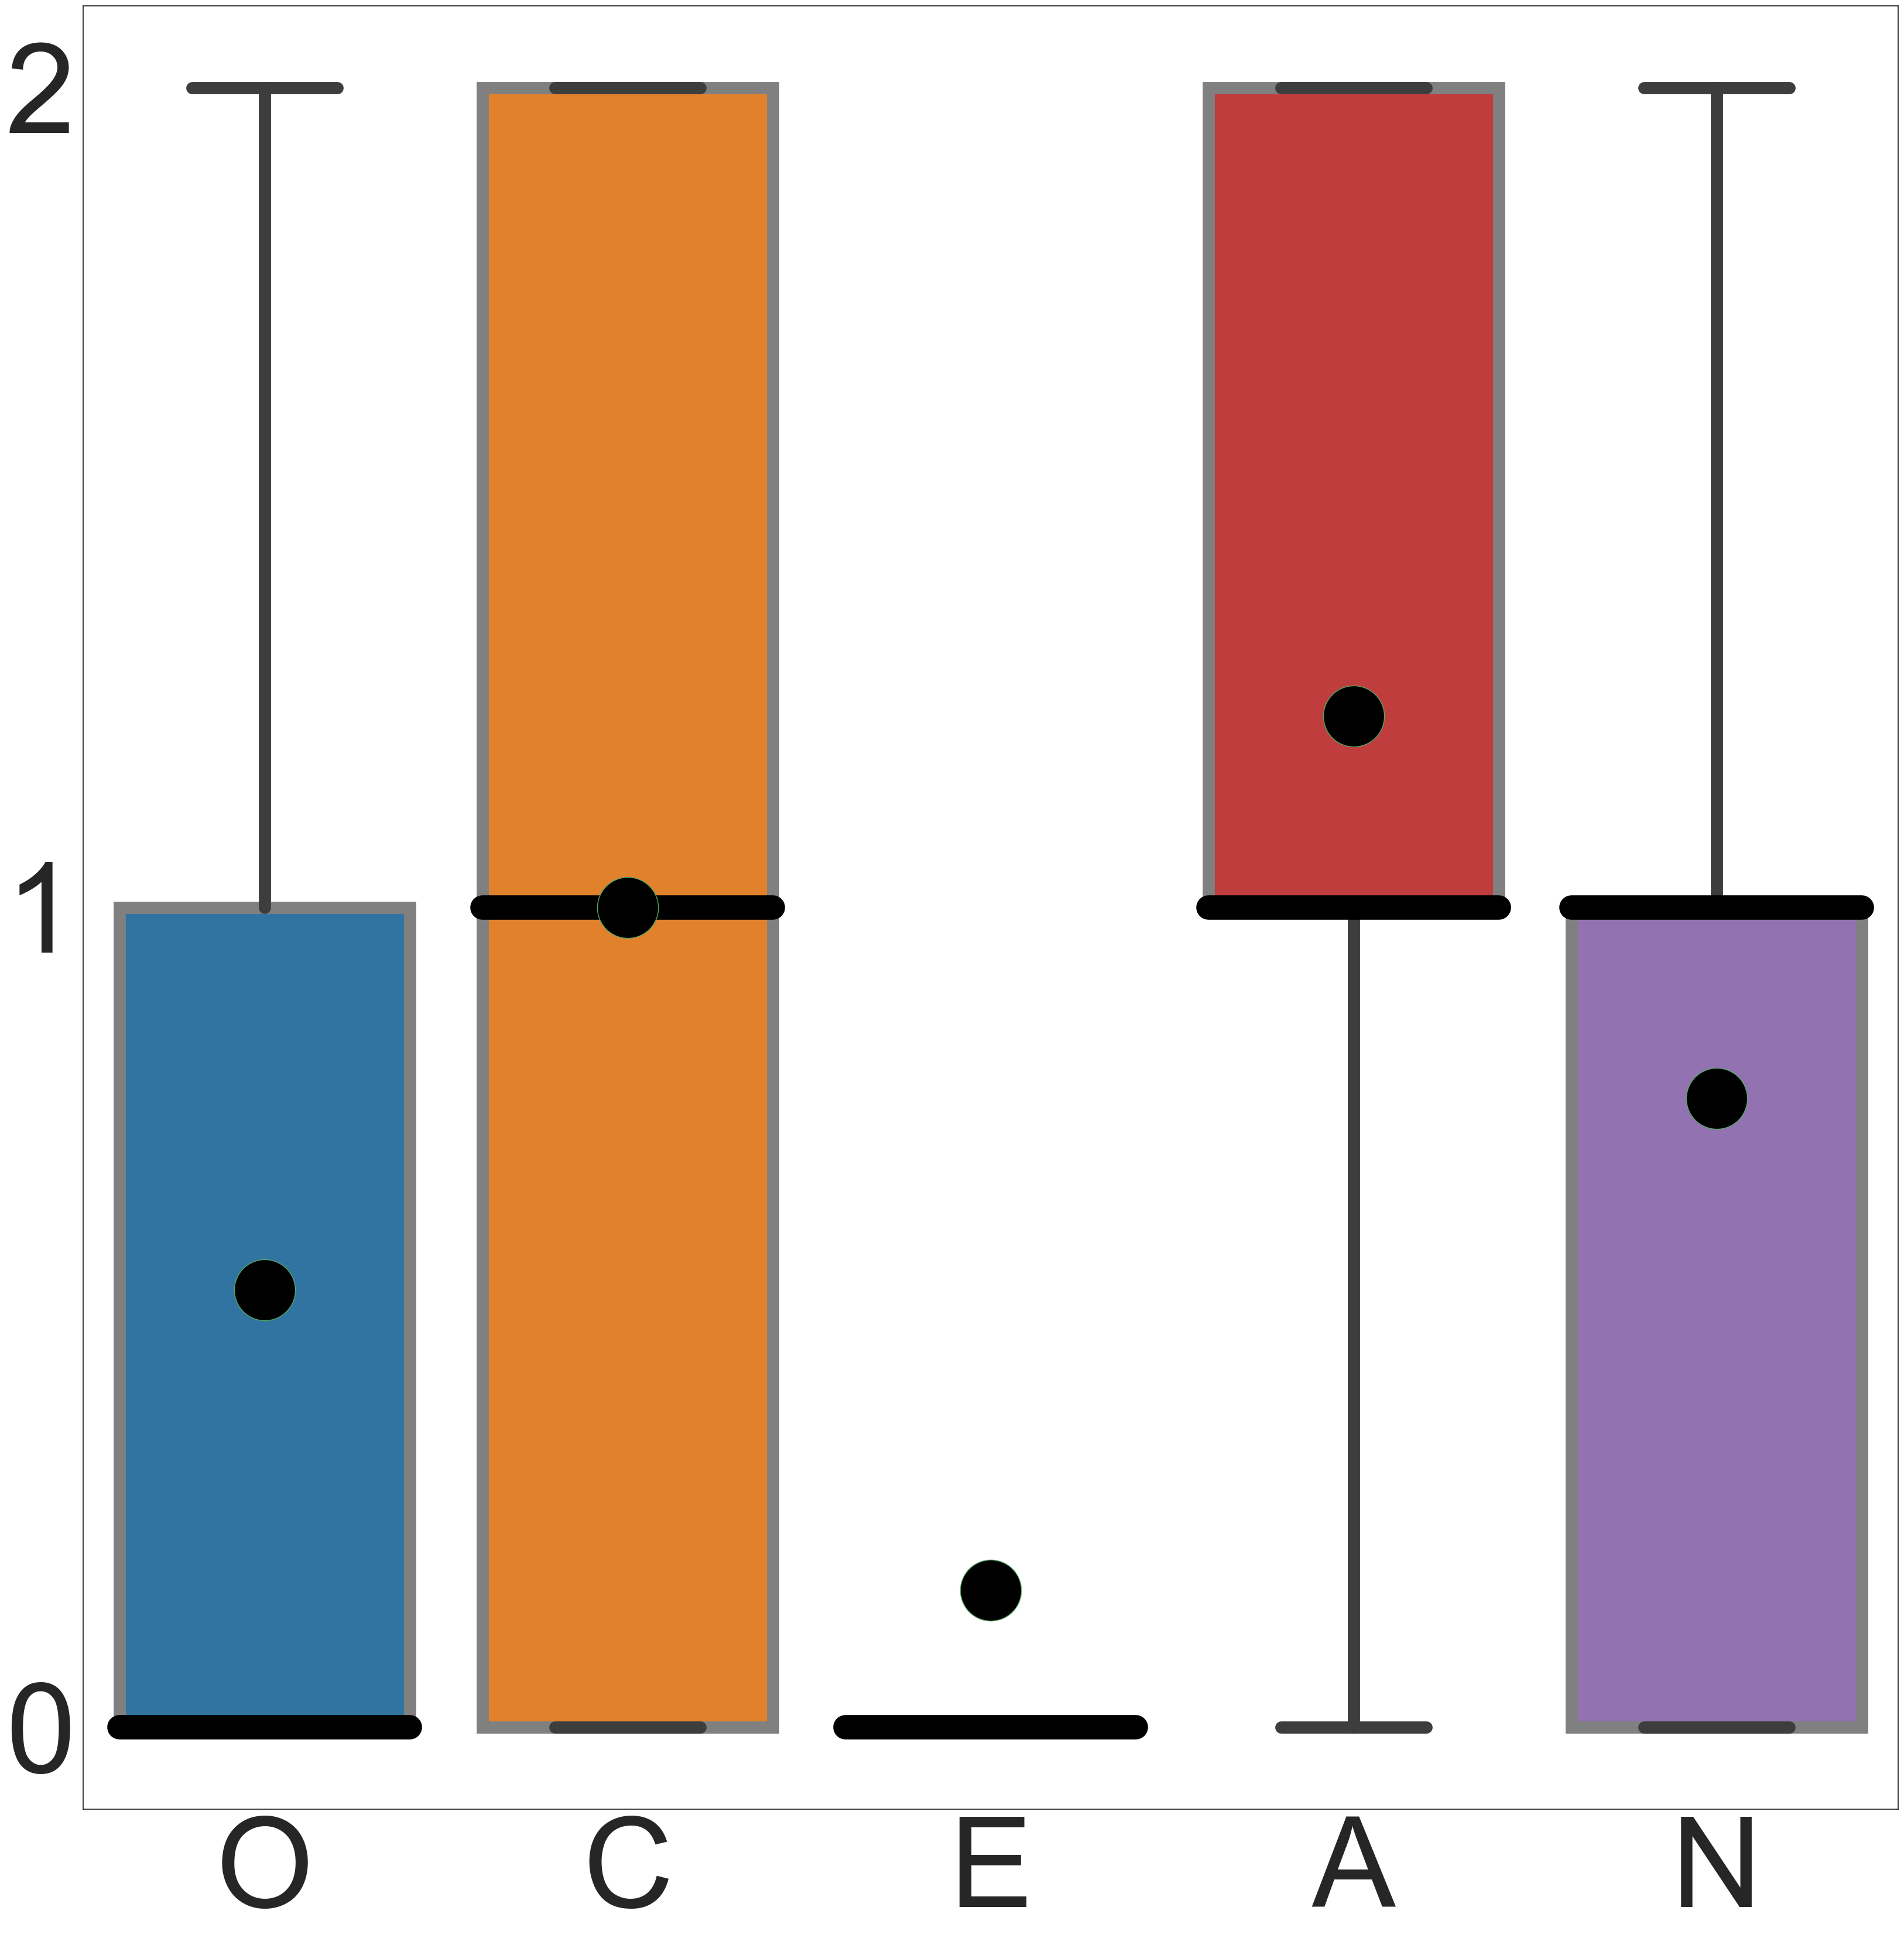

case 1


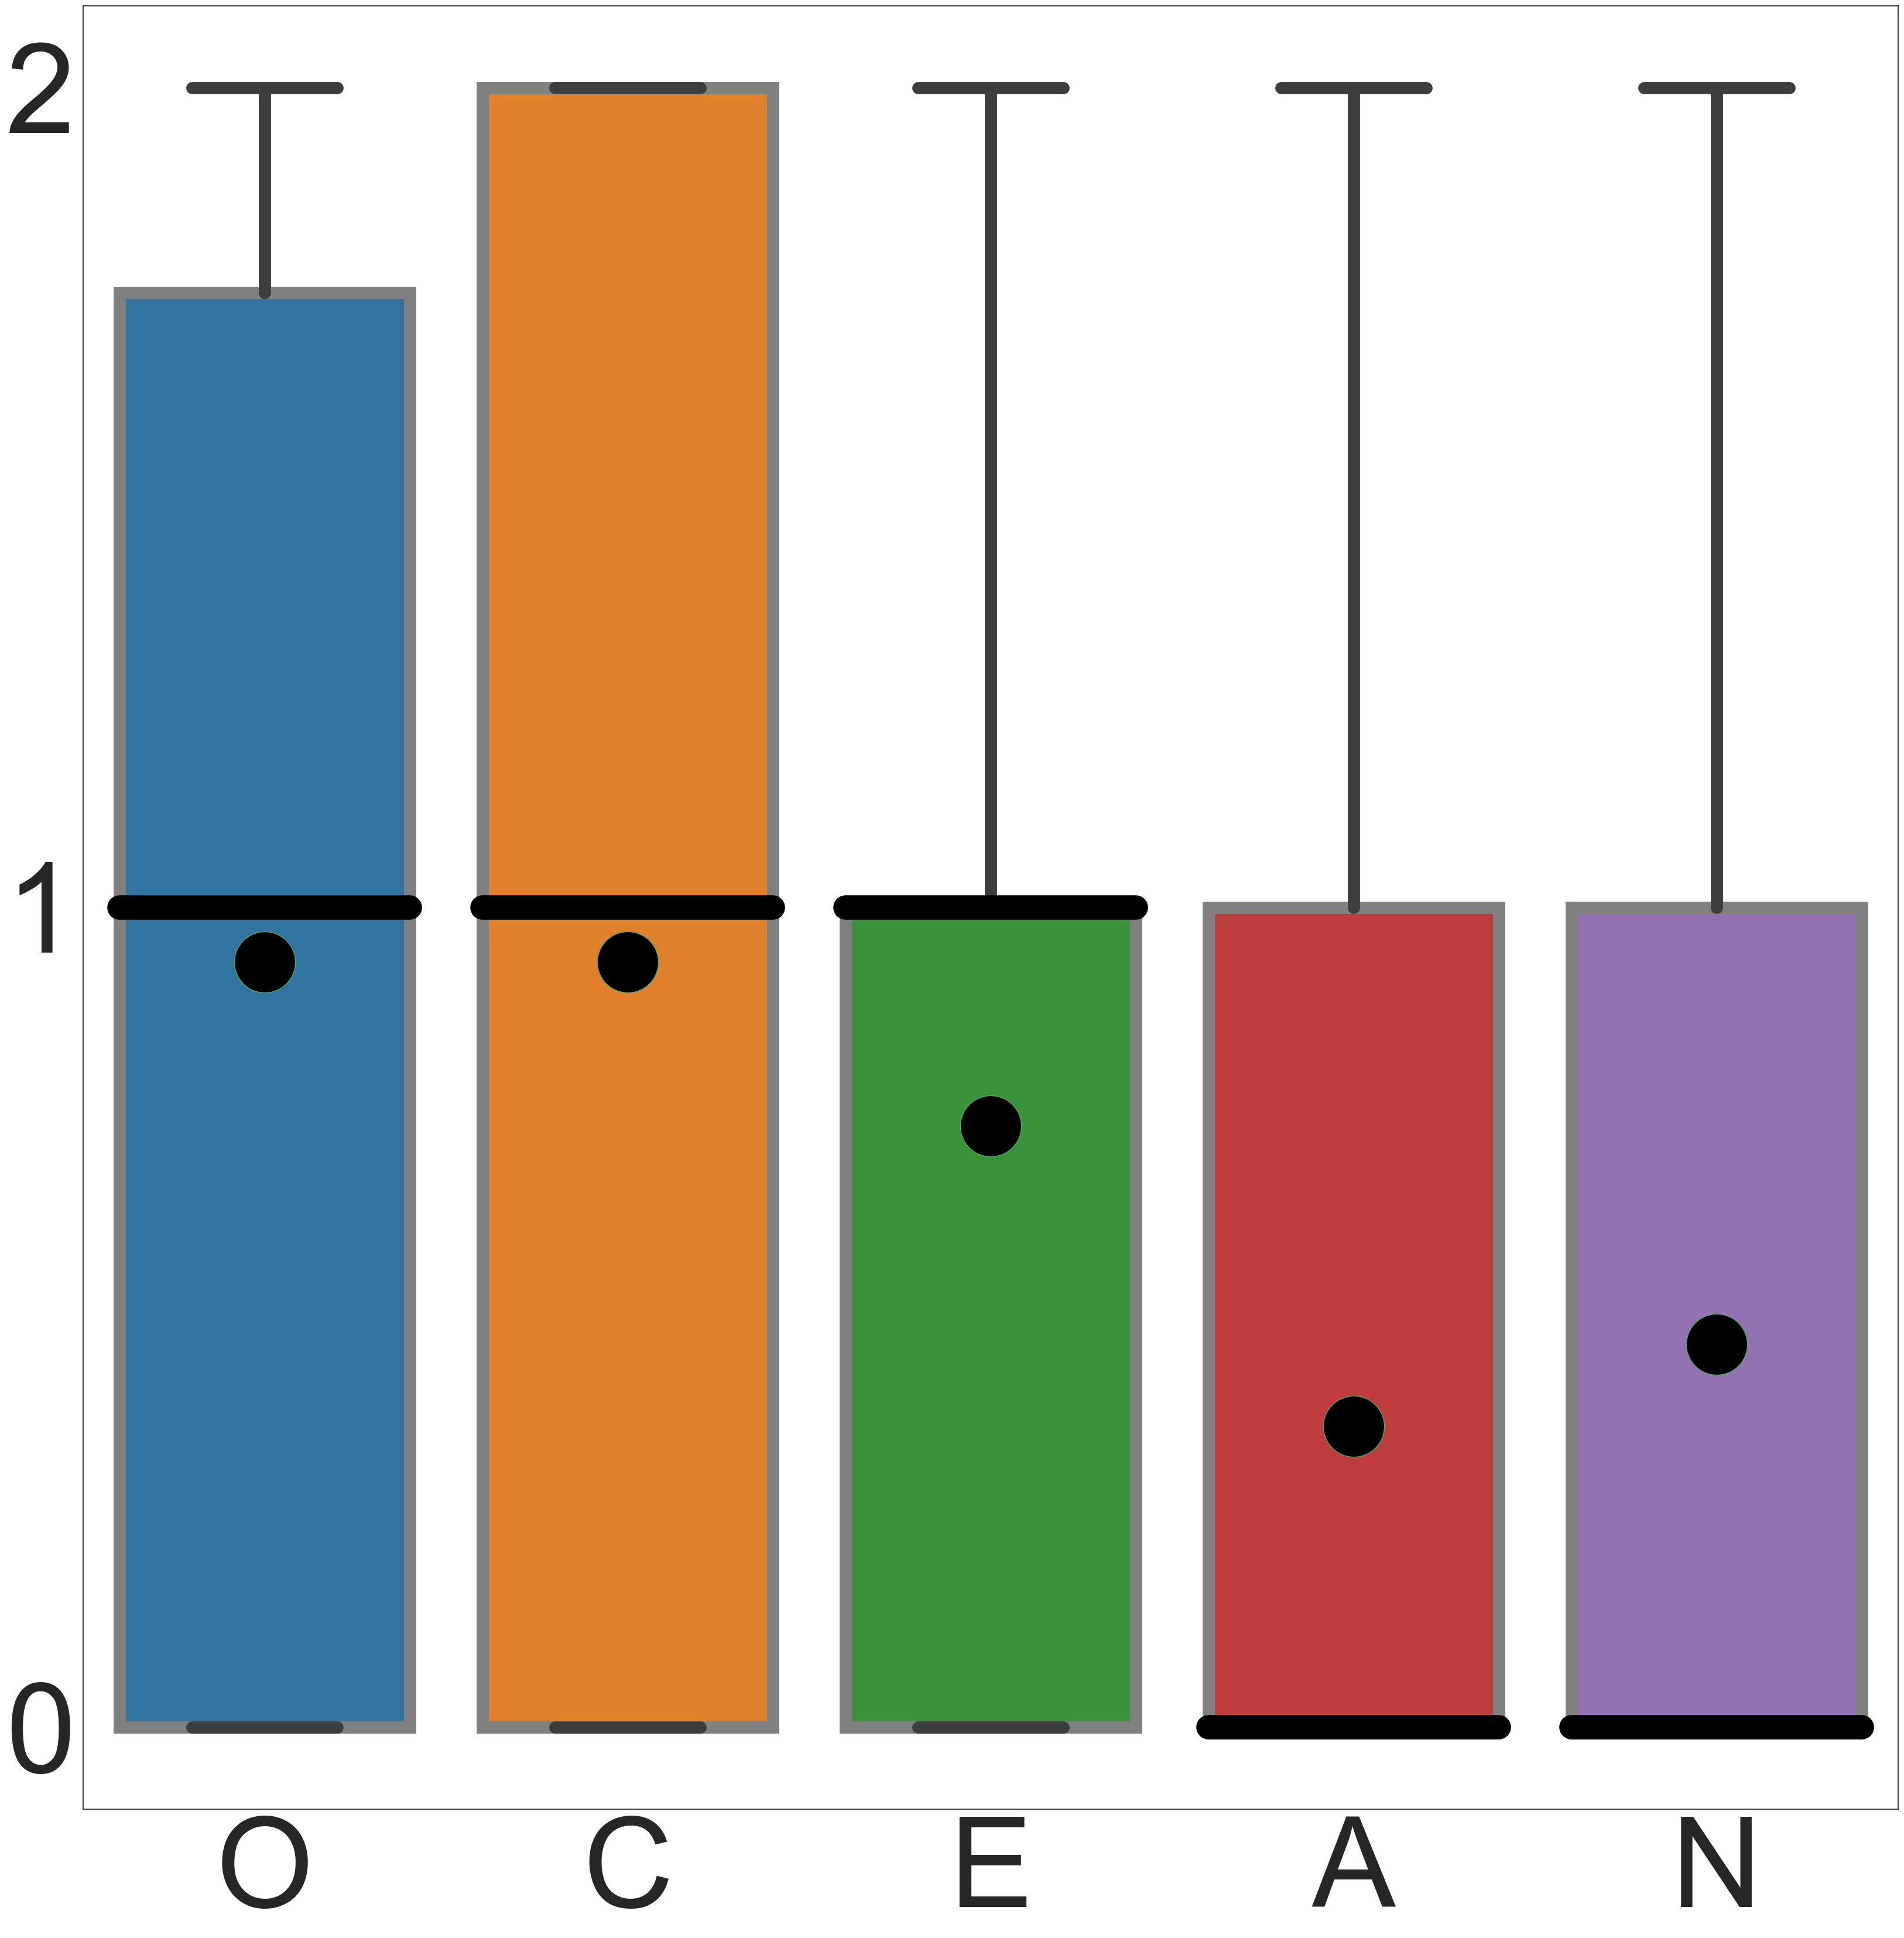

case 2


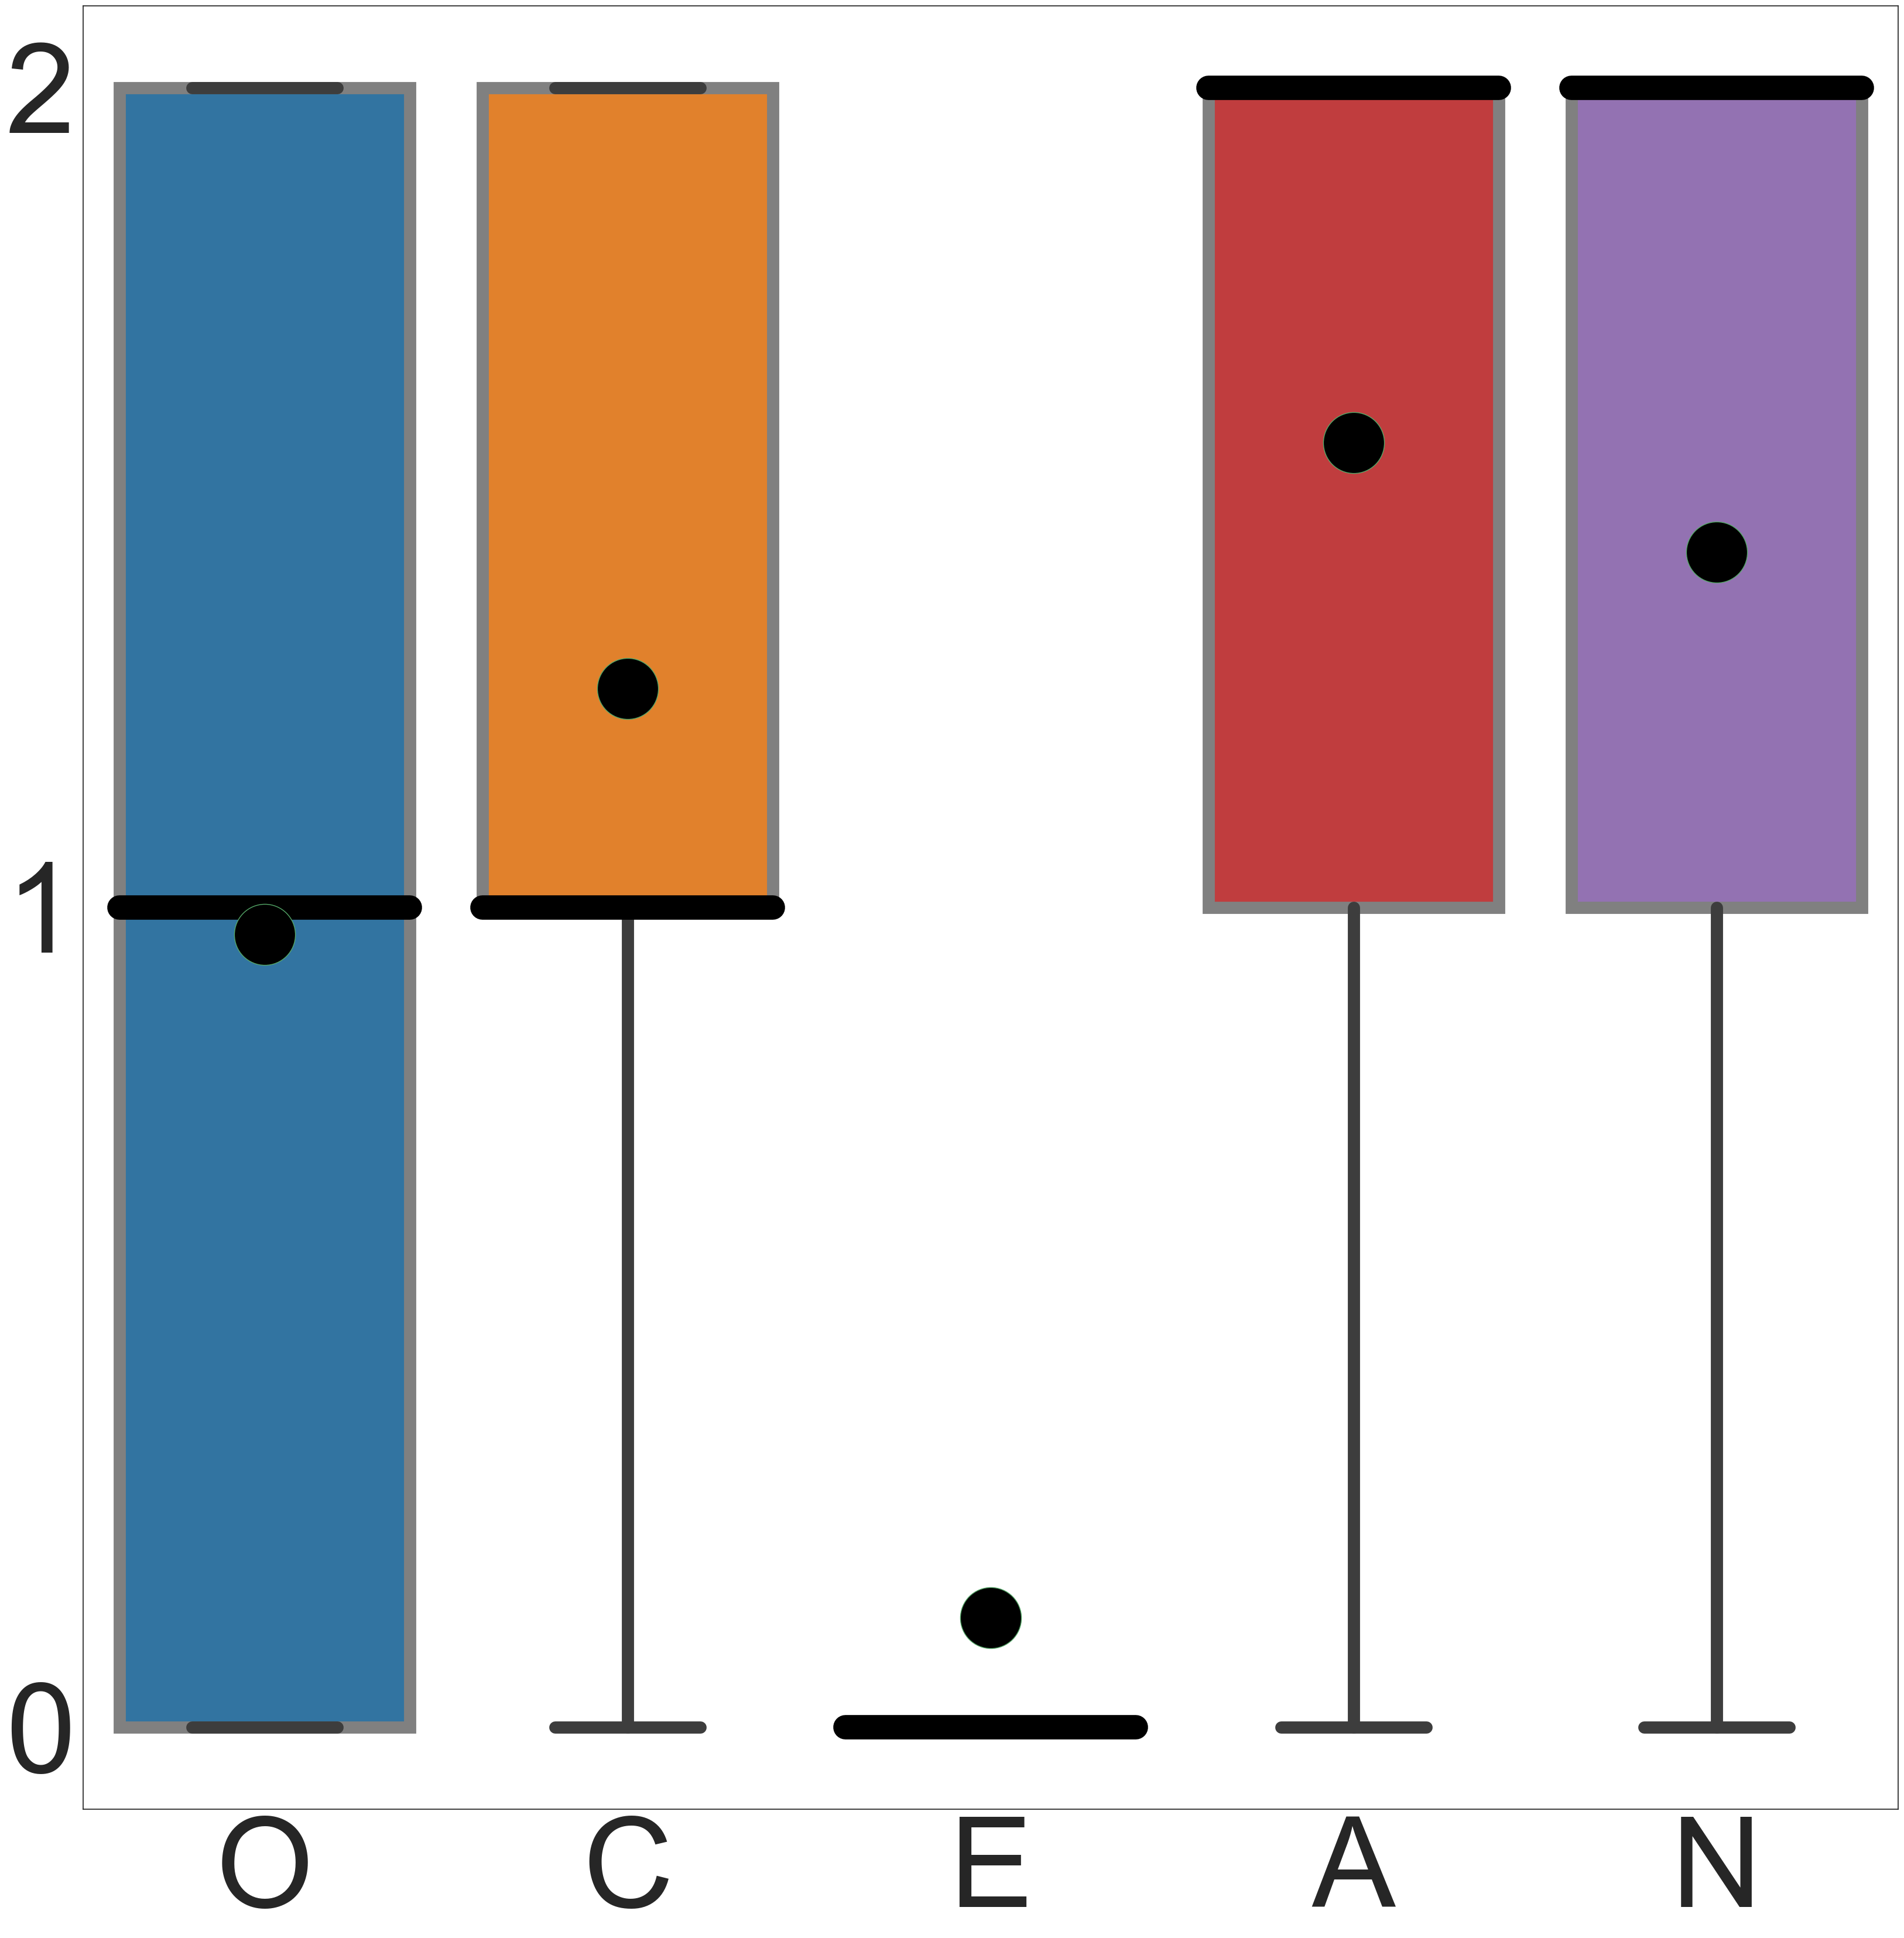

case 3


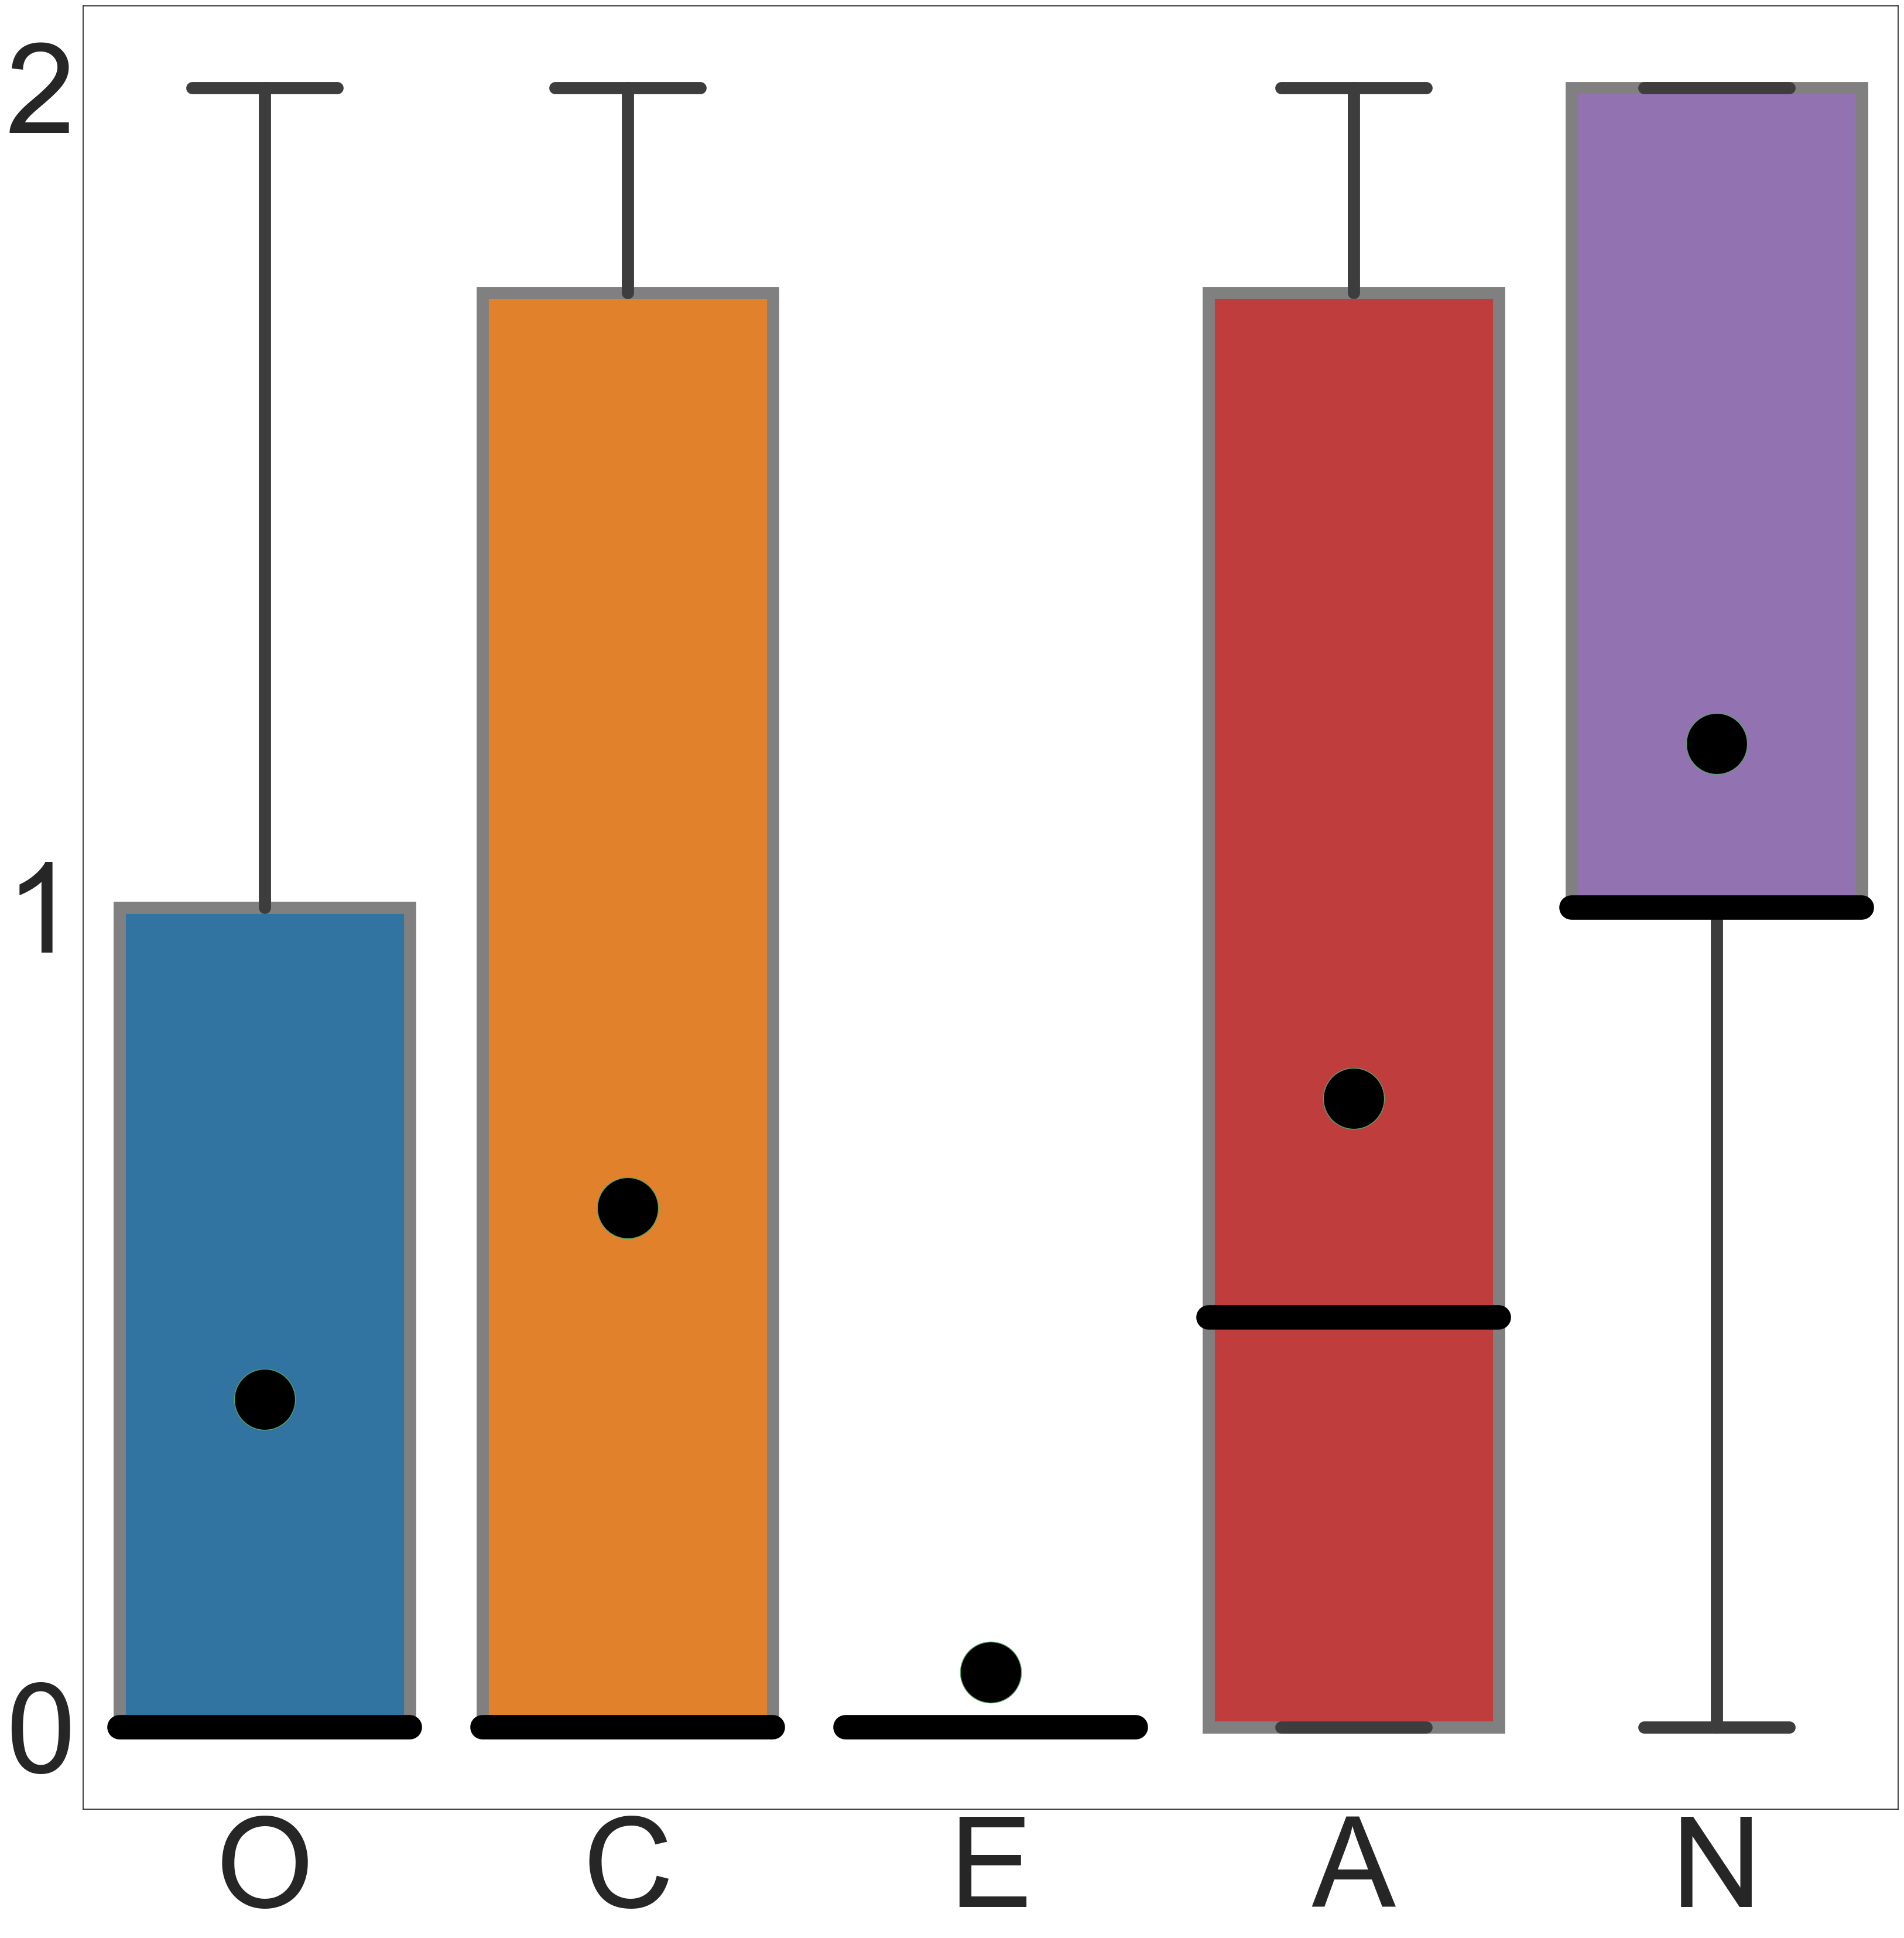

case 4


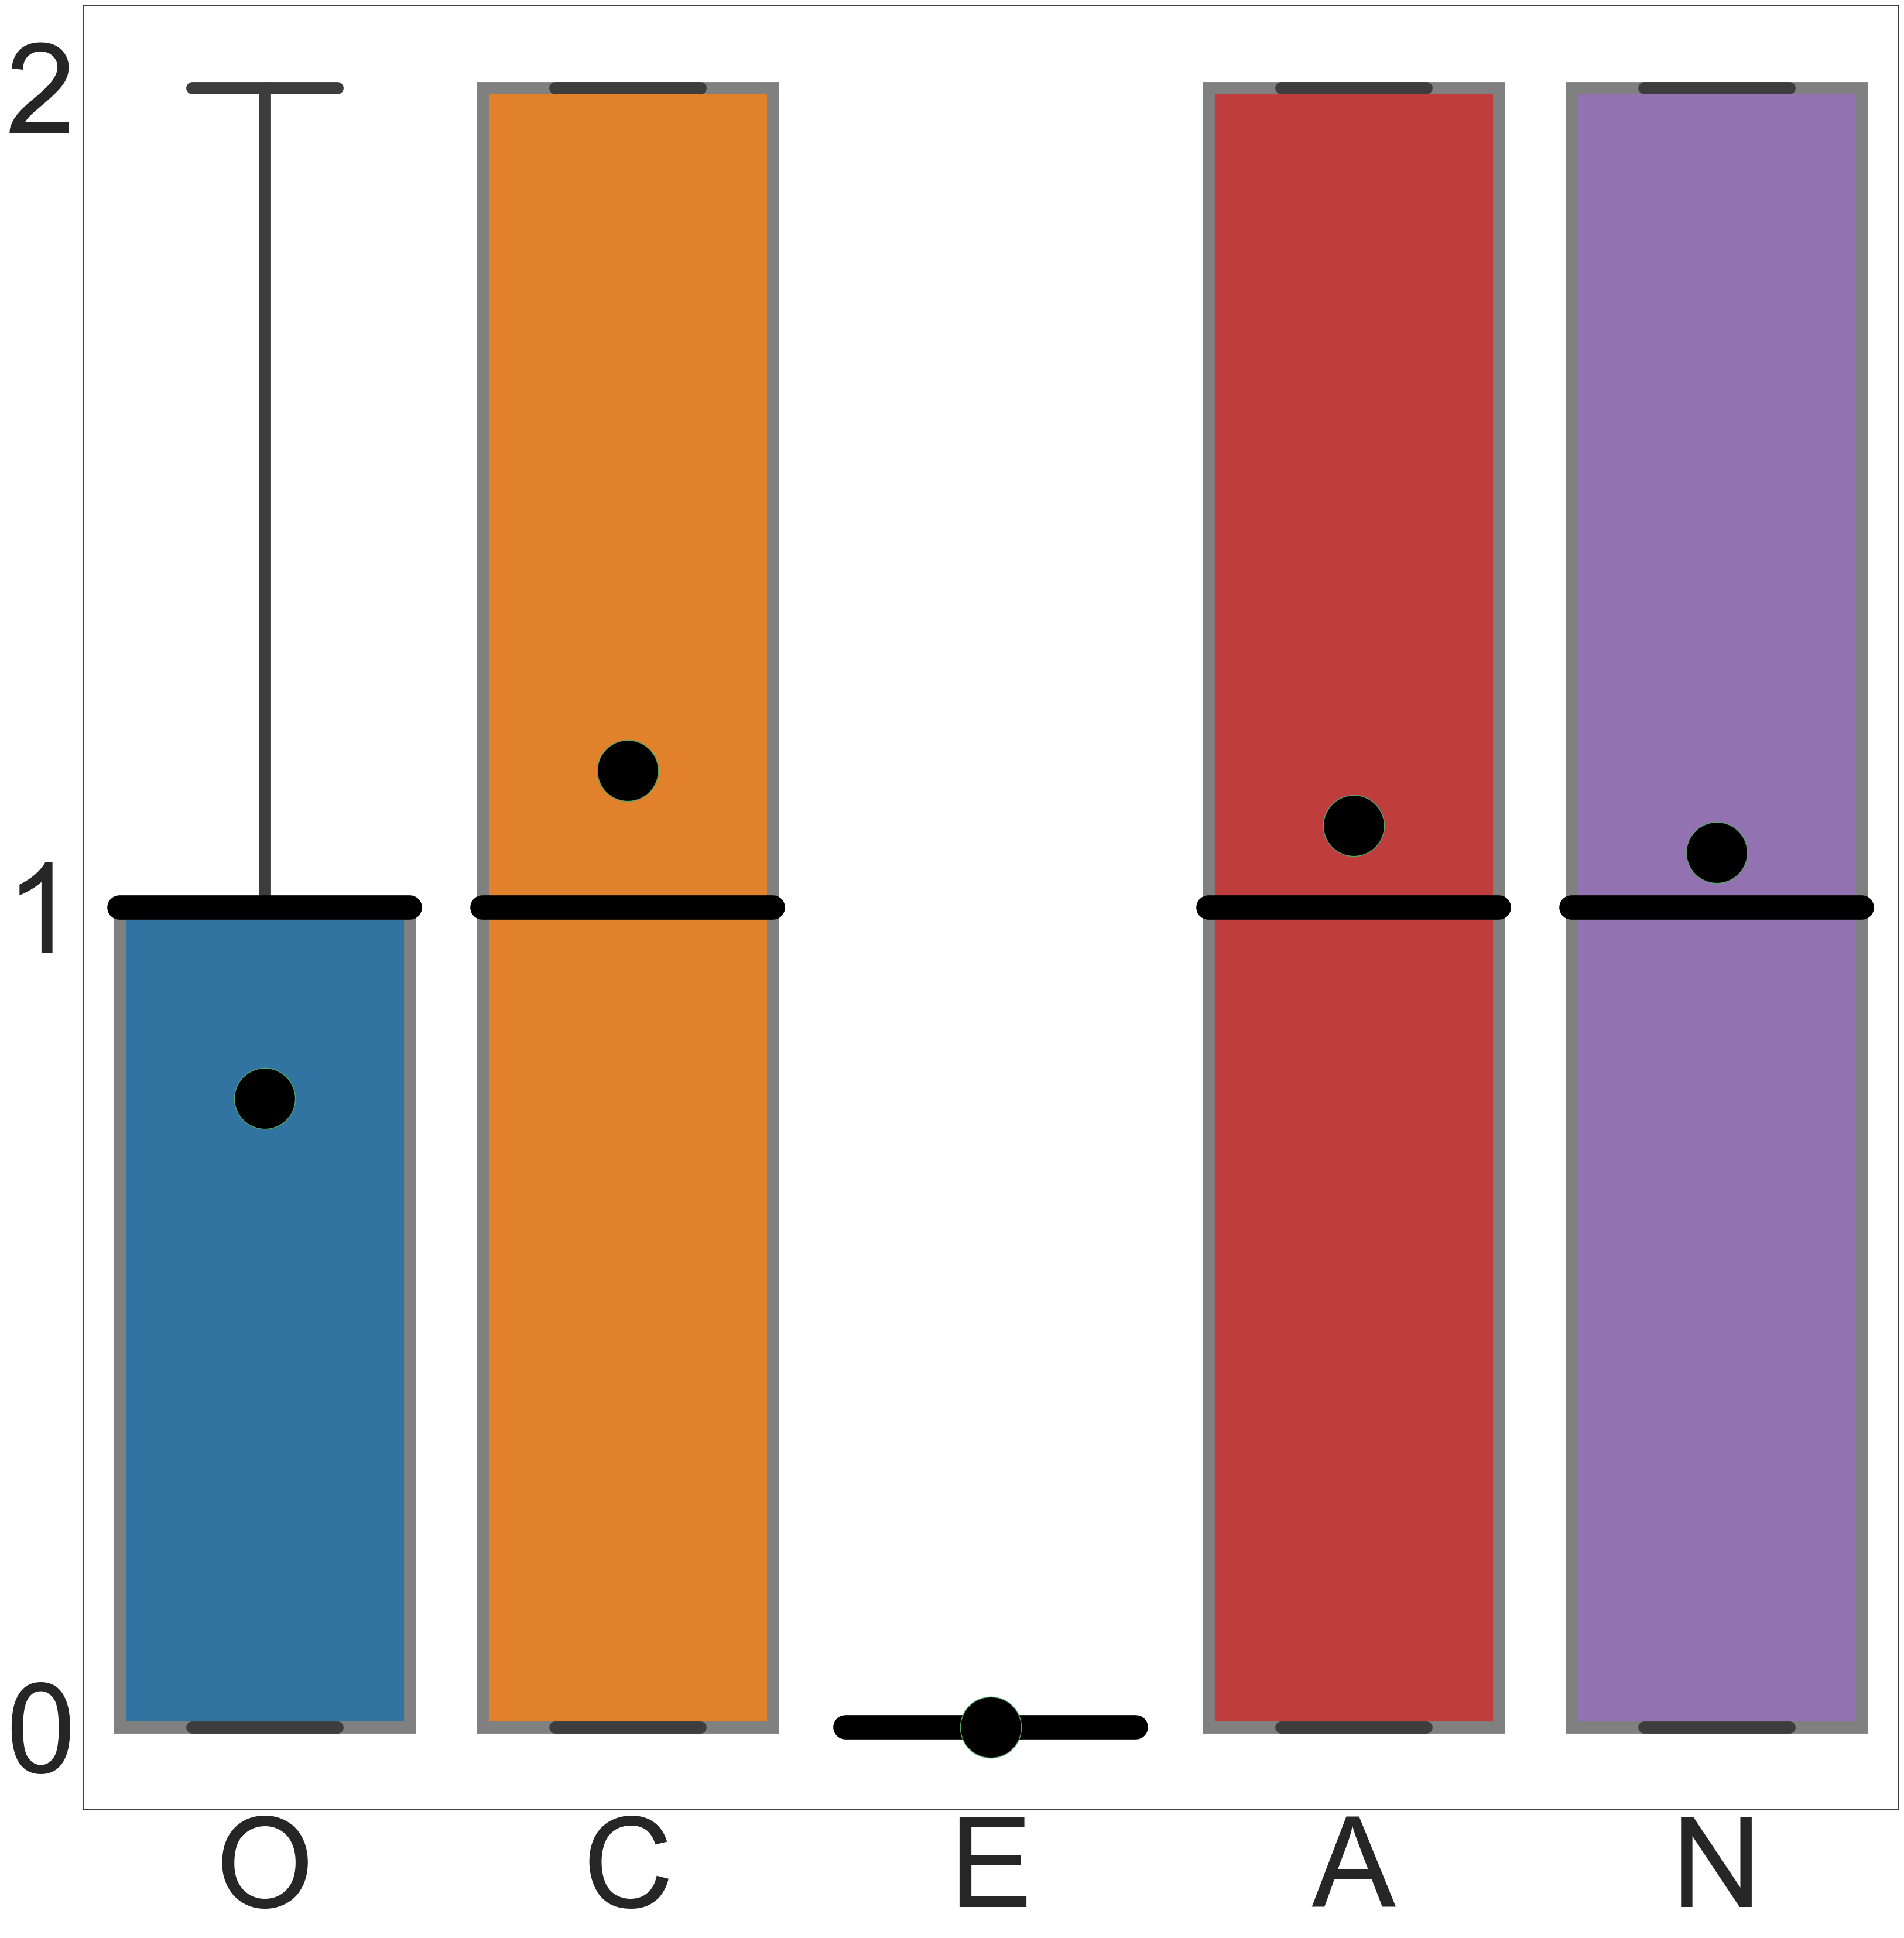

for different ocean, case pairs
O


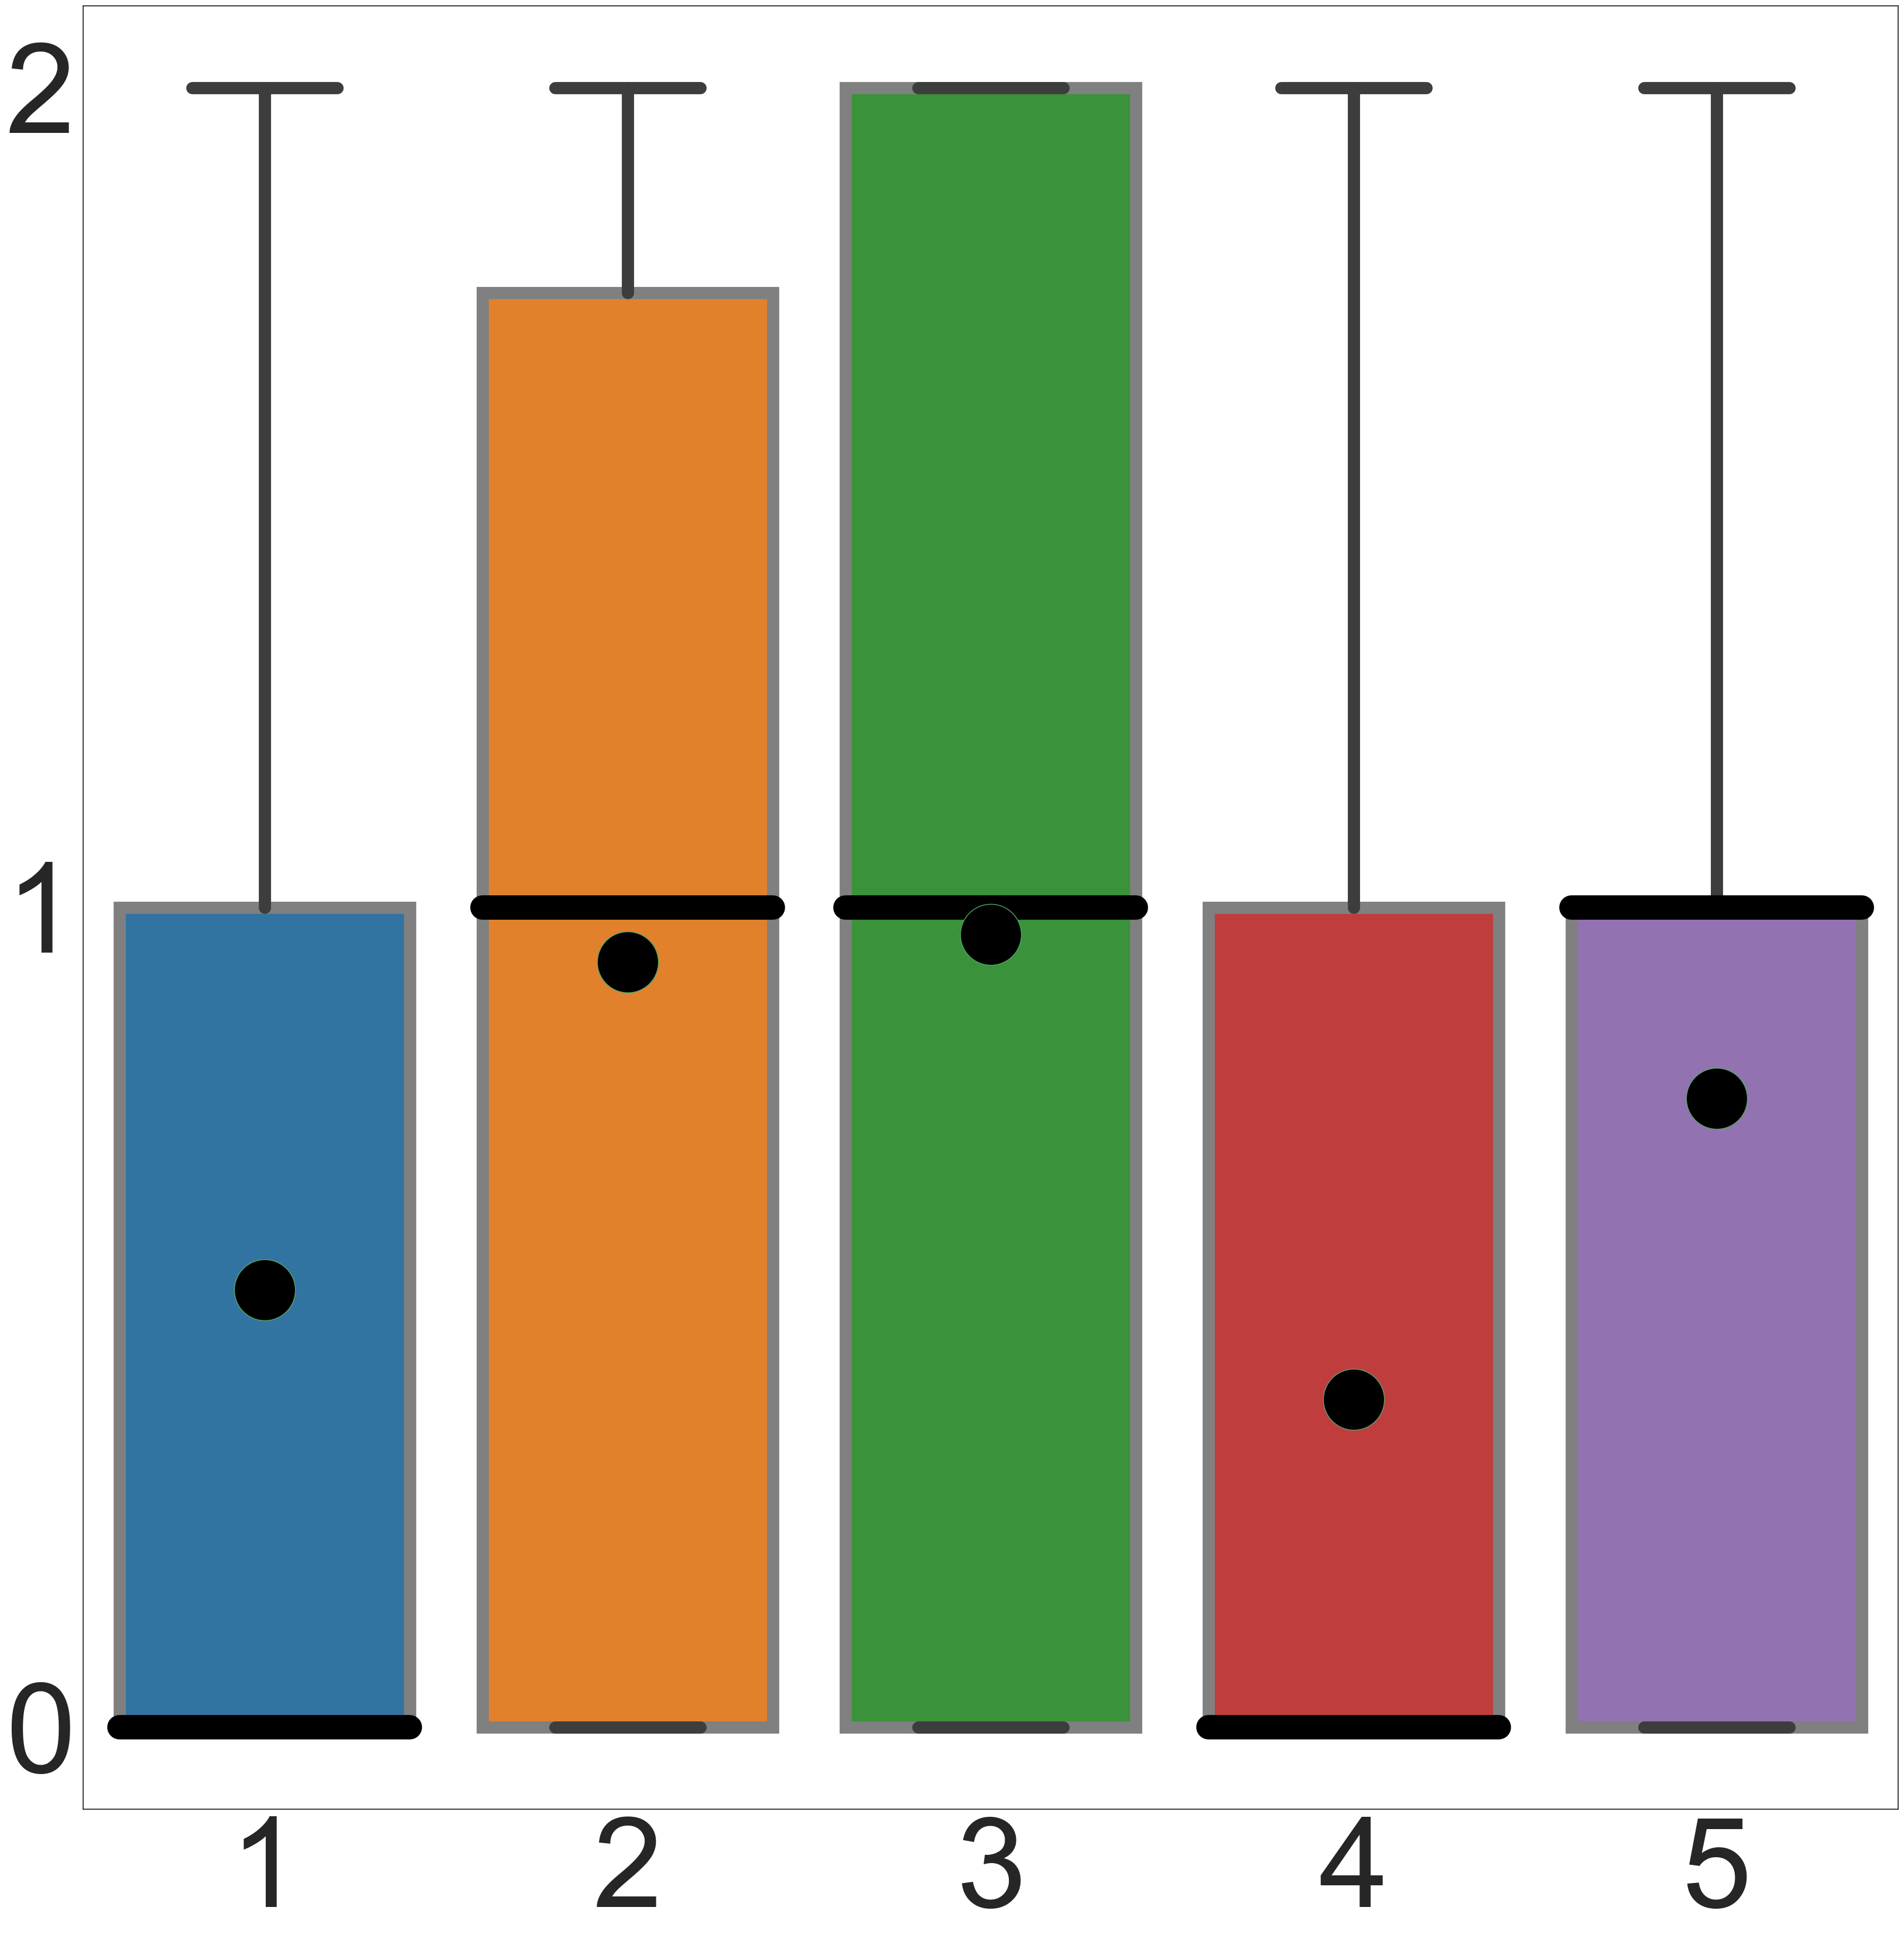

C


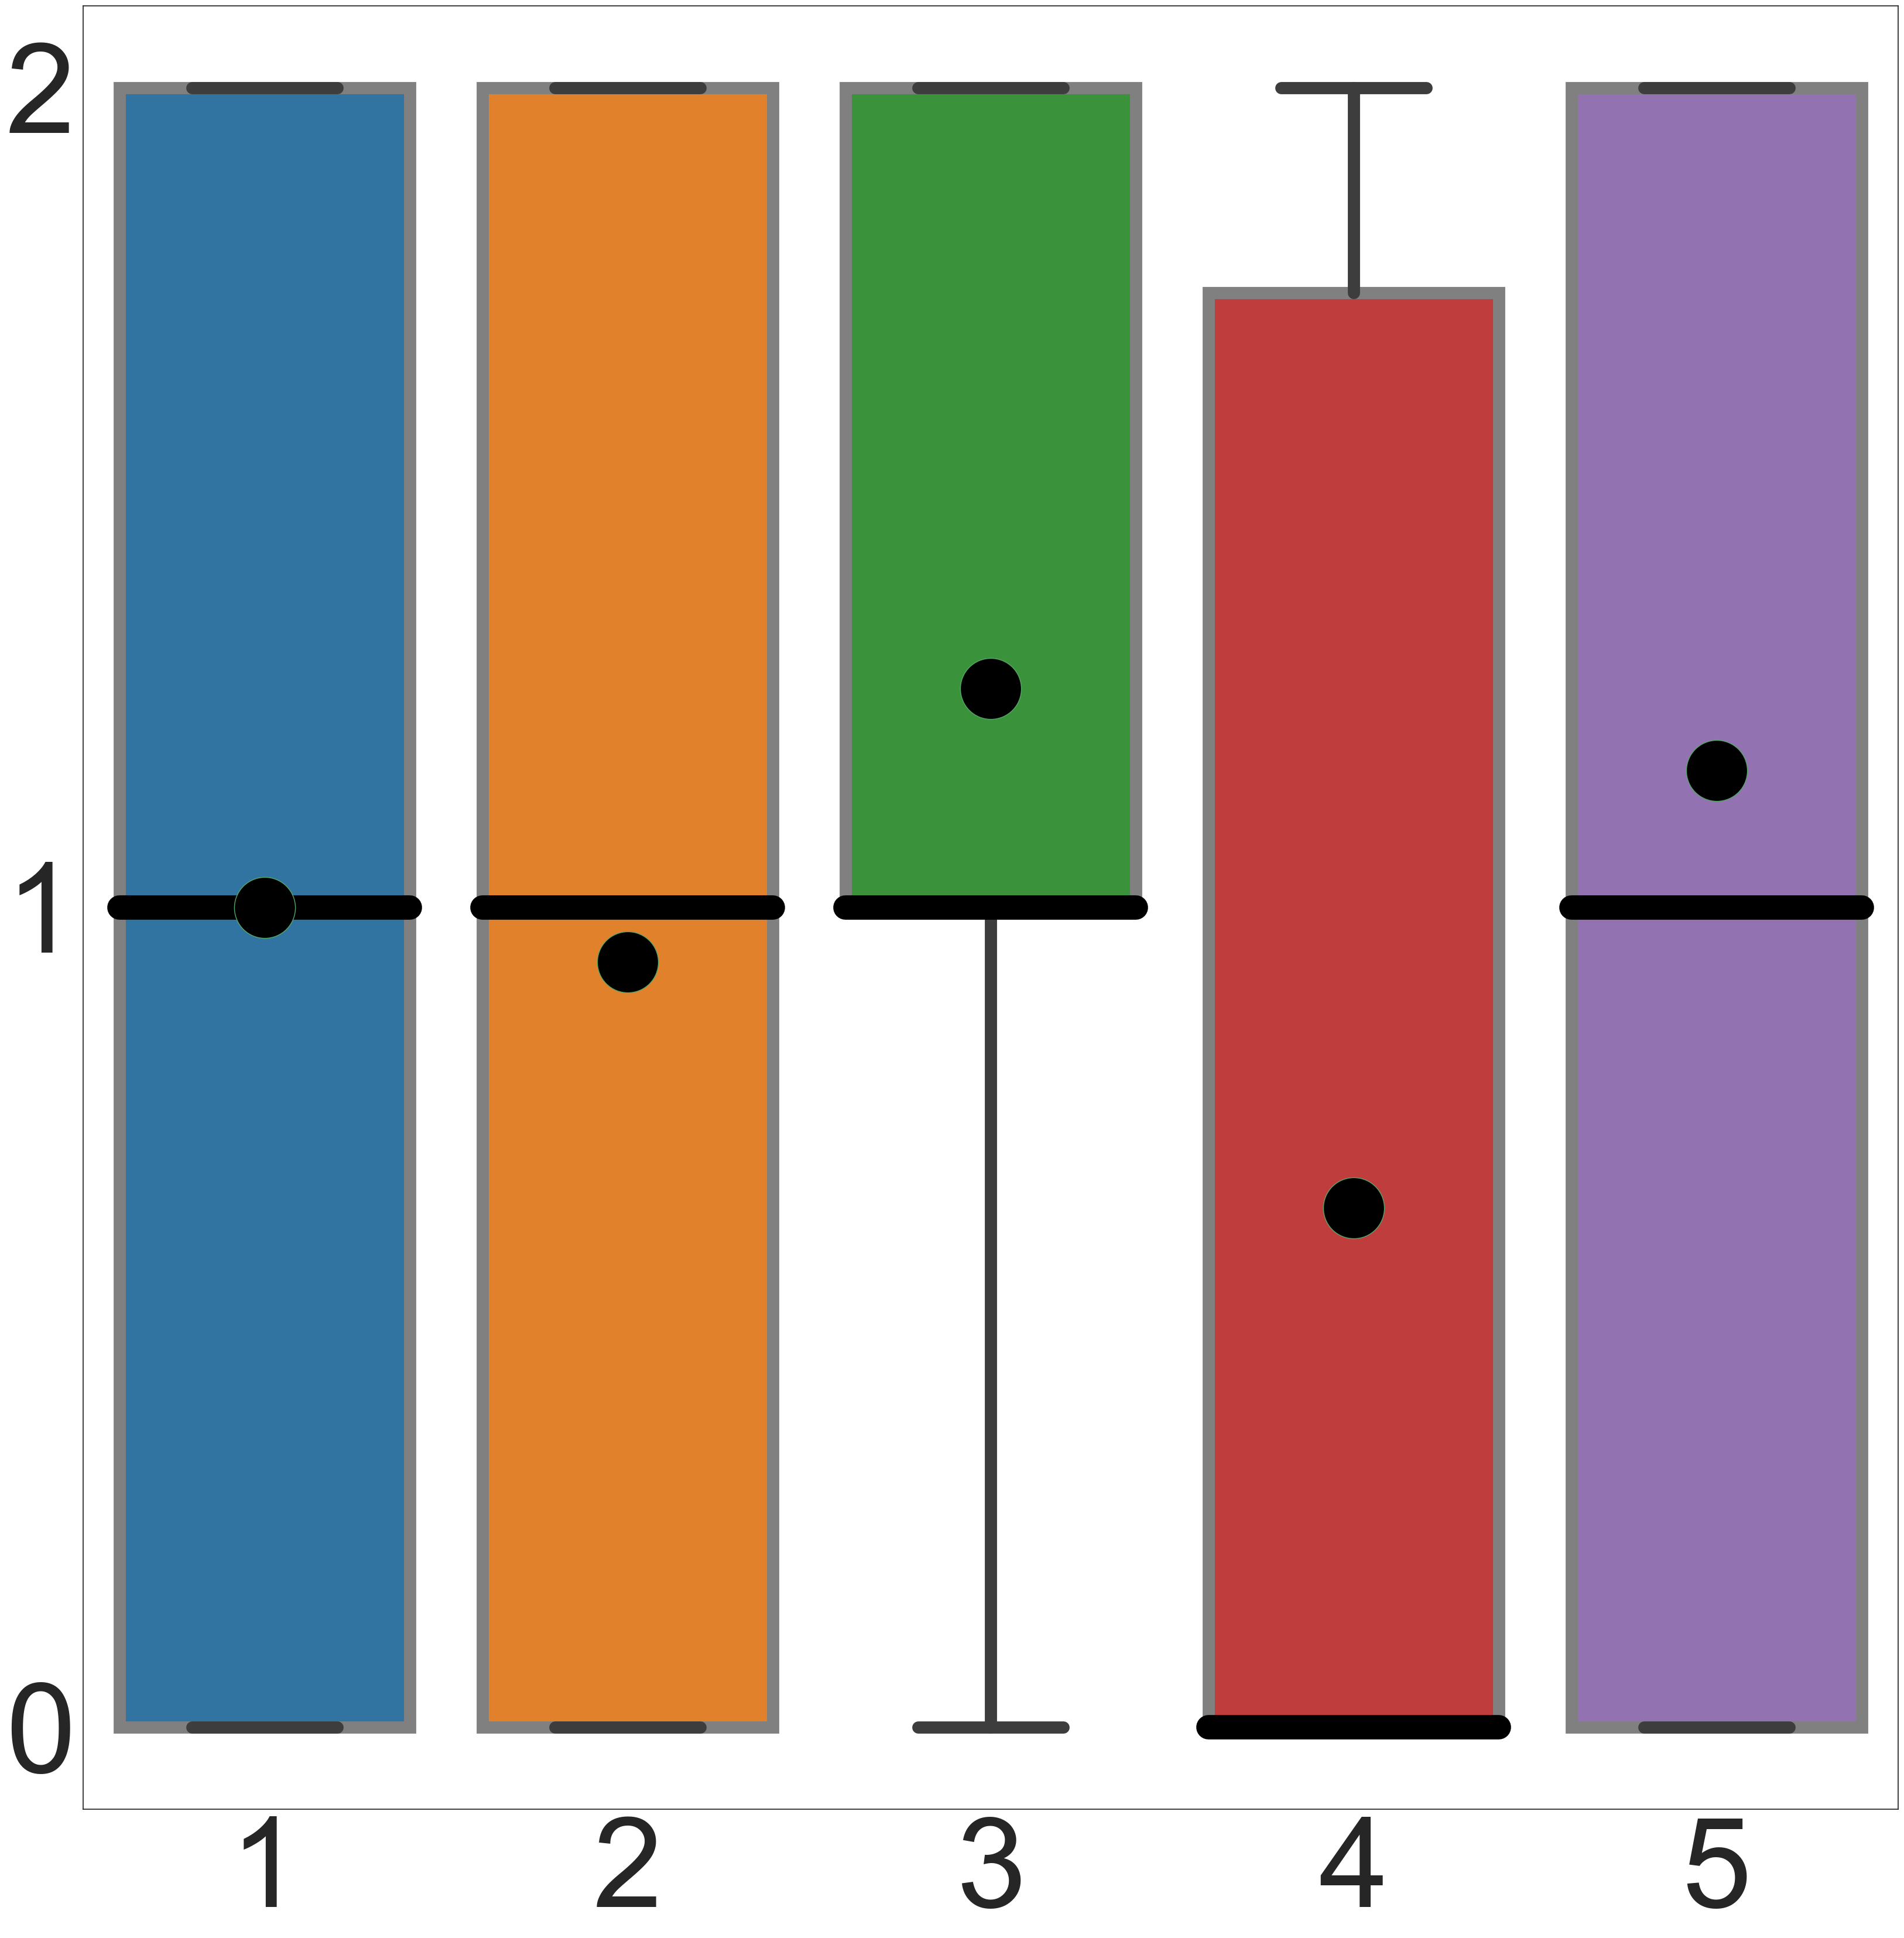

E


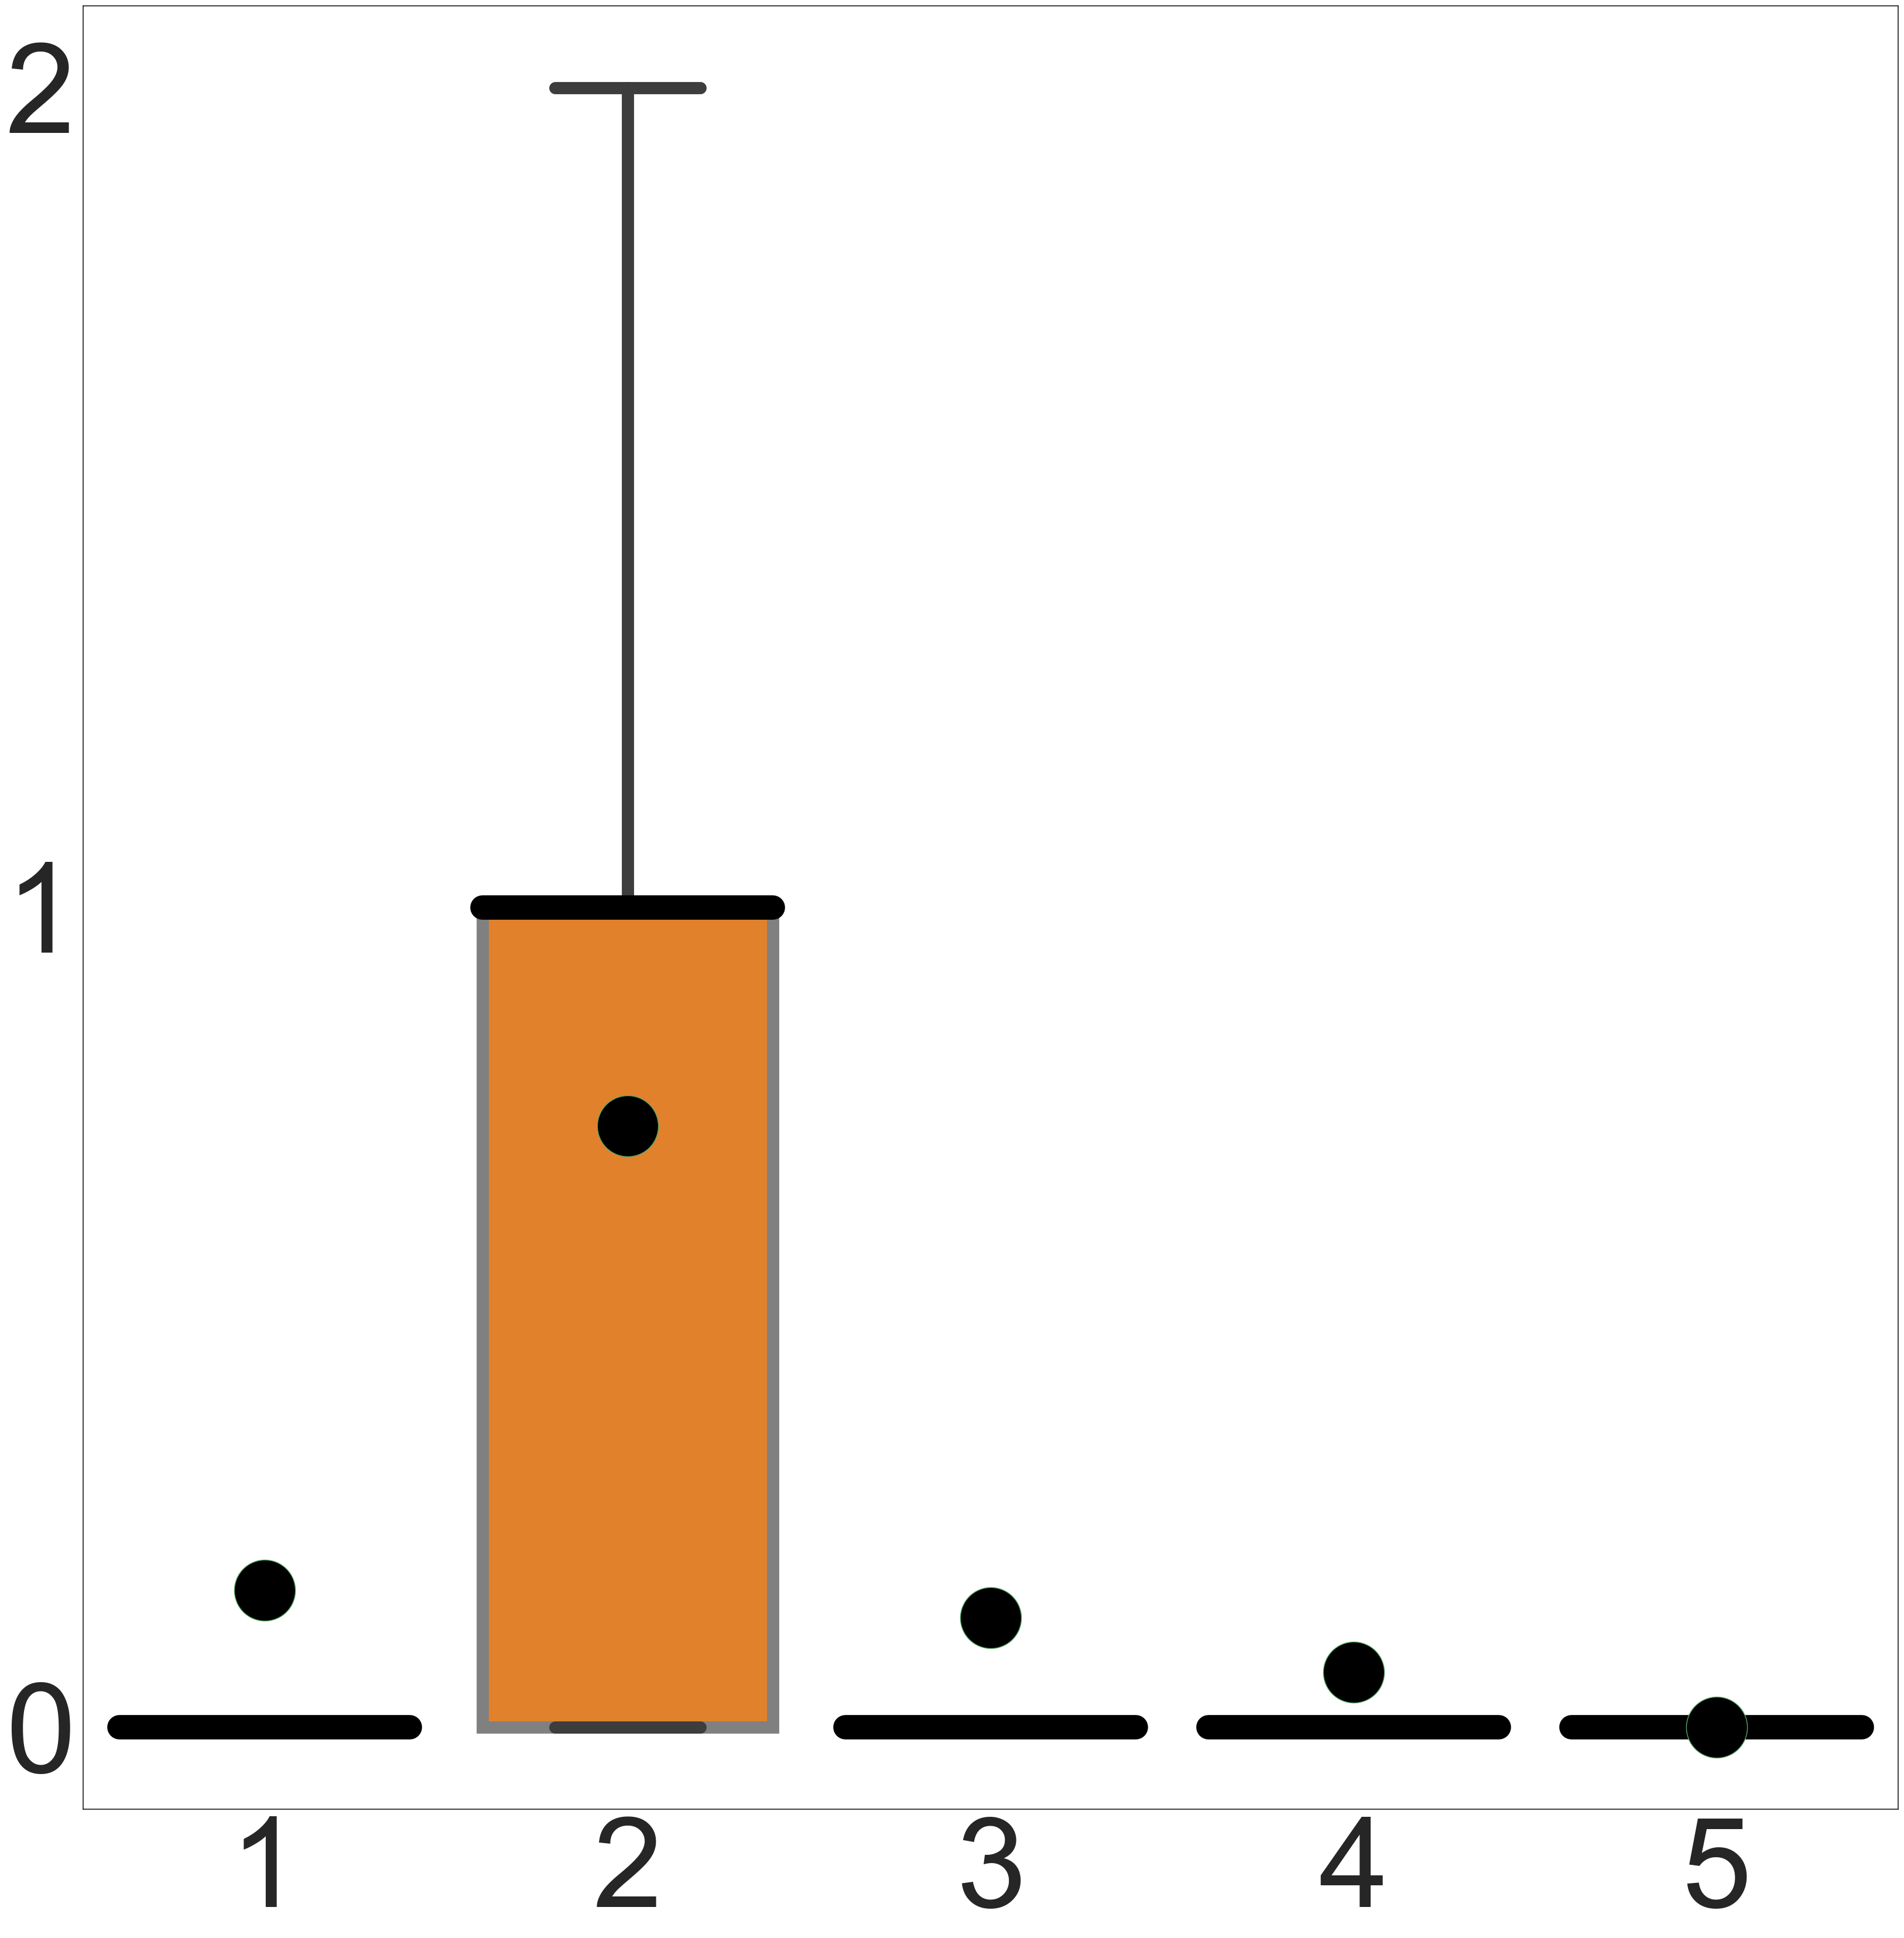

A


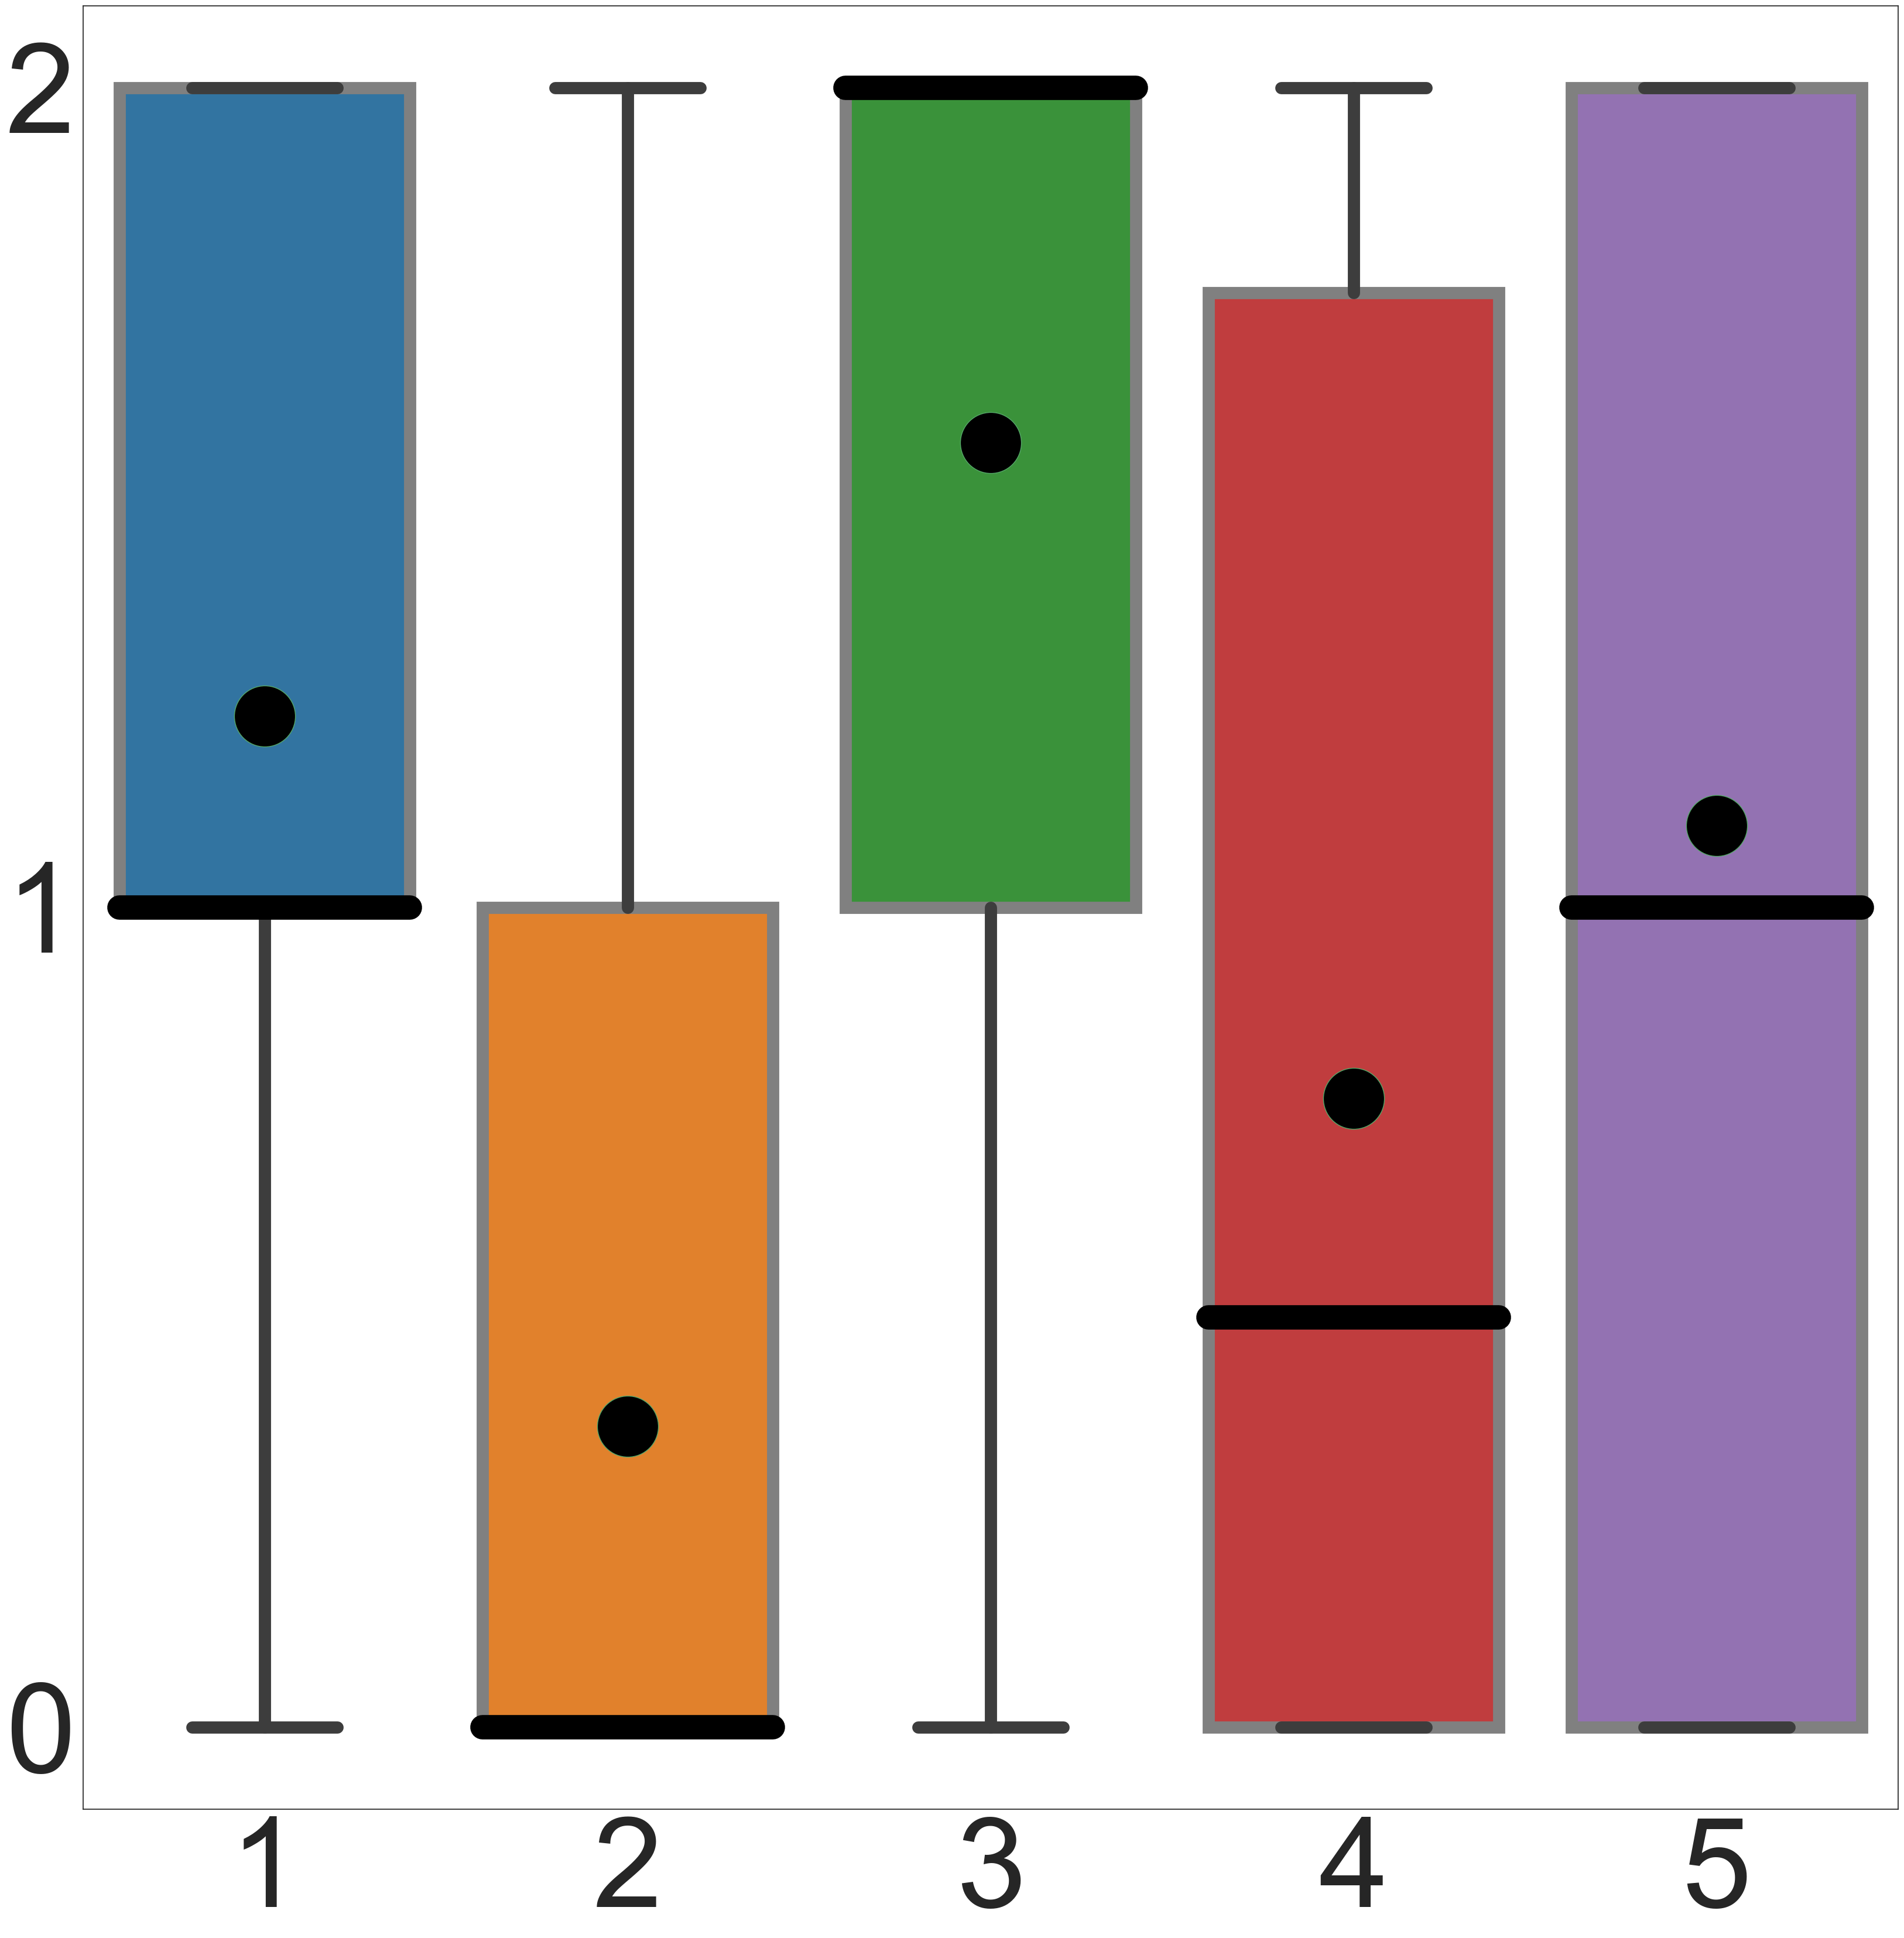

N


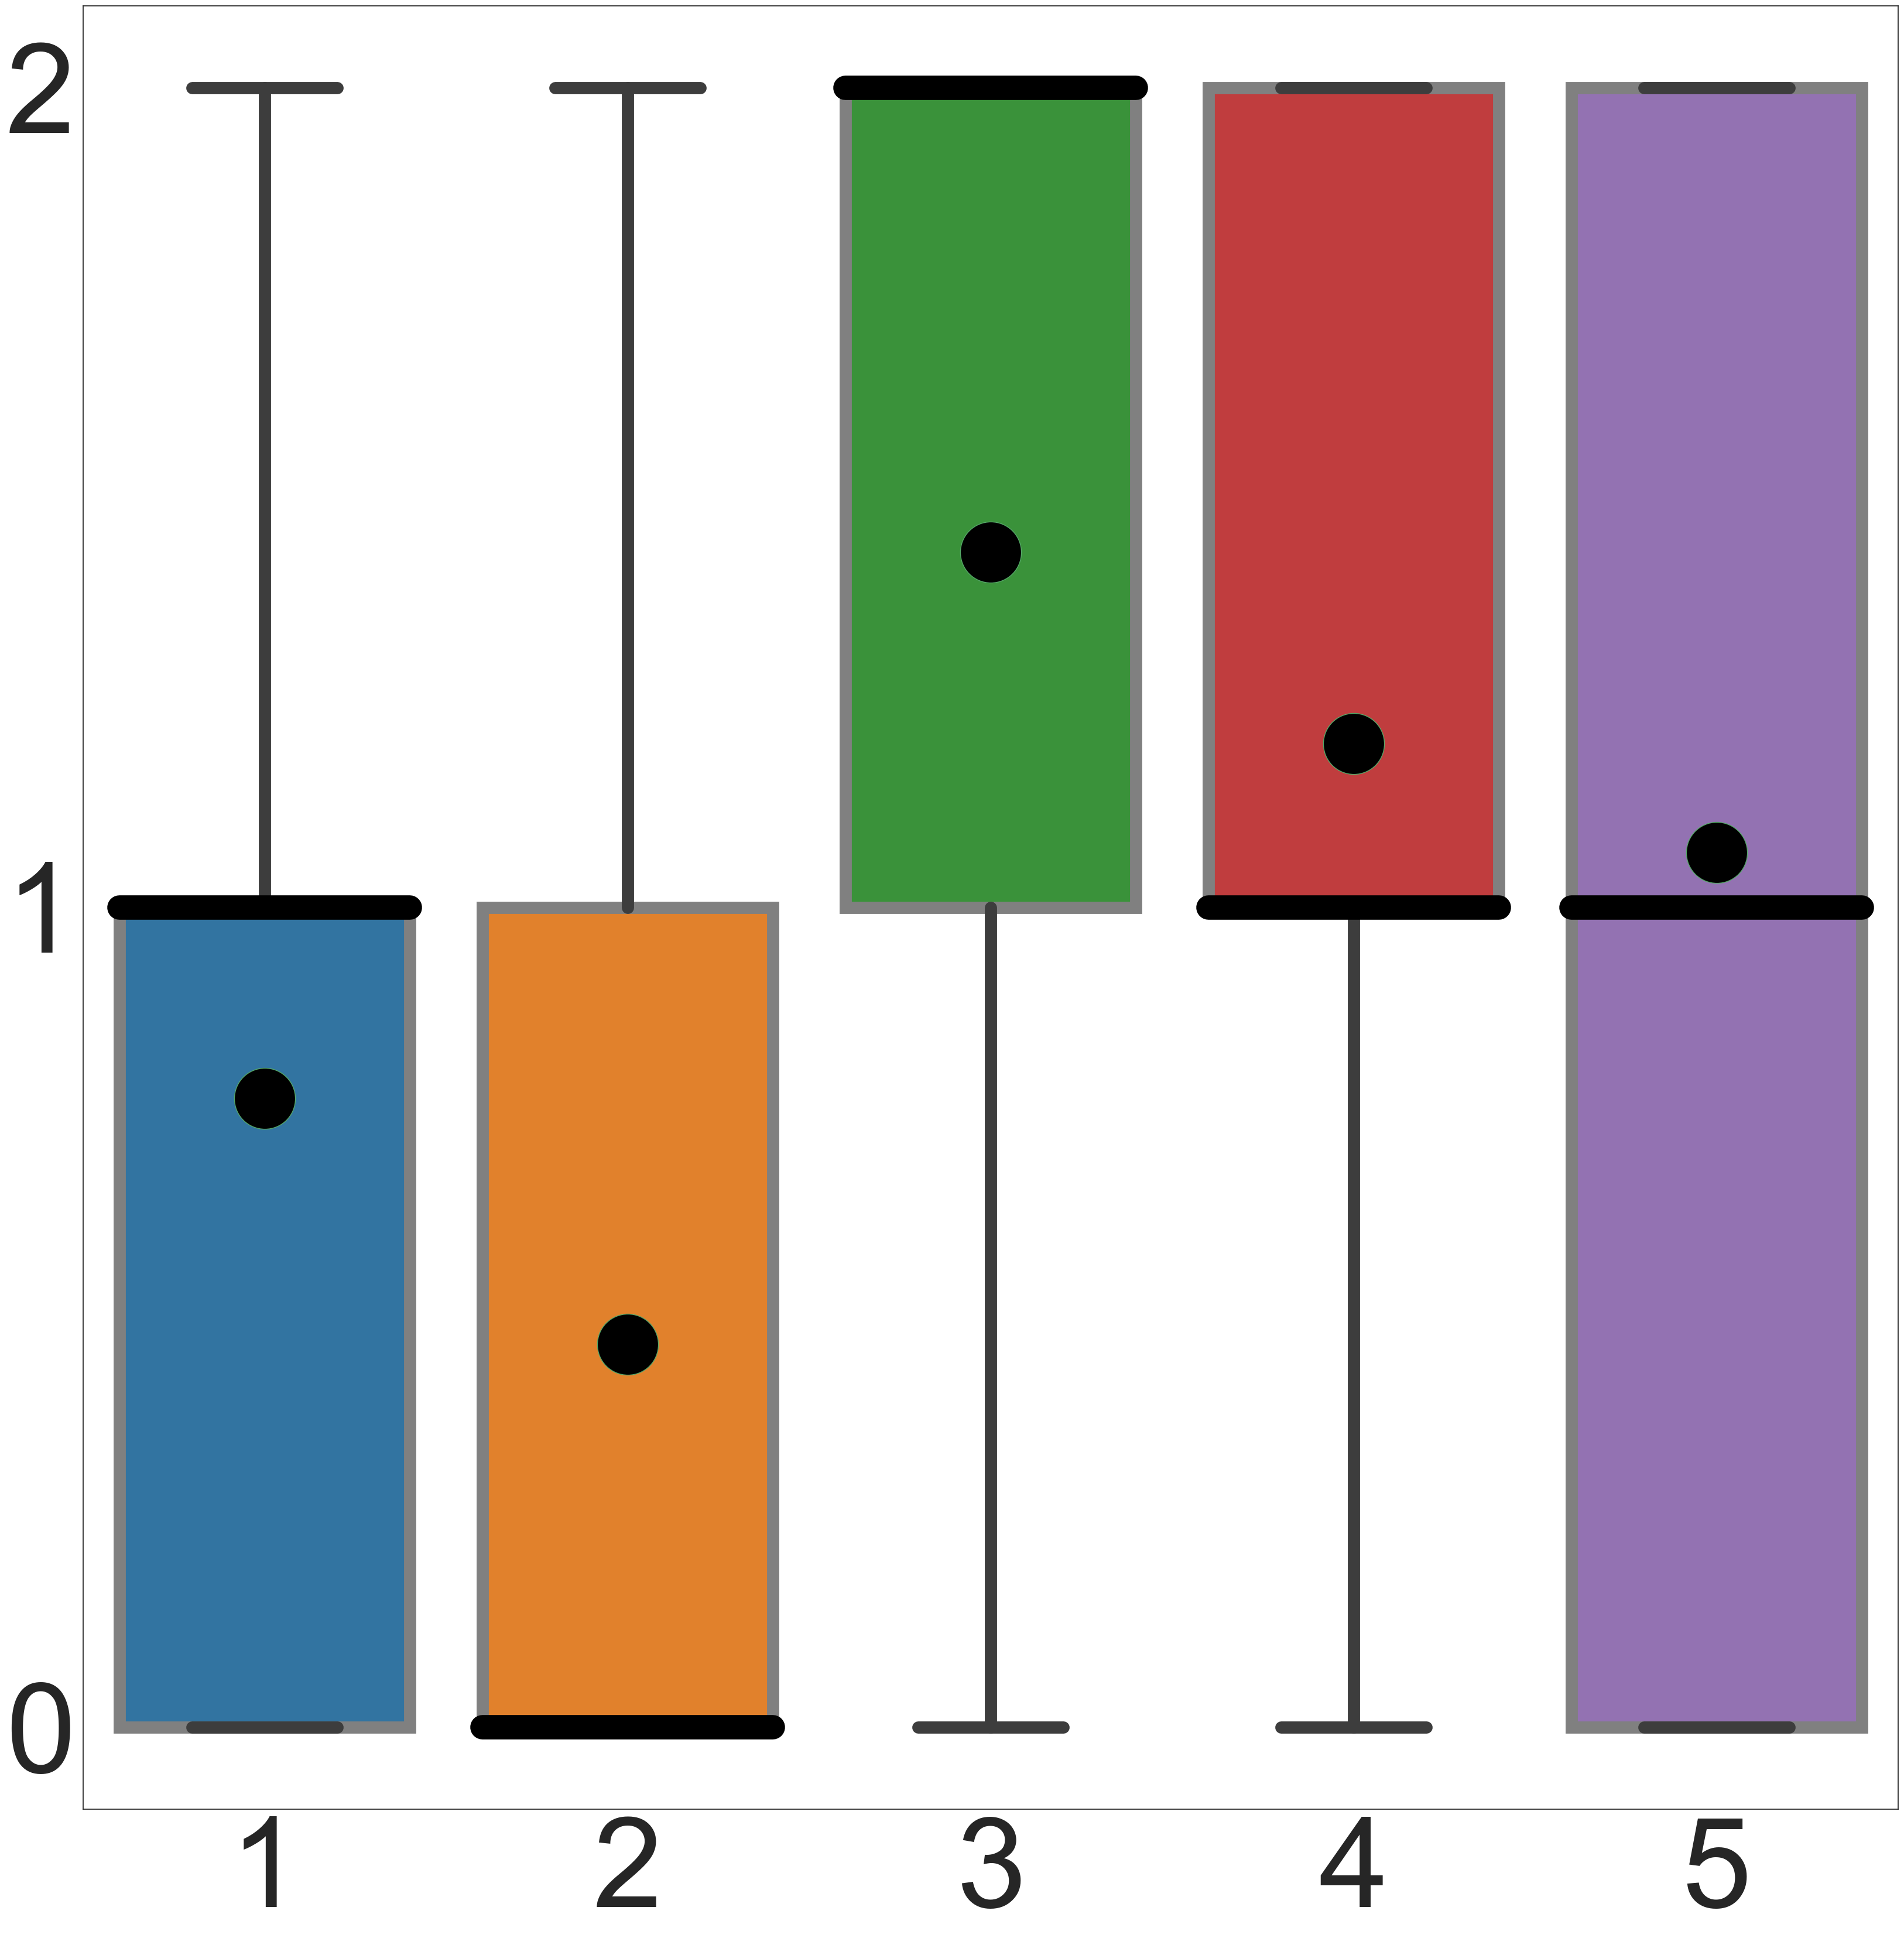

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import numpy as np

def drawMEANS(masked,mod):
    sns.set(rc={'figure.figsize':(40,40)})
    sns.set(font_scale = 14)
    sns.set_style("white")
    ax = sns.boxplot(x='SampleNo', y='One', palette=sns.color_palette('tab10'), data=masked, linewidth = 15, color='black', showfliers = False, showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"black", 
                      "markersize":"75"}, medianprops=dict(color='black', alpha=1, linewidth = 30), boxprops=dict(edgecolor='gray'))
    ax.set(xlabel='',ylabel='')
    
    ax.set_yticks(np.arange(0.0,2.1,0.1))
    ax.set_yticks(ax.get_yticks()[::10]);   

    if(mod == 0):
        ax.set_xticklabels(['O','C','E','A','N'])
    else:
        ax.set_xticklabels(['1','2','3','4','5'])
    plt.legend([],[], frameon=False)
    plt.show()

pd.set_option('mode.chained_assignment', None)

print("for different cases ocean pairs")

for i in range(5):
    print("case " + str(i))
    
    df = pd.read_csv('SecondStudy.csv')
    mask = ((df['SampleNo'] >= i * 5) & (df['SampleNo'] < (i * 5) + 5))
    masked = df.loc[mask]
        
    masked['SampleNo'].replace(i*5, 0, inplace=True)
    masked['SampleNo'].replace(i*5+1, 1, inplace=True)
    masked['SampleNo'].replace(i*5+2, 2, inplace=True)
    masked['SampleNo'].replace(i*5+3, 3, inplace=True)
    masked['SampleNo'].replace(i*5+4, 4, inplace=True)
    
    drawMEANS(masked,0)

print("for different ocean, case pairs")

for i in range(5):
    print(OCEAN[i])
    
    df = pd.read_csv('SecondStudy.csv')
    mask = ((df['SampleNo'] % 5 == i))
    masked = df.loc[mask]
    
    for k in range(5):
        masked['SampleNo'].replace(k*5+i, k, inplace=True)
    drawMEANS(masked,1)


# Pearson Correlation Analysis in Table 7

In [20]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

df = pd.read_csv('SecondStudy.csv')

CASES = [1,2,3,4,5]
OCEAN = ["O","C","E","A","N"]

for i in range(25):
    mask = ((df['SampleNo'] == i))
    masked = df.loc[mask]

    pval = scipy.stats.pearsonr(masked["One"].to_numpy(), masked["Two"].to_numpy())[1]
    if(pval <= 0.05):
        print( "------------------" + str(i) + " " + str(CASES[int(i/5)]) + " " + OCEAN[int(i%5)] + "------------------")
        display(masked["One"].to_numpy().mean())
        display(masked["Two"].to_numpy().mean())
        display(scipy.stats.pearsonr(masked["One"].to_numpy(), masked["Two"].to_numpy()))
        display(scipy.stats.spearmanr(masked["One"].to_numpy(), masked["Two"].to_numpy()))
        display(scipy.stats.kendalltau(masked["One"].to_numpy(), masked["Two"].to_numpy()))

------------------0 1 O------------------


0.5333333333333333

1.5333333333333334

PearsonRResult(statistic=0.5344210667995277, pvalue=0.0023484779949853574)

SignificanceResult(statistic=0.5752474871104721, pvalue=0.0008825628851789313)

SignificanceResult(statistic=0.544963599387468, pvalue=0.0019307723390369594)

------------------11 3 C------------------


1.2666666666666666

0.3333333333333333

PearsonRResult(statistic=0.38633370464312794, pvalue=0.03496345909515096)

SignificanceResult(statistic=0.38844929803367795, pvalue=0.03389428332370703)

SignificanceResult(statistic=0.3635307826128376, pvalue=0.03472312923351946)

------------------12 3 E------------------


0.13333333333333333

1.0666666666666667

PearsonRResult(statistic=0.3777580290395194, pvalue=0.039579390260546146)

SignificanceResult(statistic=0.40979935671386675, pvalue=0.024512676759683195)

SignificanceResult(statistic=0.3827950812679254, pvalue=0.027340245877746413)

------------------13 3 A------------------


1.5666666666666667

1.1333333333333333

PearsonRResult(statistic=0.5016242598277343, pvalue=0.004740718644652522)

SignificanceResult(statistic=0.4744261040511243, pvalue=0.008077352515536524)

SignificanceResult(statistic=0.455607291325127, pvalue=0.007481284428013134)

------------------14 3 N------------------


1.4333333333333333

0.4666666666666667

PearsonRResult(statistic=-0.5153557546925366, pvalue=0.0035625341393460334)

SignificanceResult(statistic=-0.5616125986731612, pvalue=0.001240952998123861)

SignificanceResult(statistic=-0.5342046848305287, pvalue=0.002283408539799224)

------------------15 4 O------------------


0.4

0.6333333333333333

PearsonRResult(statistic=0.41708272789580253, pvalue=0.021847319964974618)

SignificanceResult(statistic=0.3738814223055388, pvalue=0.04182042563637649)

SignificanceResult(statistic=0.34847872611203135, pvalue=0.04461155113897885)

------------------16 4 C------------------


0.6333333333333333

0.2

PearsonRResult(statistic=0.4361153469633615, pvalue=0.015986905606034274)

SignificanceResult(statistic=0.37908769828787275, pvalue=0.03883329151280264)

SignificanceResult(statistic=0.3593230003743111, pvalue=0.041937112633029676)

C:\Users\Sina-\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [21]:
# calculate correlation and significance in Table 7

import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

df = pd.read_csv('SecondStudy.csv')

CASES = [1,2,3,4,5]
OCEAN = ["O","C","E","A","N"]

for i in range(25):
    mask = ((df['SampleNo'] == i))
    masked = df.loc[mask]
    st = scipy.stats.pearsonr(masked["One"].to_numpy(), masked["Two"].to_numpy())[0]
    pval = scipy.stats.pearsonr(masked["One"].to_numpy(), masked["Two"].to_numpy())[1]
    print("%.3f" % st)
    print("%.3f" % pval)

0.534
0.002
0.338
0.068
0.193
0.306
0.339
0.067
0.055
0.772
0.145
0.444
0.323
0.082
0.296
0.112
0.340
0.066
-0.119
0.533
-0.093
0.625
0.386
0.035
0.378
0.040
0.502
0.005
-0.515
0.004
0.417
0.022
0.436
0.016
0.240
0.202
0.315
0.090
0.066
0.727
0.187
0.321
0.270
0.149
nan
nan
0.075
0.695
-0.170
0.369


C:\Users\Sina-\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
